In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as sklearn
import scipy as s
import tensorflow as tf

In [2]:
df=pd.read_csv("bank-full.csv",delimiter=';')

In [3]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [4]:
df1 = df[df['y']=='yes']
print(df1.shape)
df2 = df[df['y']=='no']
df2 = df2[:6000]
print(df2.shape)
frames=[df1,df2]
df1 = pd.concat(frames)
print(df1.shape)

(5289, 17)
(6000, 17)
(11289, 17)


In [5]:
df1.head()

age         job  marital  education default  balance housing loan  \
83    59      admin.  married  secondary      no     2343     yes   no   
86    56      admin.  married  secondary      no       45      no   no   
87    41  technician  married  secondary      no     1270     yes   no   
129   55    services  married  secondary      no     2476     yes   no   
168   54      admin.  married   tertiary      no      184      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome    y  
83   unknown    5   may      1042         1     -1         0  unknown  yes  
86   unknown    5   may      1467         1     -1         0  unknown  yes  
87   unknown    5   may      1389         1     -1         0  unknown  yes  
129  unknown    5   may       579         1     -1         0  unknown  yes  
168  unknown    5   may       673         2     -1         0  unknown  yes

In [6]:
df.shape

(45211, 17)

In [7]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df.describe().round(2)

age    balance       day  duration  campaign     pdays  previous
count  45211.00   45211.00  45211.00  45211.00  45211.00  45211.00  45211.00
mean      40.94    1362.27     15.81    258.16      2.76     40.20      0.58
std       10.62    3044.77      8.32    257.53      3.10    100.13      2.30
min       18.00   -8019.00      1.00      0.00      1.00     -1.00      0.00
25%       33.00      72.00      8.00    103.00      1.00     -1.00      0.00
50%       39.00     448.00     16.00    180.00      2.00     -1.00      0.00
75%       48.00    1428.00     21.00    319.00      3.00     -1.00      0.00
max       95.00  102127.00     31.00   4918.00     63.00    871.00    275.00

In [11]:
df1.describe().round(2)

age   balance       day  duration  campaign     pdays  previous
count  11289.00  11289.00  11289.00  11289.00  11289.00  11289.00  11289.00
mean      40.65   1352.21     14.86    383.34      2.32     31.66      0.55
std       11.48   2995.03      7.53    343.49      2.50     88.45      1.84
min       18.00  -3313.00      1.00      2.00      1.00     -1.00      0.00
25%       32.00     97.00      8.00    158.00      1.00     -1.00      0.00
50%       38.00    455.00     14.00    265.00      2.00     -1.00      0.00
75%       48.00   1464.00     21.00    498.00      3.00     -1.00      0.00
max       95.00  81204.00     31.00   3881.00     63.00    854.00     58.00

In [12]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [13]:
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [14]:
for i in df.columns:
    print(i)
    print(df[i].isna().value_counts())

age
False    45211
Name: age, dtype: int64
job
False    45211
Name: job, dtype: int64
marital
False    45211
Name: marital, dtype: int64
education
False    45211
Name: education, dtype: int64
default
False    45211
Name: default, dtype: int64
balance
False    45211
Name: balance, dtype: int64
housing
False    45211
Name: housing, dtype: int64
loan
False    45211
Name: loan, dtype: int64
contact
False    45211
Name: contact, dtype: int64
day
False    45211
Name: day, dtype: int64
month
False    45211
Name: month, dtype: int64
duration
False    45211
Name: duration, dtype: int64
campaign
False    45211
Name: campaign, dtype: int64
pdays
False    45211
Name: pdays, dtype: int64
previous
False    45211
Name: previous, dtype: int64
poutcome
False    45211
Name: poutcome, dtype: int64
y
False    45211
Name: y, dtype: int64


In [15]:
for i in df1.columns:
    print(i)
    print(df1[i].isna().value_counts())

age
False    11289
Name: age, dtype: int64
job
False    11289
Name: job, dtype: int64
marital
False    11289
Name: marital, dtype: int64
education
False    11289
Name: education, dtype: int64
default
False    11289
Name: default, dtype: int64
balance
False    11289
Name: balance, dtype: int64
housing
False    11289
Name: housing, dtype: int64
loan
False    11289
Name: loan, dtype: int64
contact
False    11289
Name: contact, dtype: int64
day
False    11289
Name: day, dtype: int64
month
False    11289
Name: month, dtype: int64
duration
False    11289
Name: duration, dtype: int64
campaign
False    11289
Name: campaign, dtype: int64
pdays
False    11289
Name: pdays, dtype: int64
previous
False    11289
Name: previous, dtype: int64
poutcome
False    11289
Name: poutcome, dtype: int64
y
False    11289
Name: y, dtype: int64


In [16]:
plt.rcParams['figure.figsize'] = (20, 16)

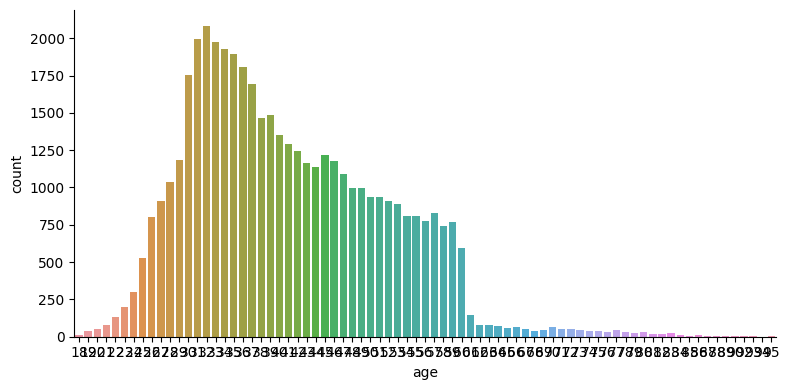

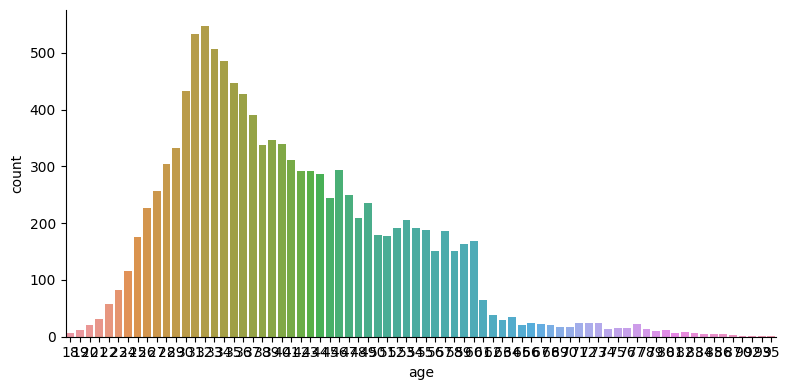

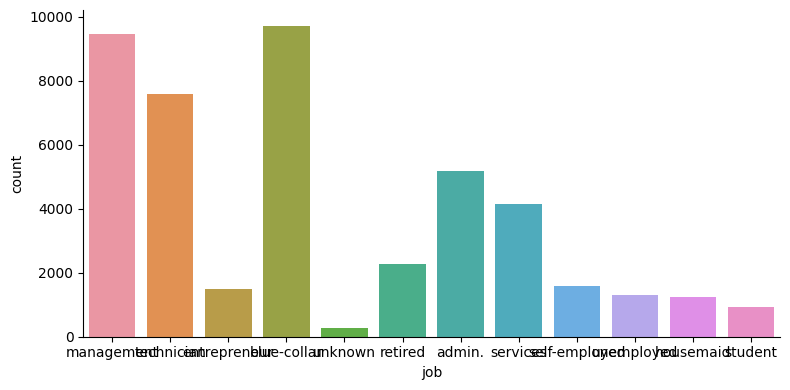

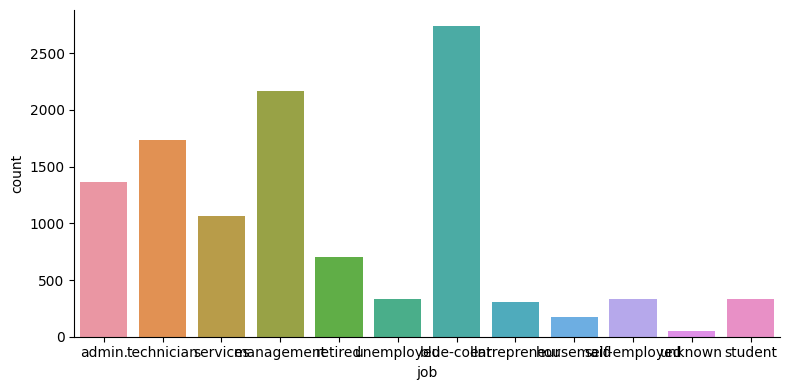

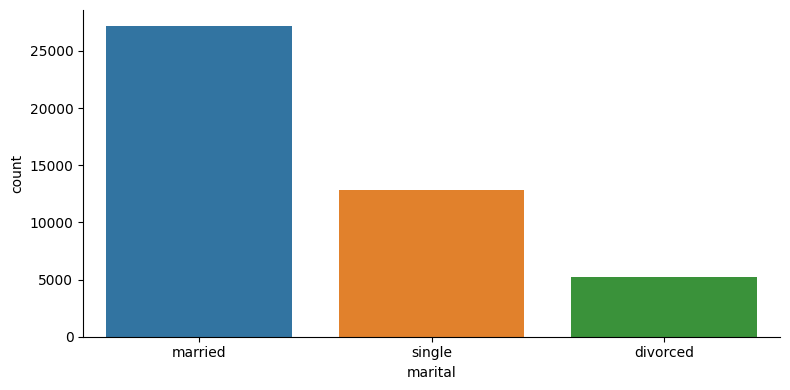

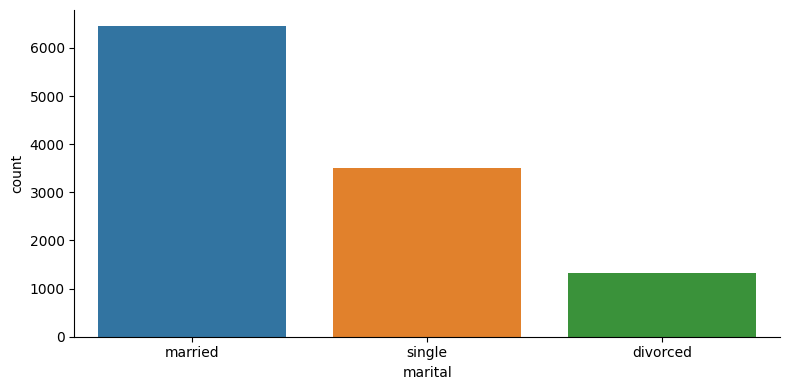

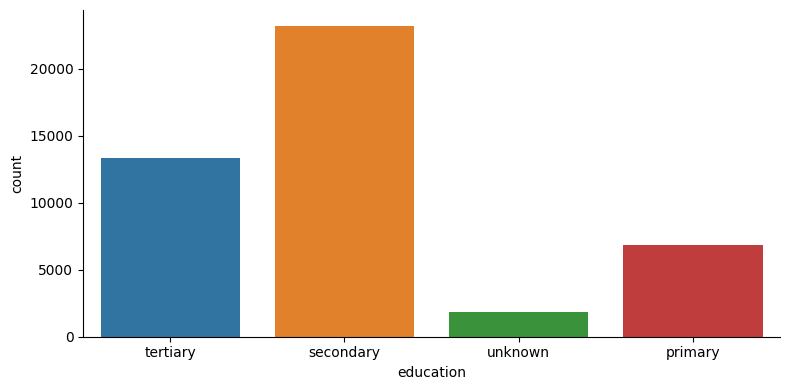

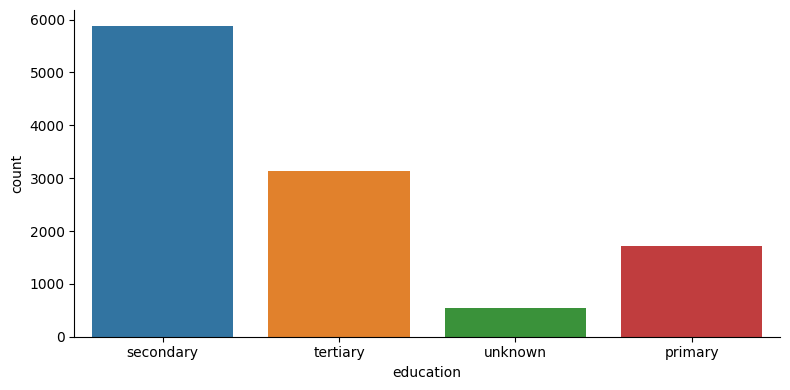

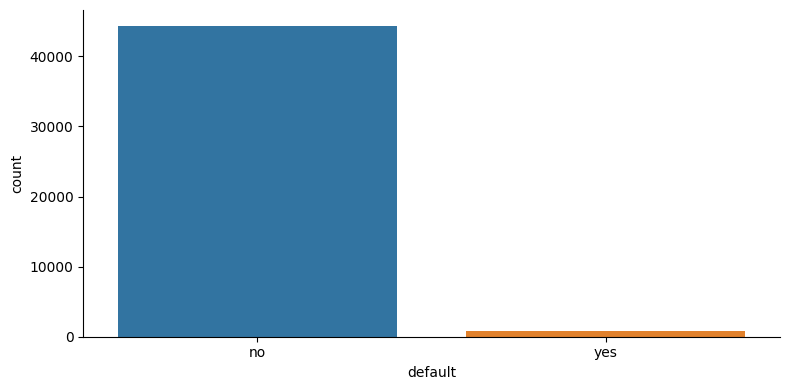

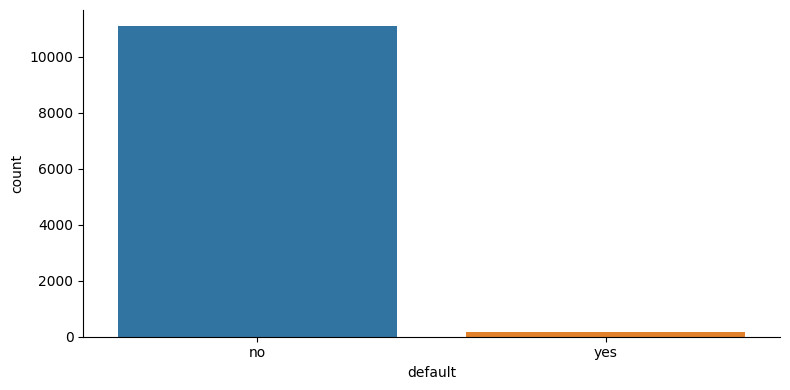

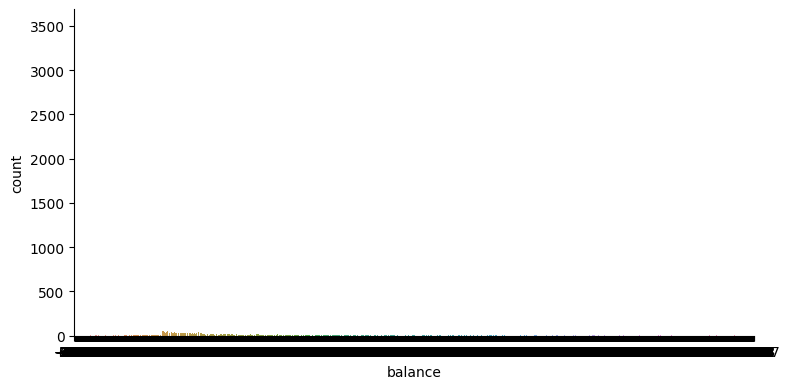

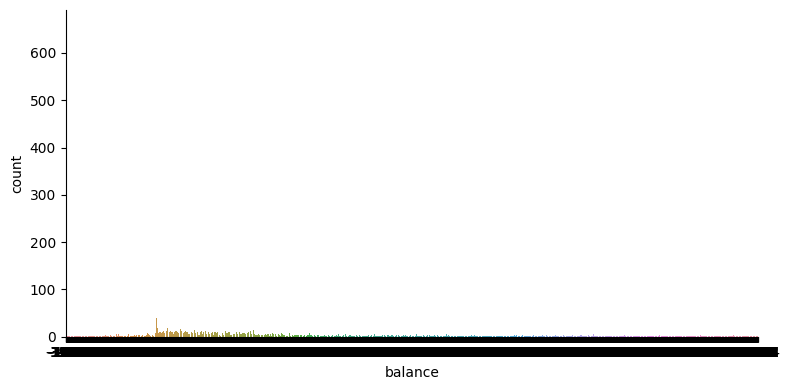

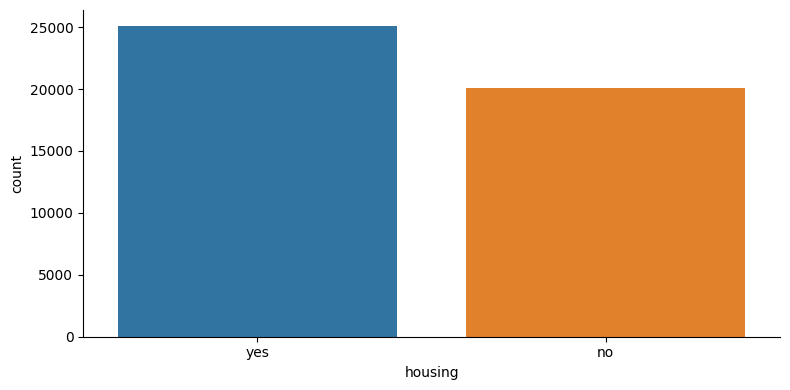

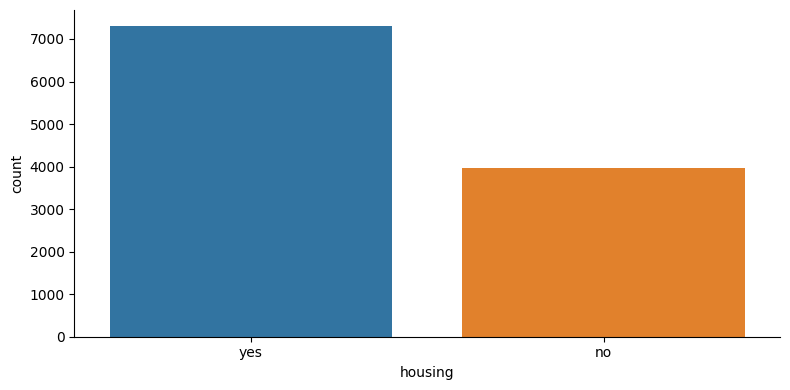

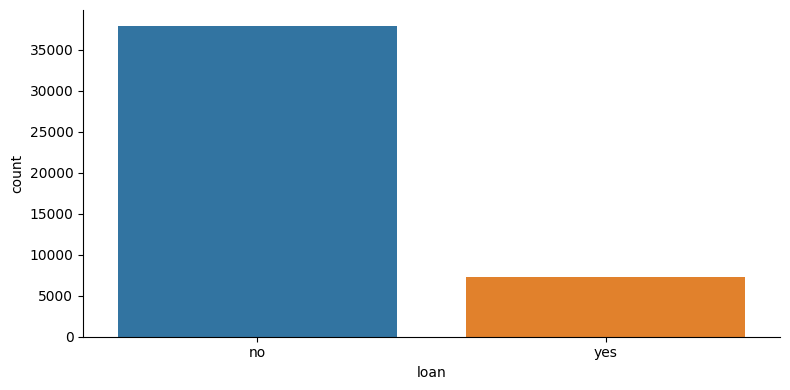

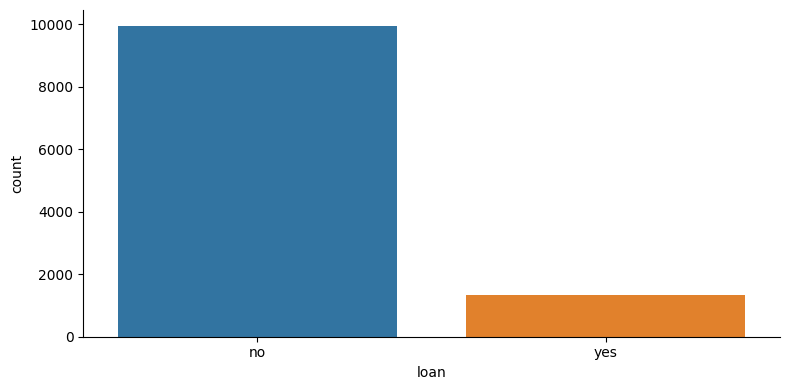

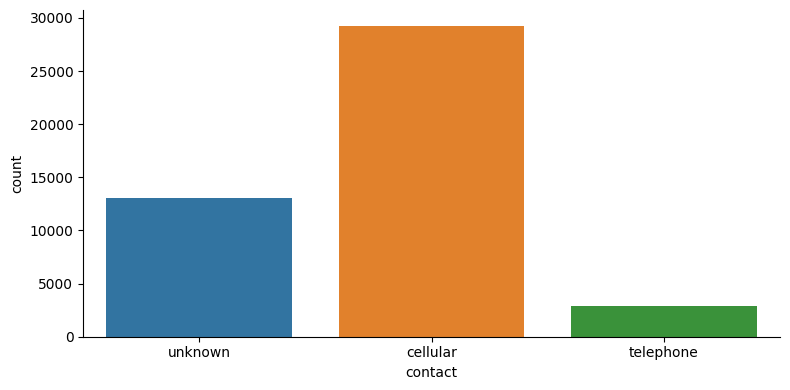

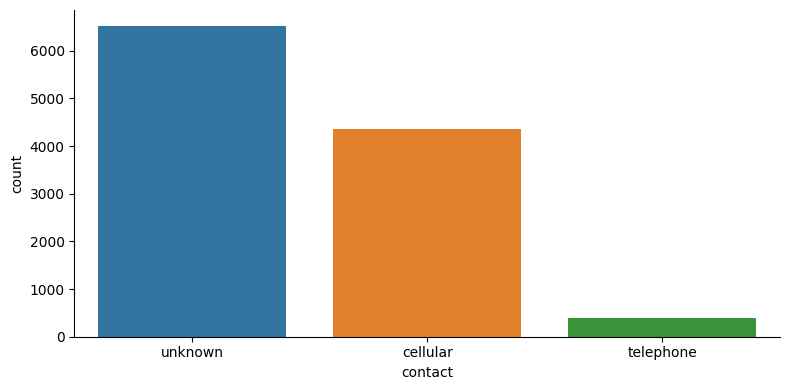

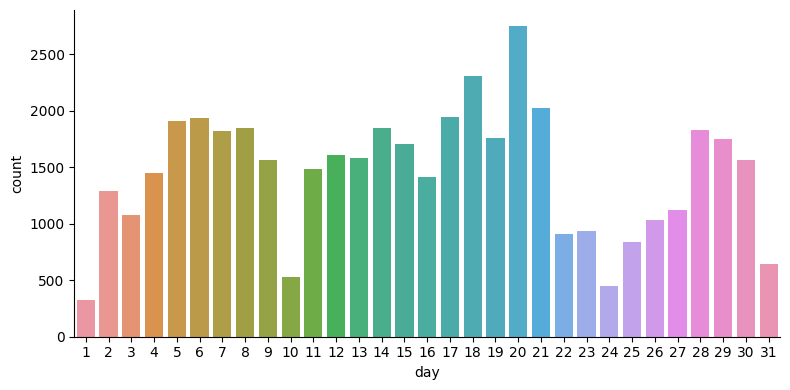

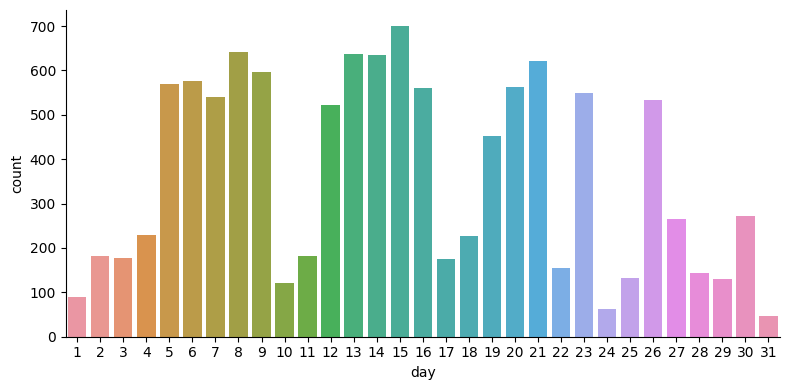

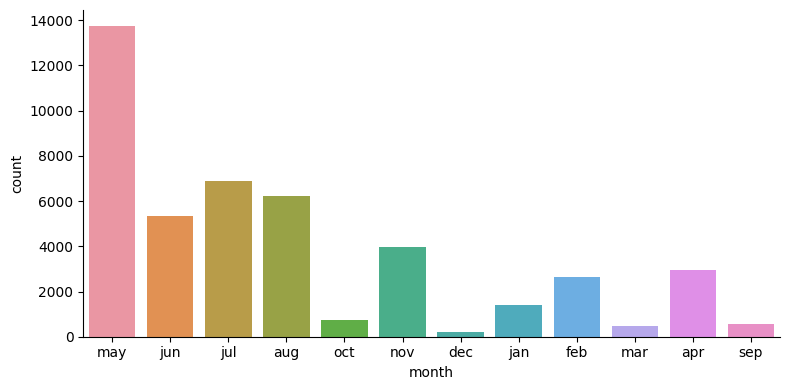

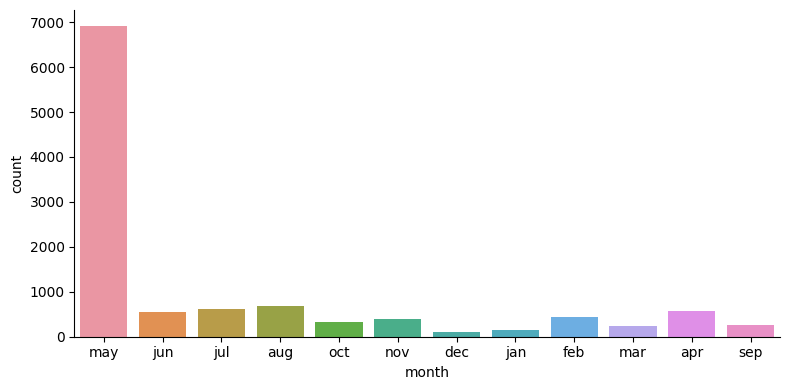

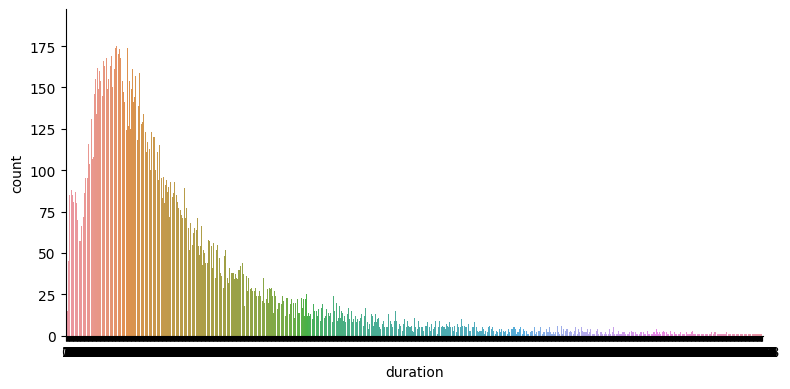

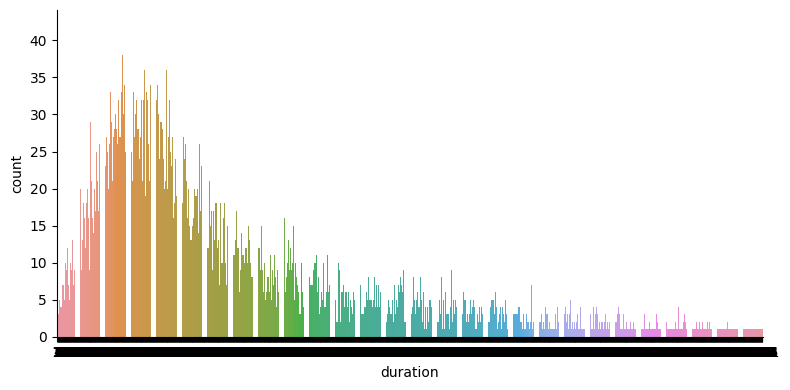

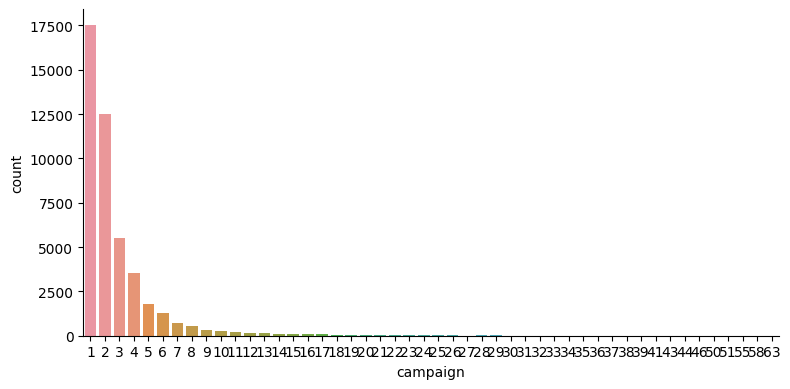

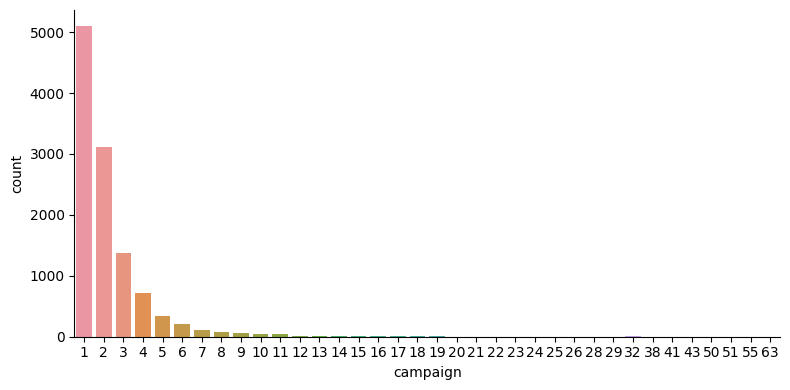

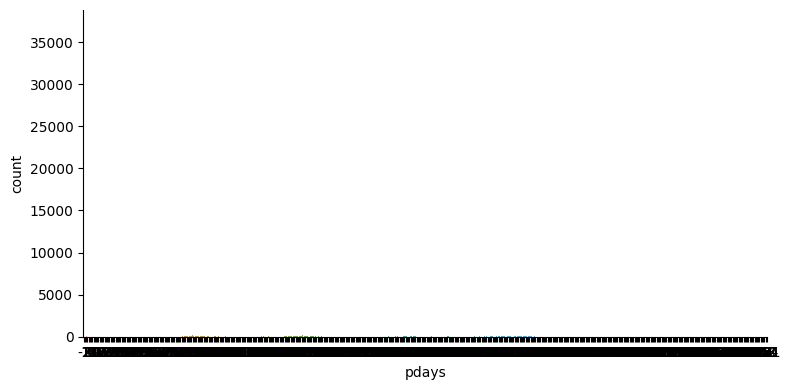

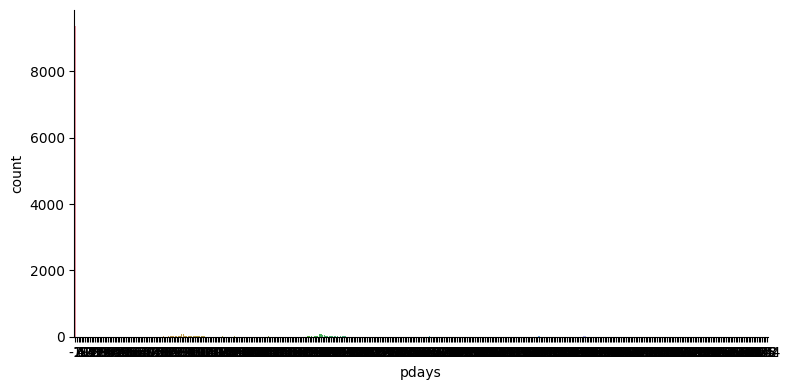

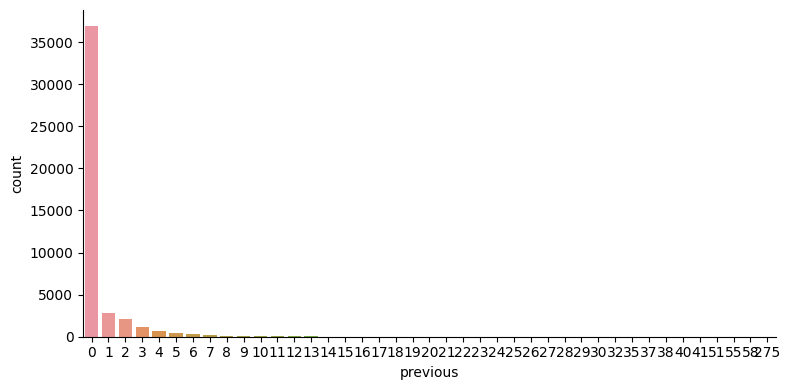

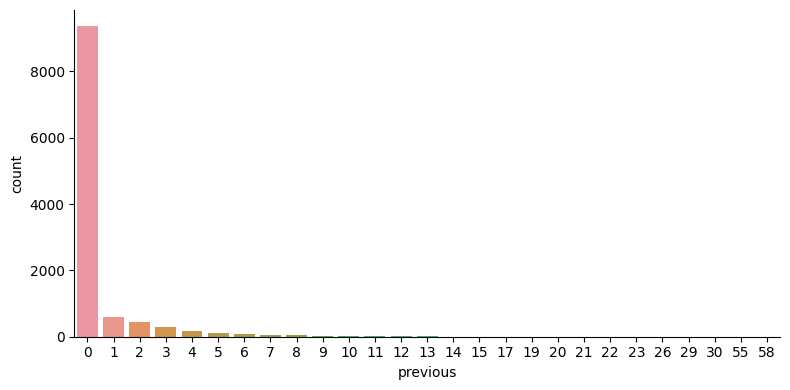

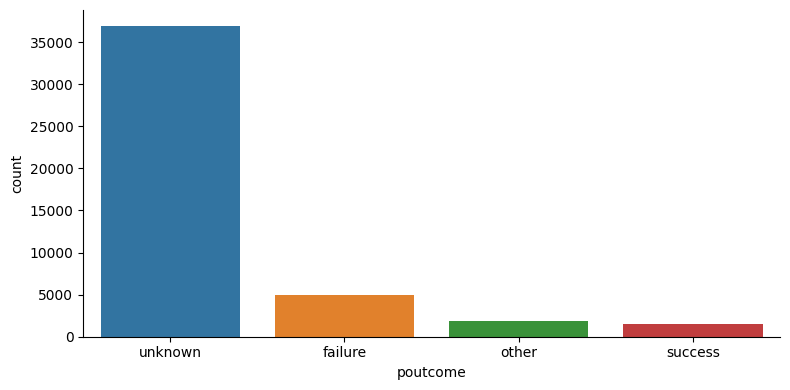

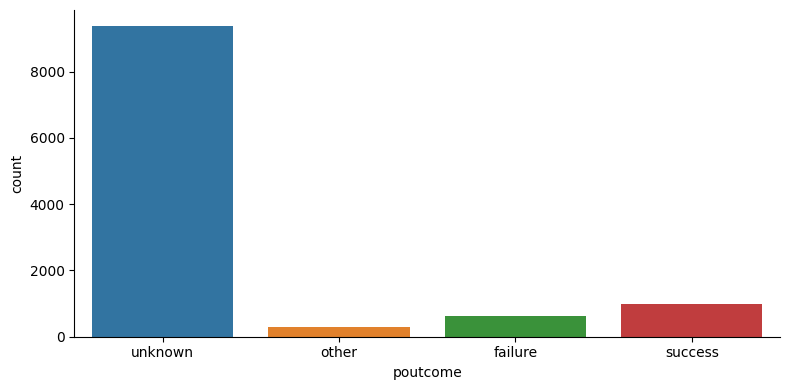

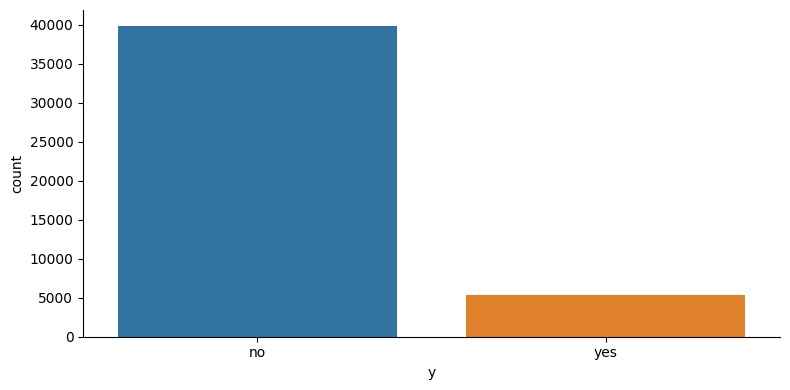

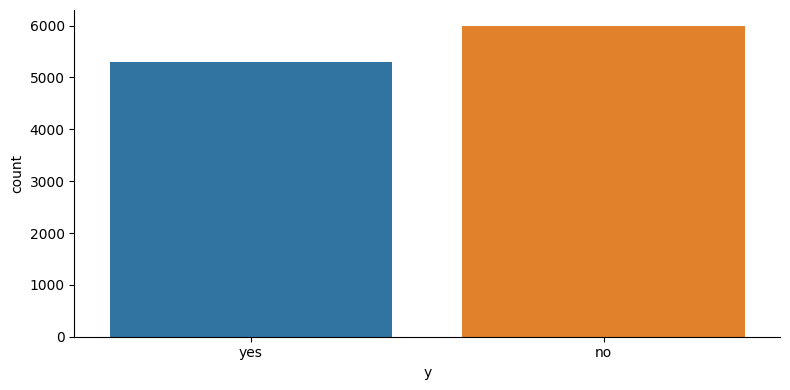

In [17]:
for i in df.columns:
    ax = sns.catplot(data=df, kind='count', x=i, height=4, aspect=2)
    plt.pyplot.show()
    ax = sns.catplot(data=df1, kind='count', x=i, height=4, aspect=2)
    plt.pyplot.show()

In [18]:
df["y_encode"]=np.where(df['y'] == 'yes', 1, 0)
df1["y_encode"]=np.where(df1['y'] == 'yes', 1, 0)

In [19]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous      y_encode  
count  45211.000000  45211.000000  45211.000000  
mean      40.197828      0.580323      0.116985  
std      100.128746      2.303441      0.321406  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%       -1.000000      0.000000      0.000000  
max      871.000000    275.000000      1.000000

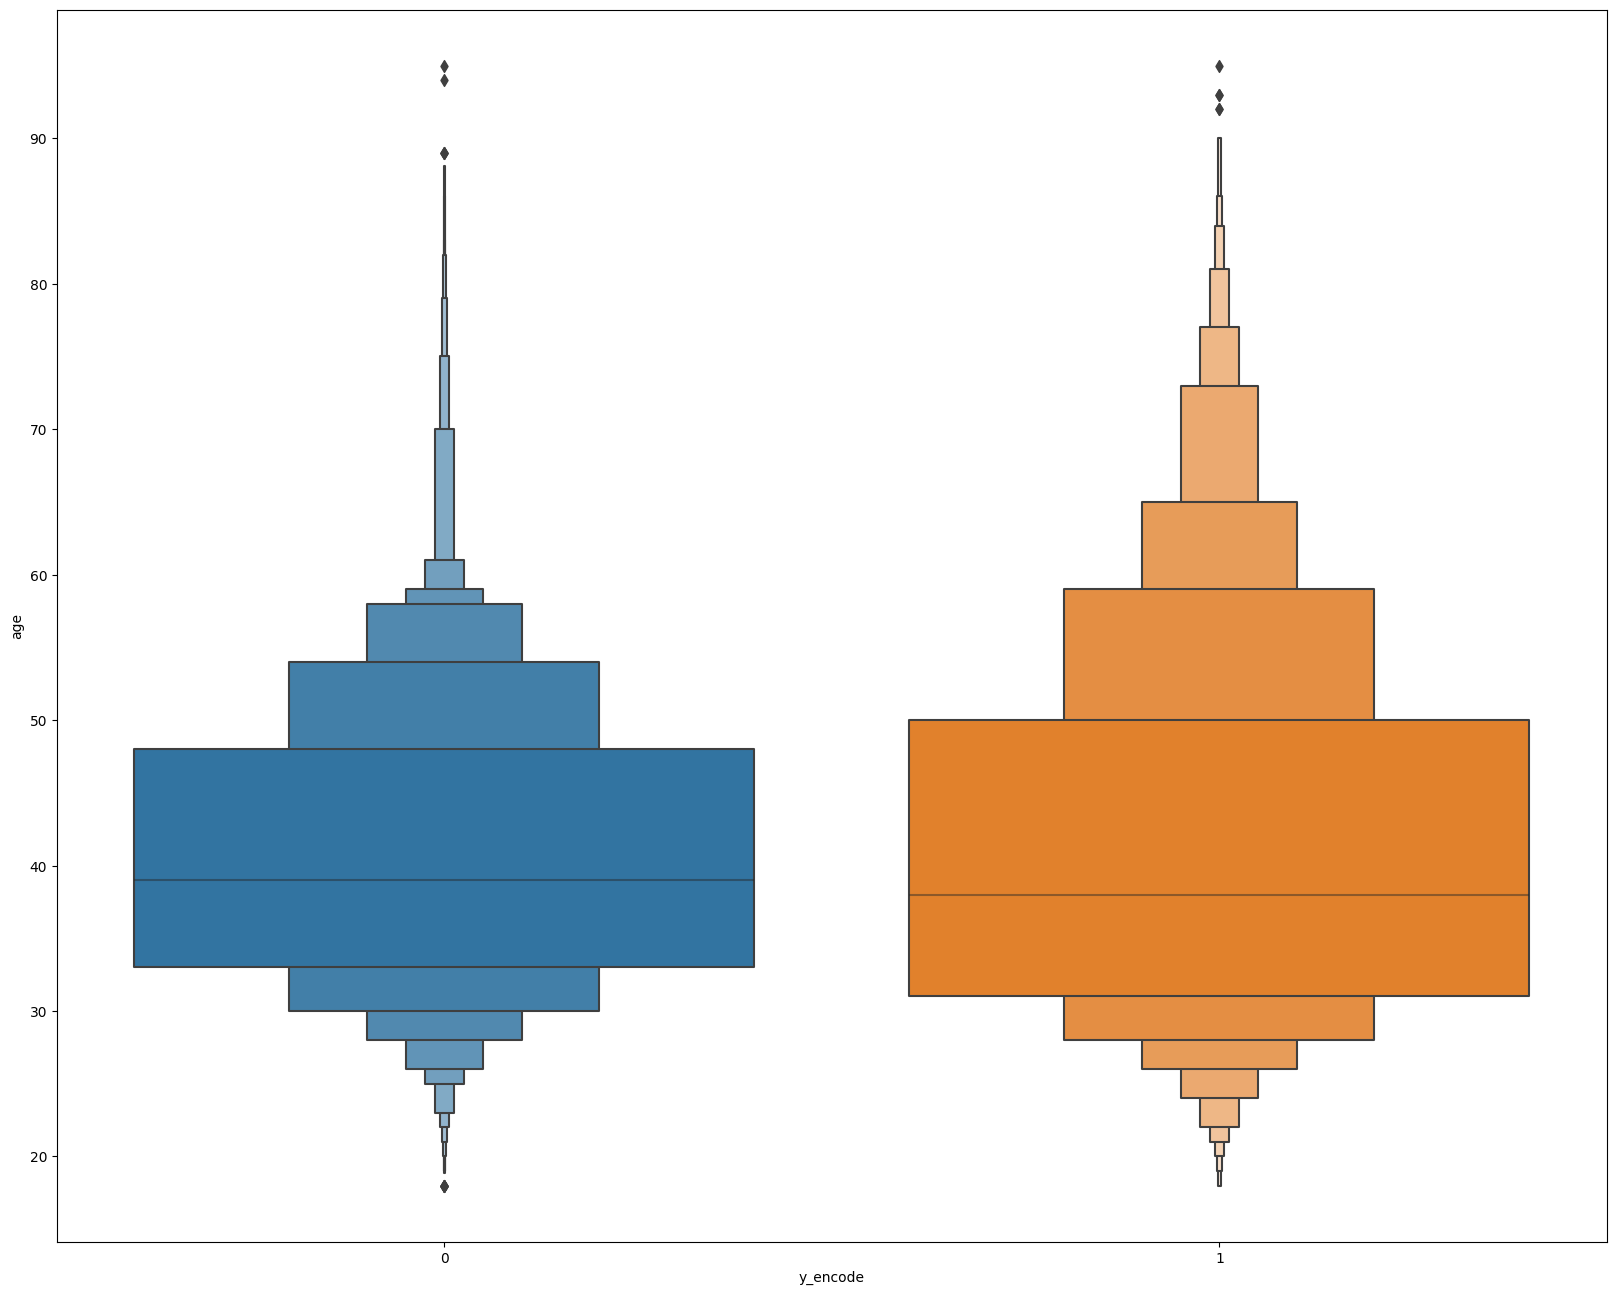

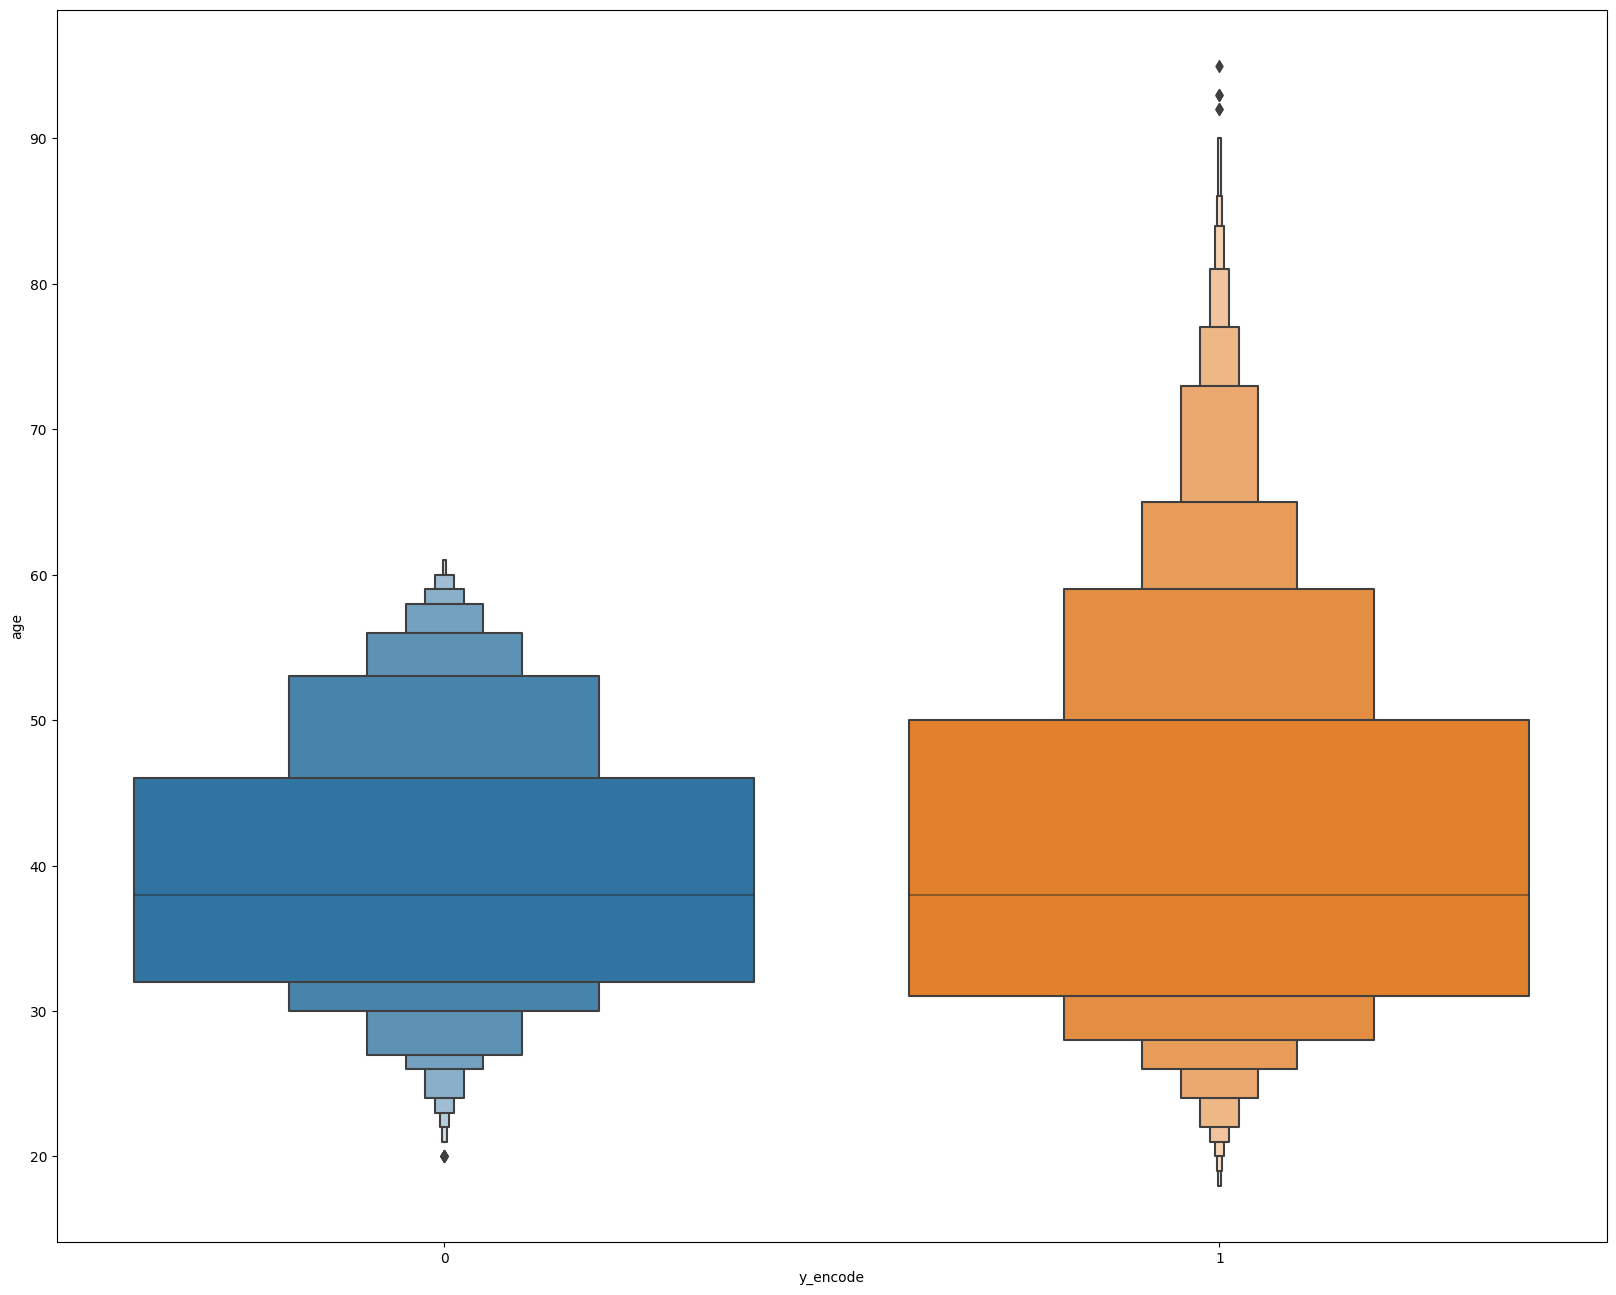

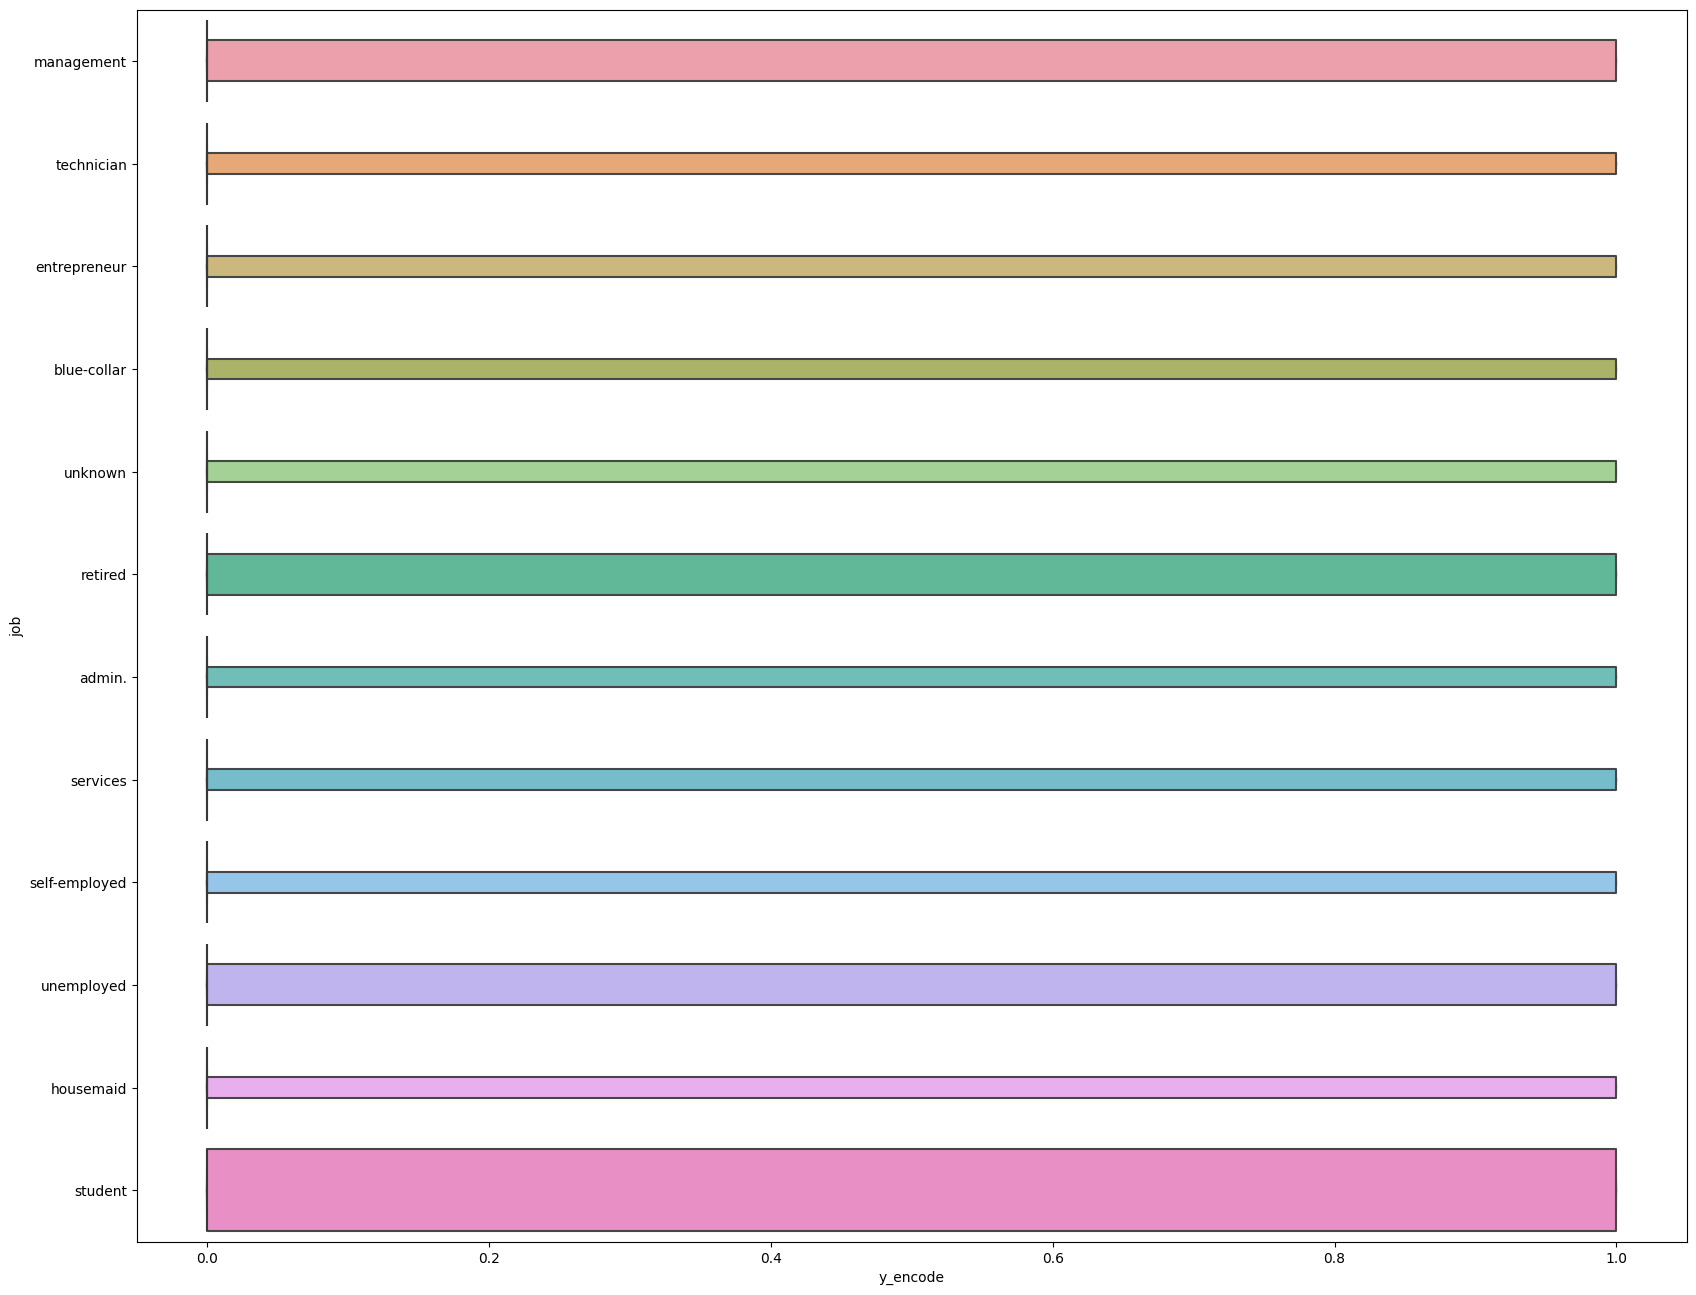

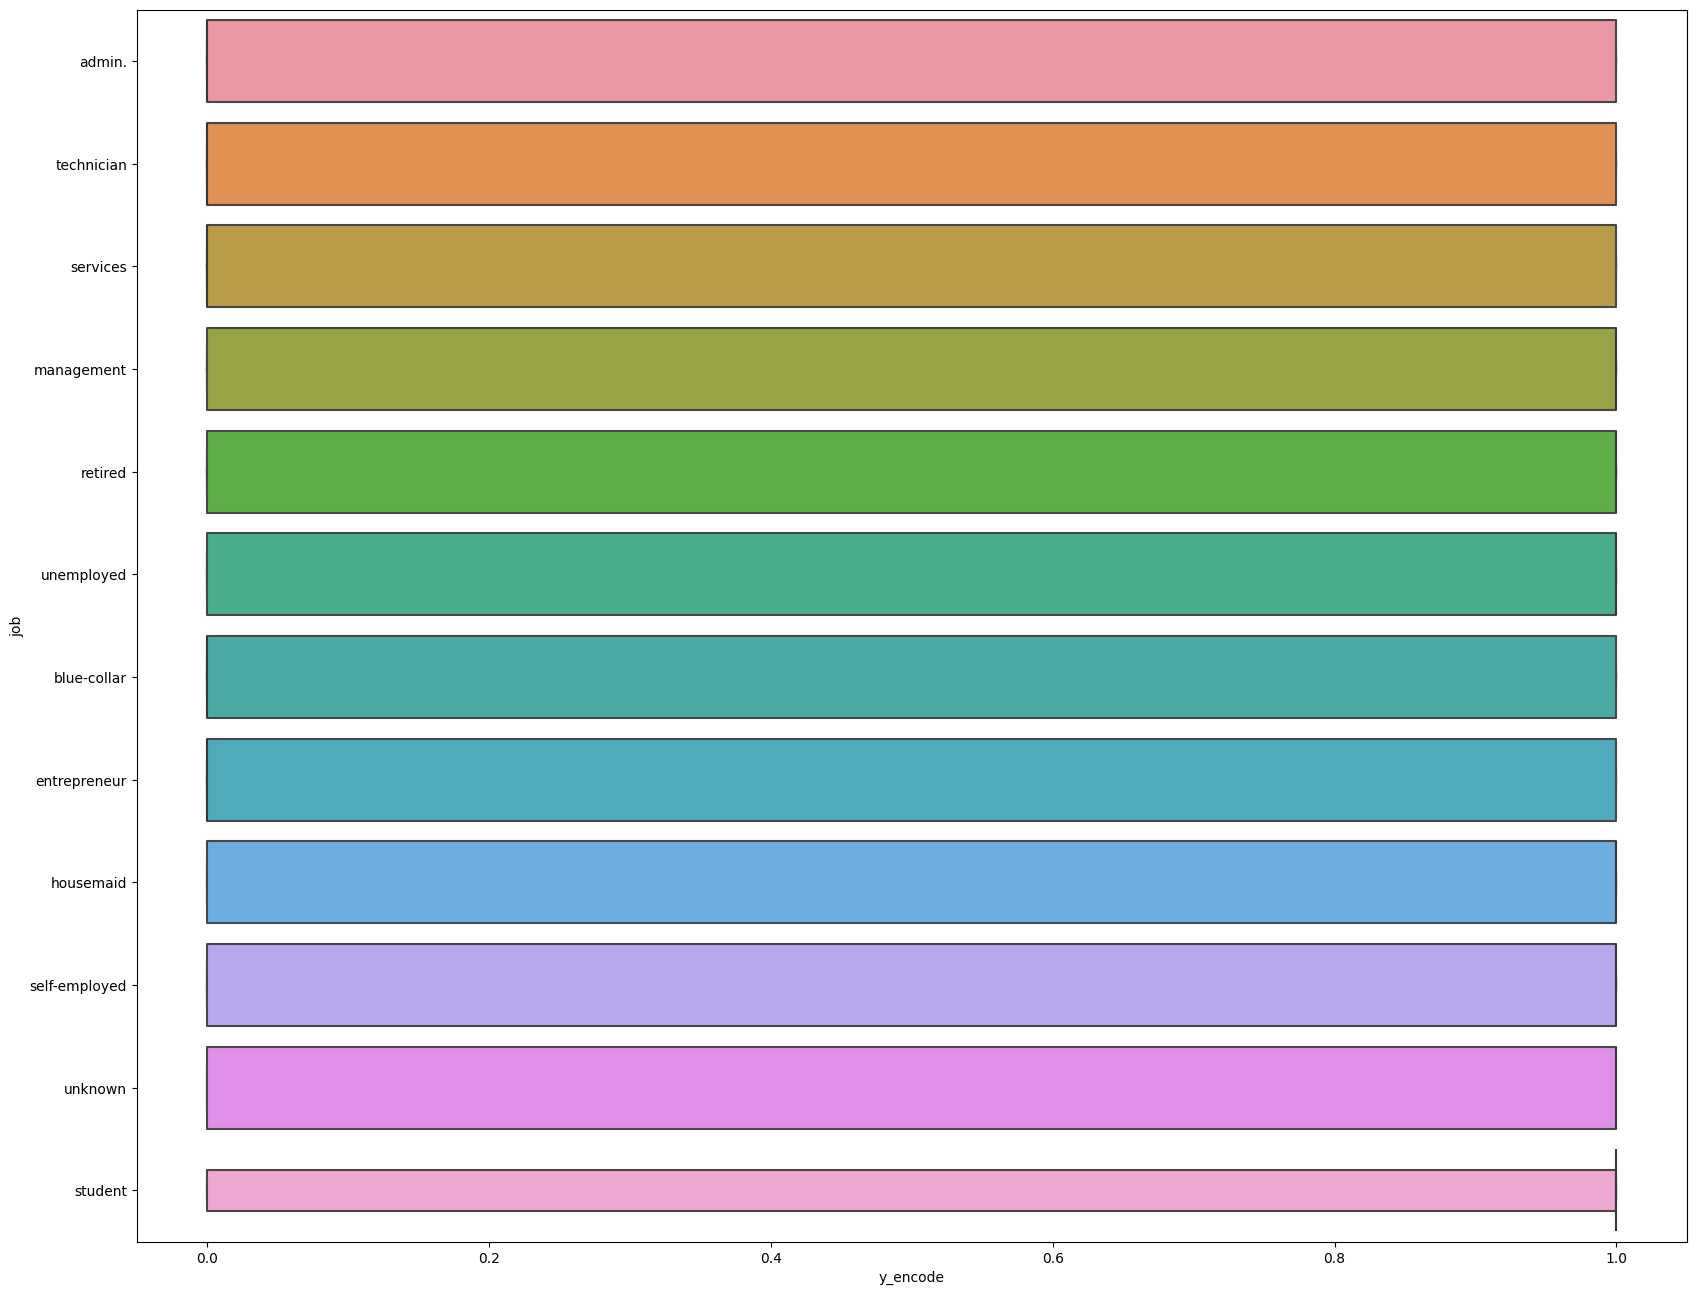

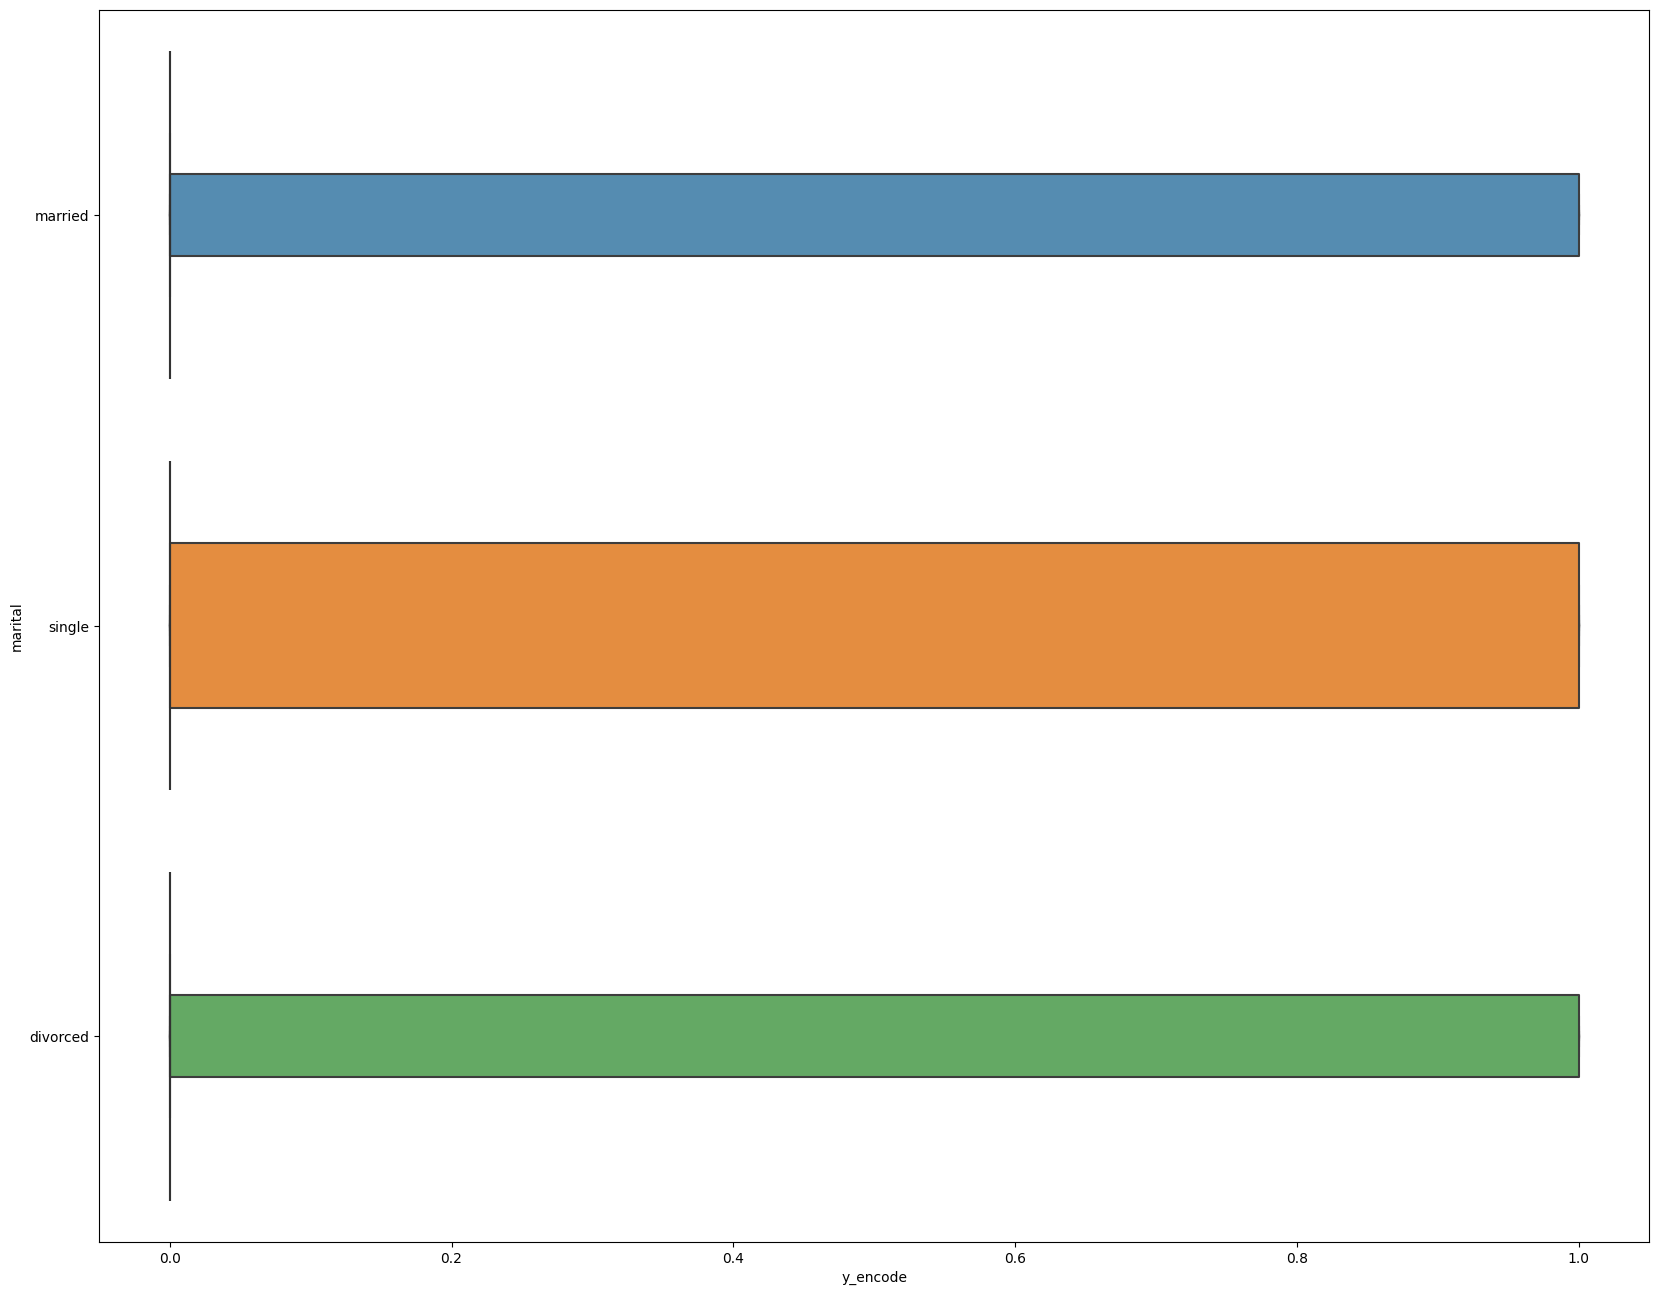

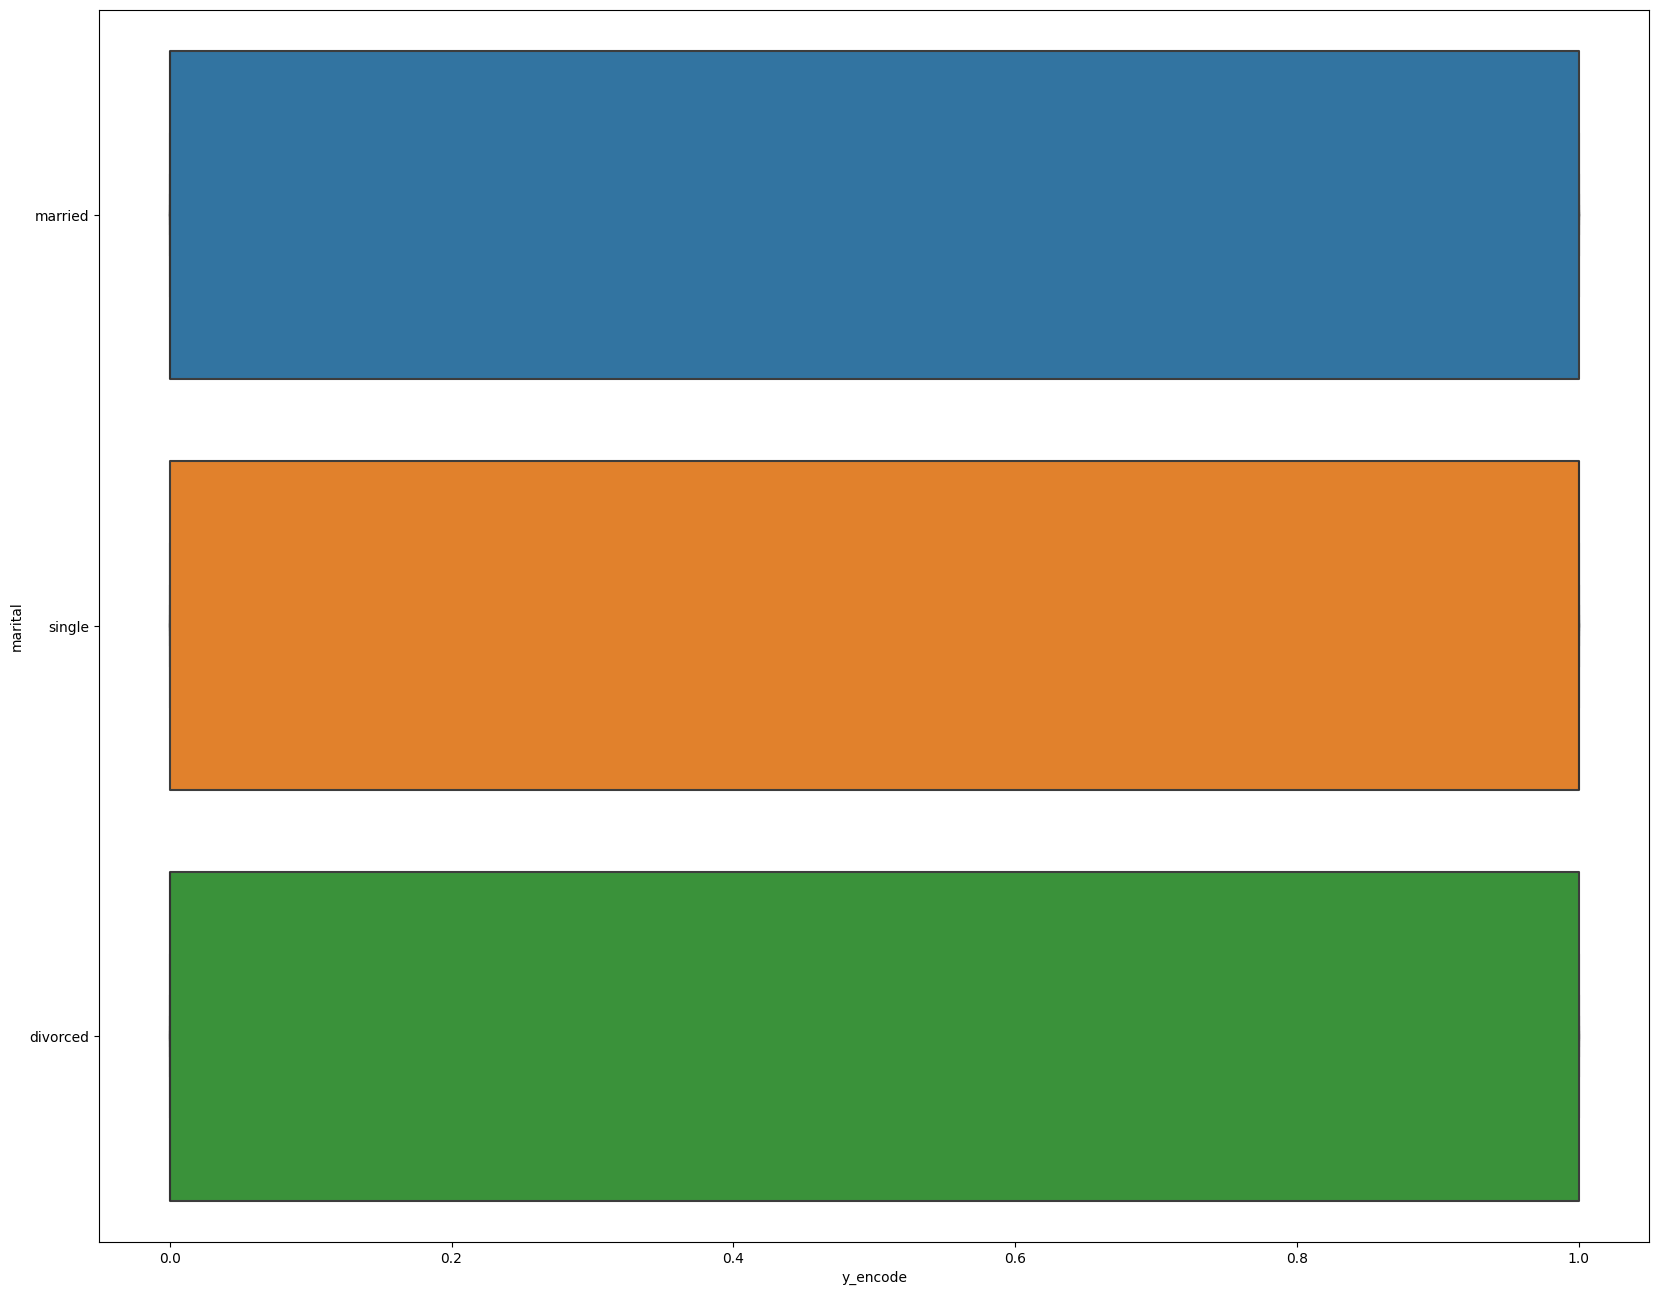

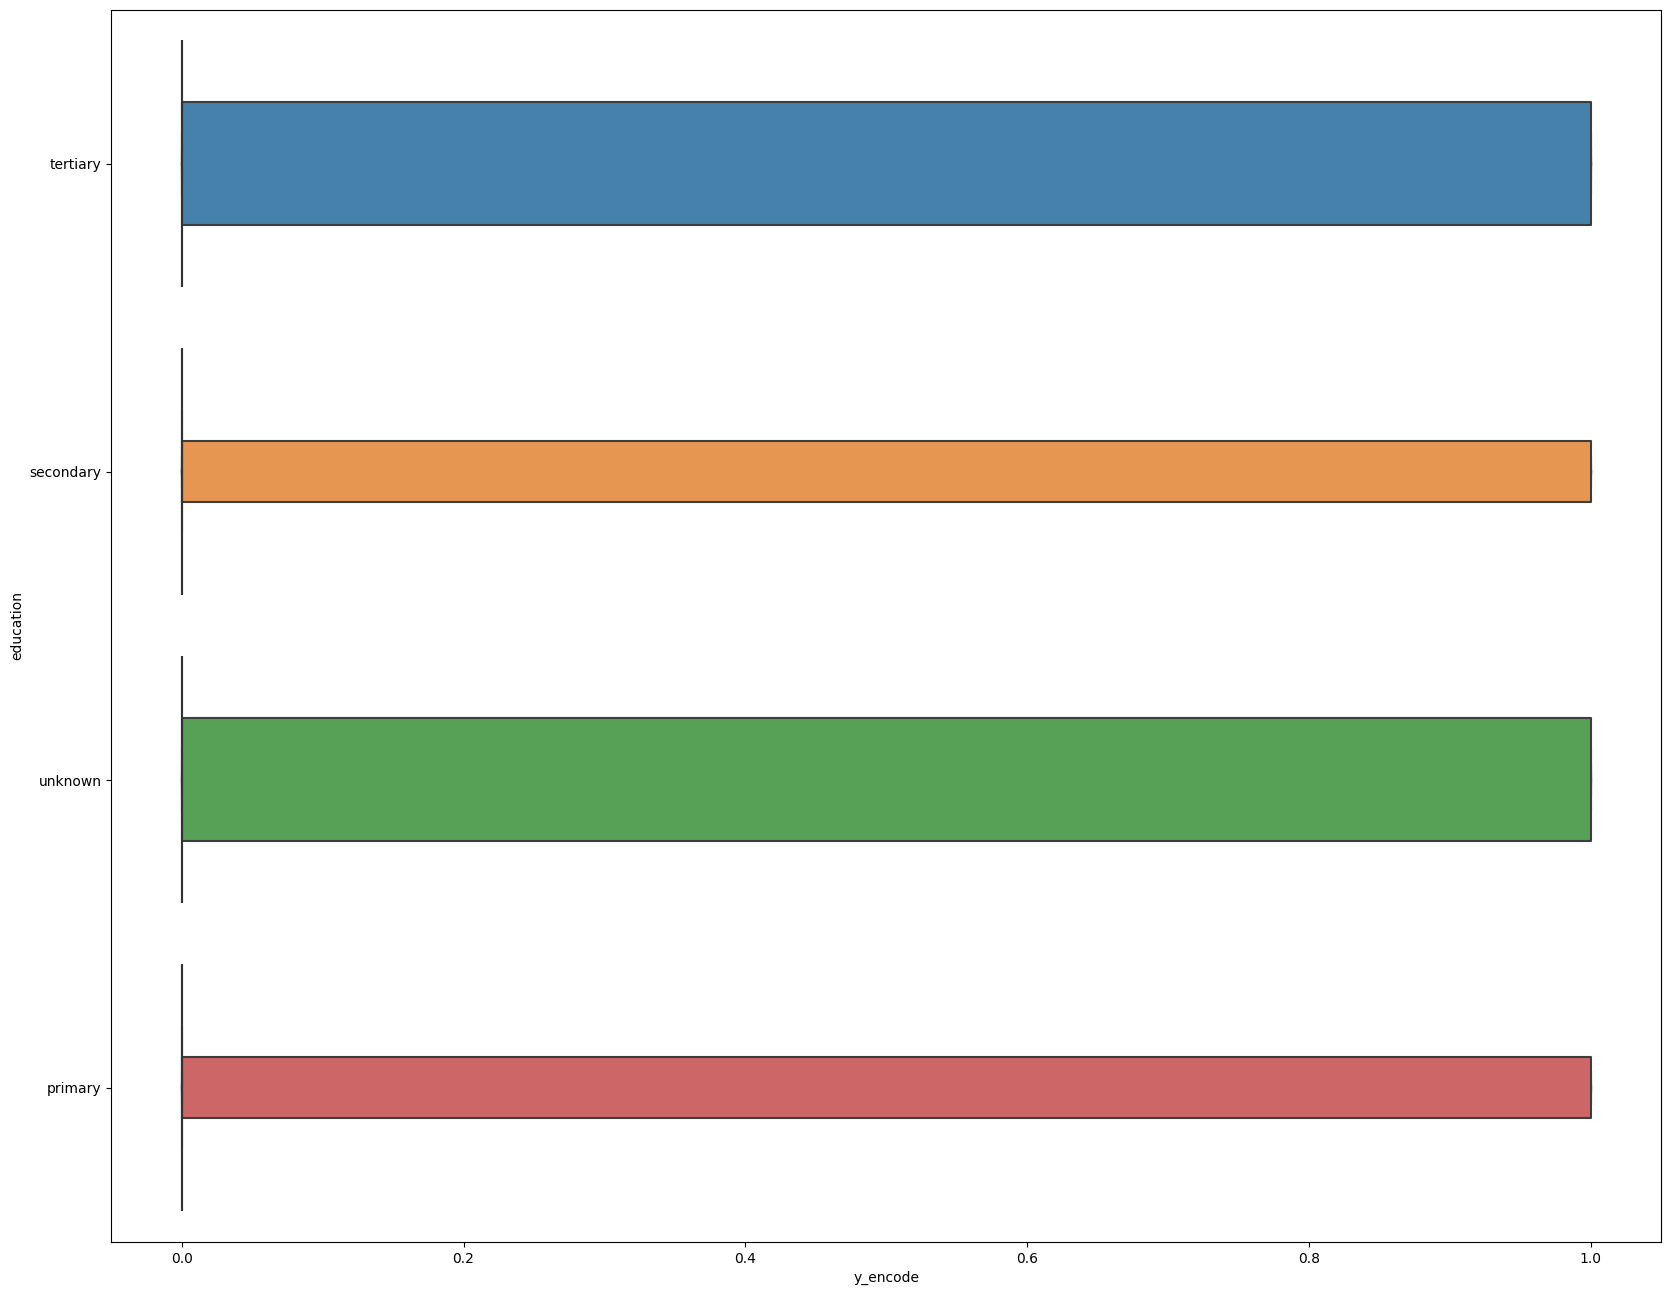

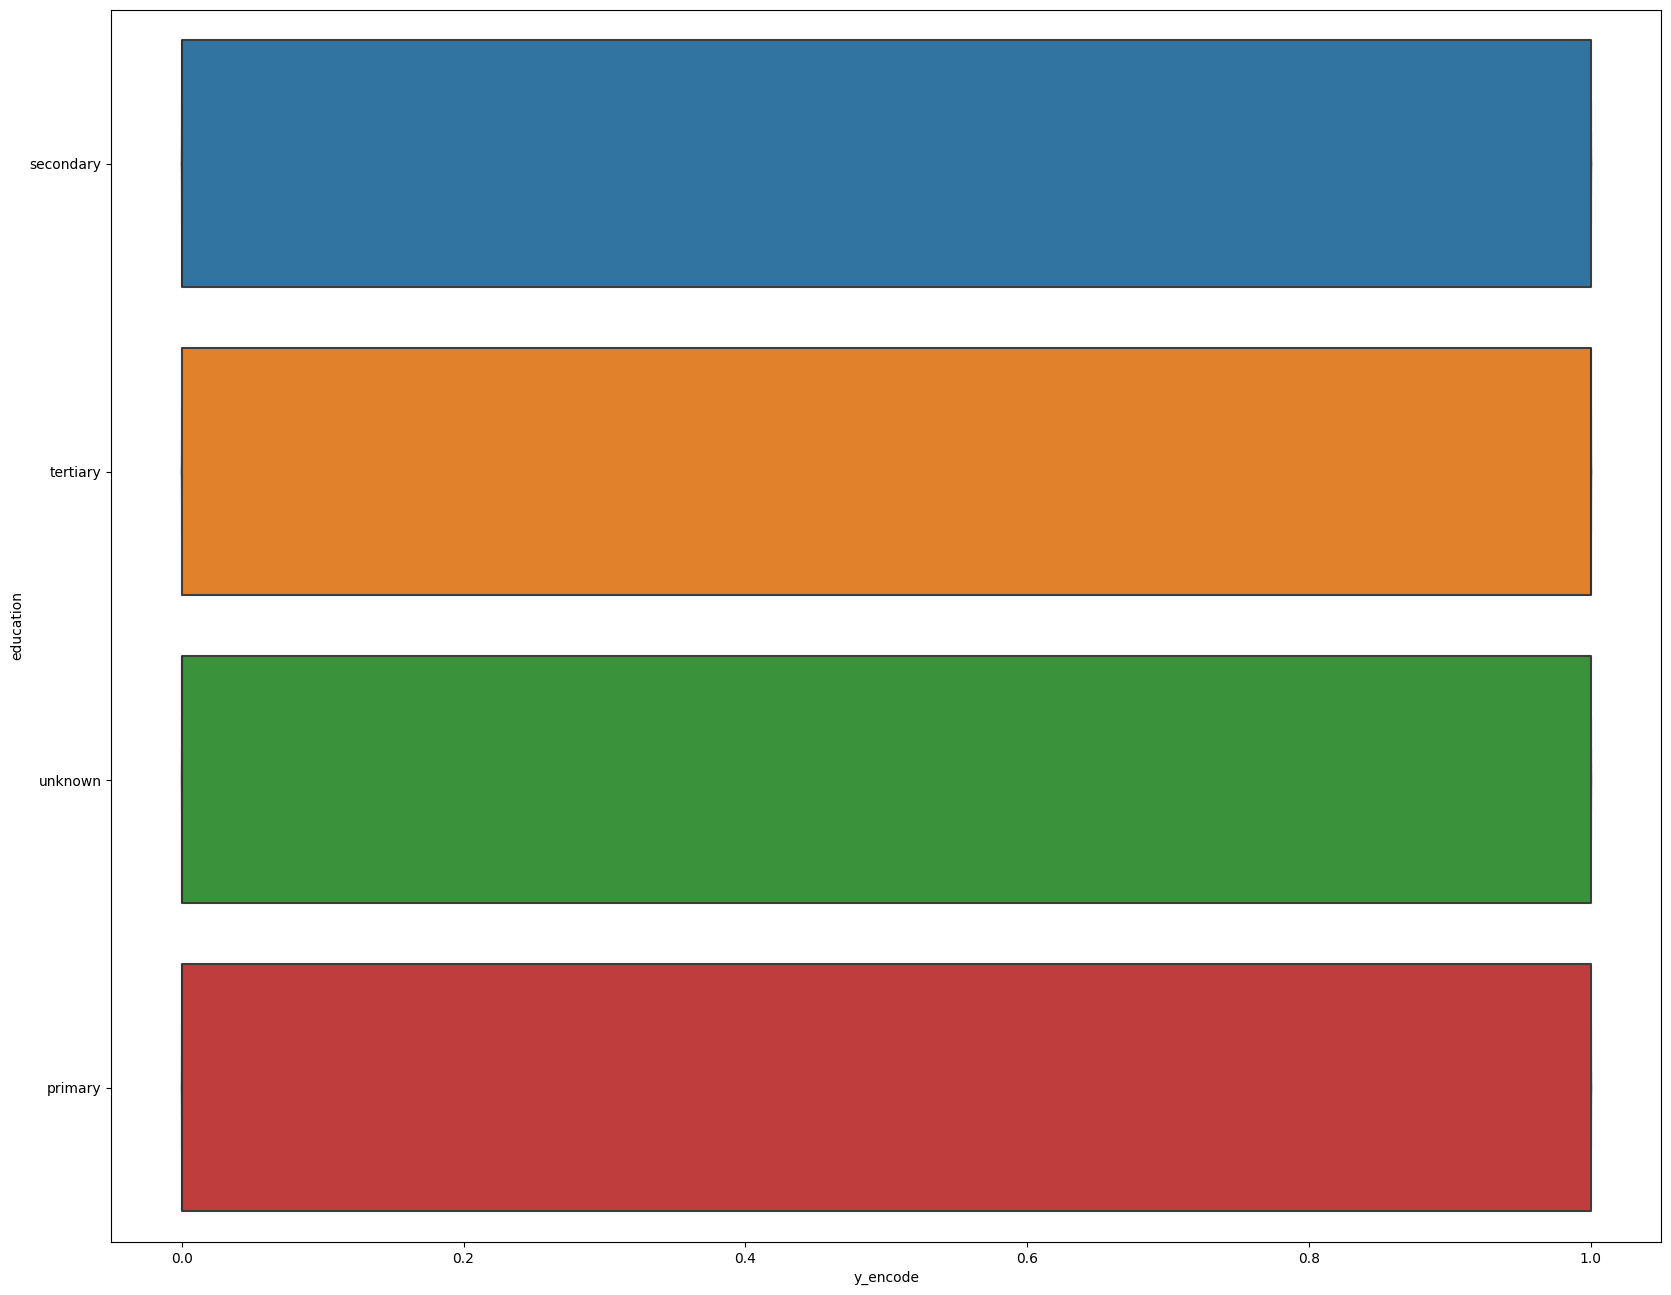

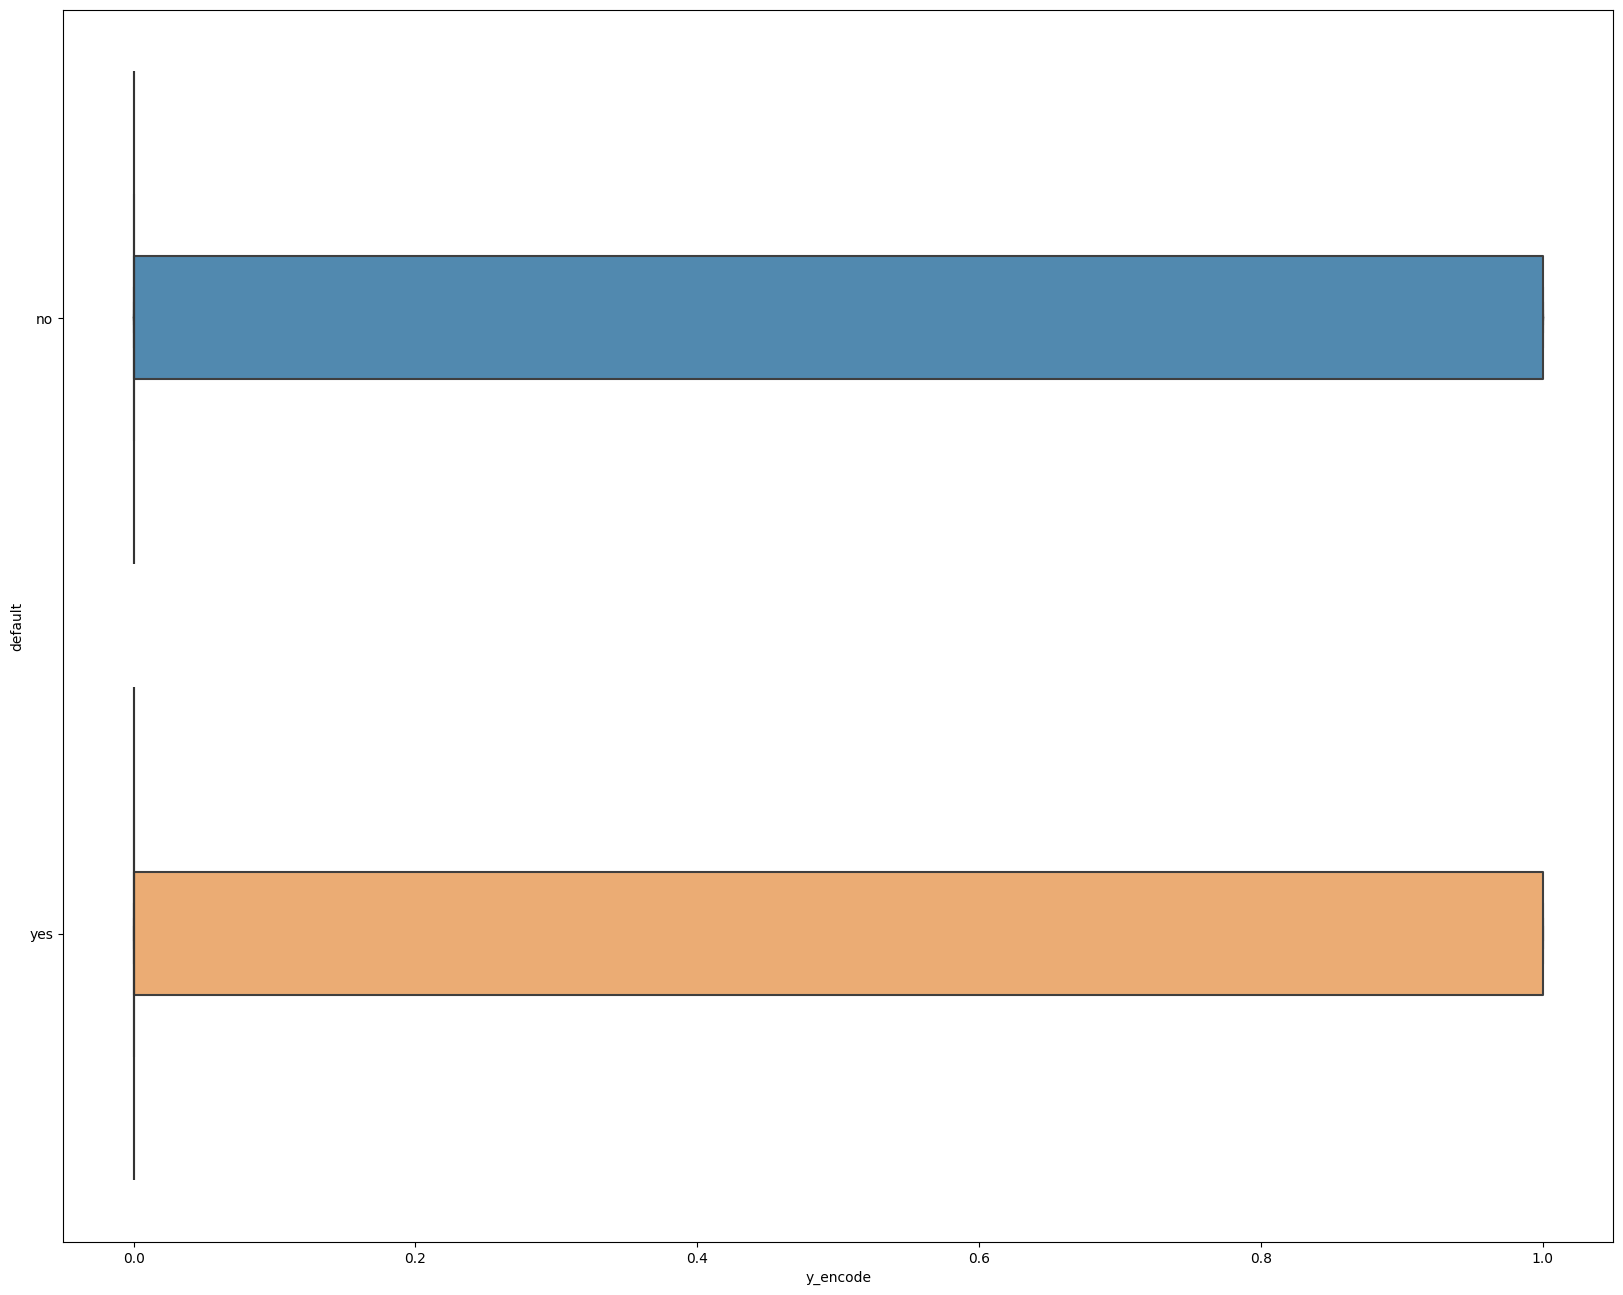

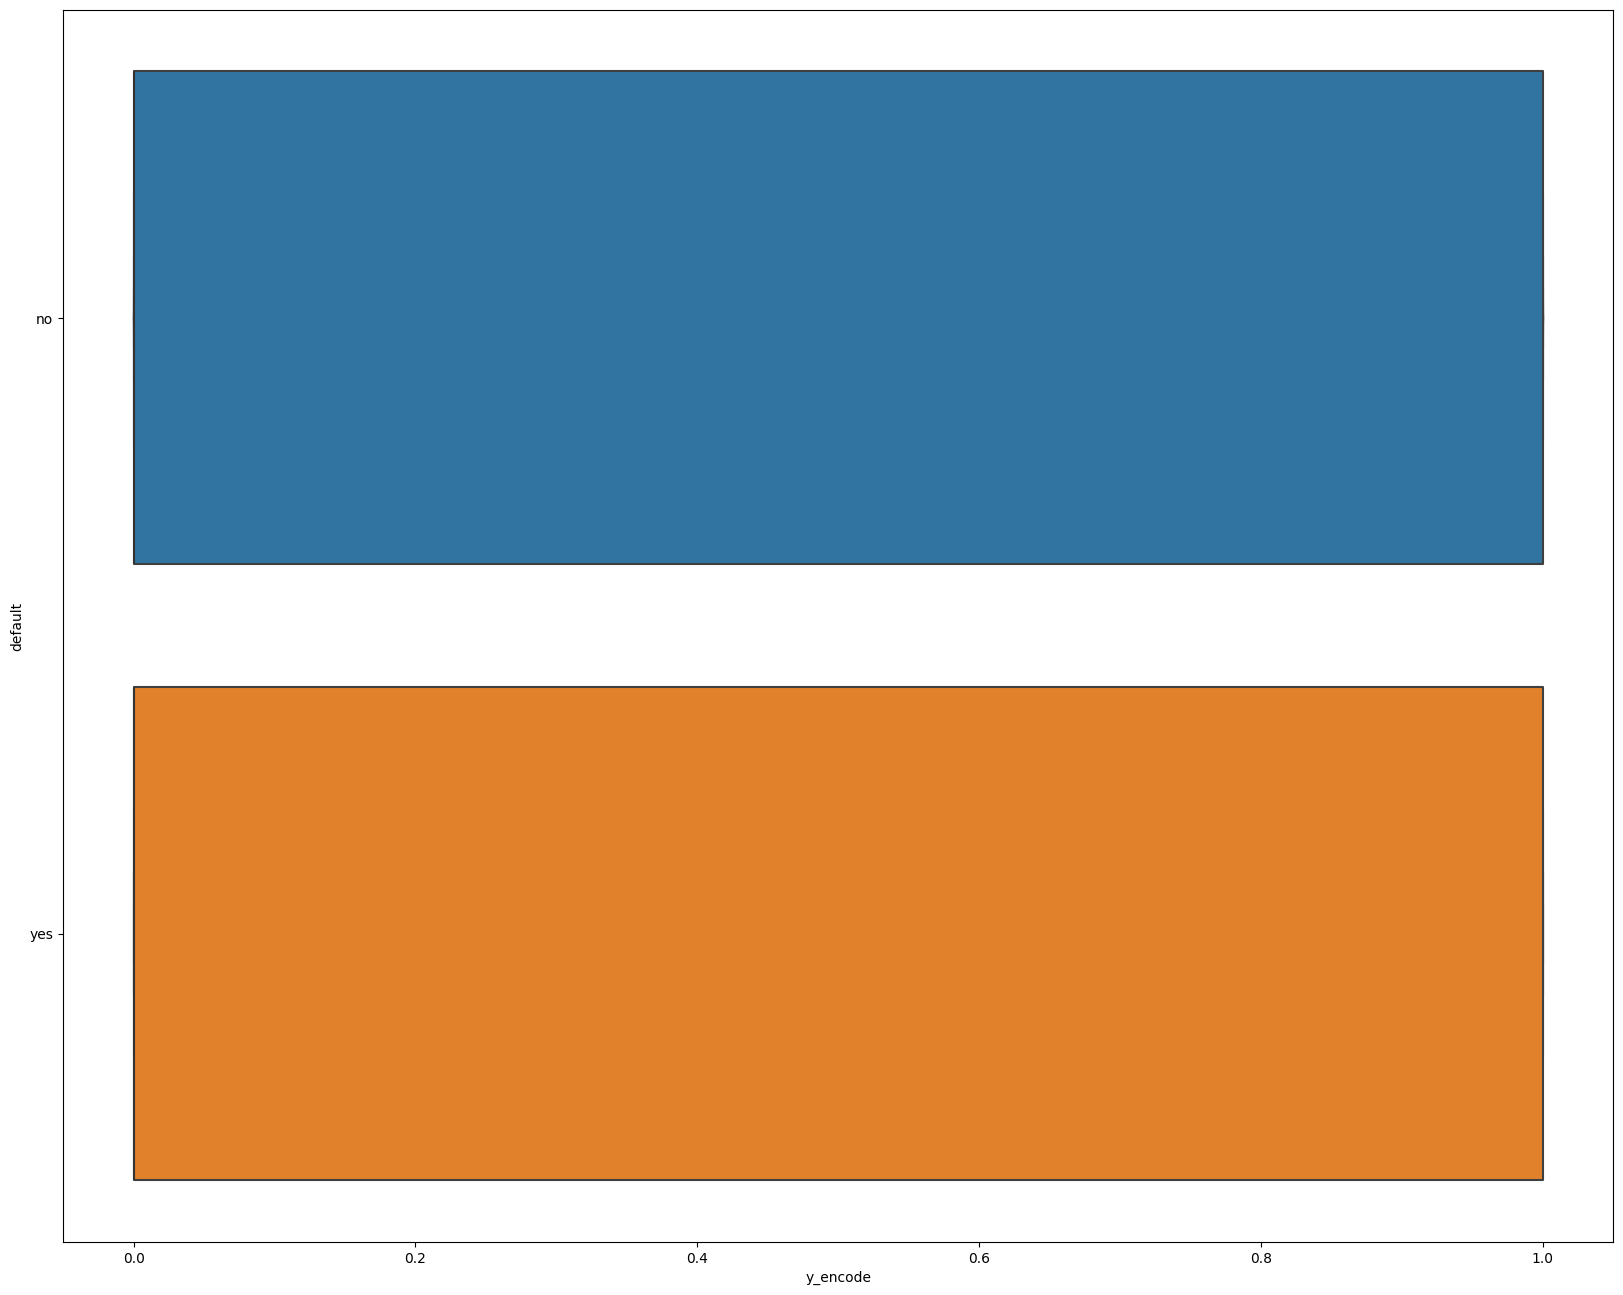

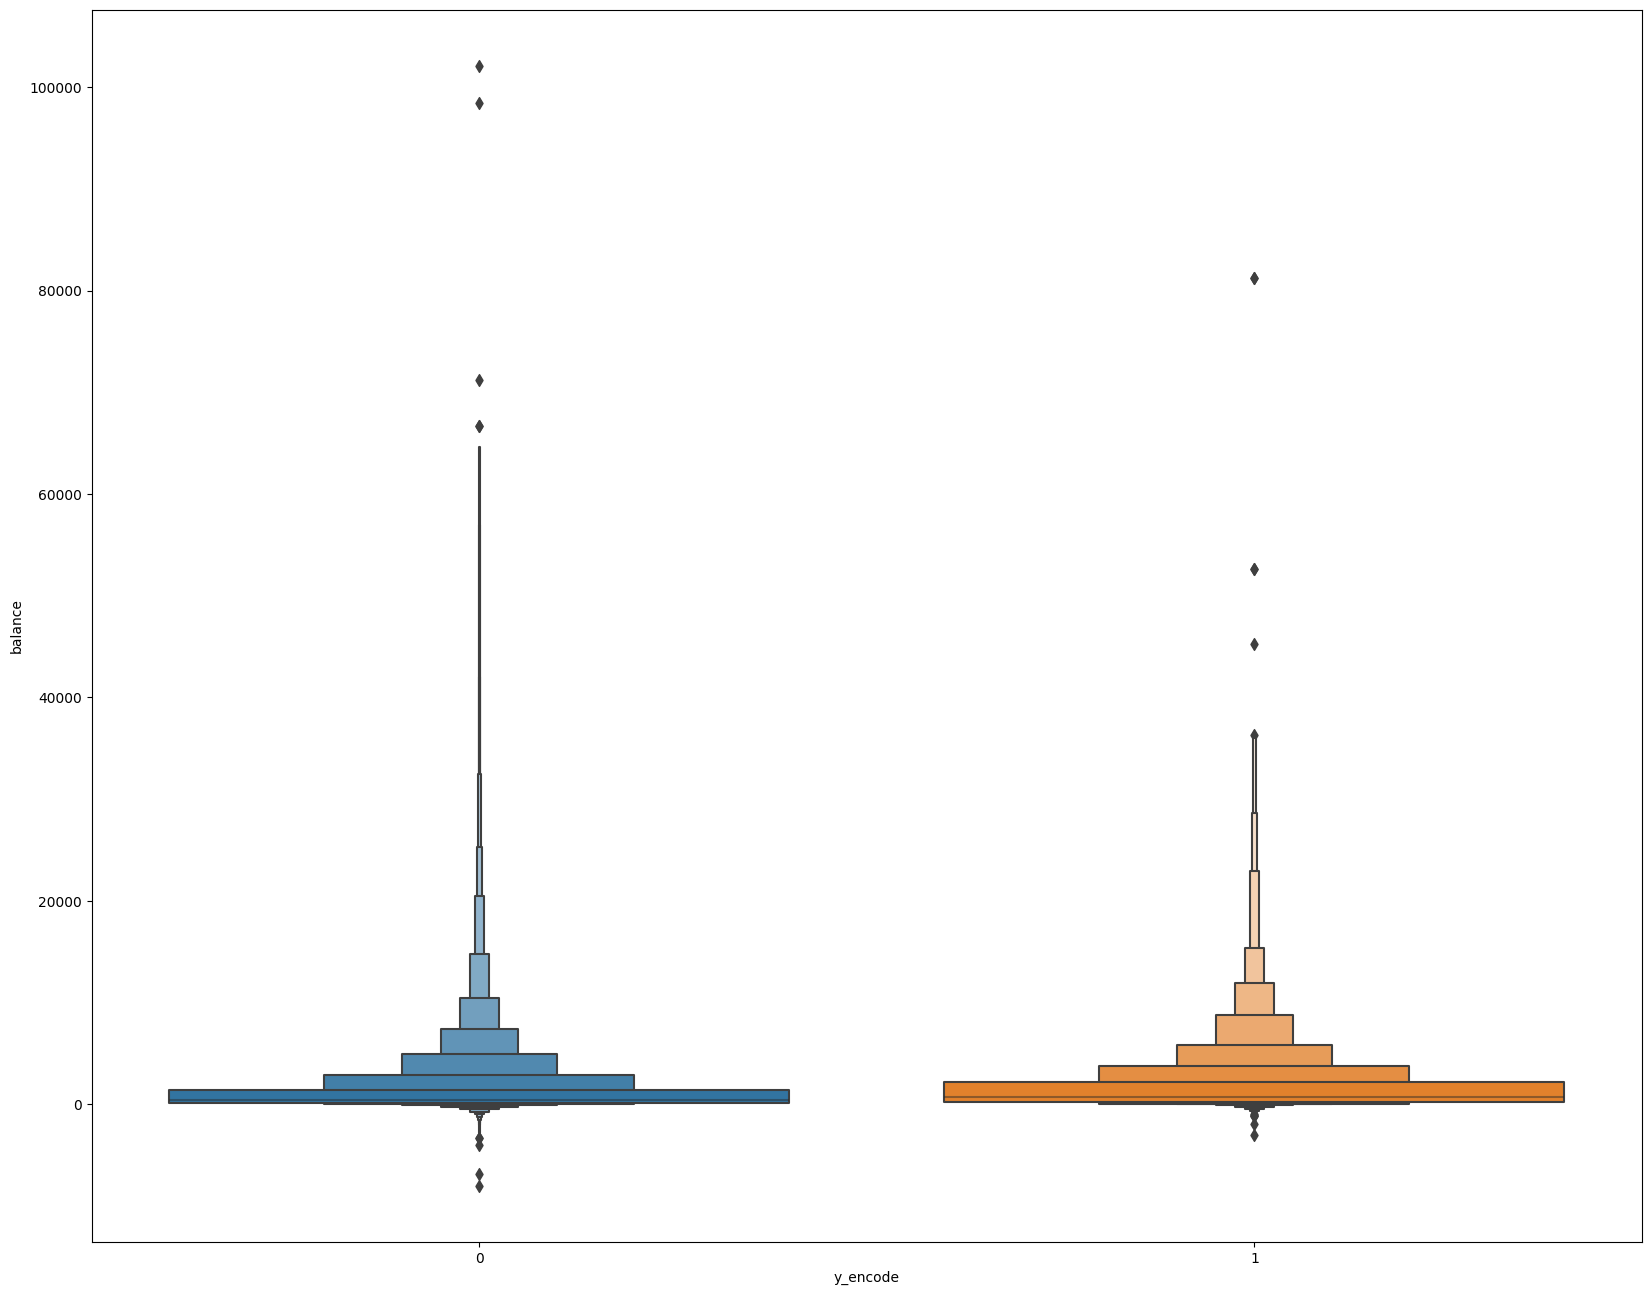

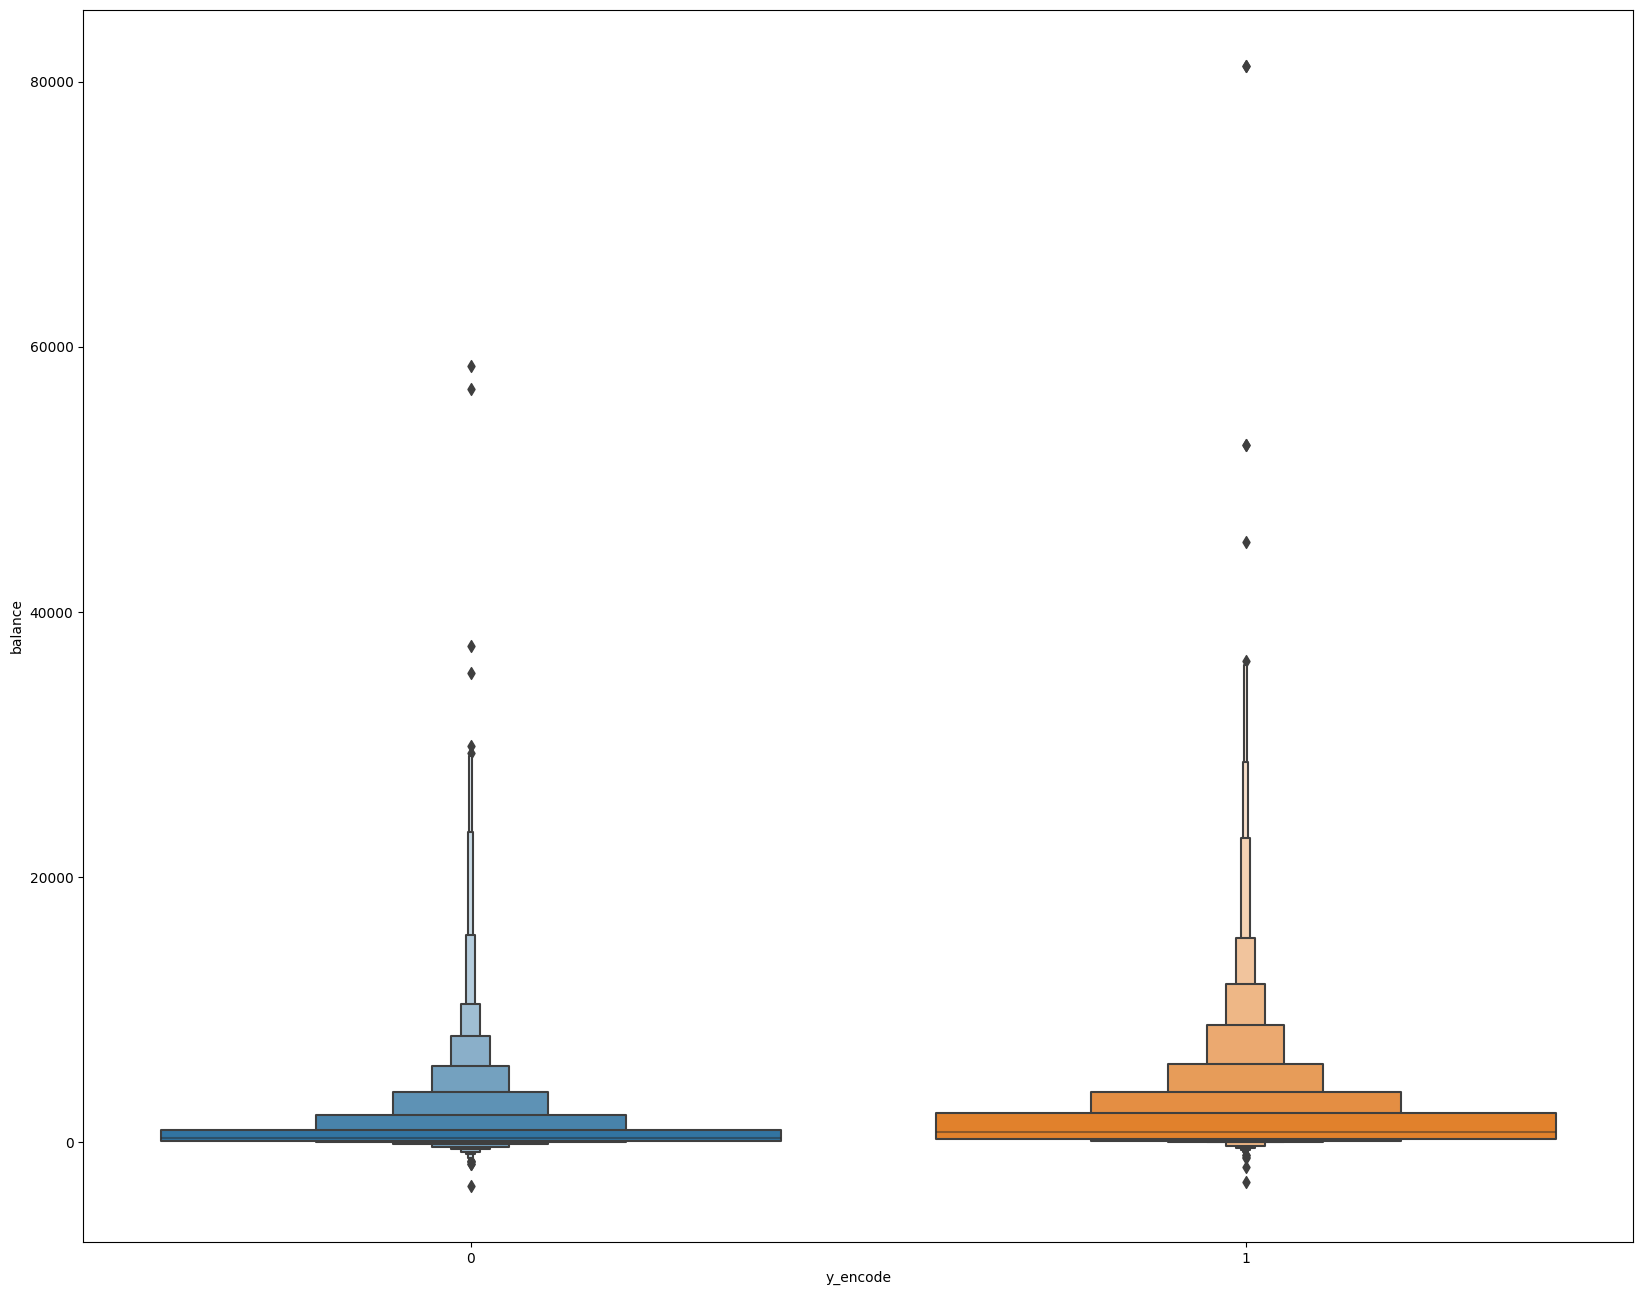

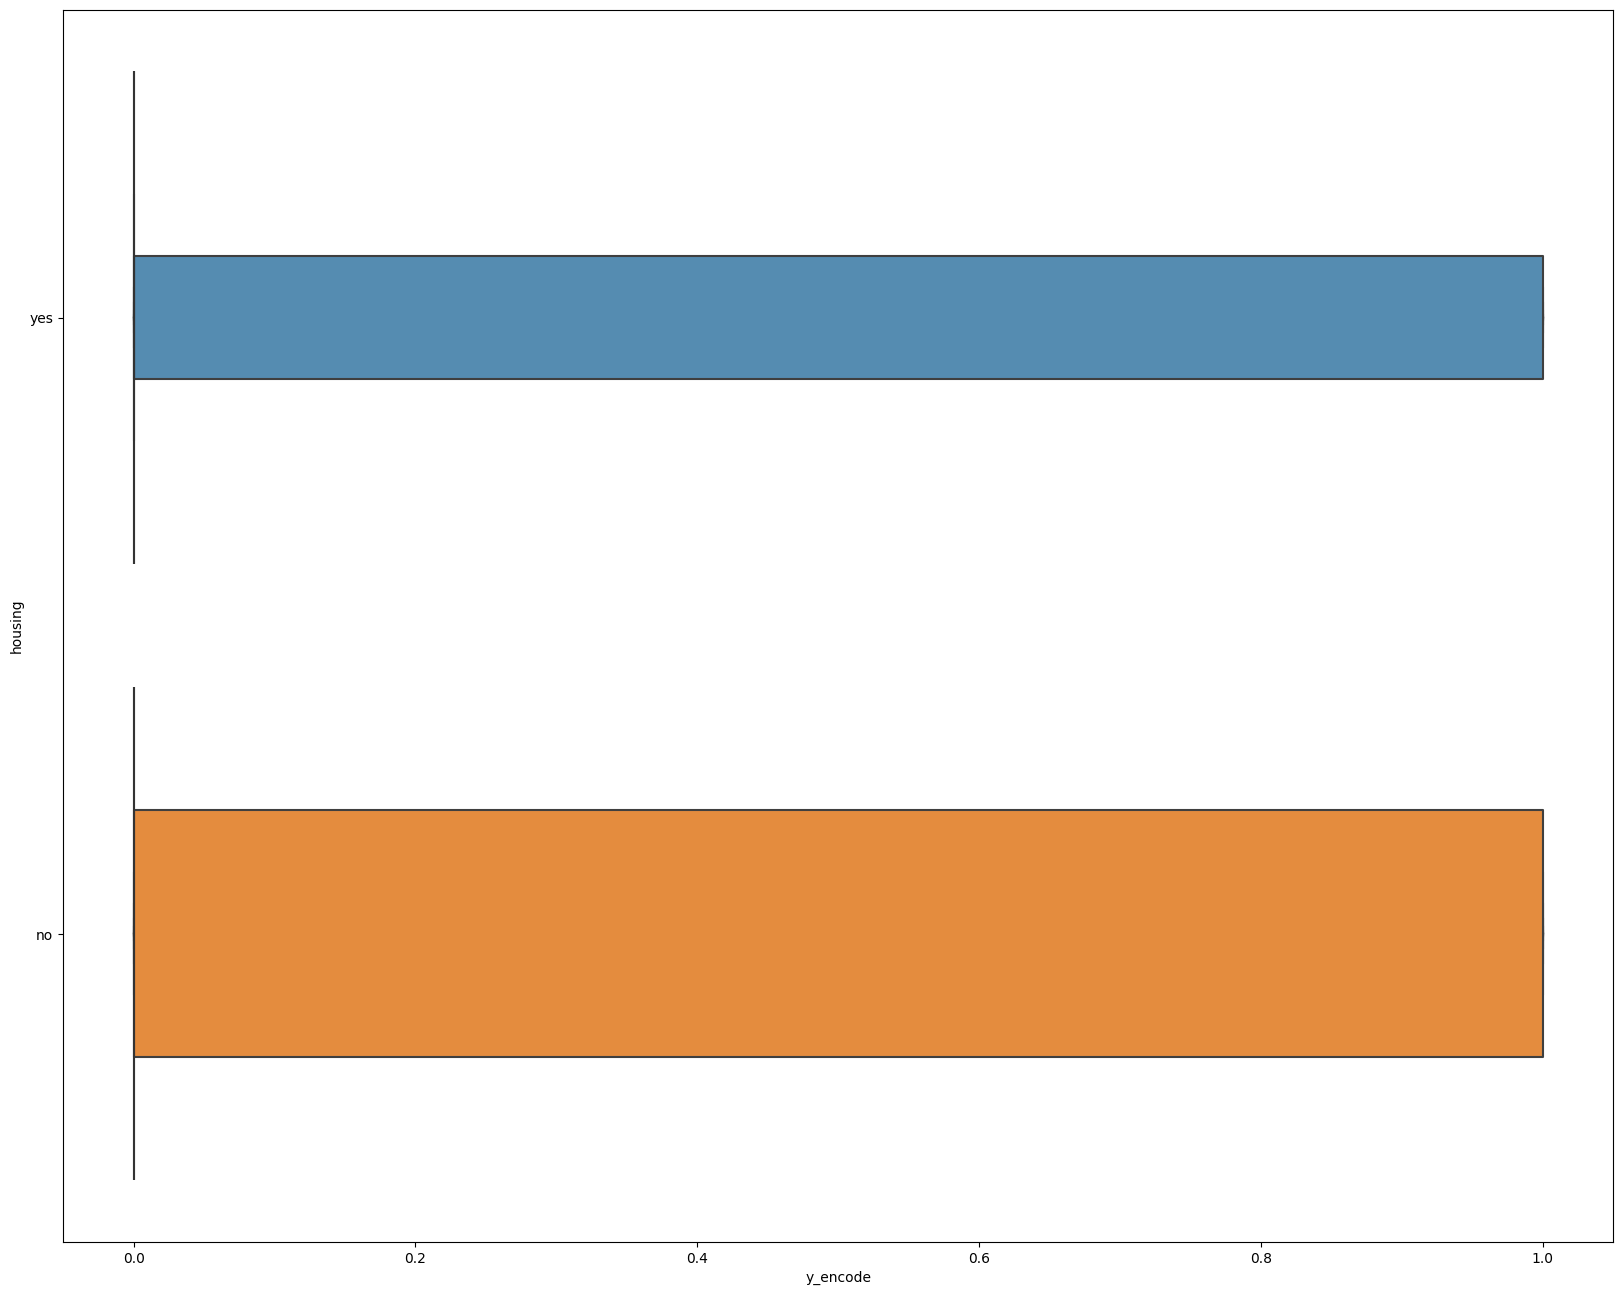

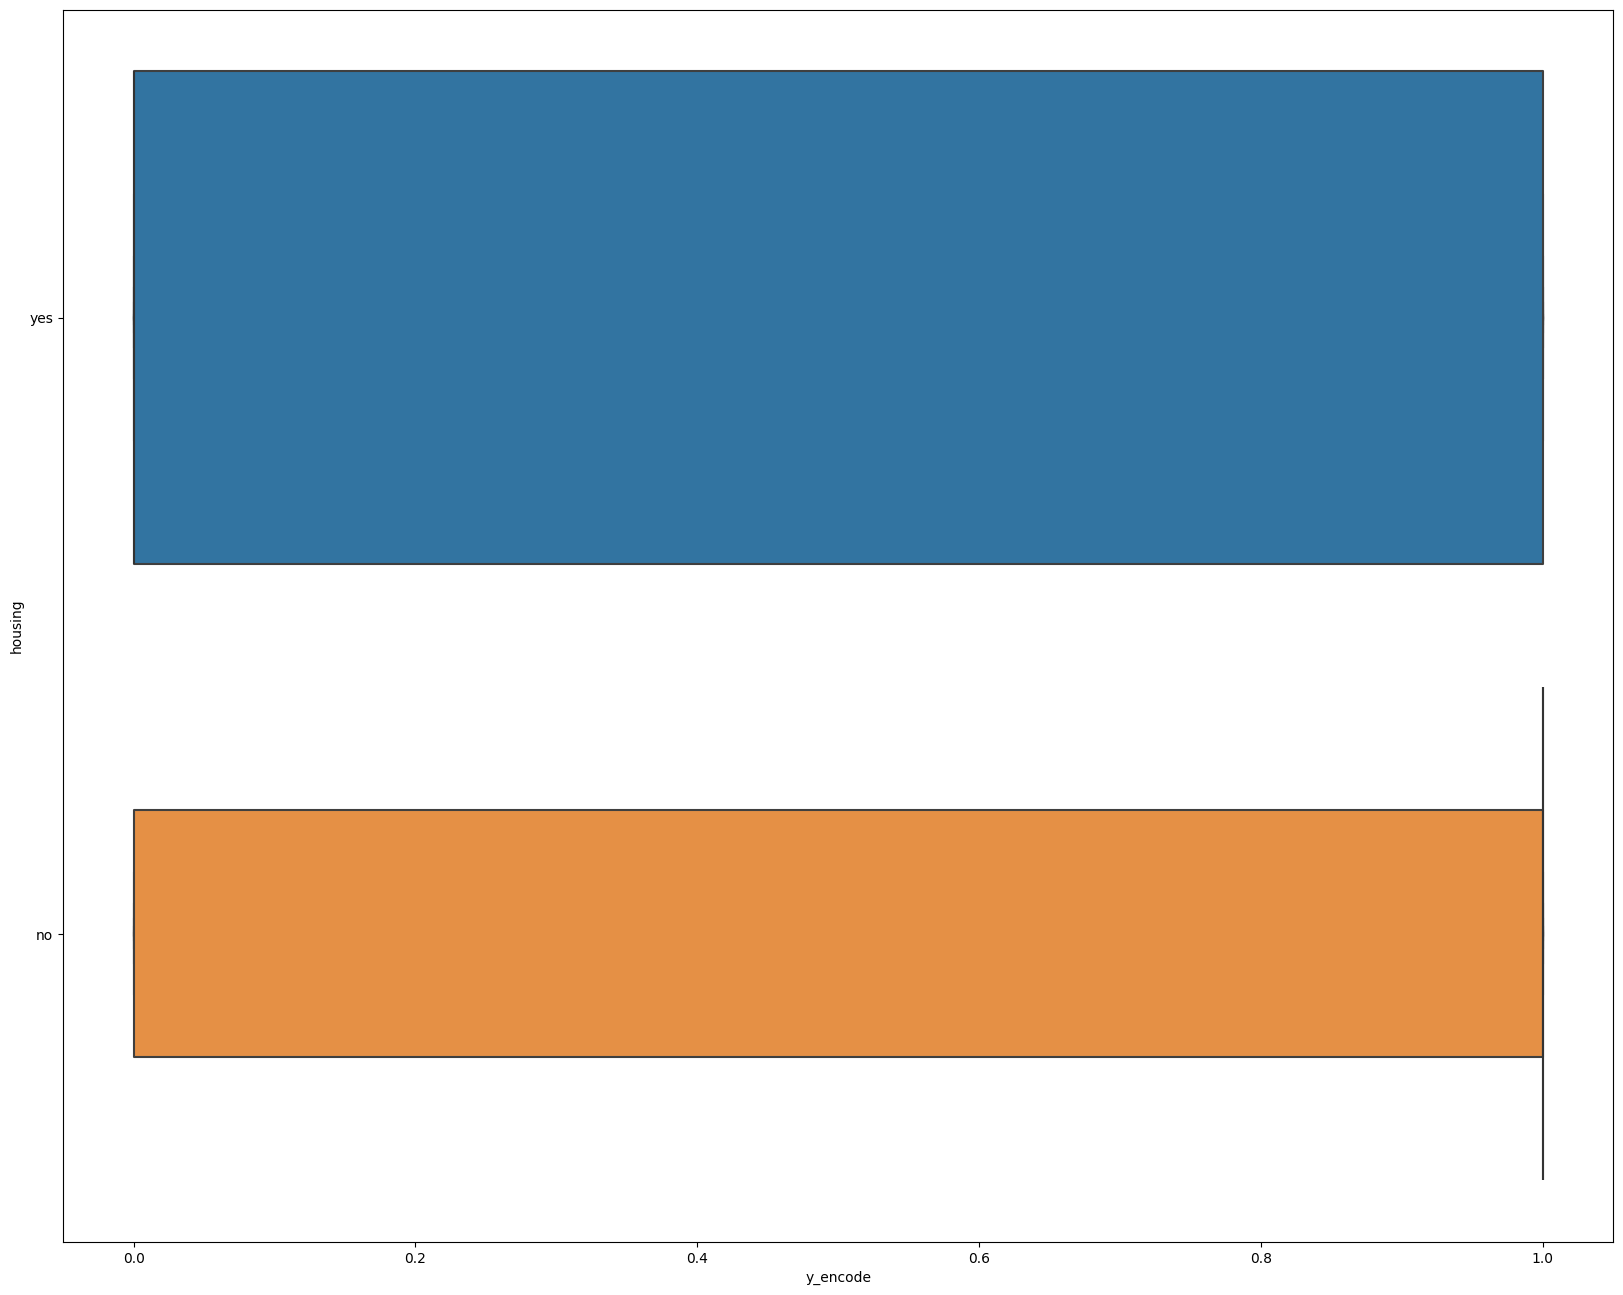

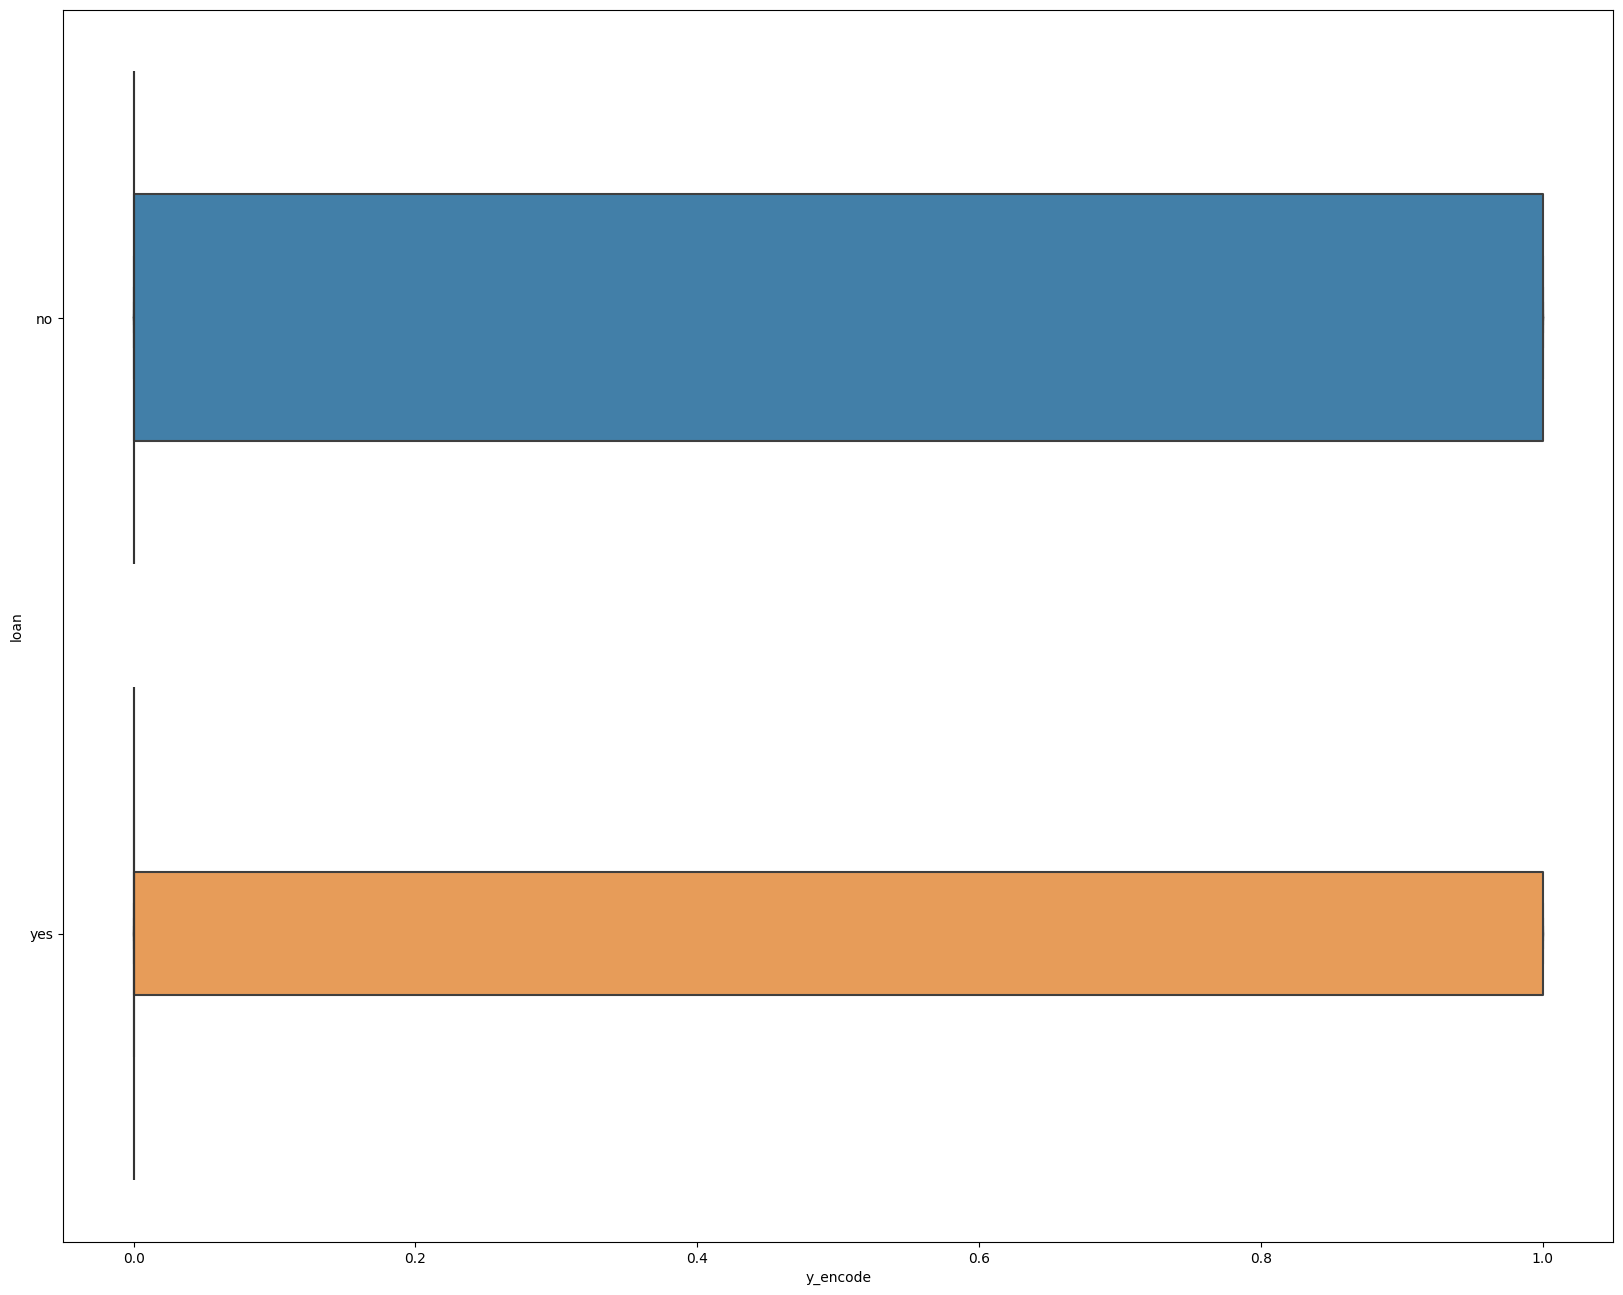

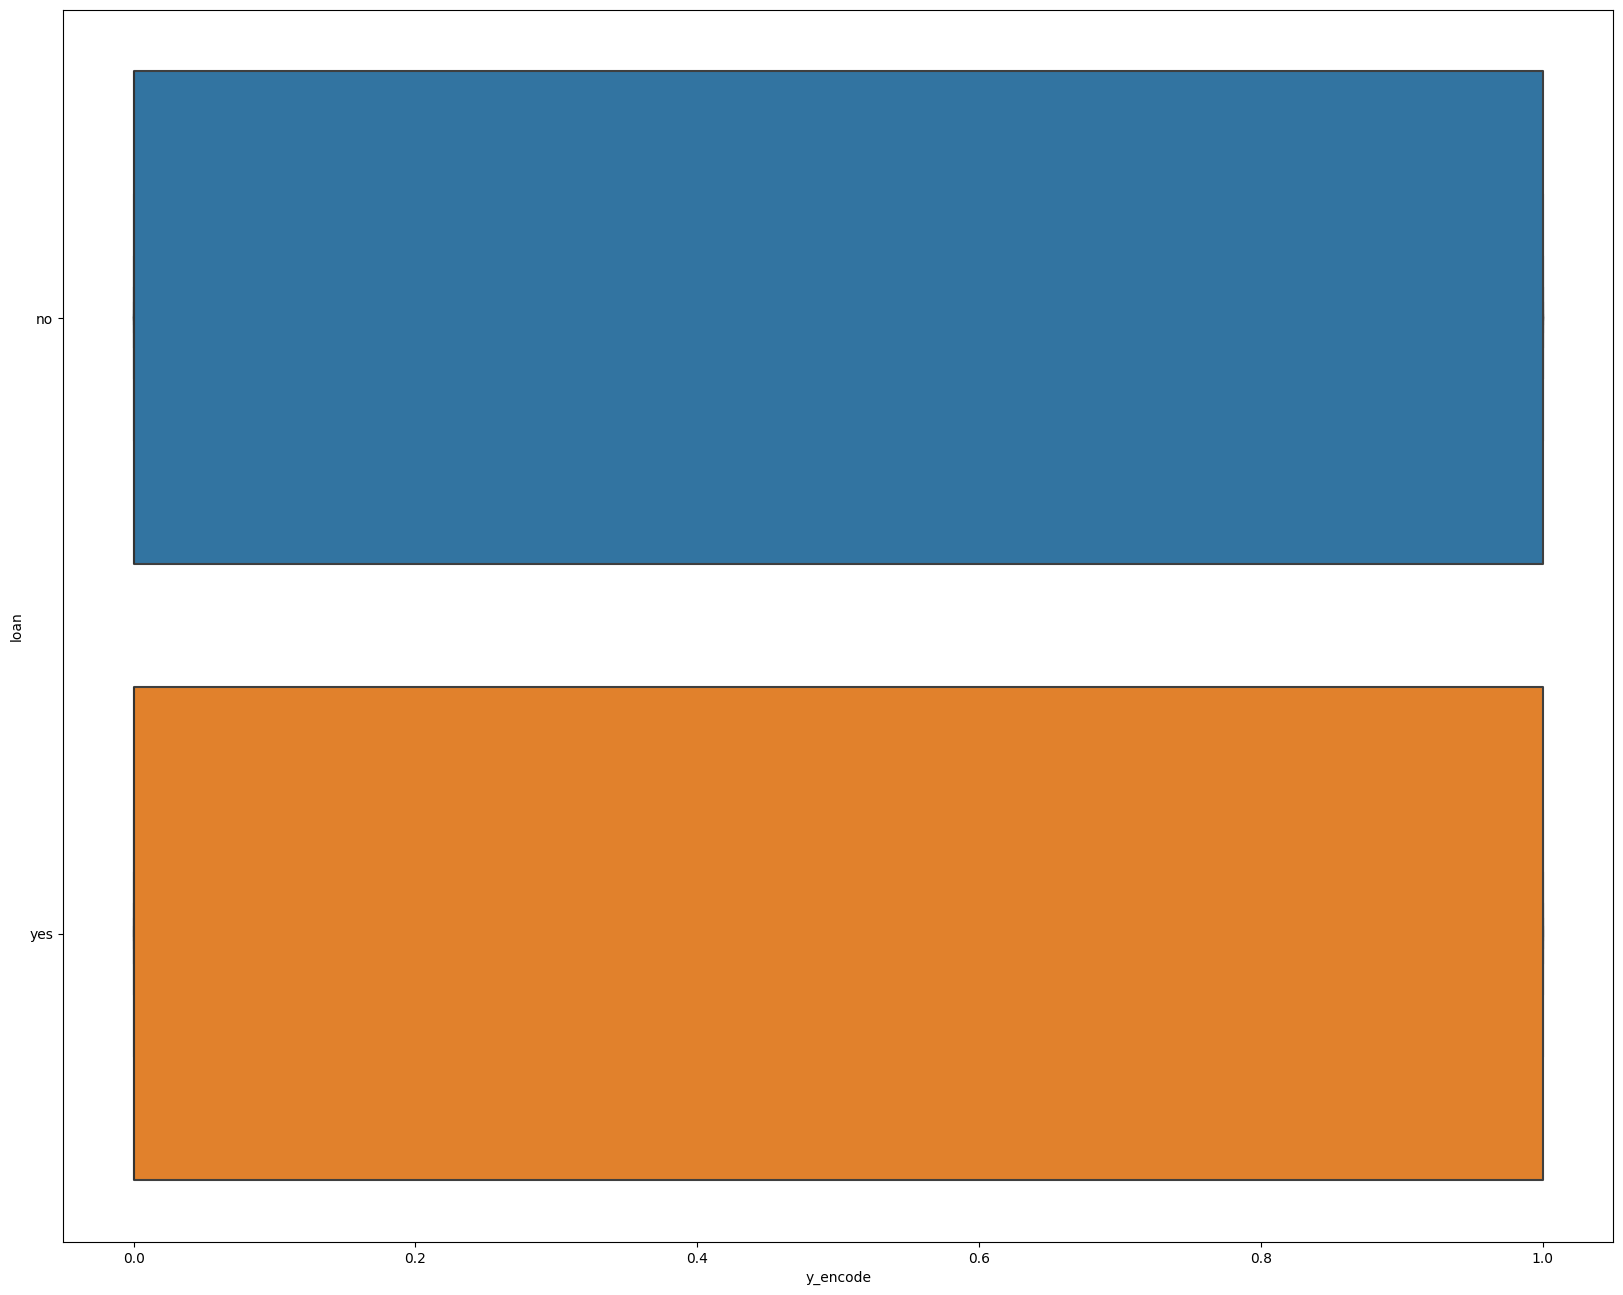

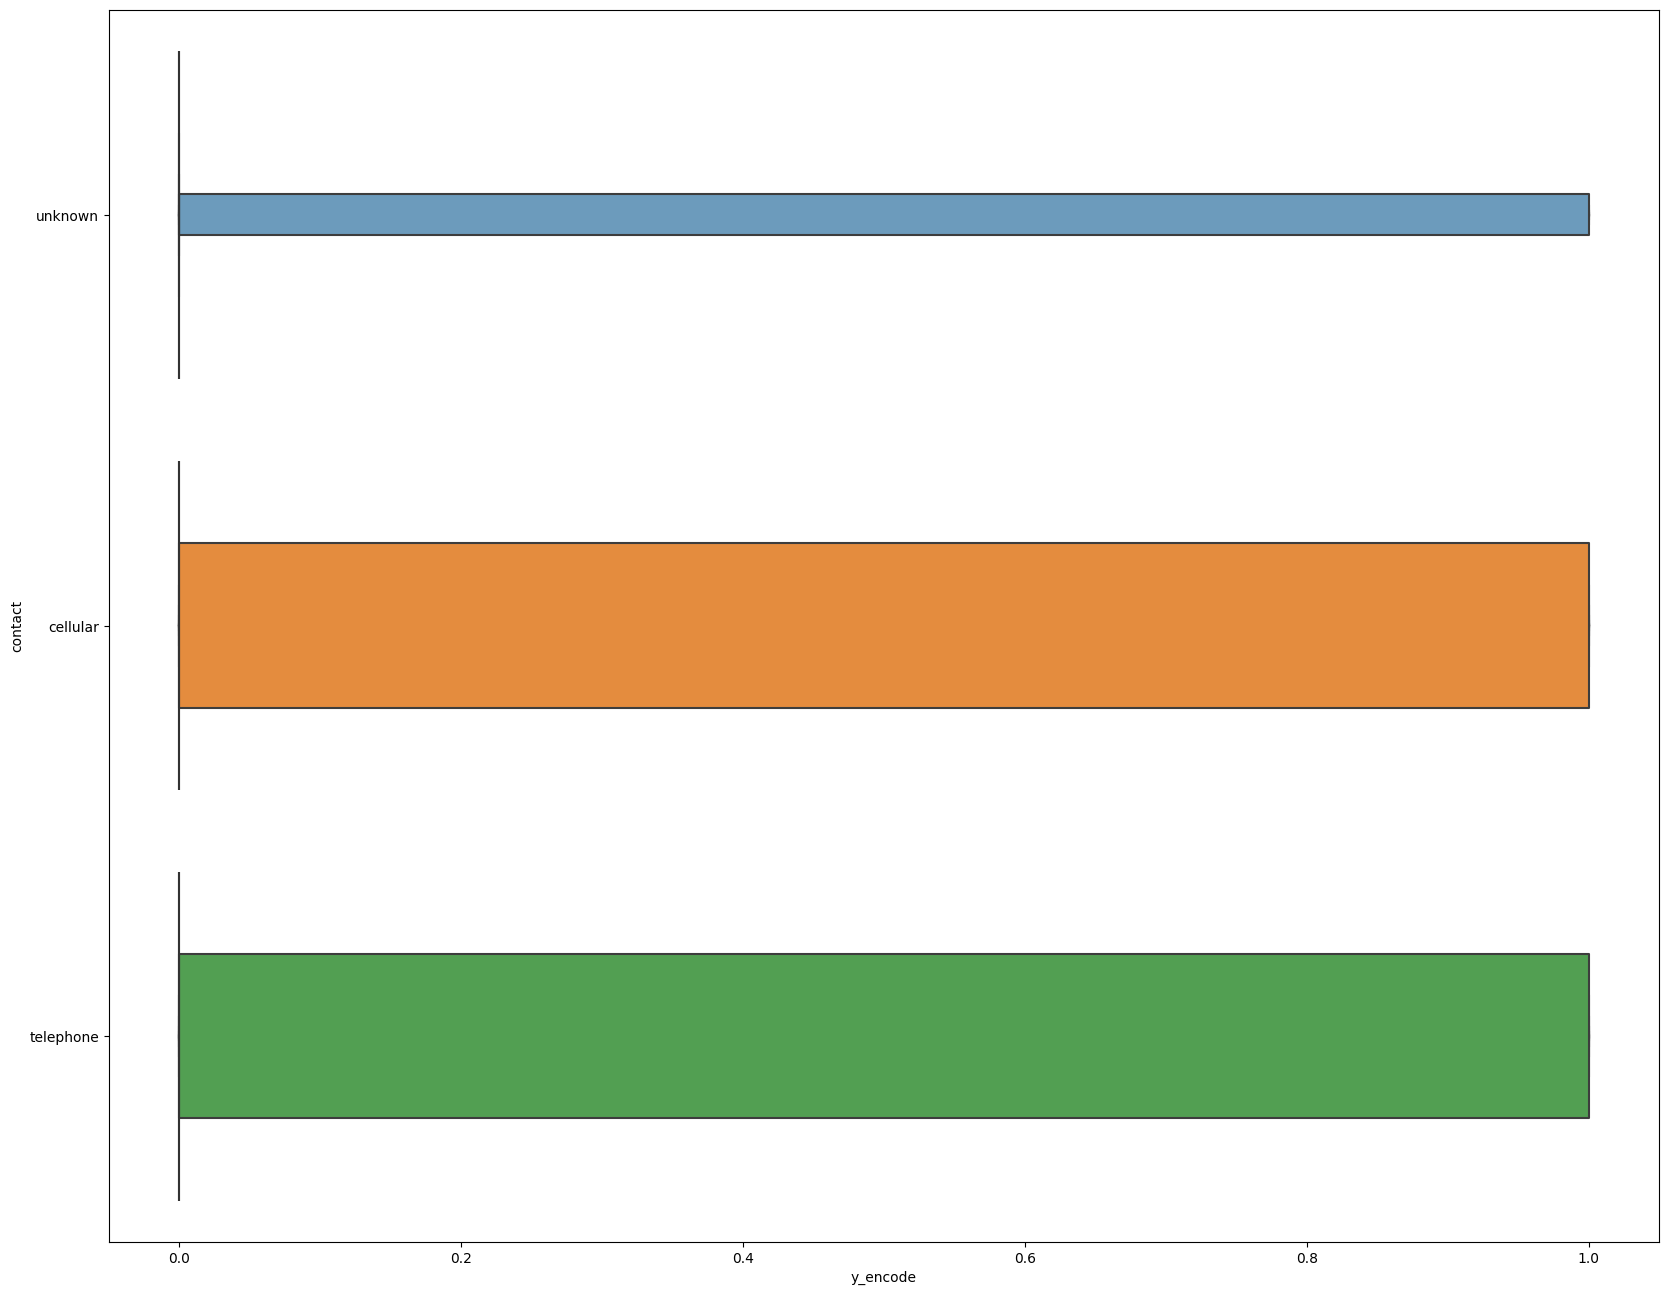

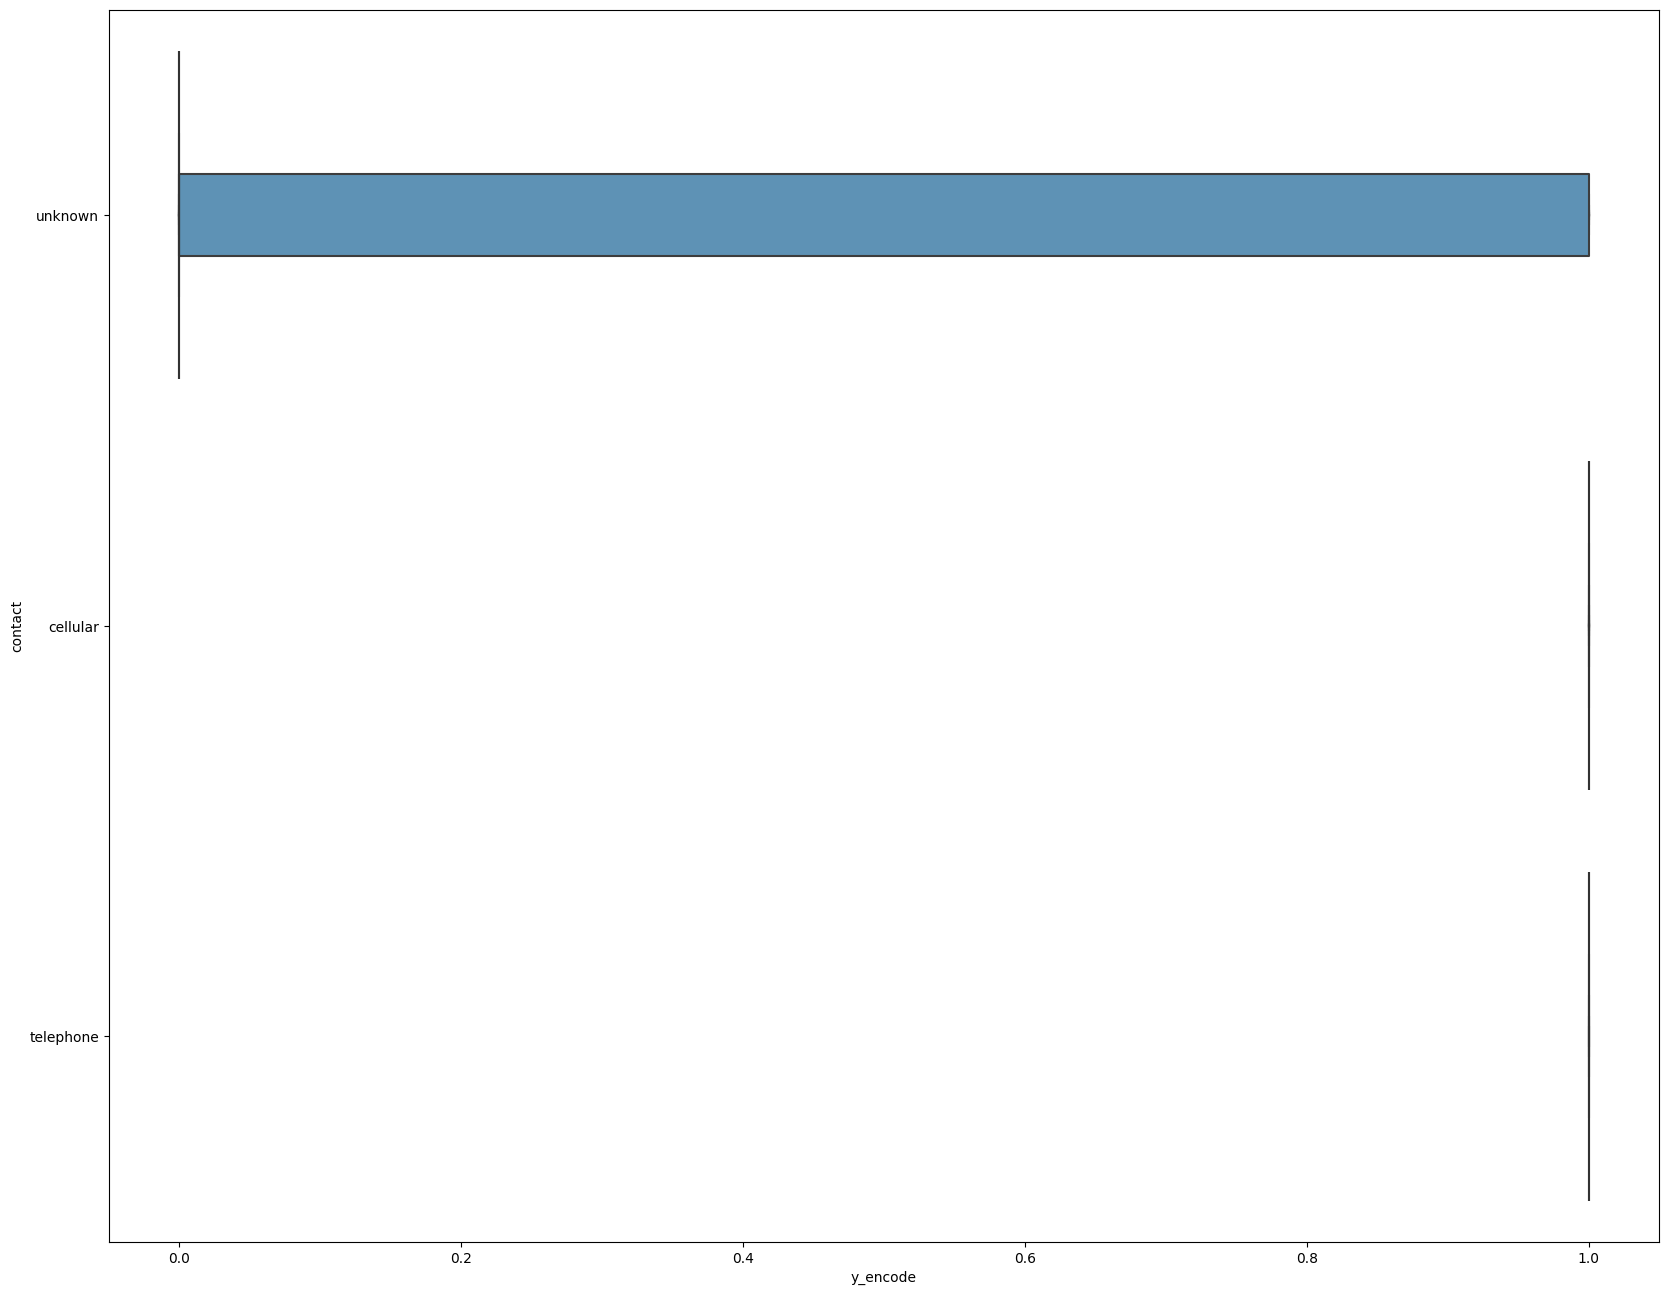

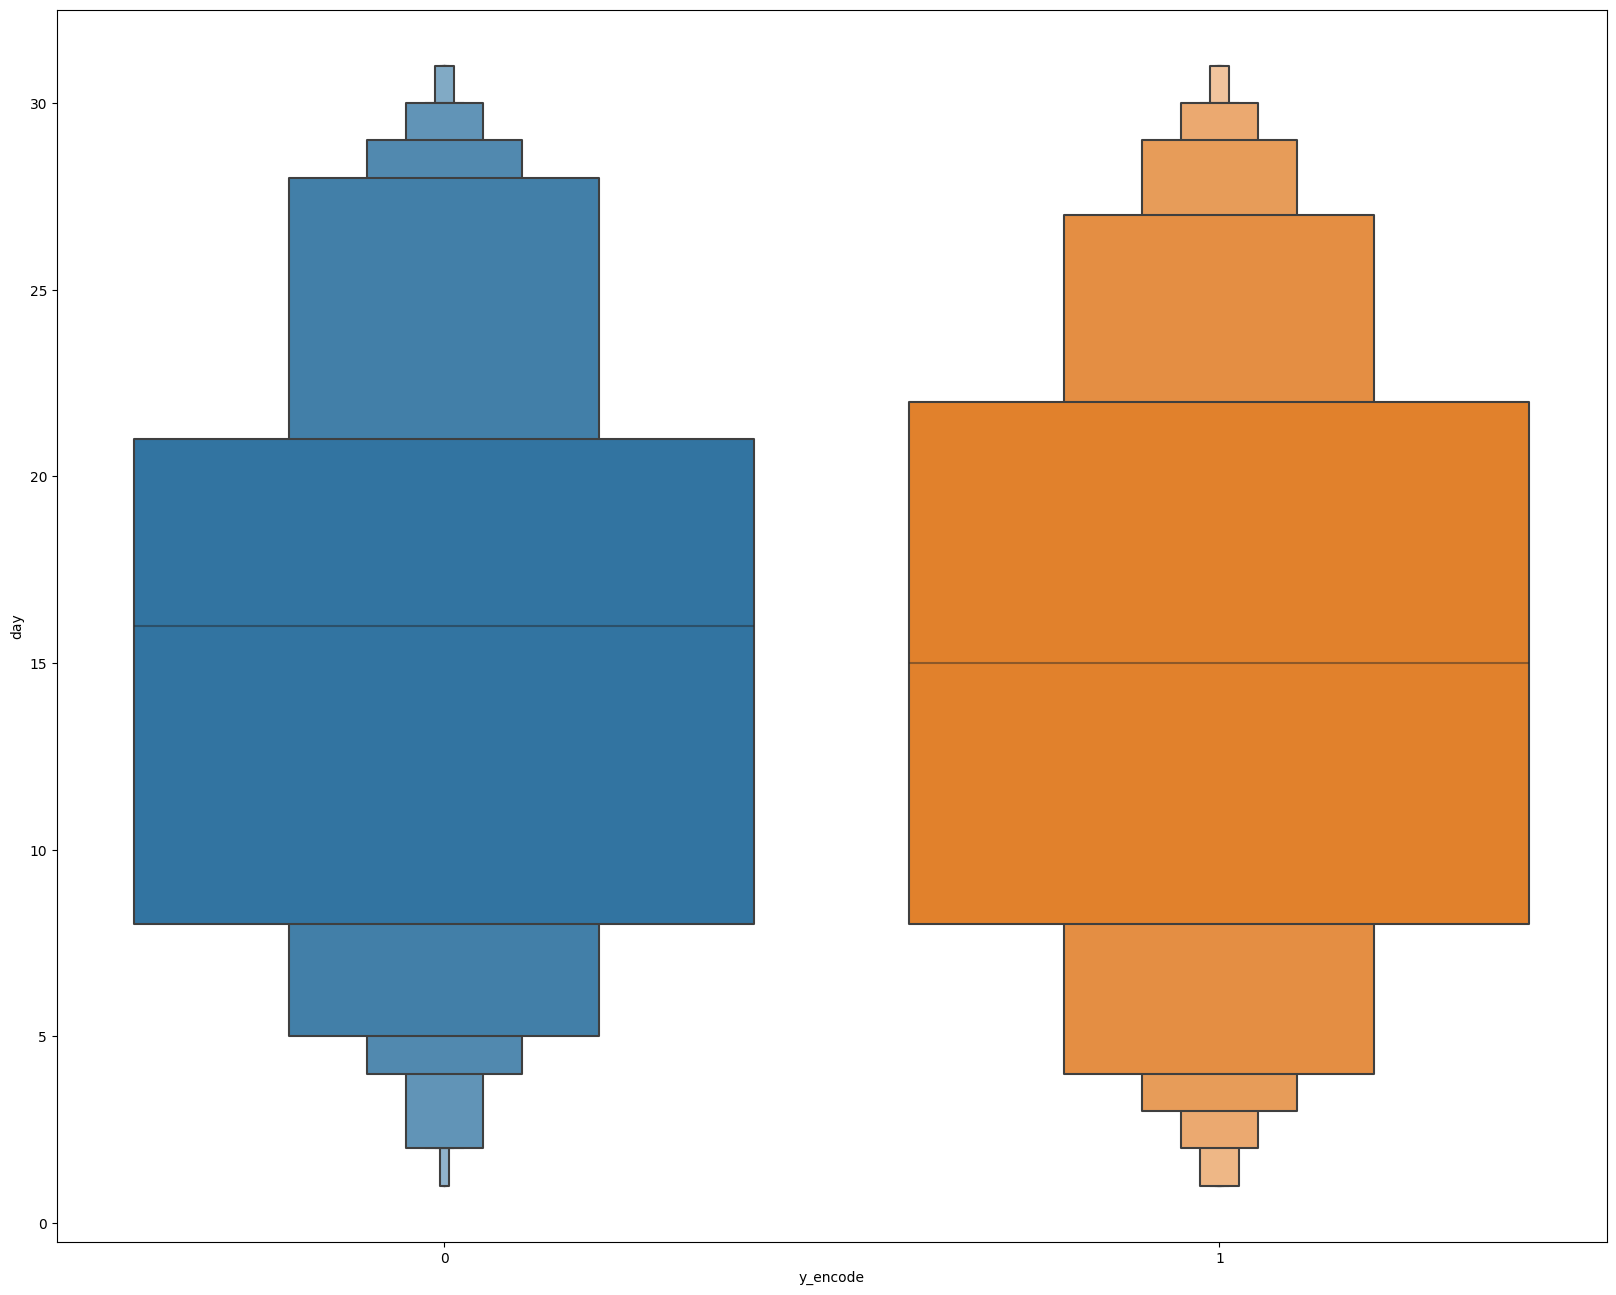

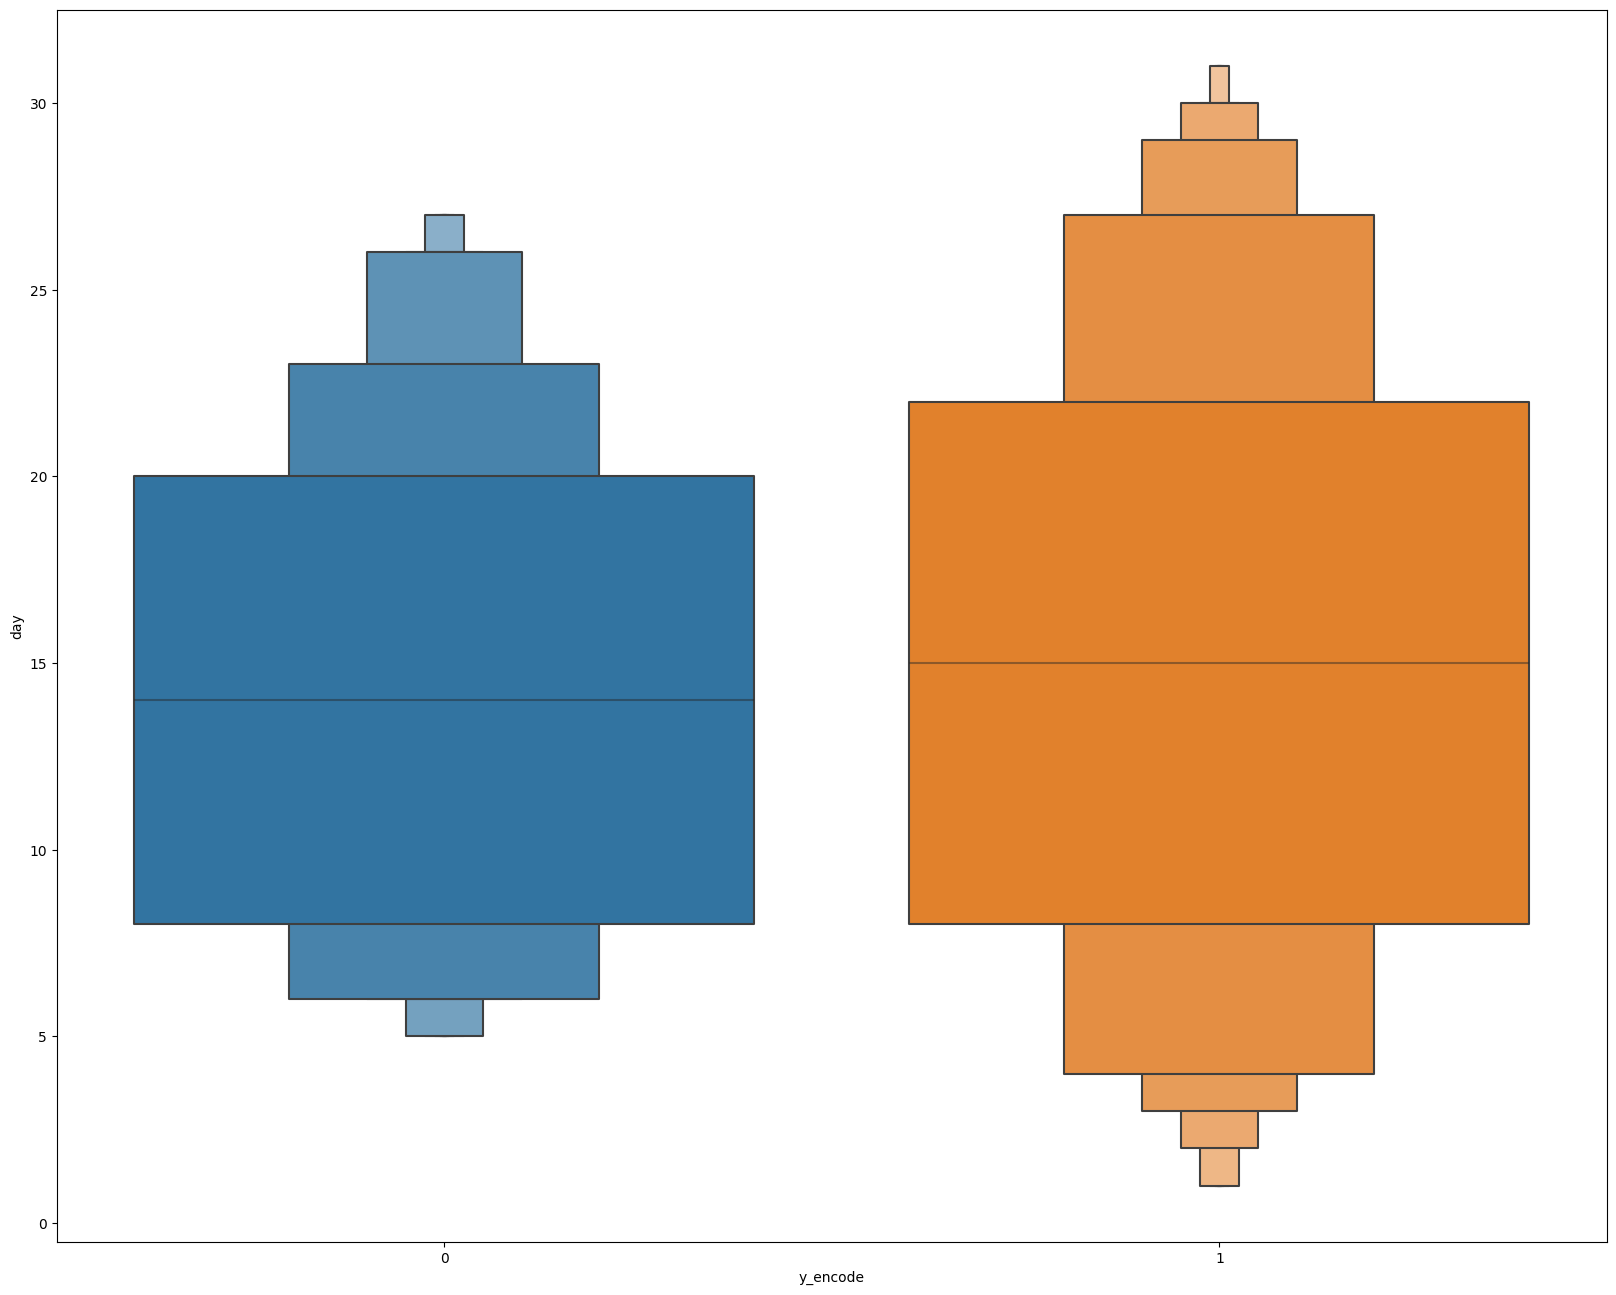

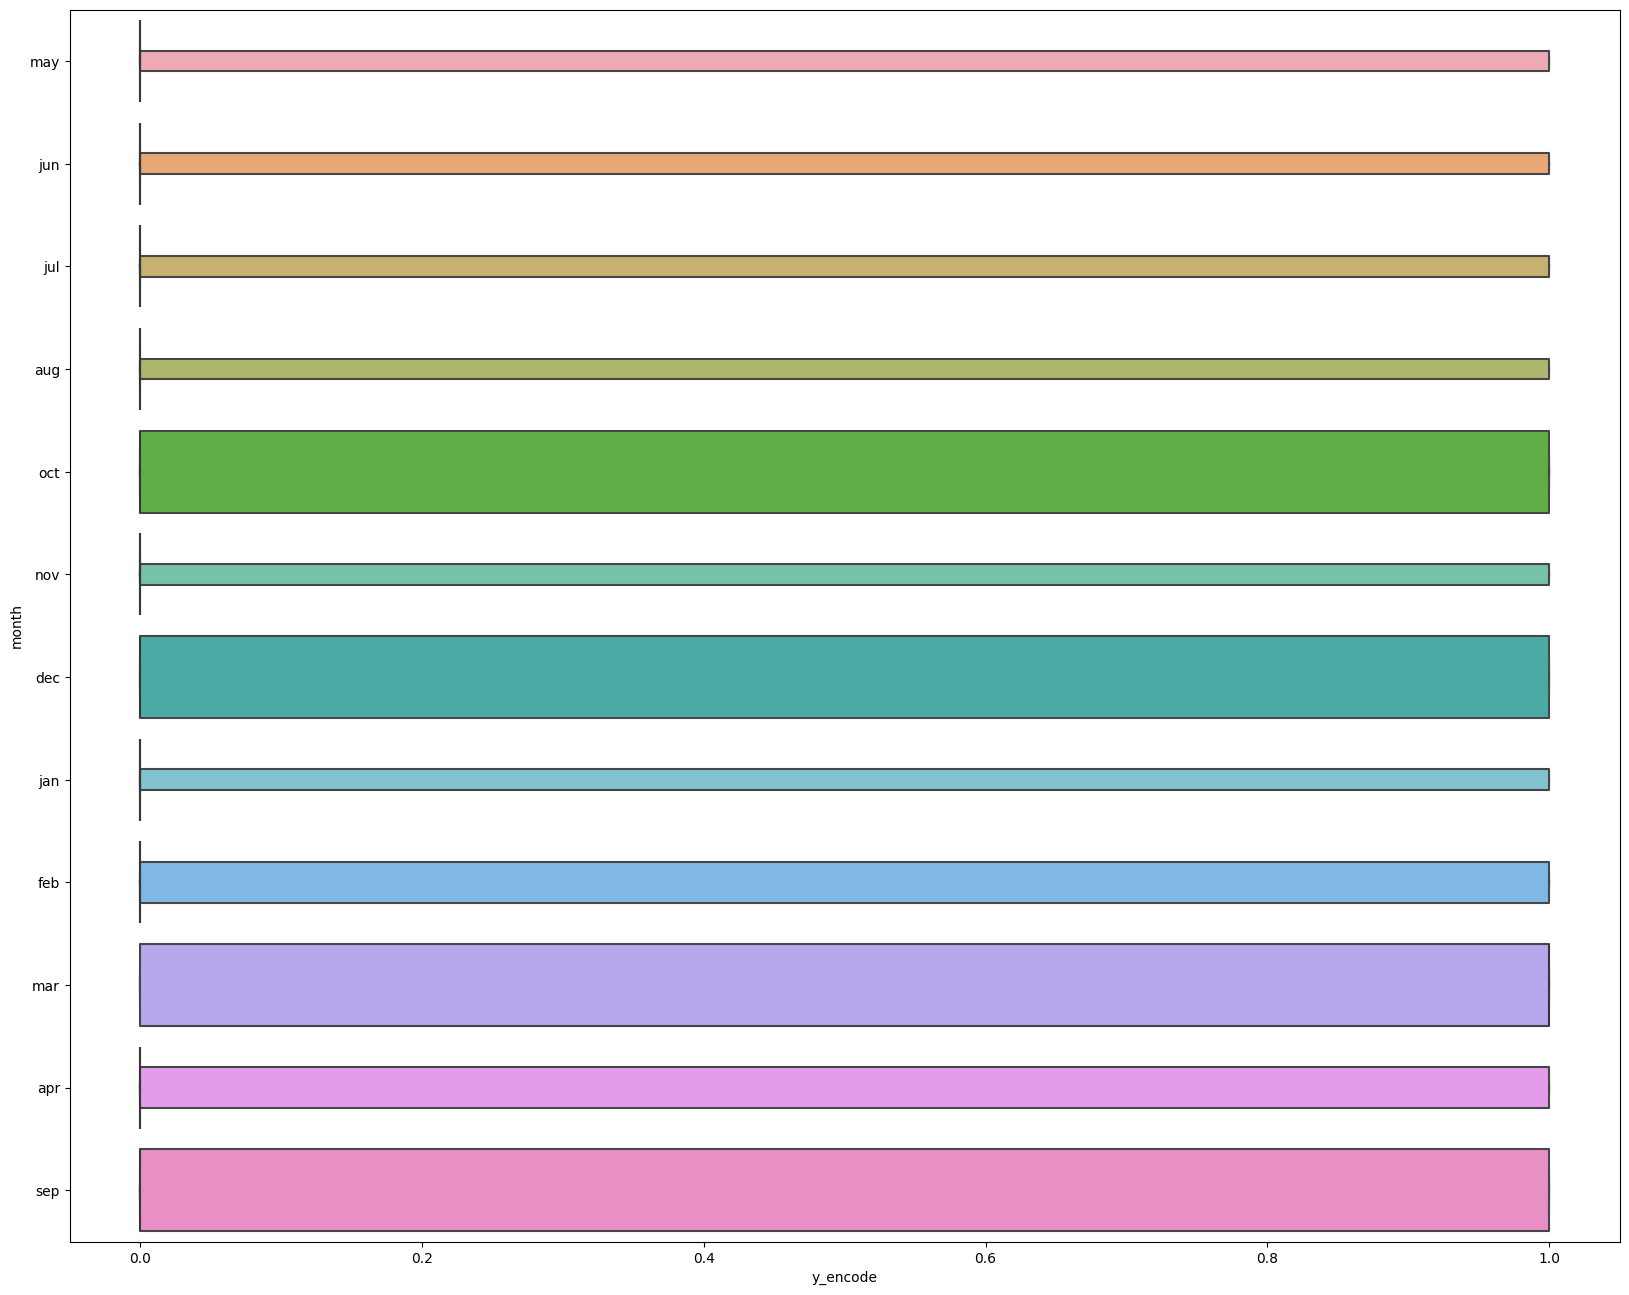

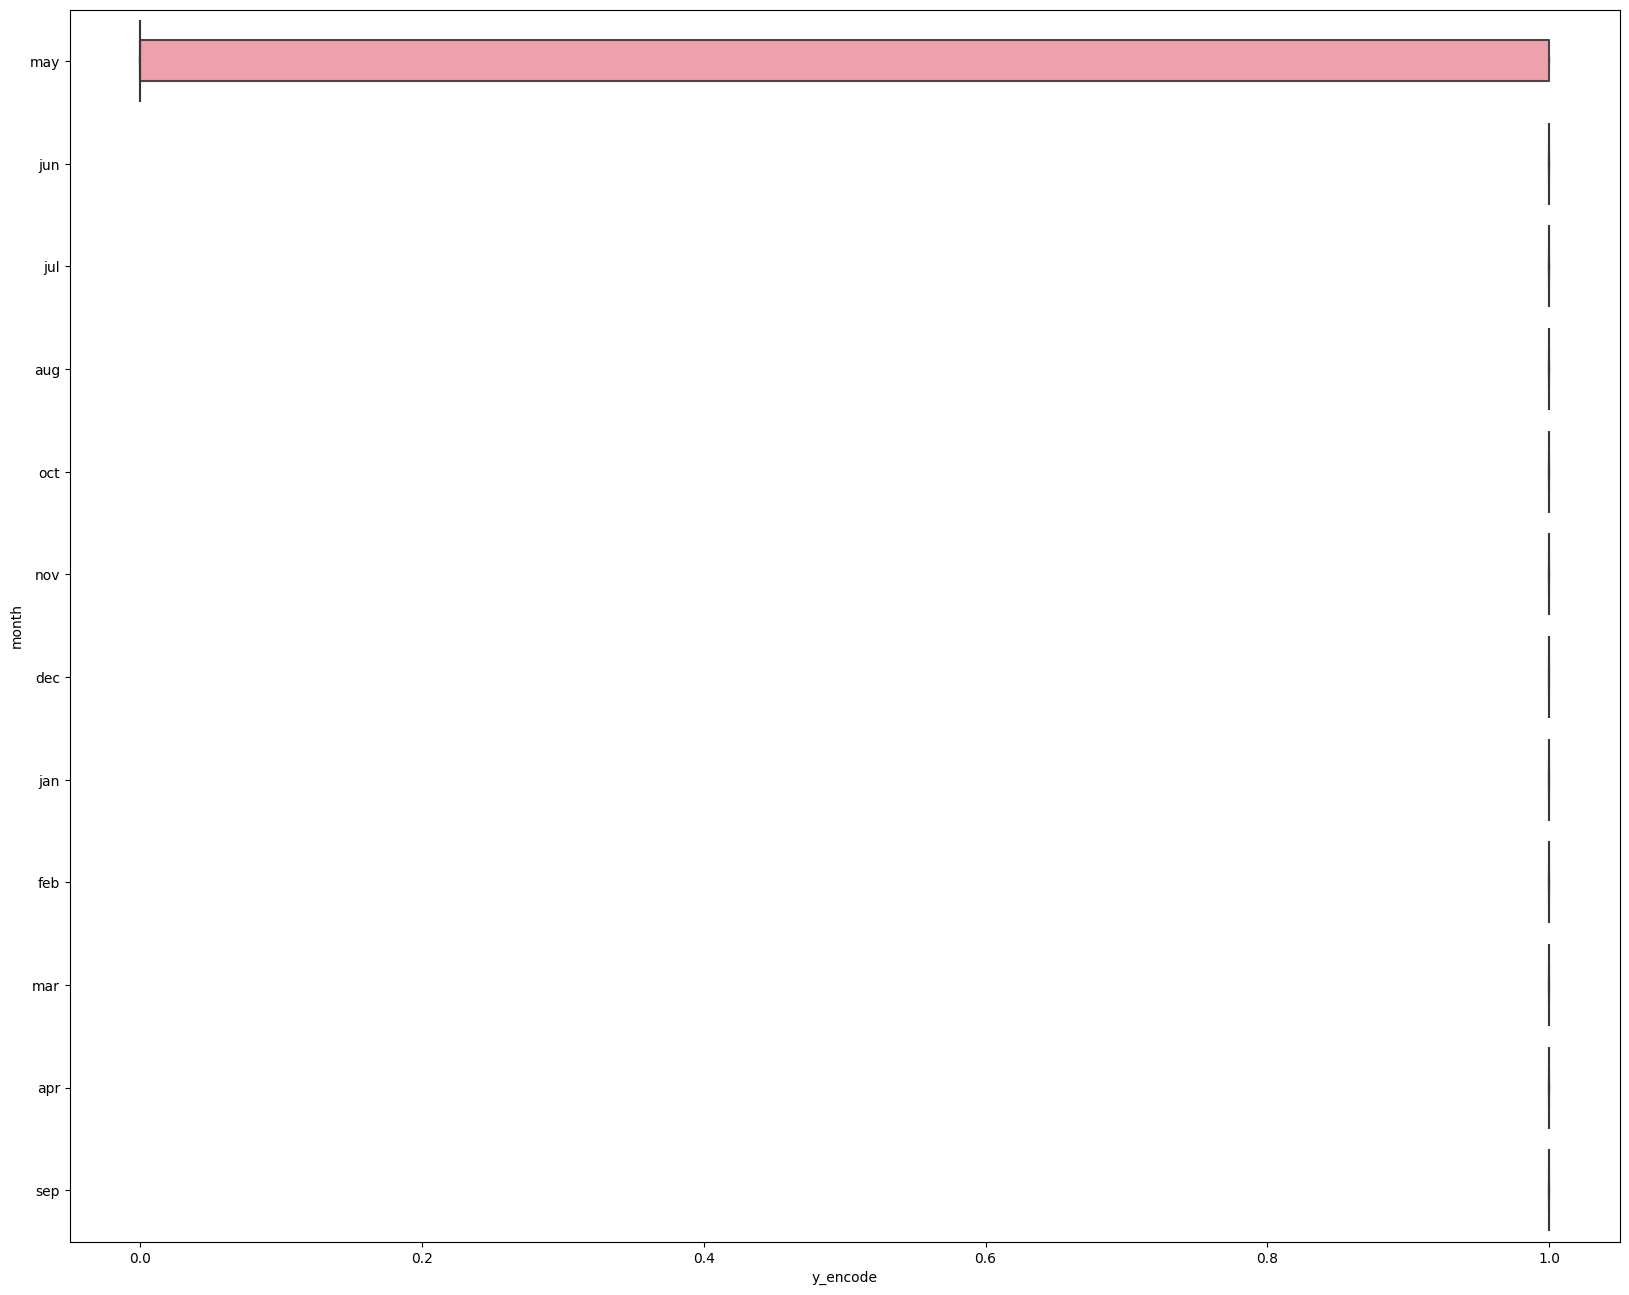

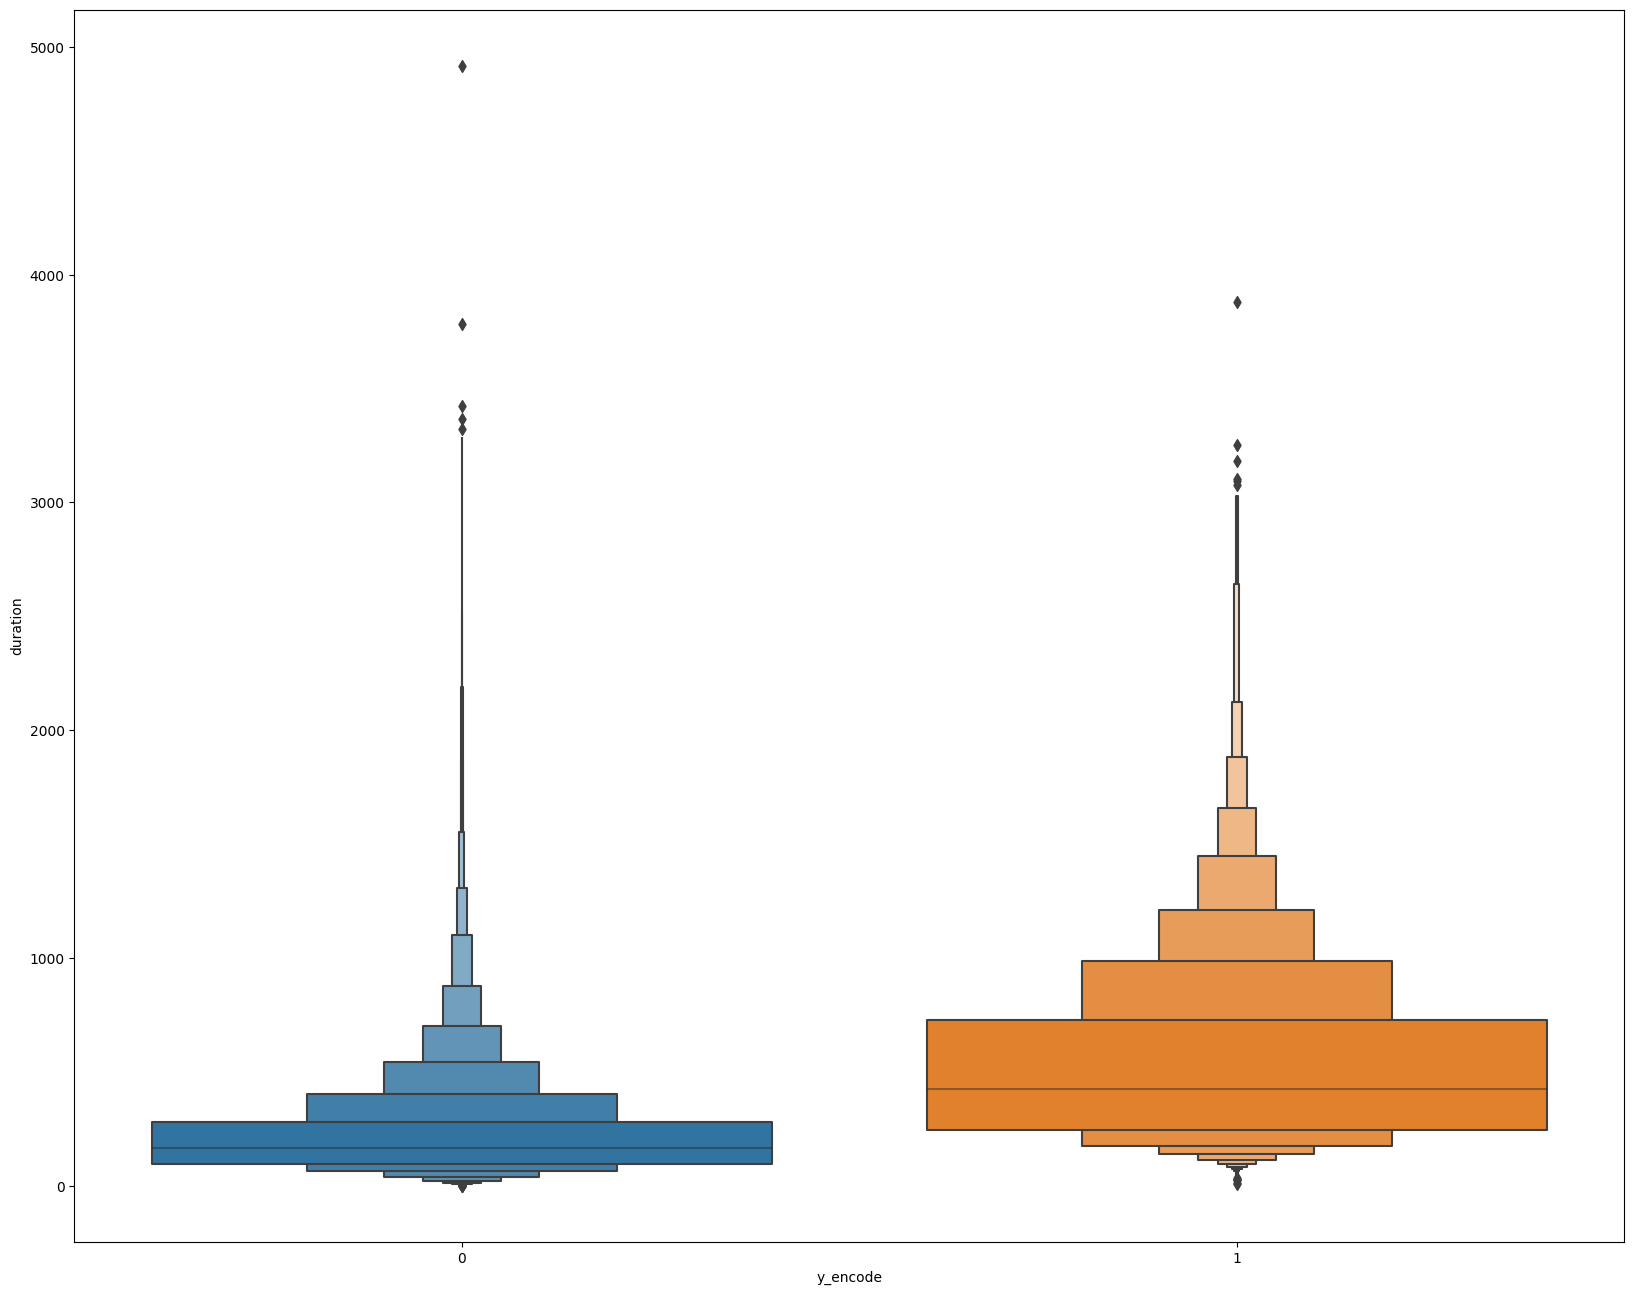

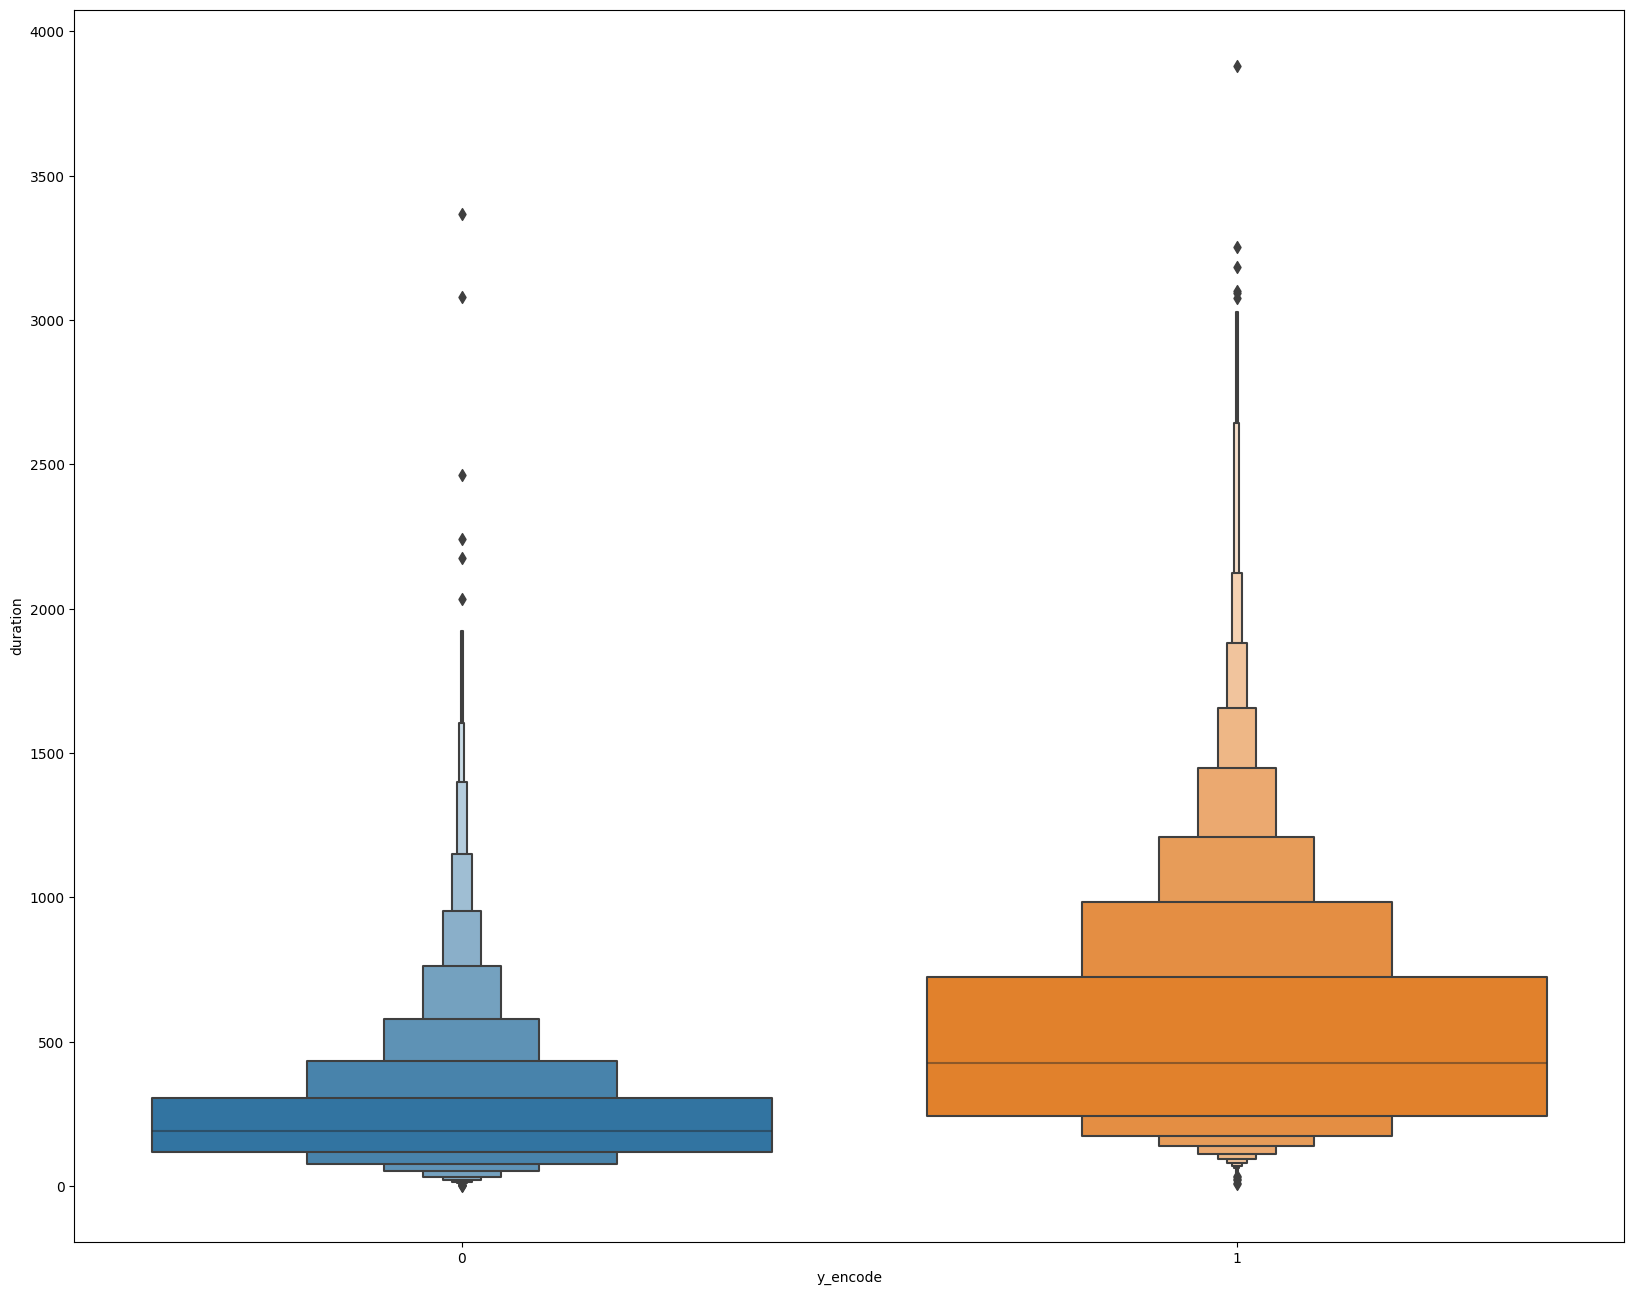

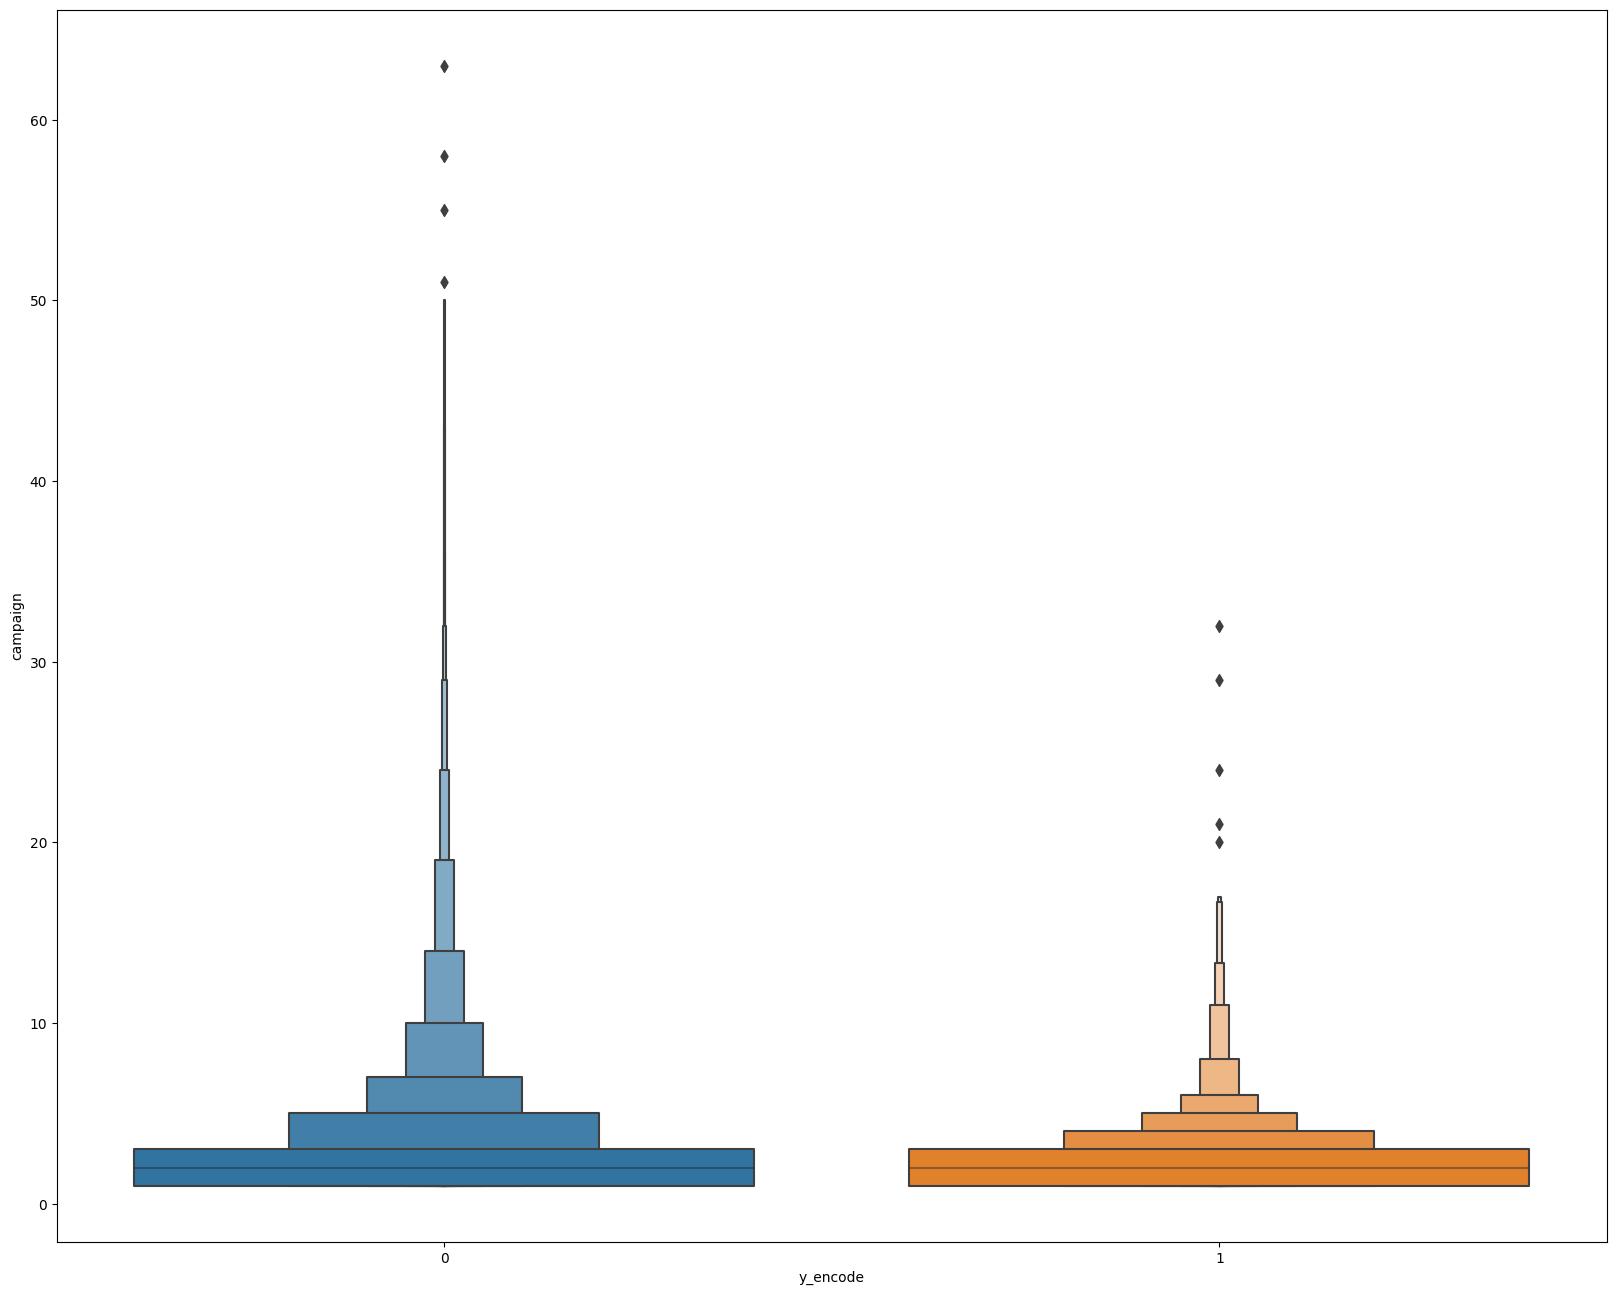

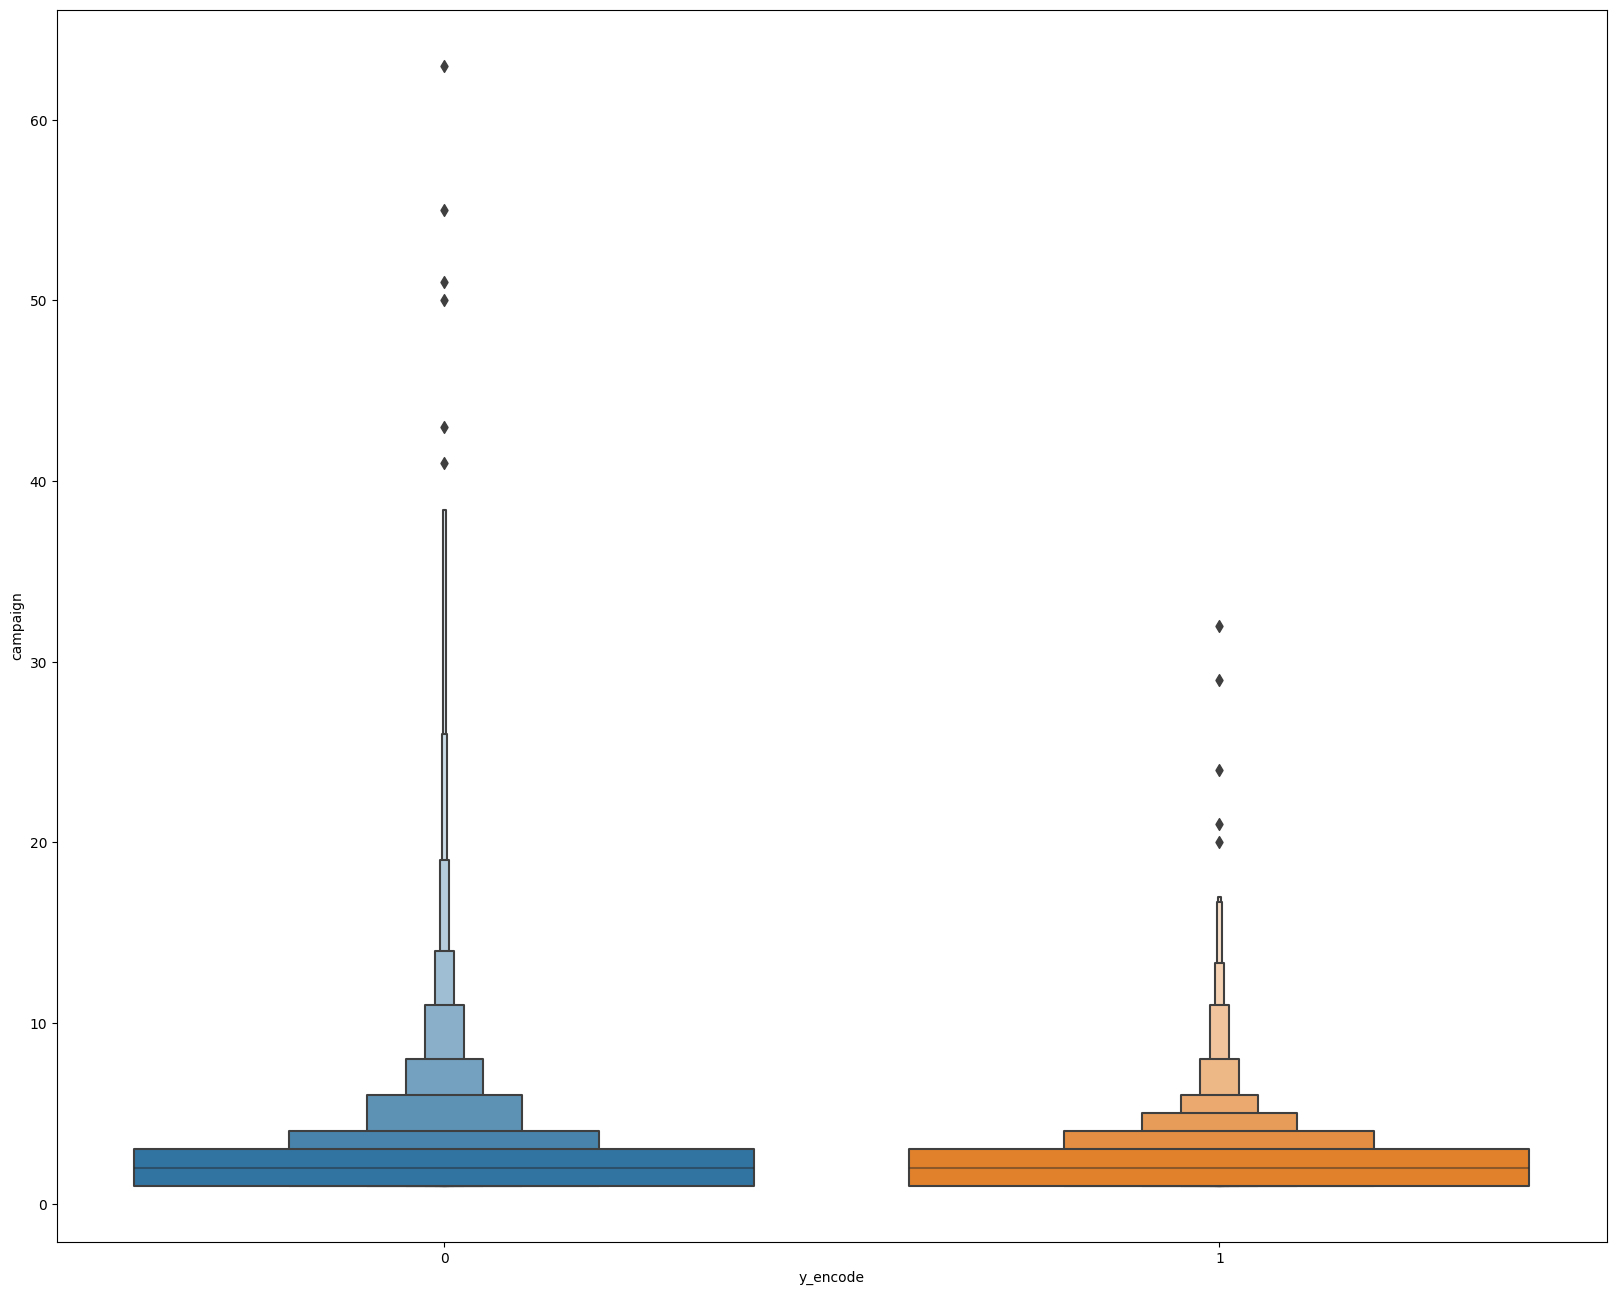

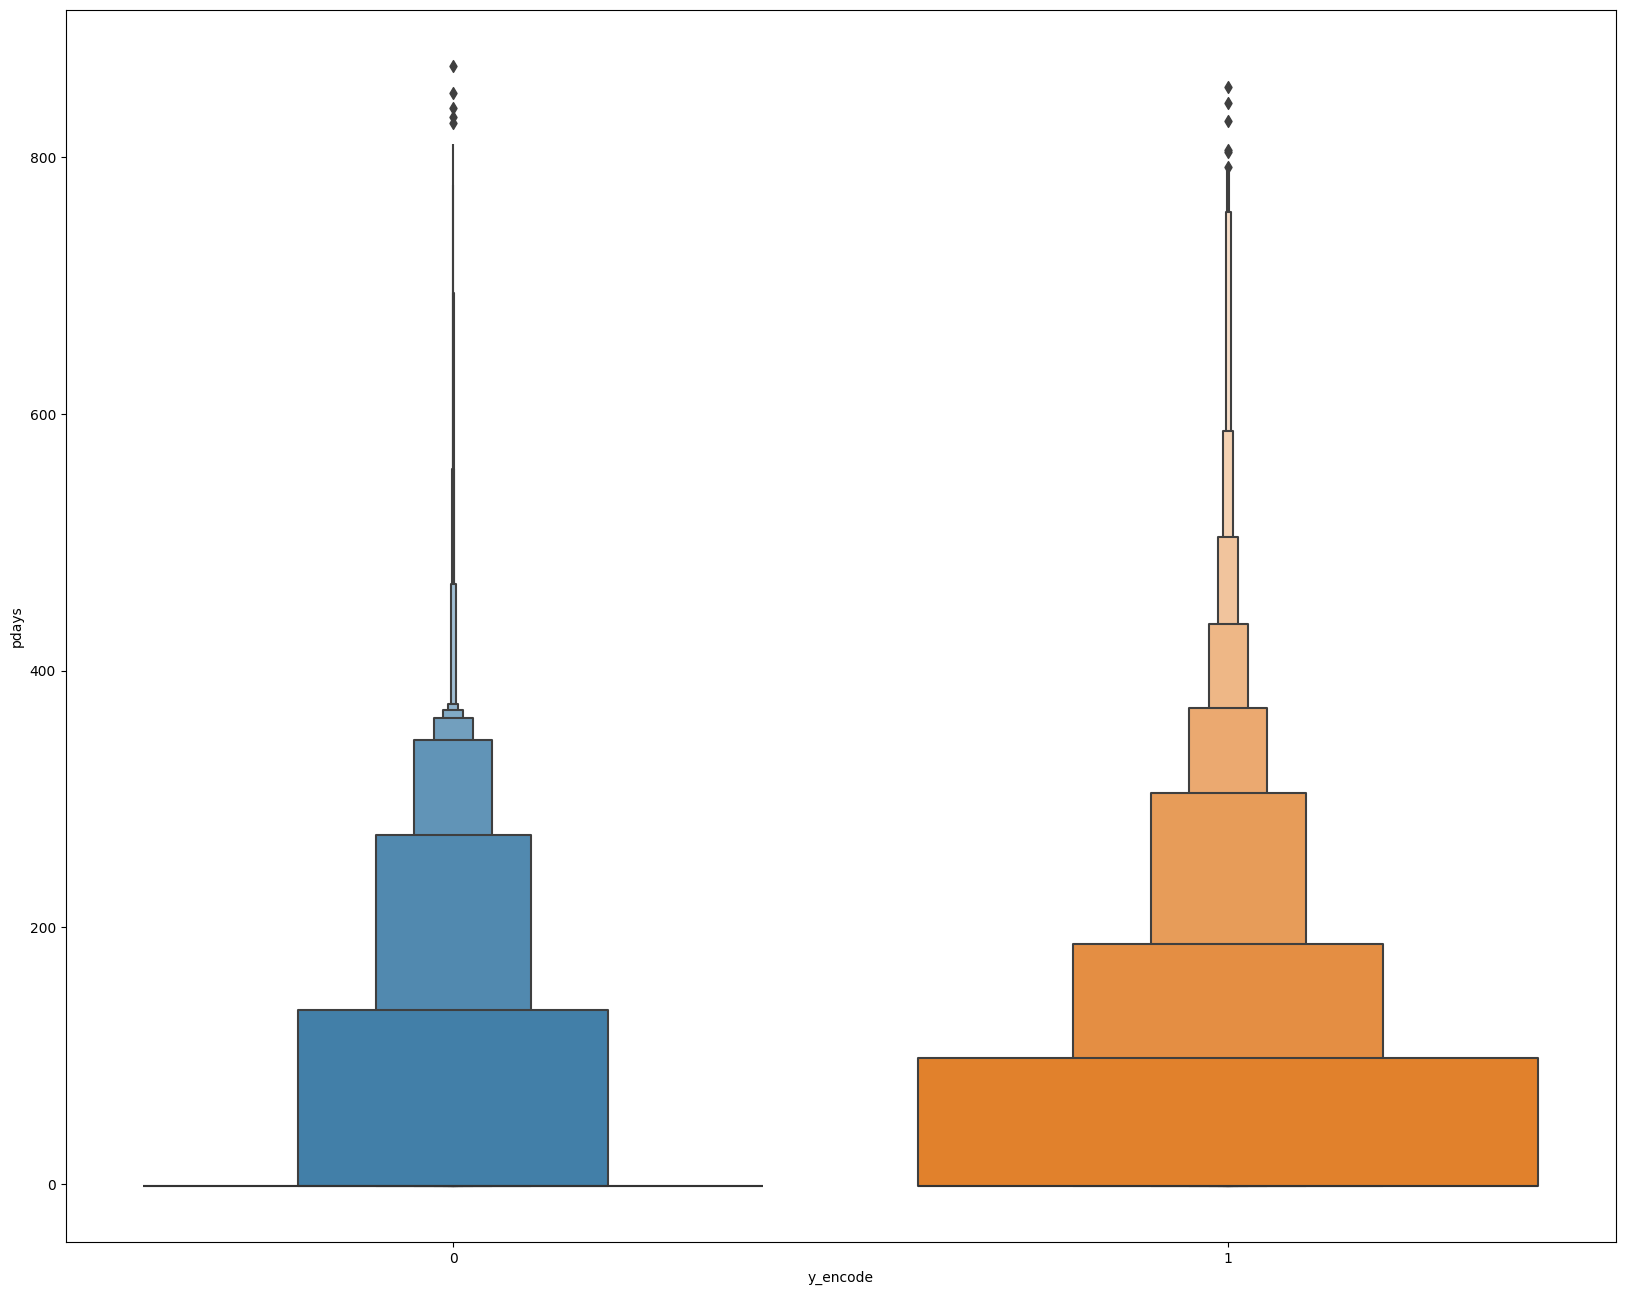

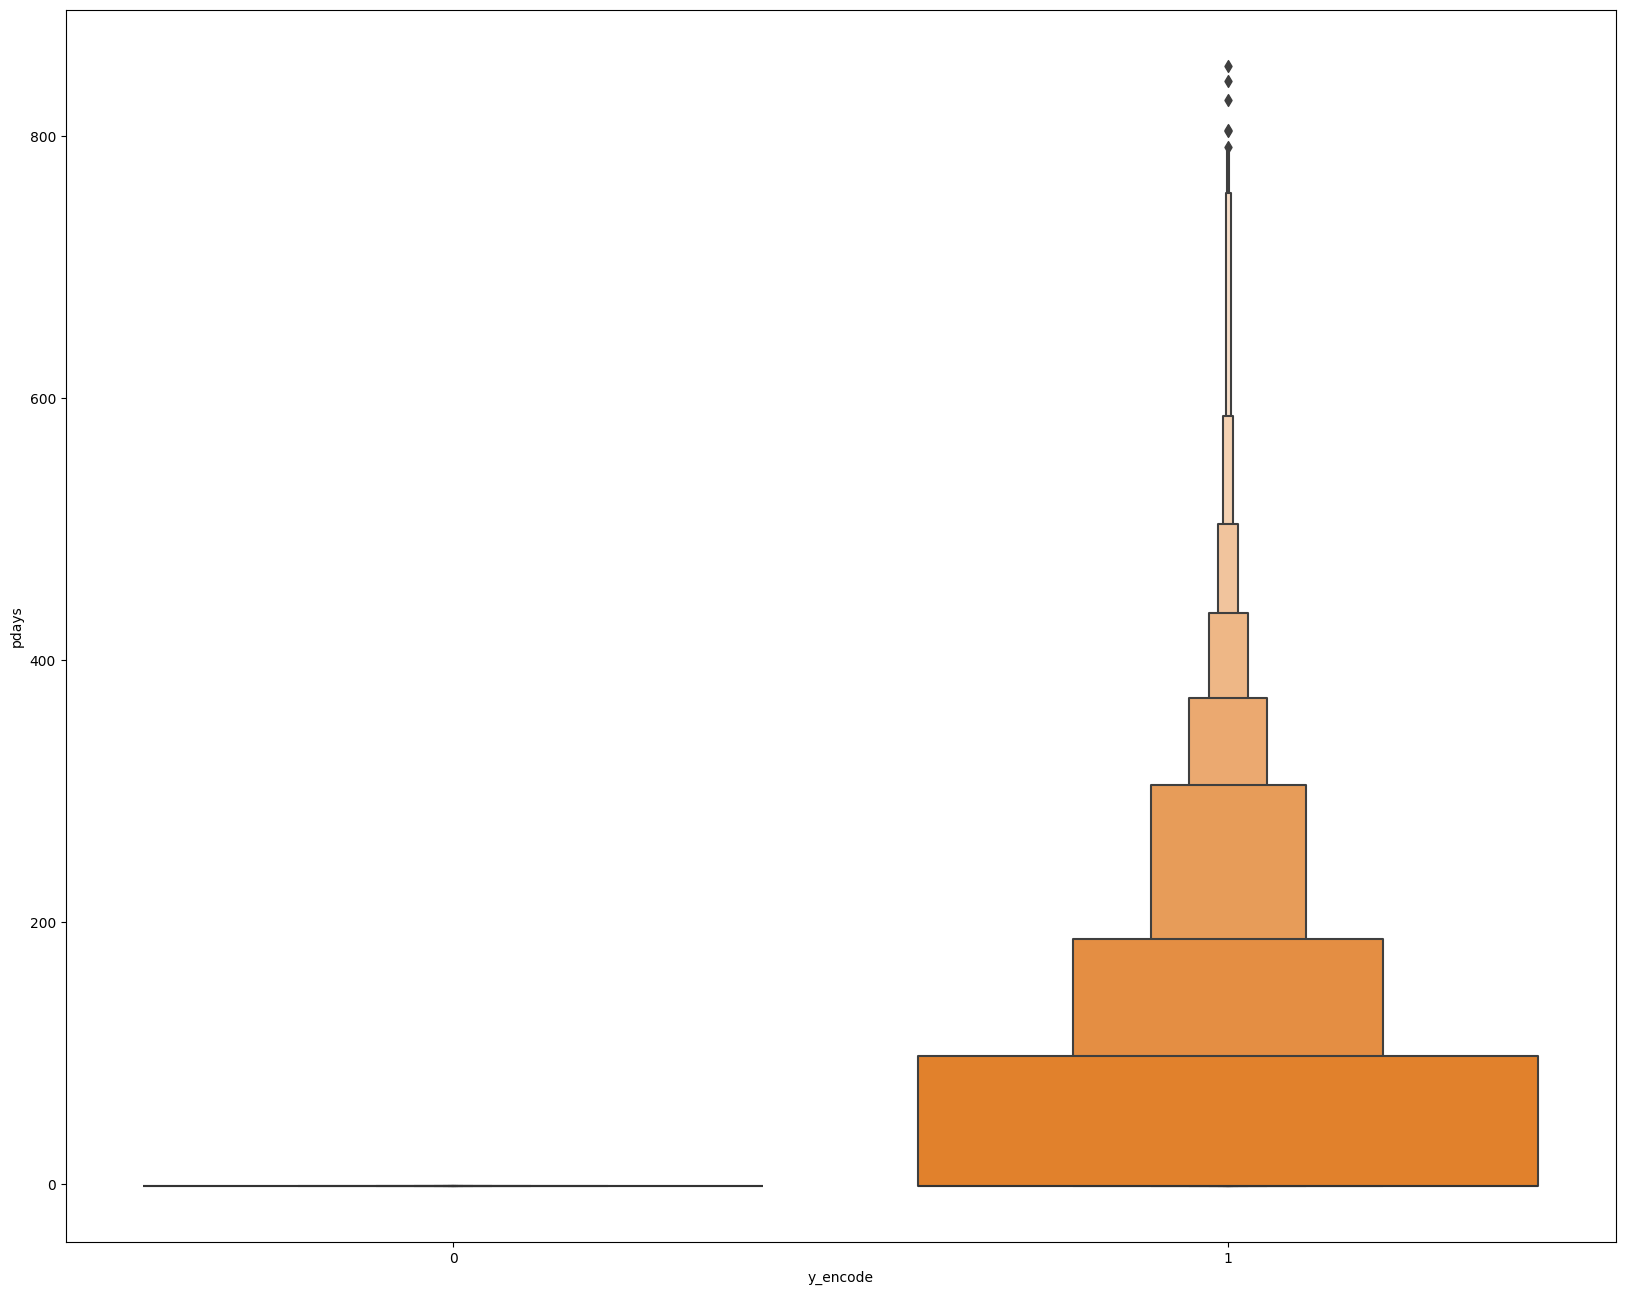

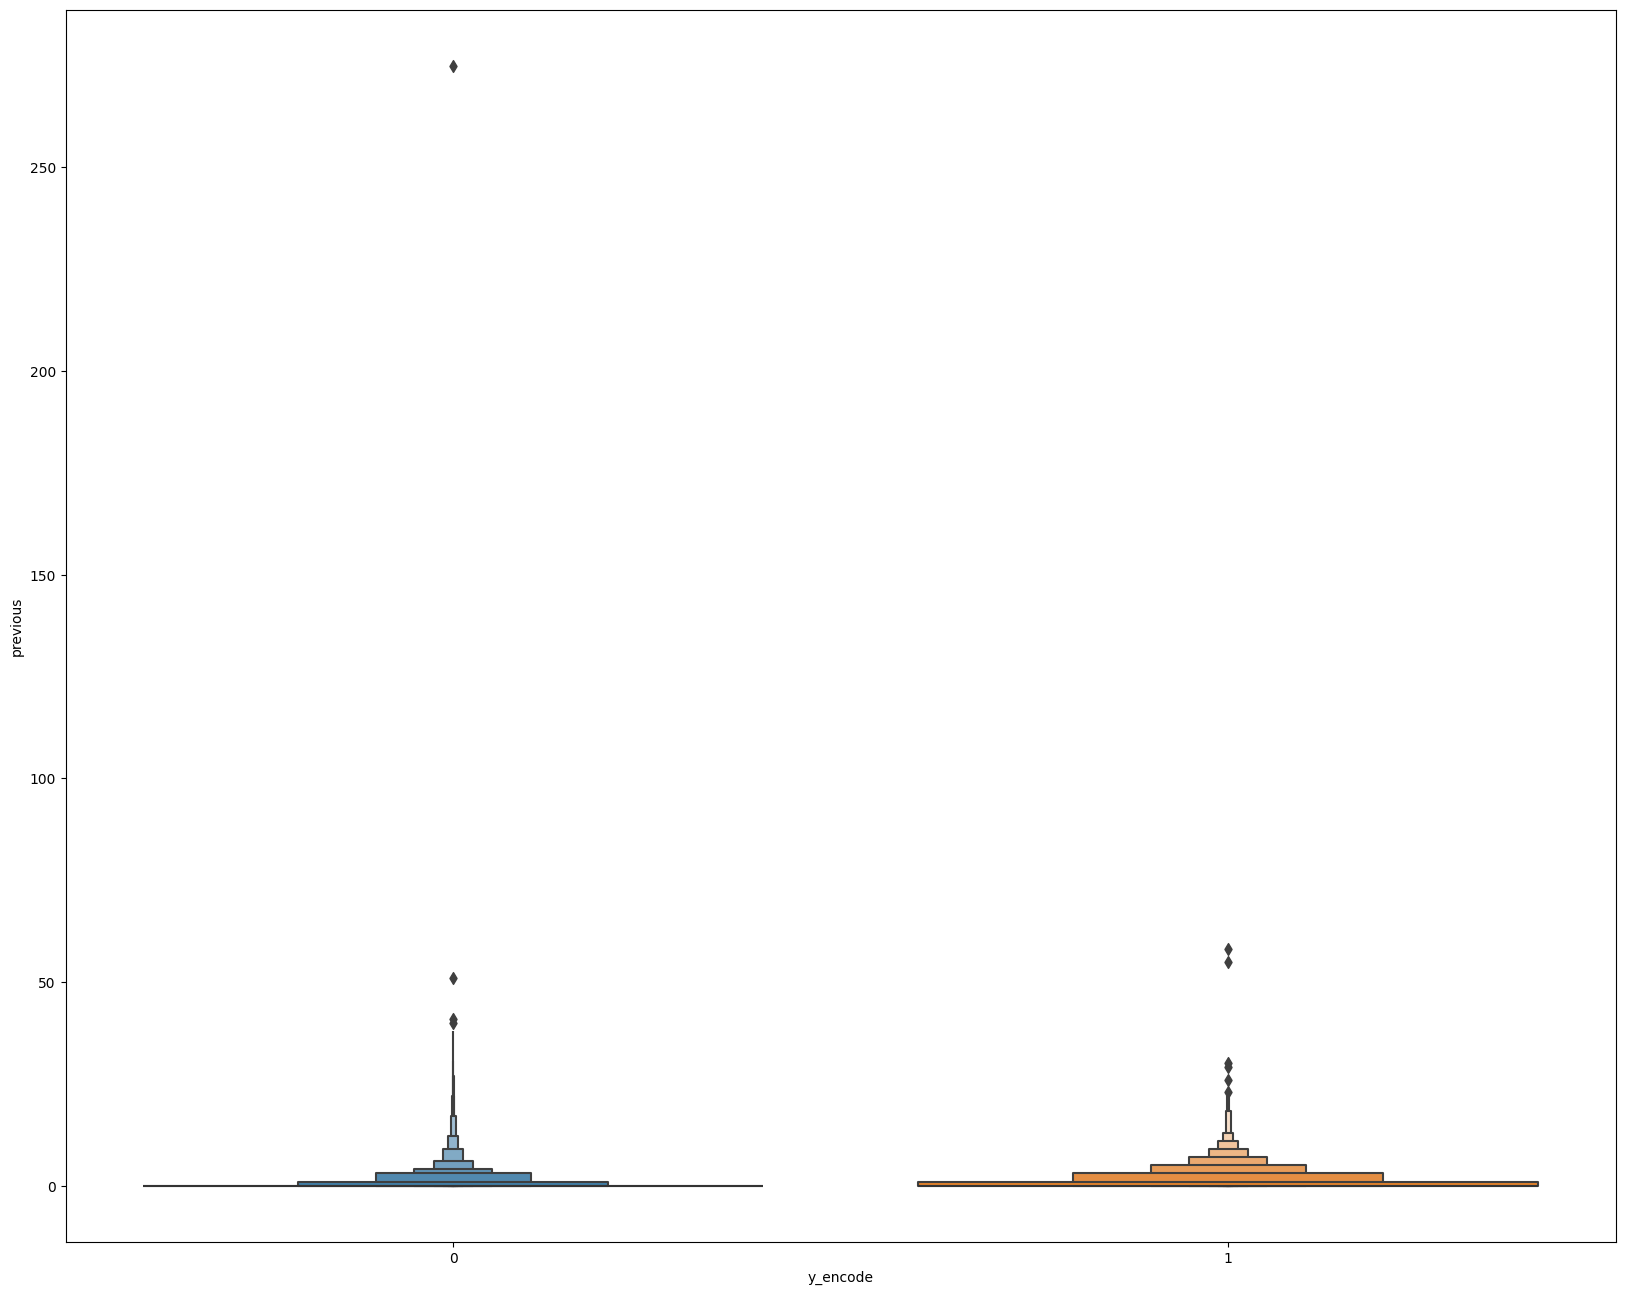

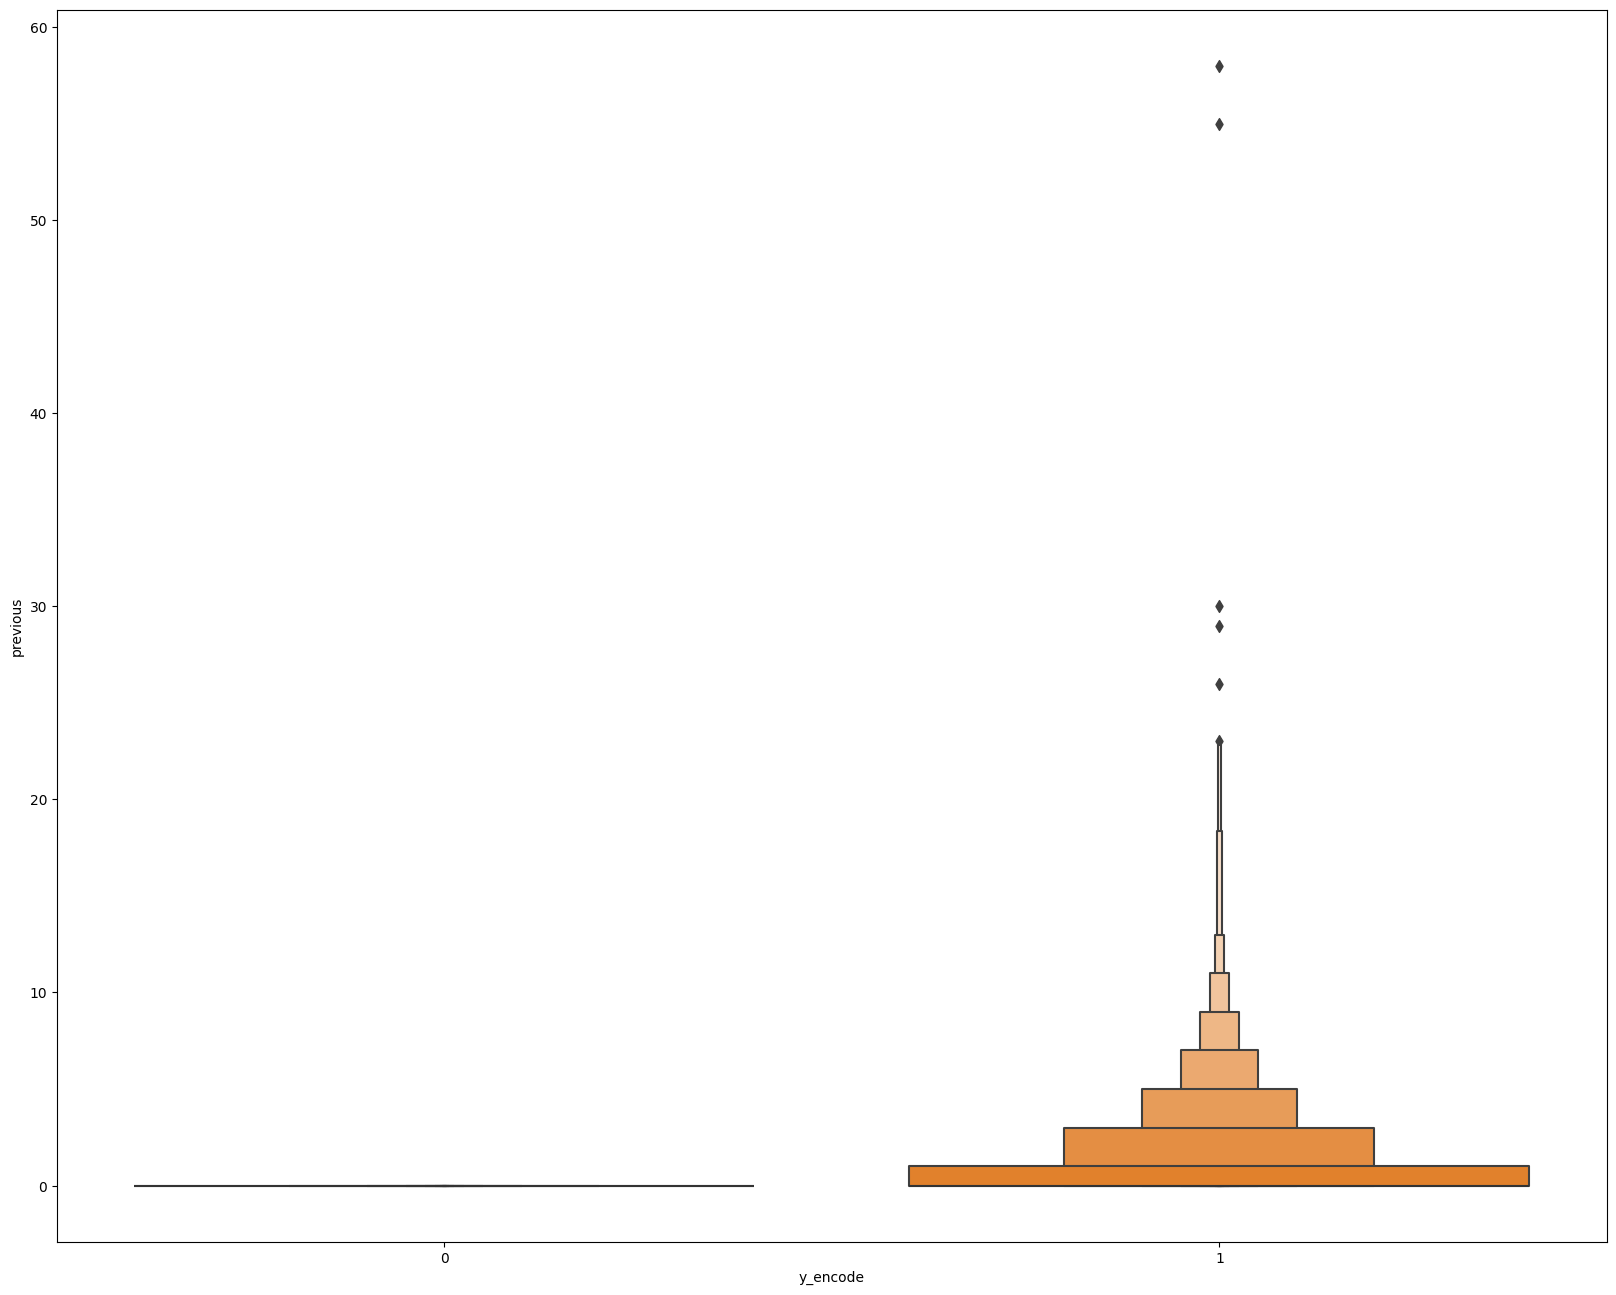

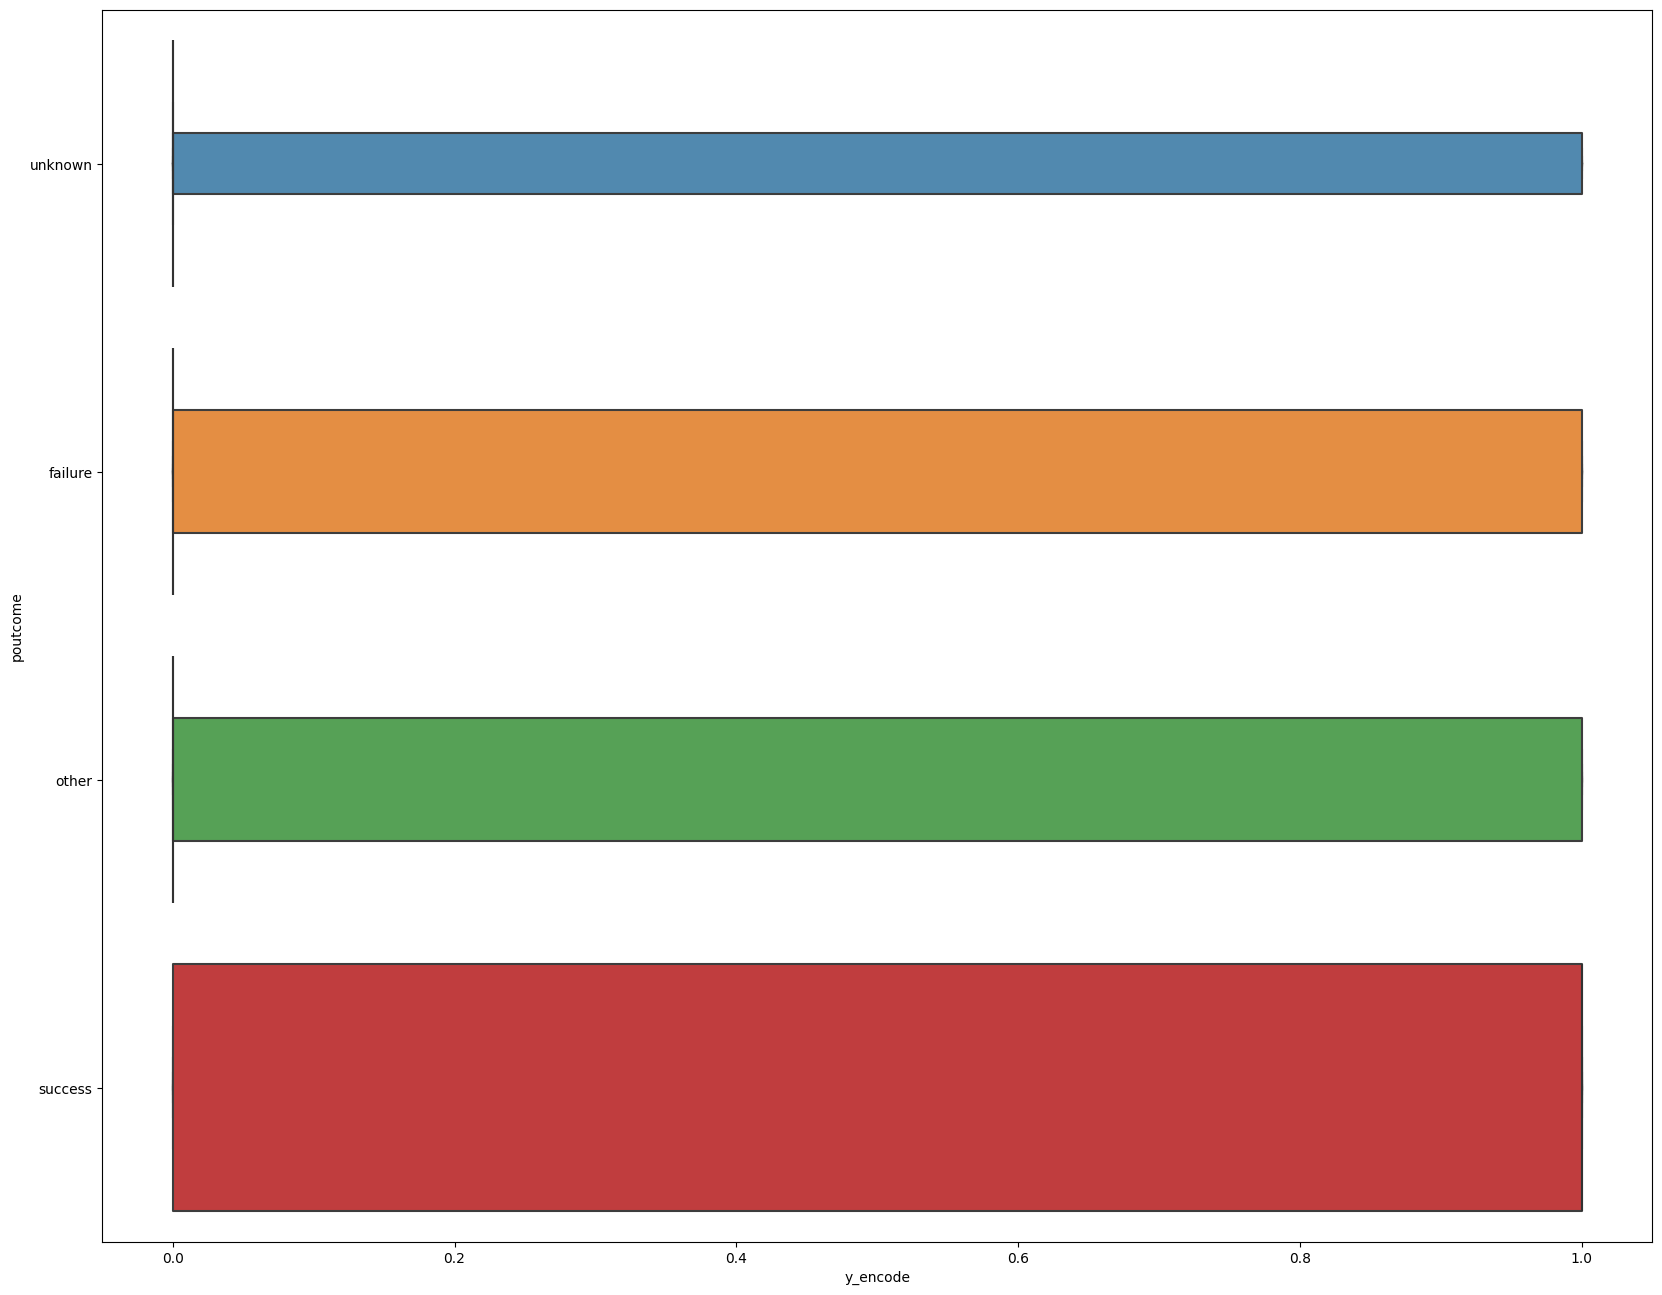

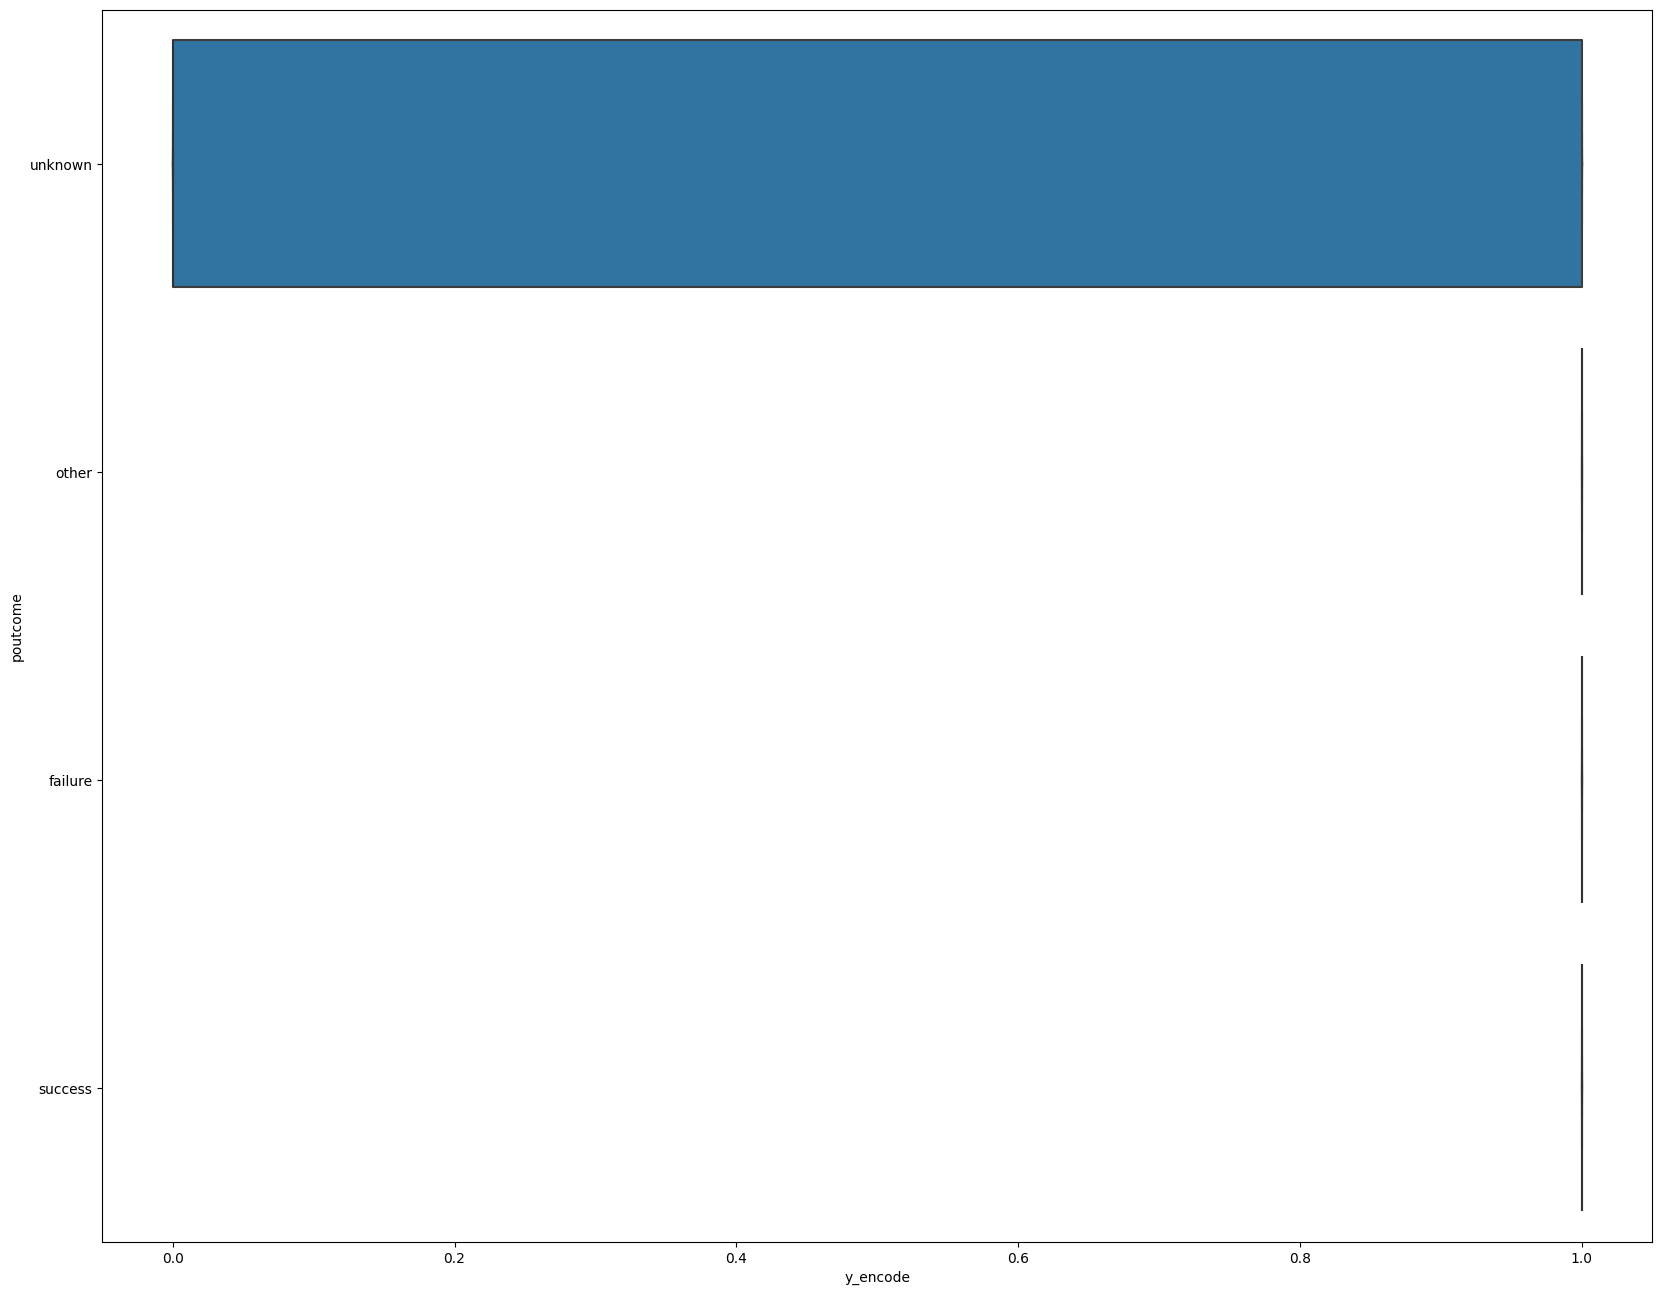

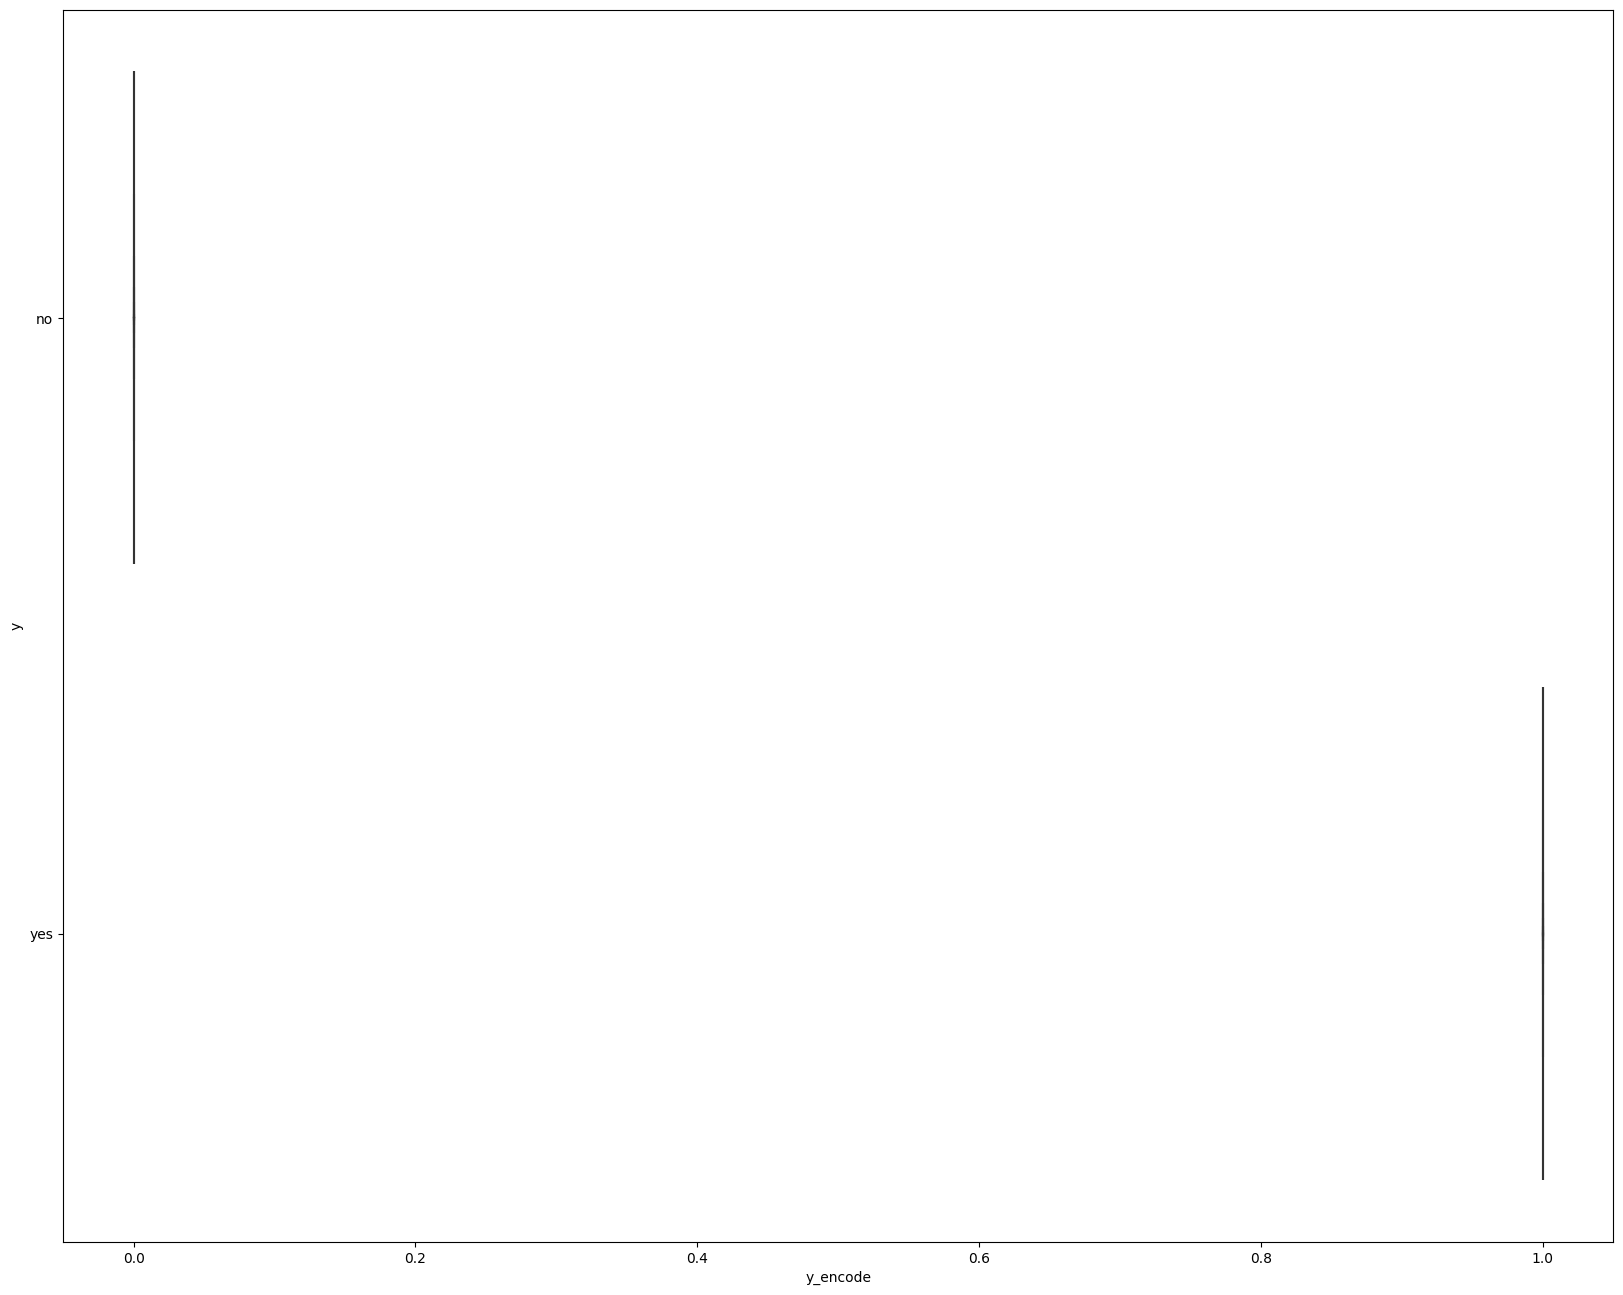

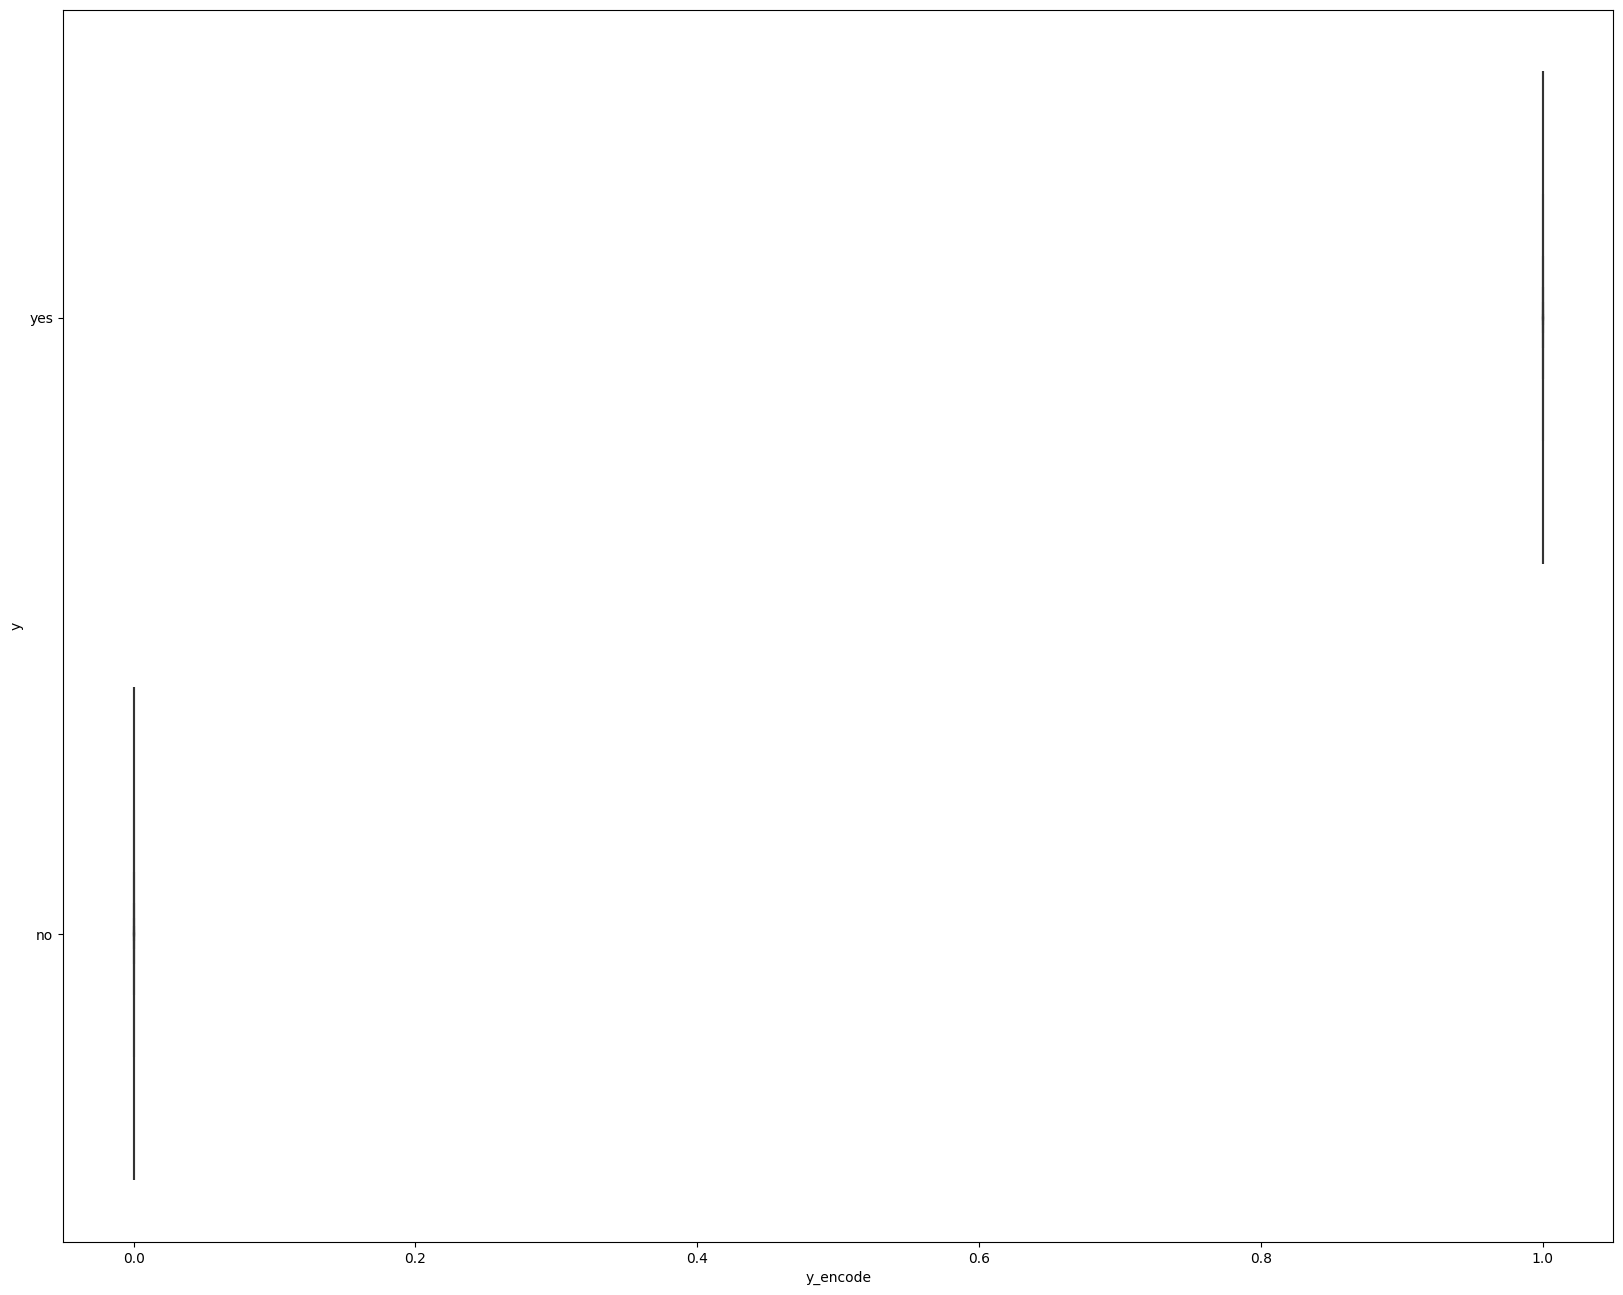

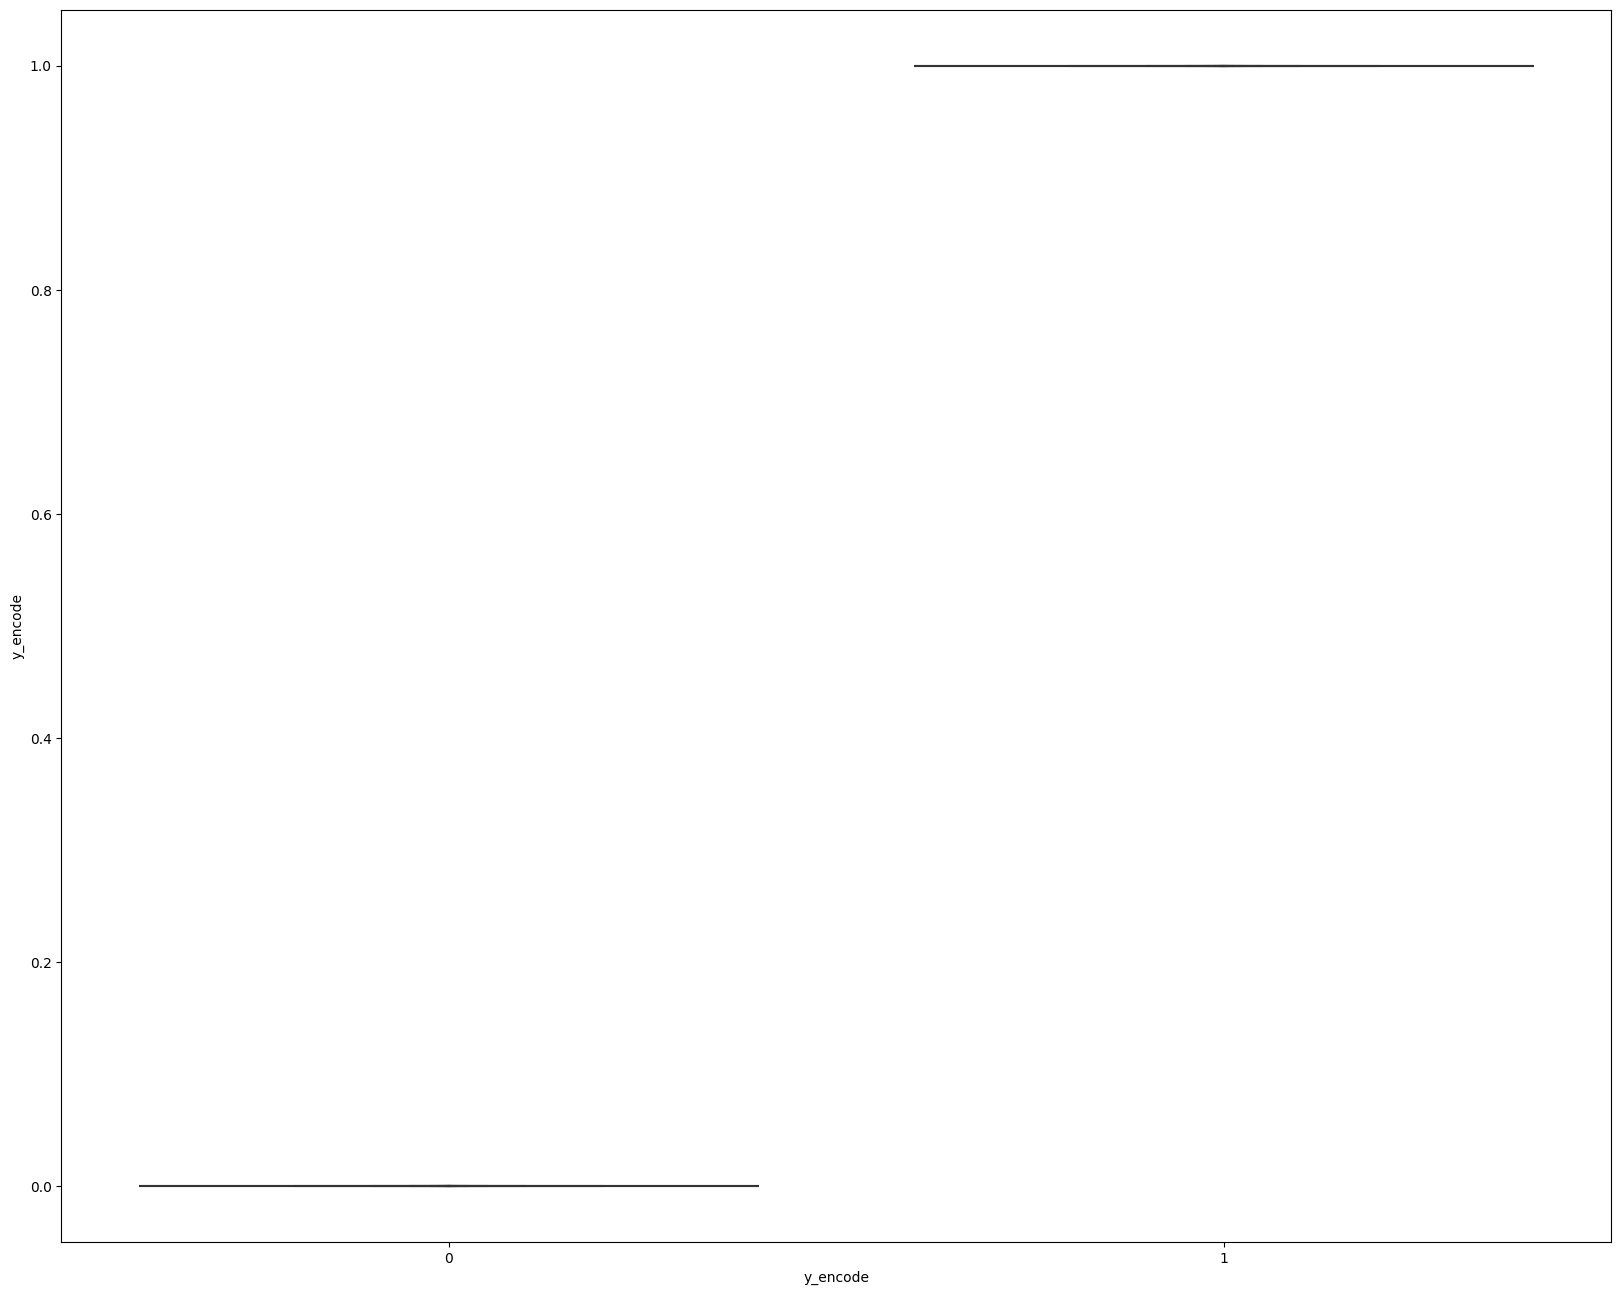

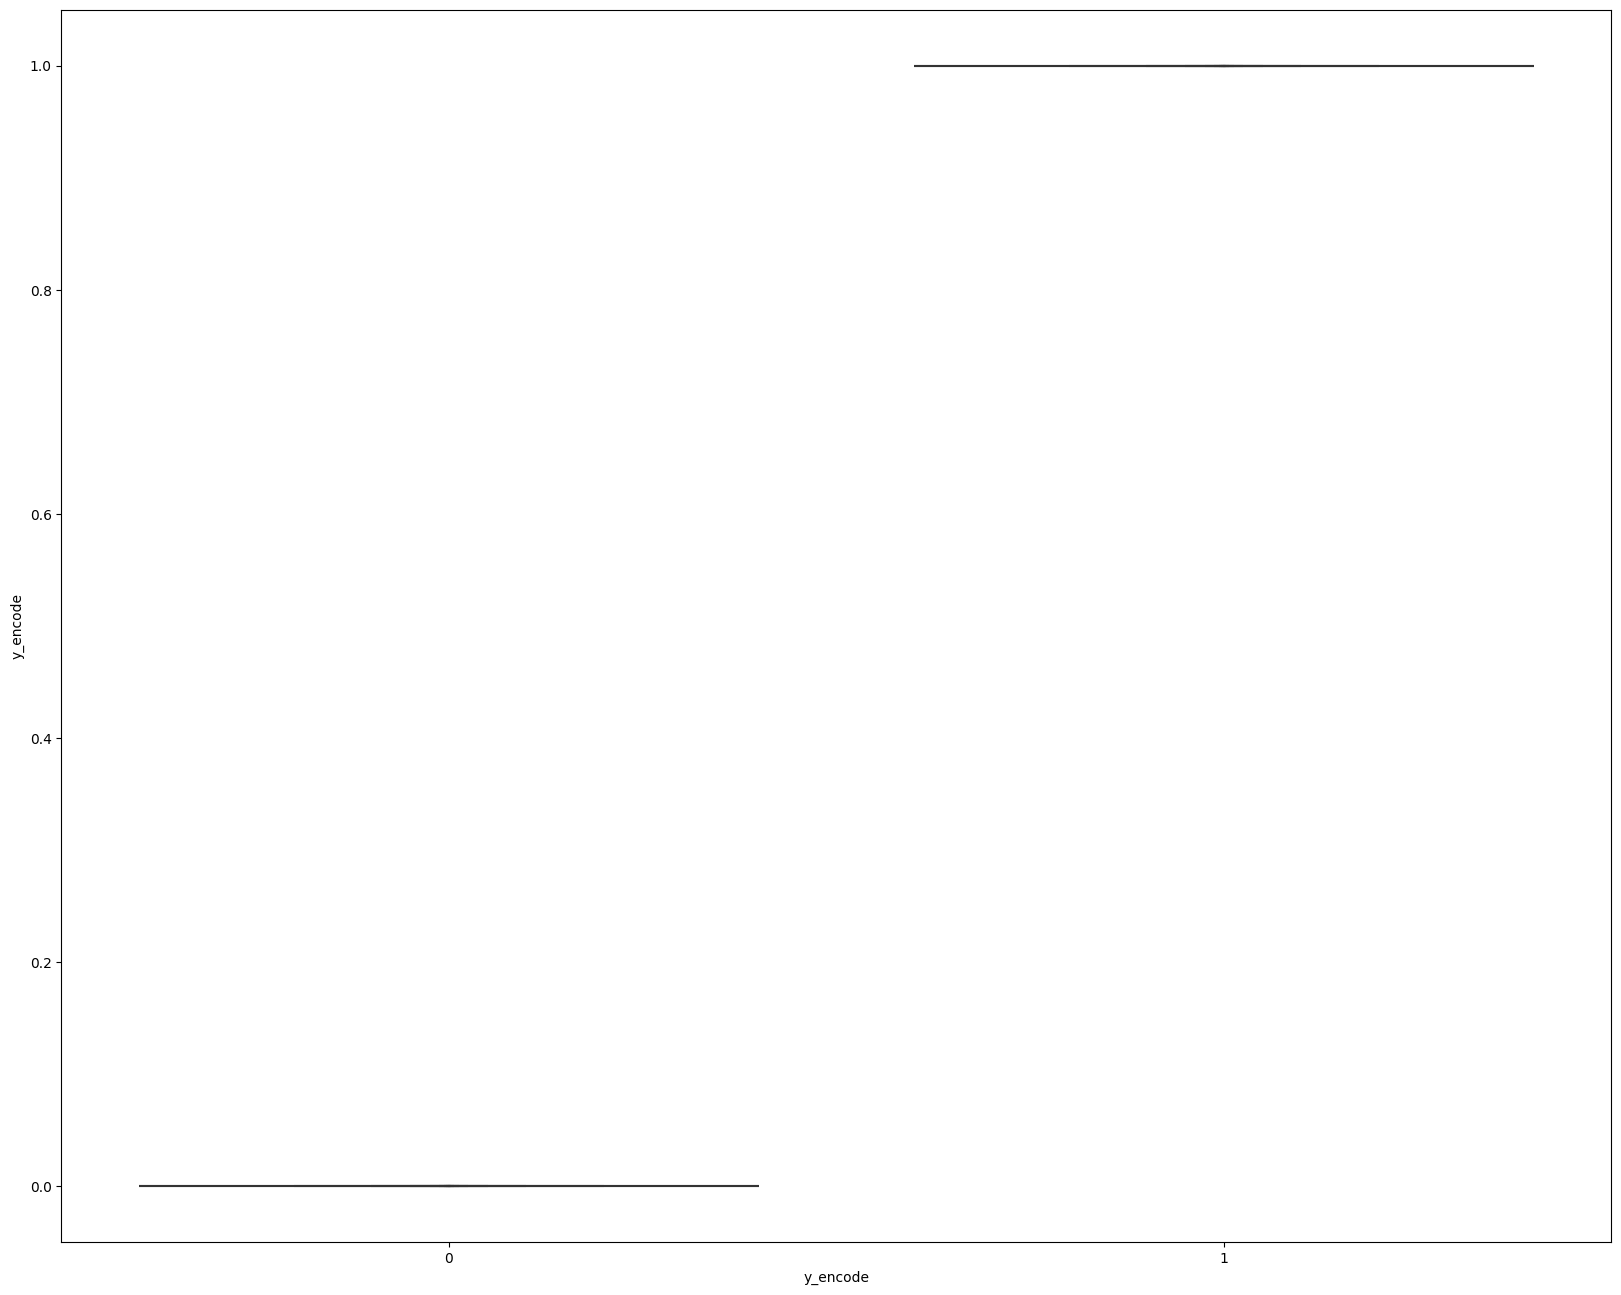

In [20]:
for i in df.columns:
    #print(i)
    a = sns.boxenplot(data=df, x='y_encode', y=i)
    plt.pyplot.show()
    a = sns.boxenplot(data=df1, x='y_encode', y=i)
    plt.pyplot.show()

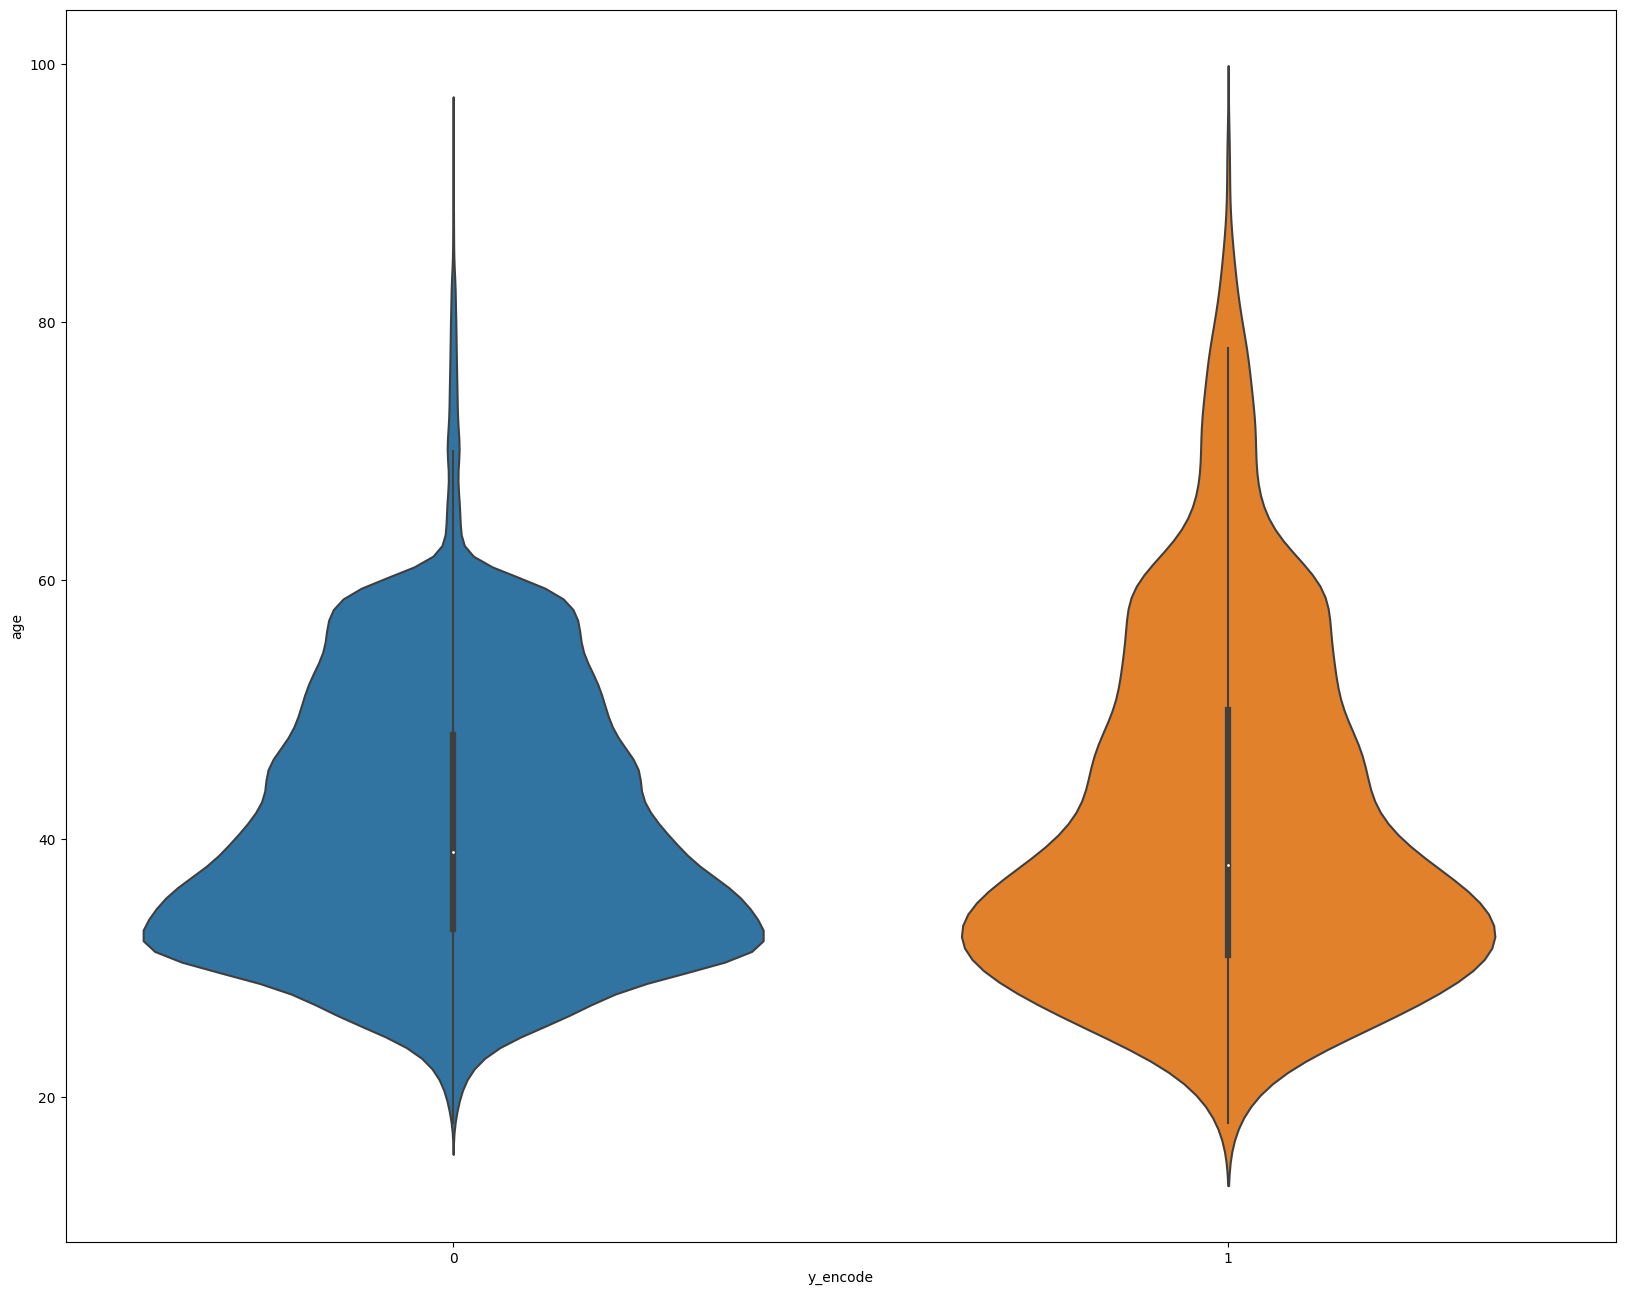

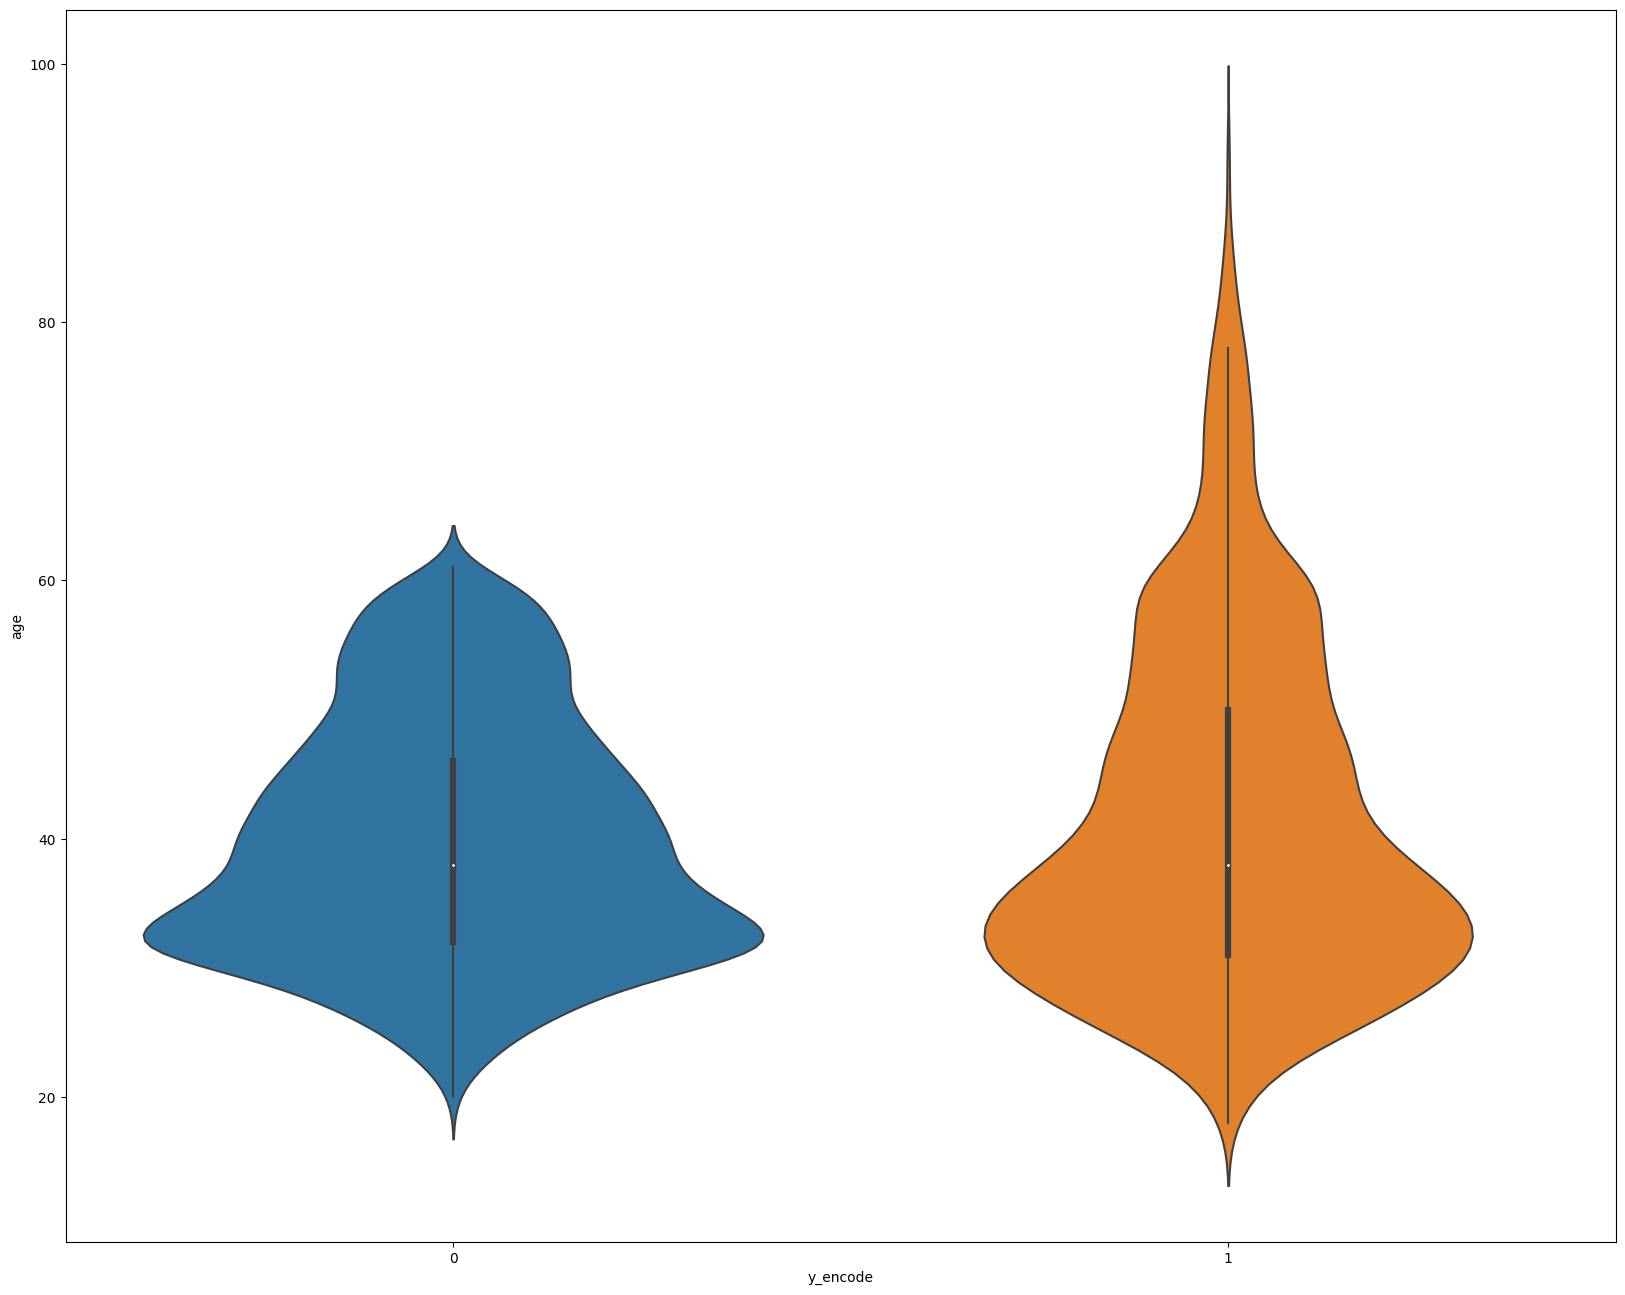

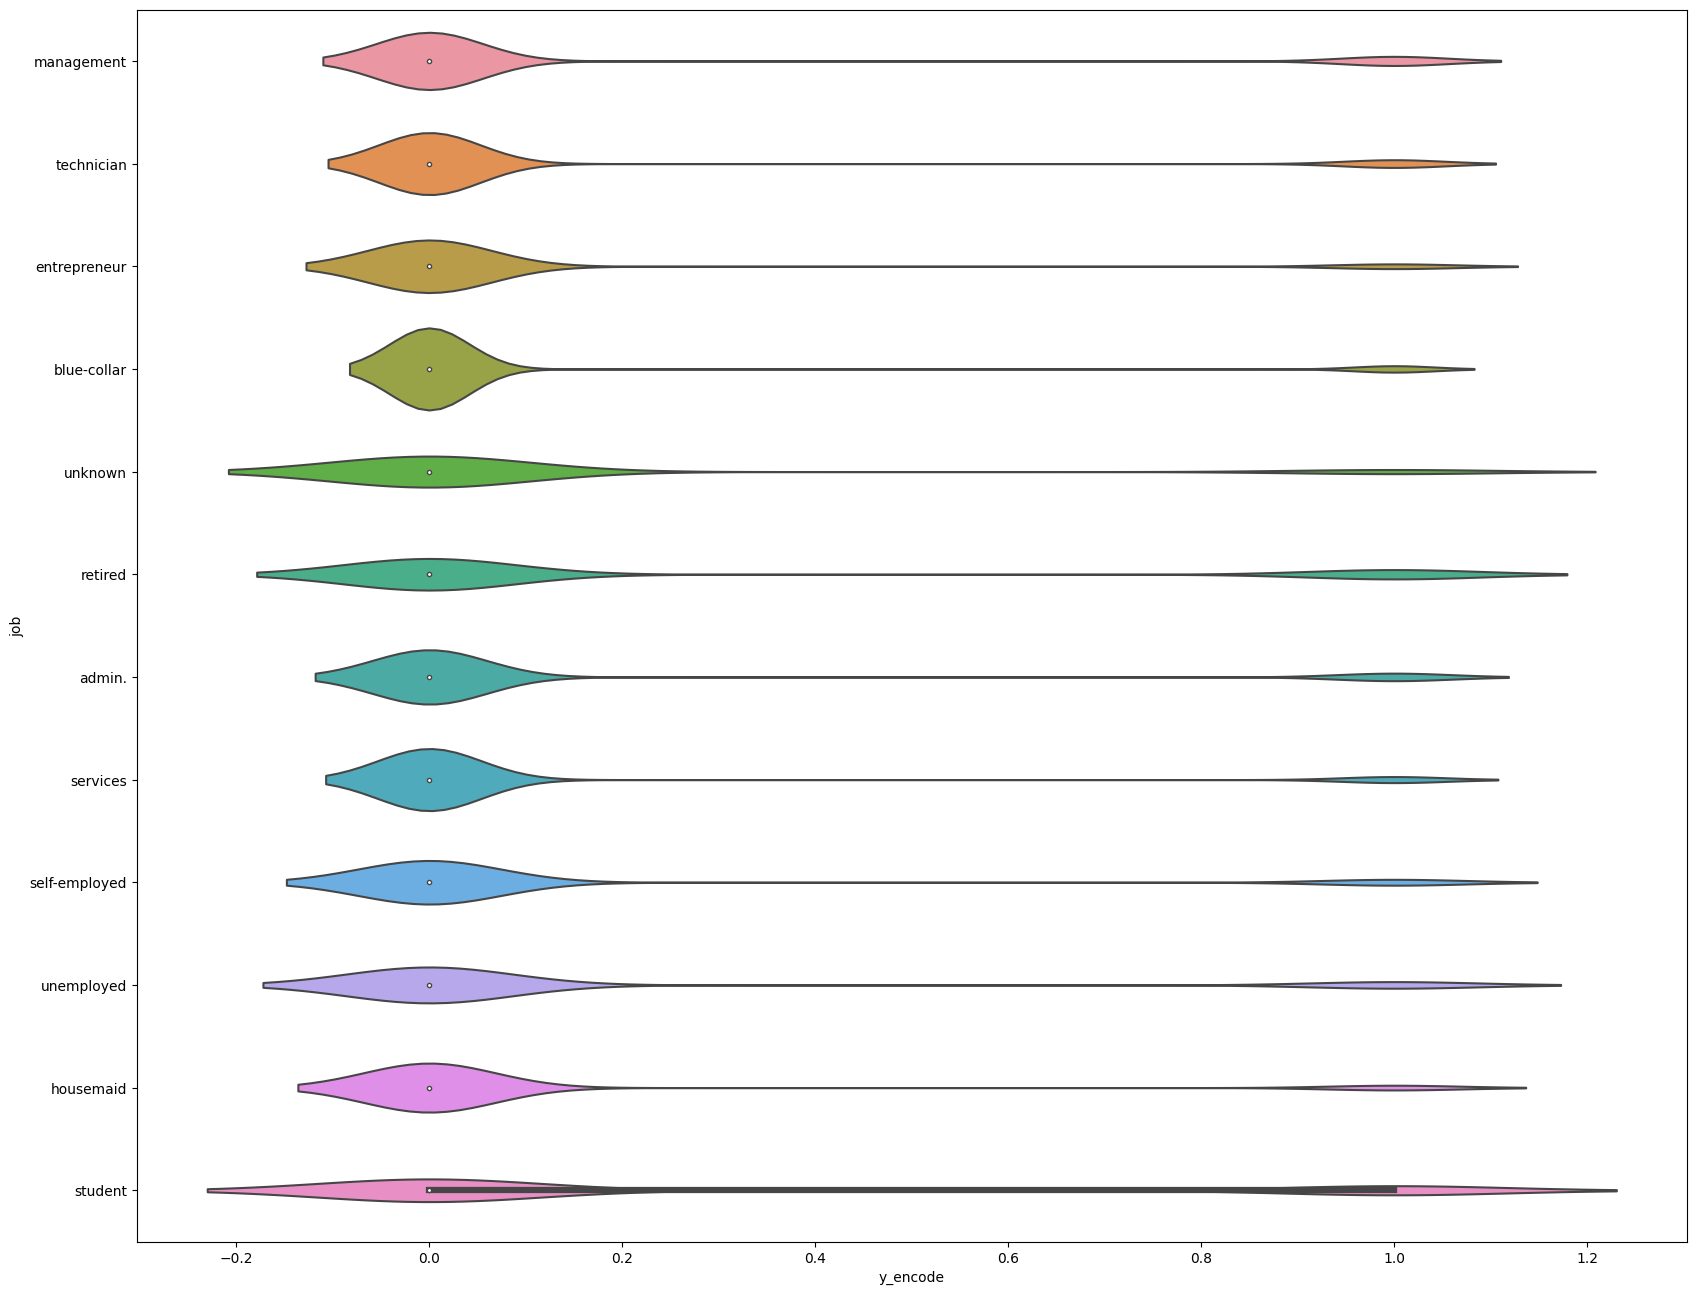

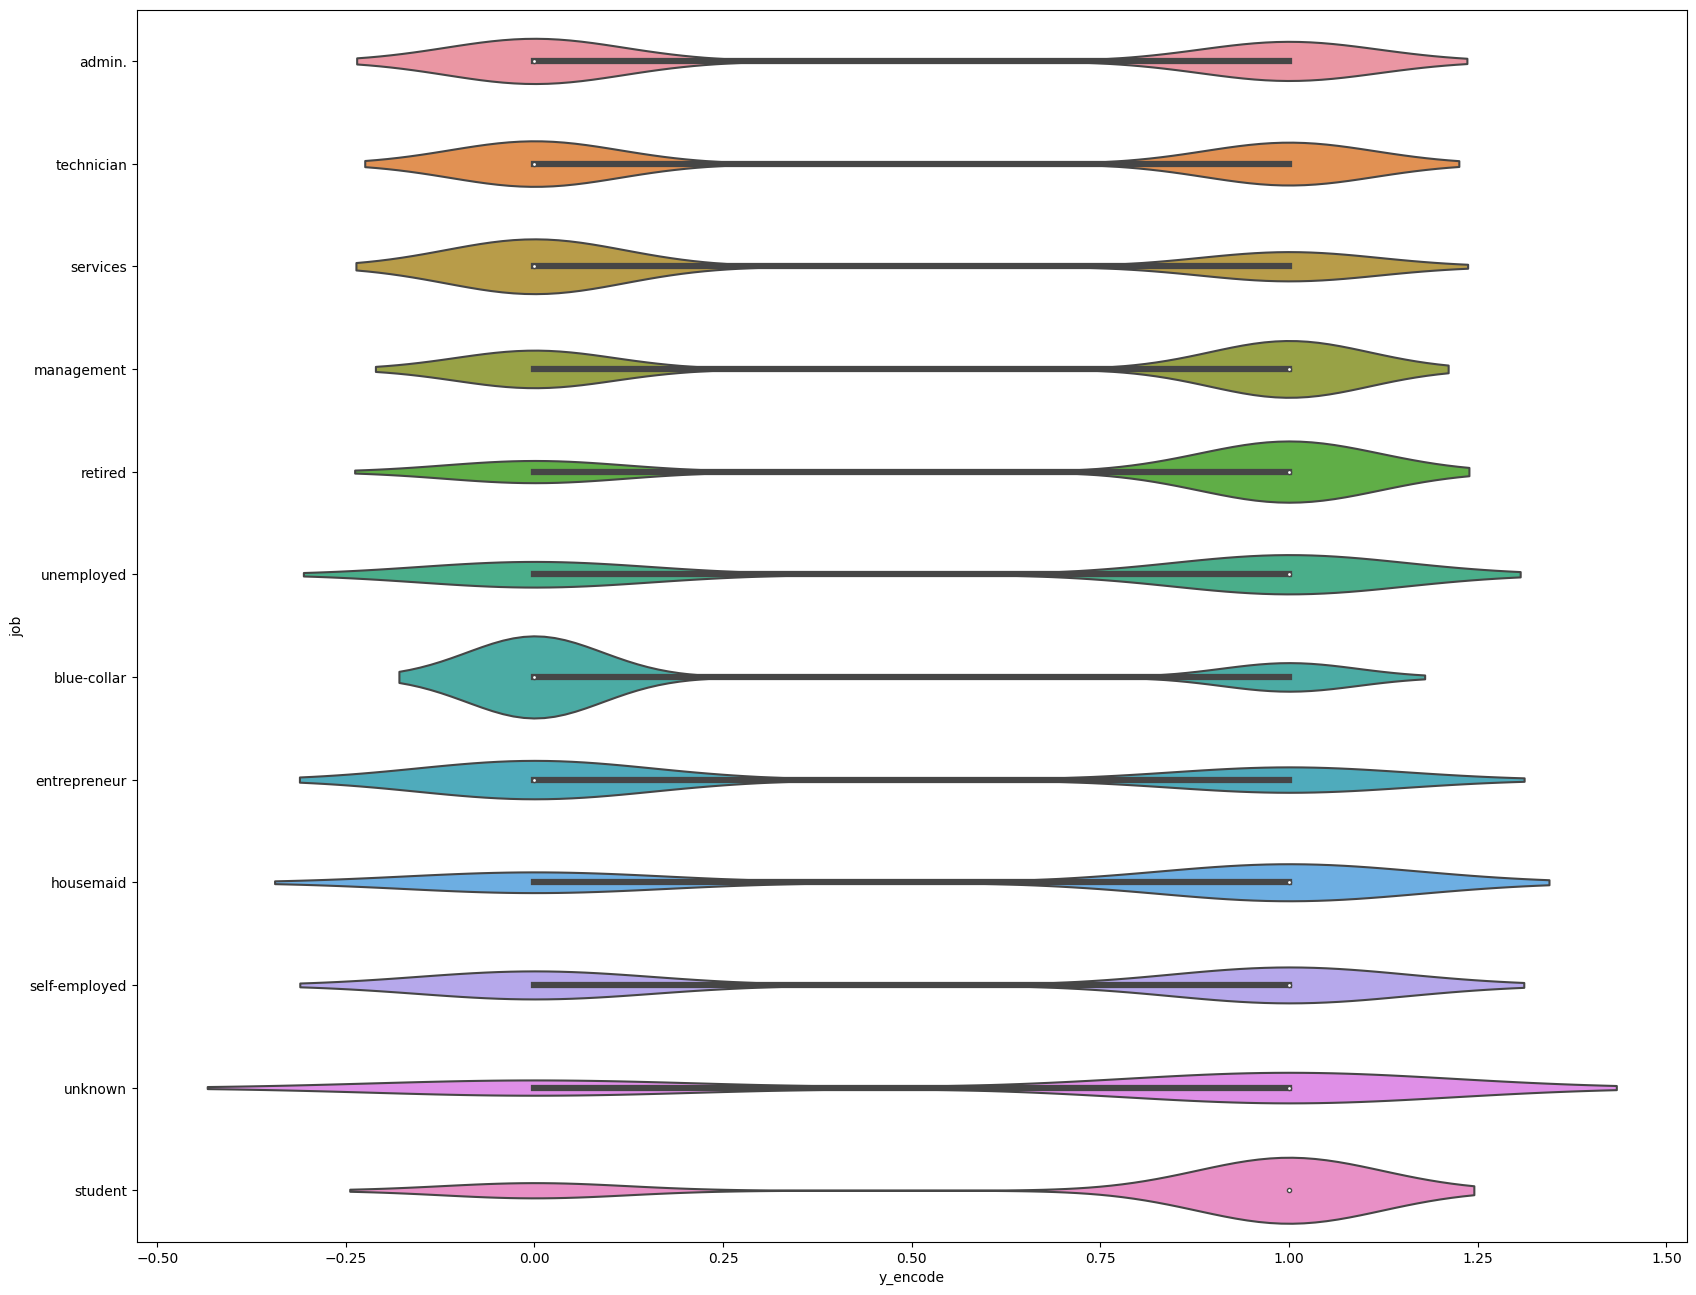

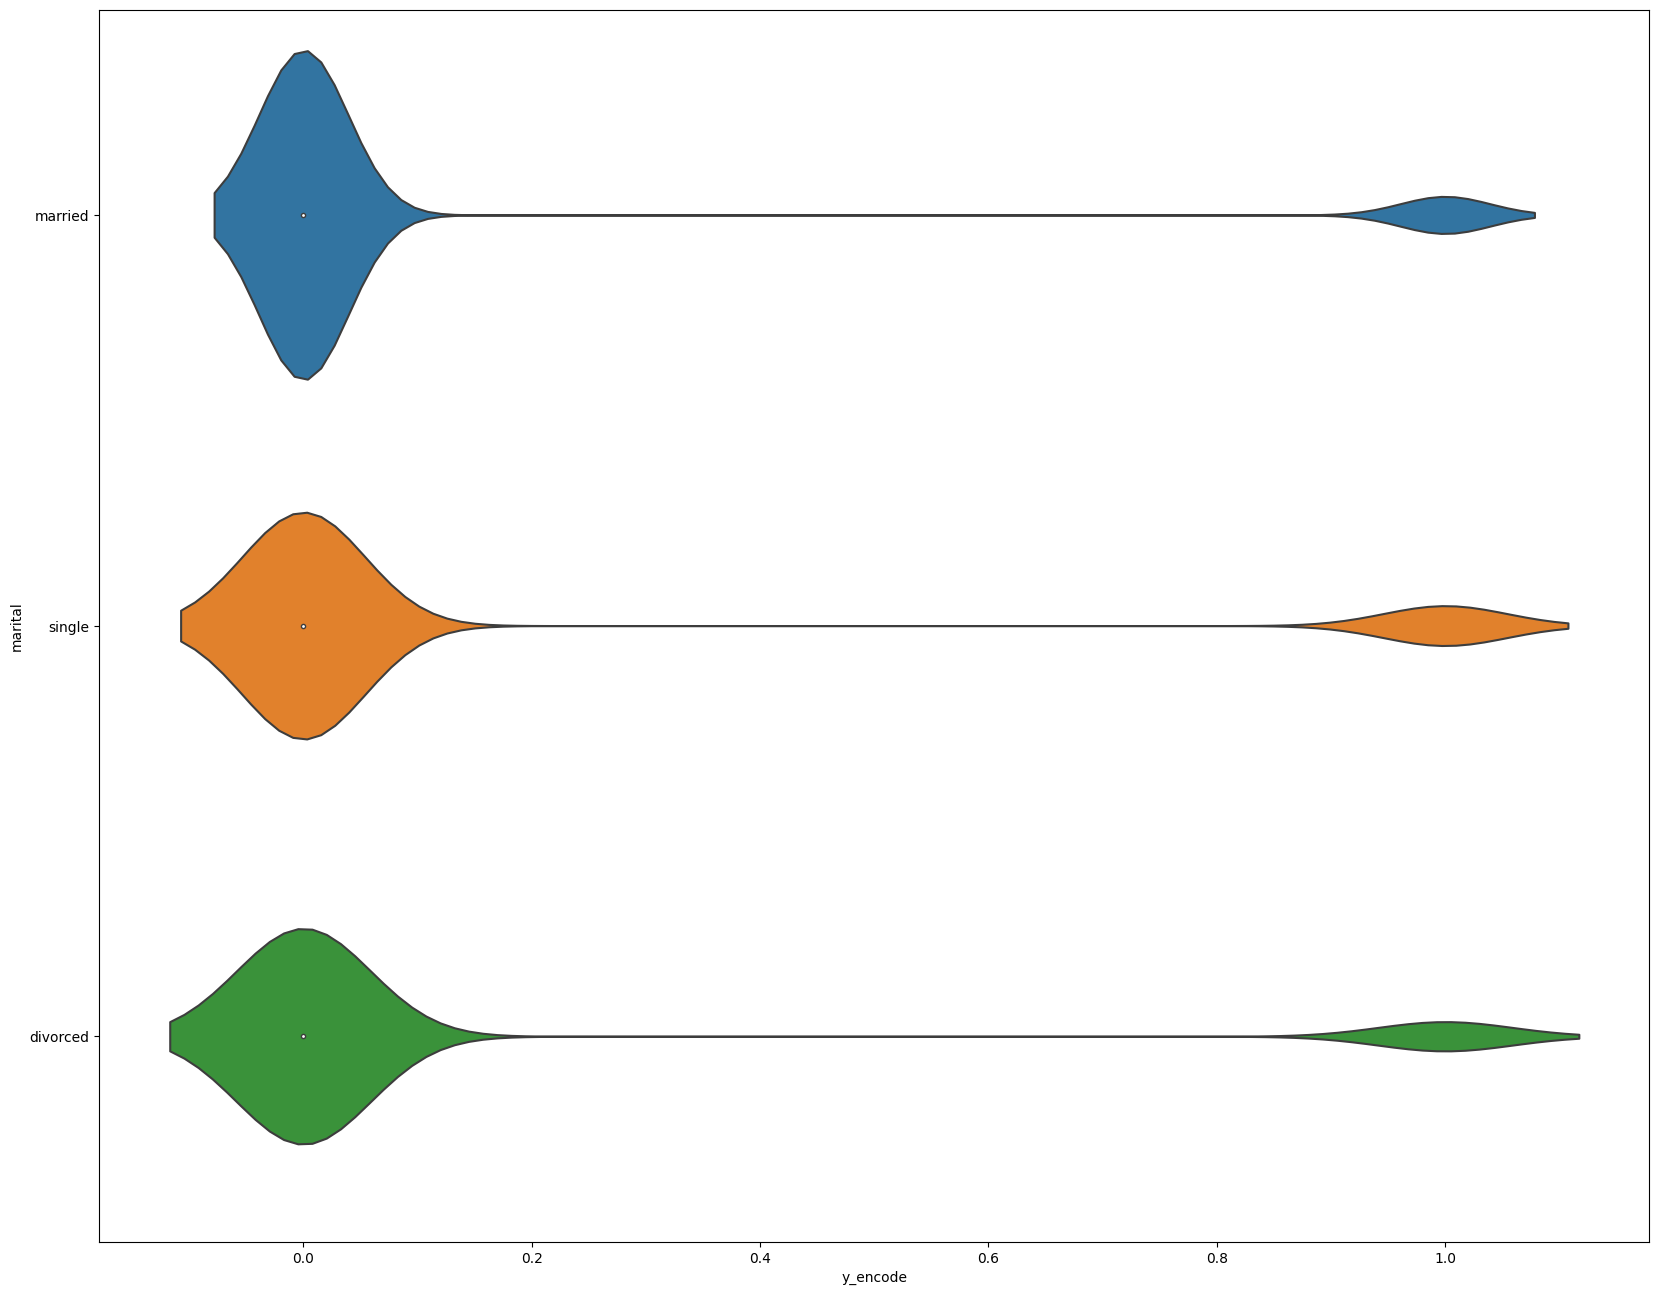

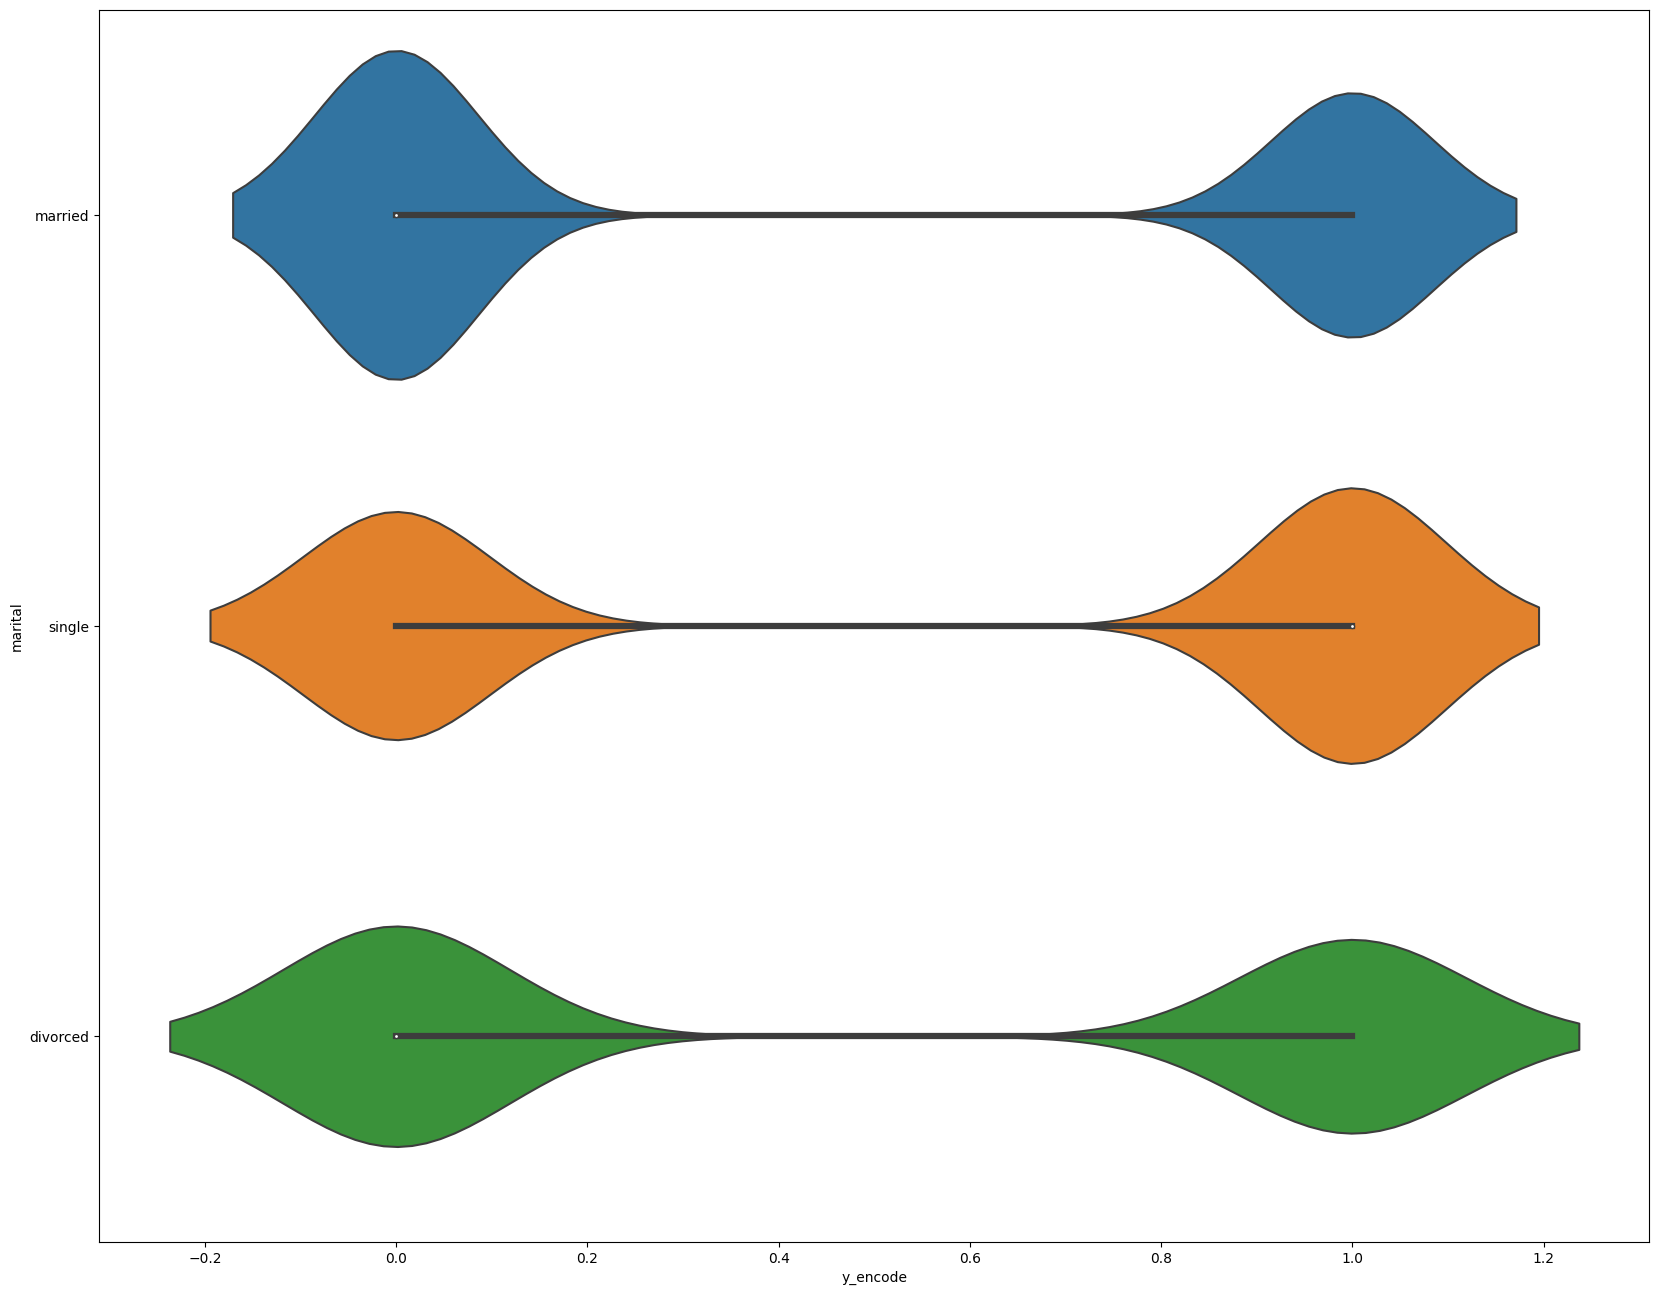

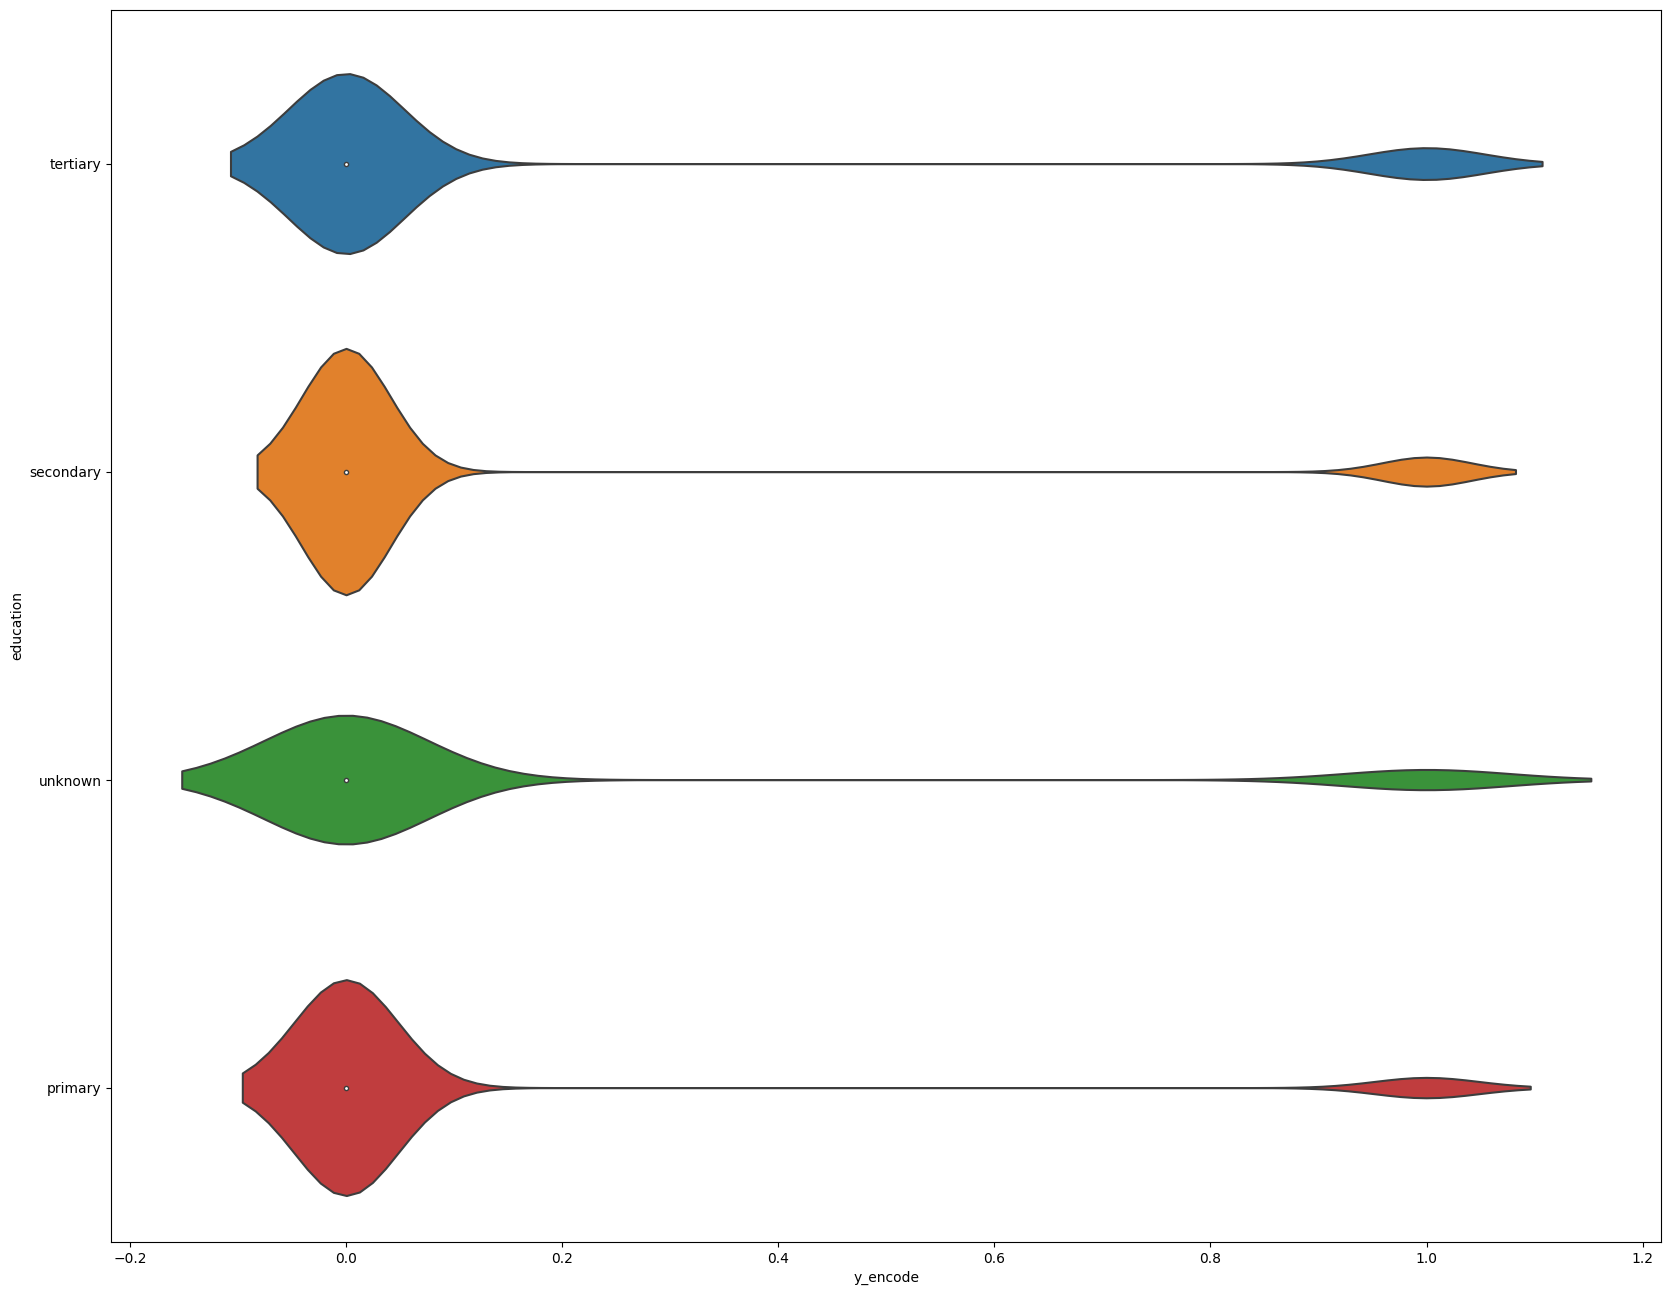

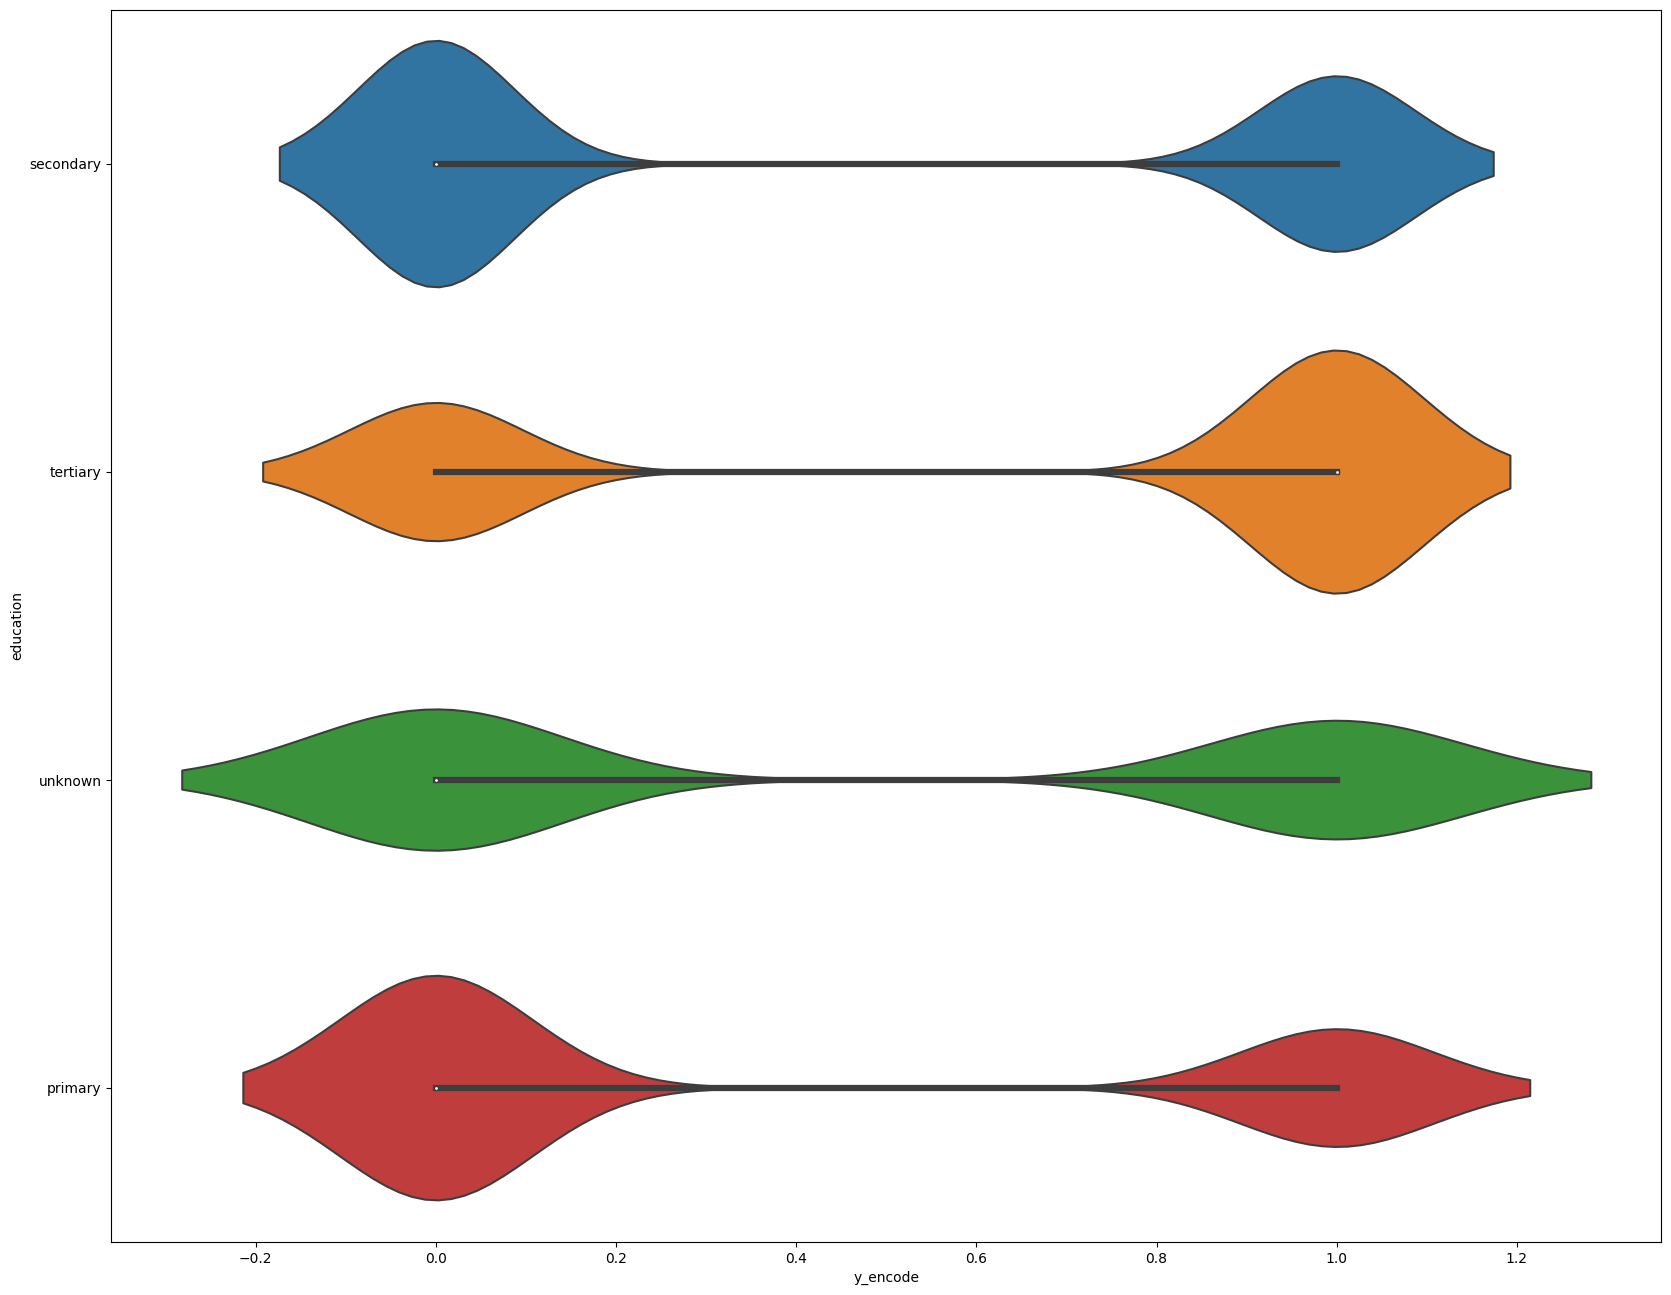

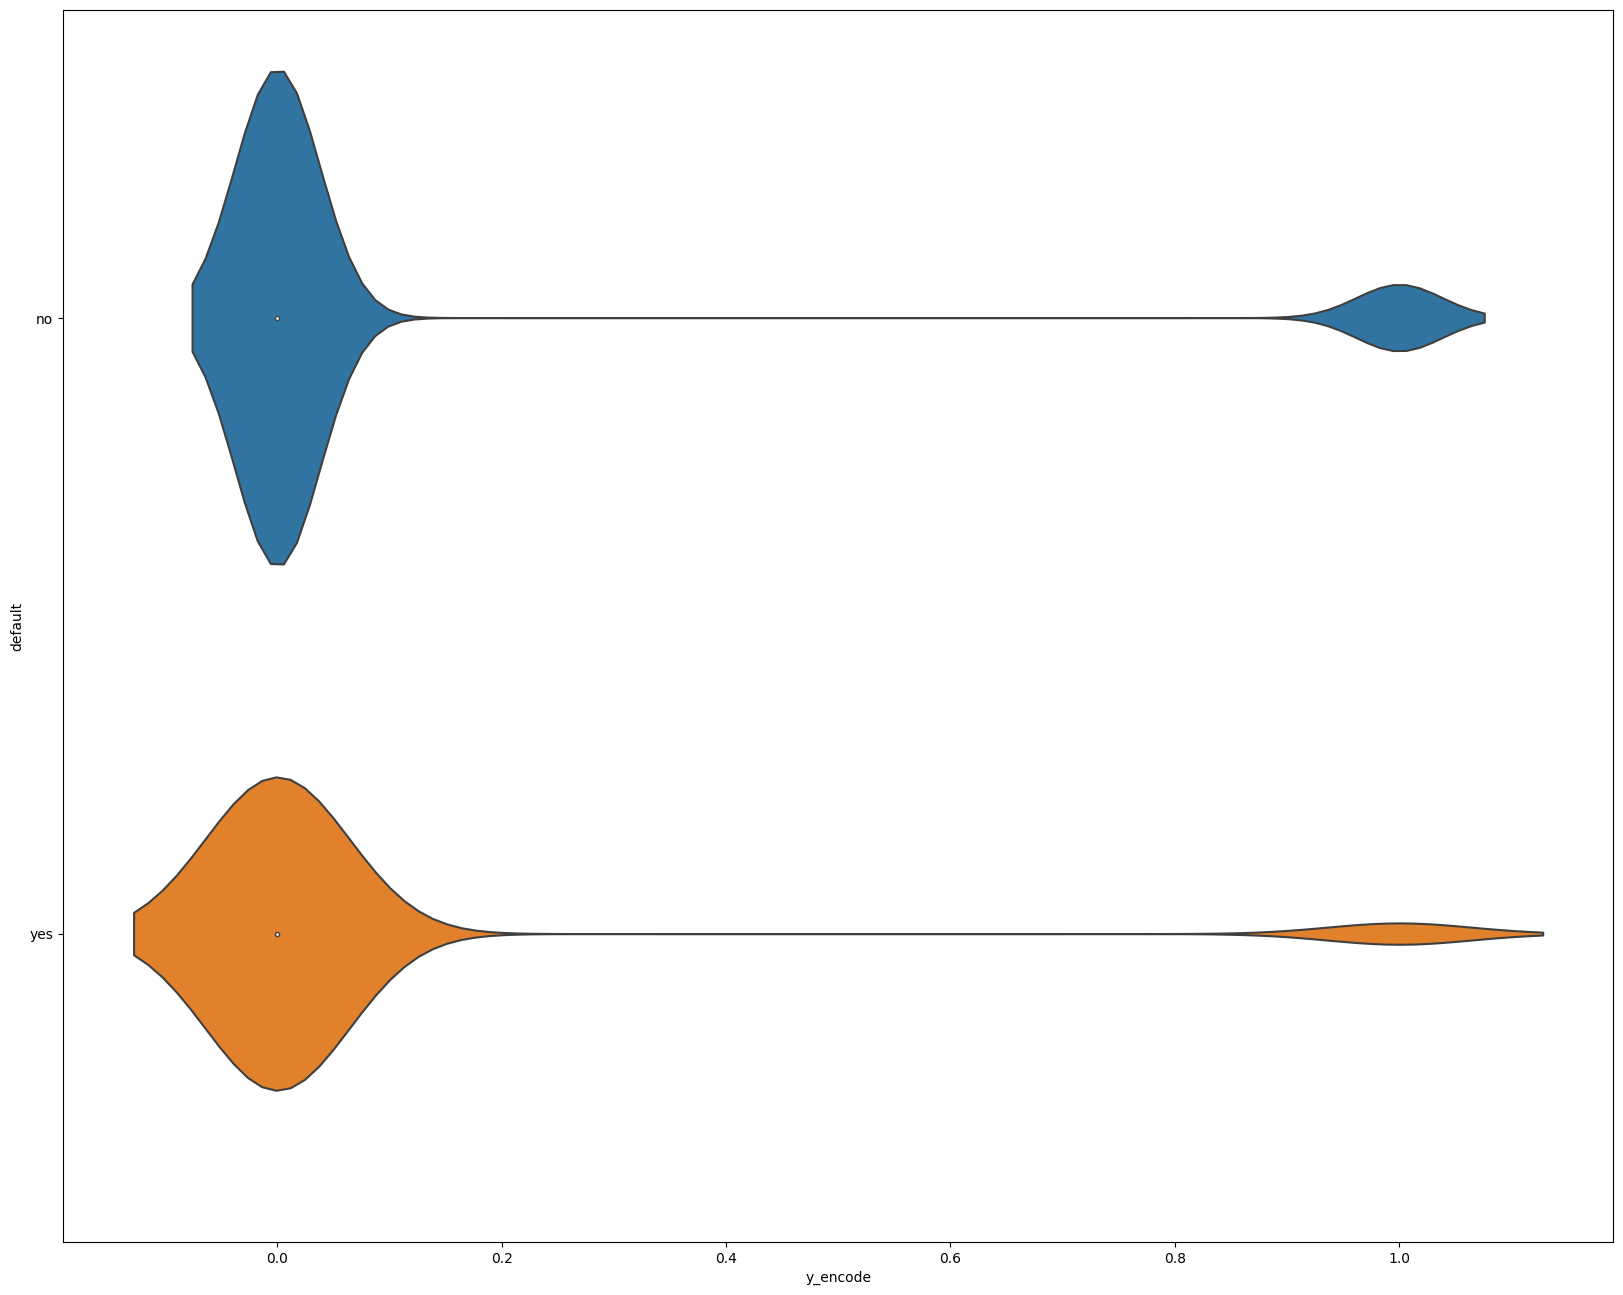

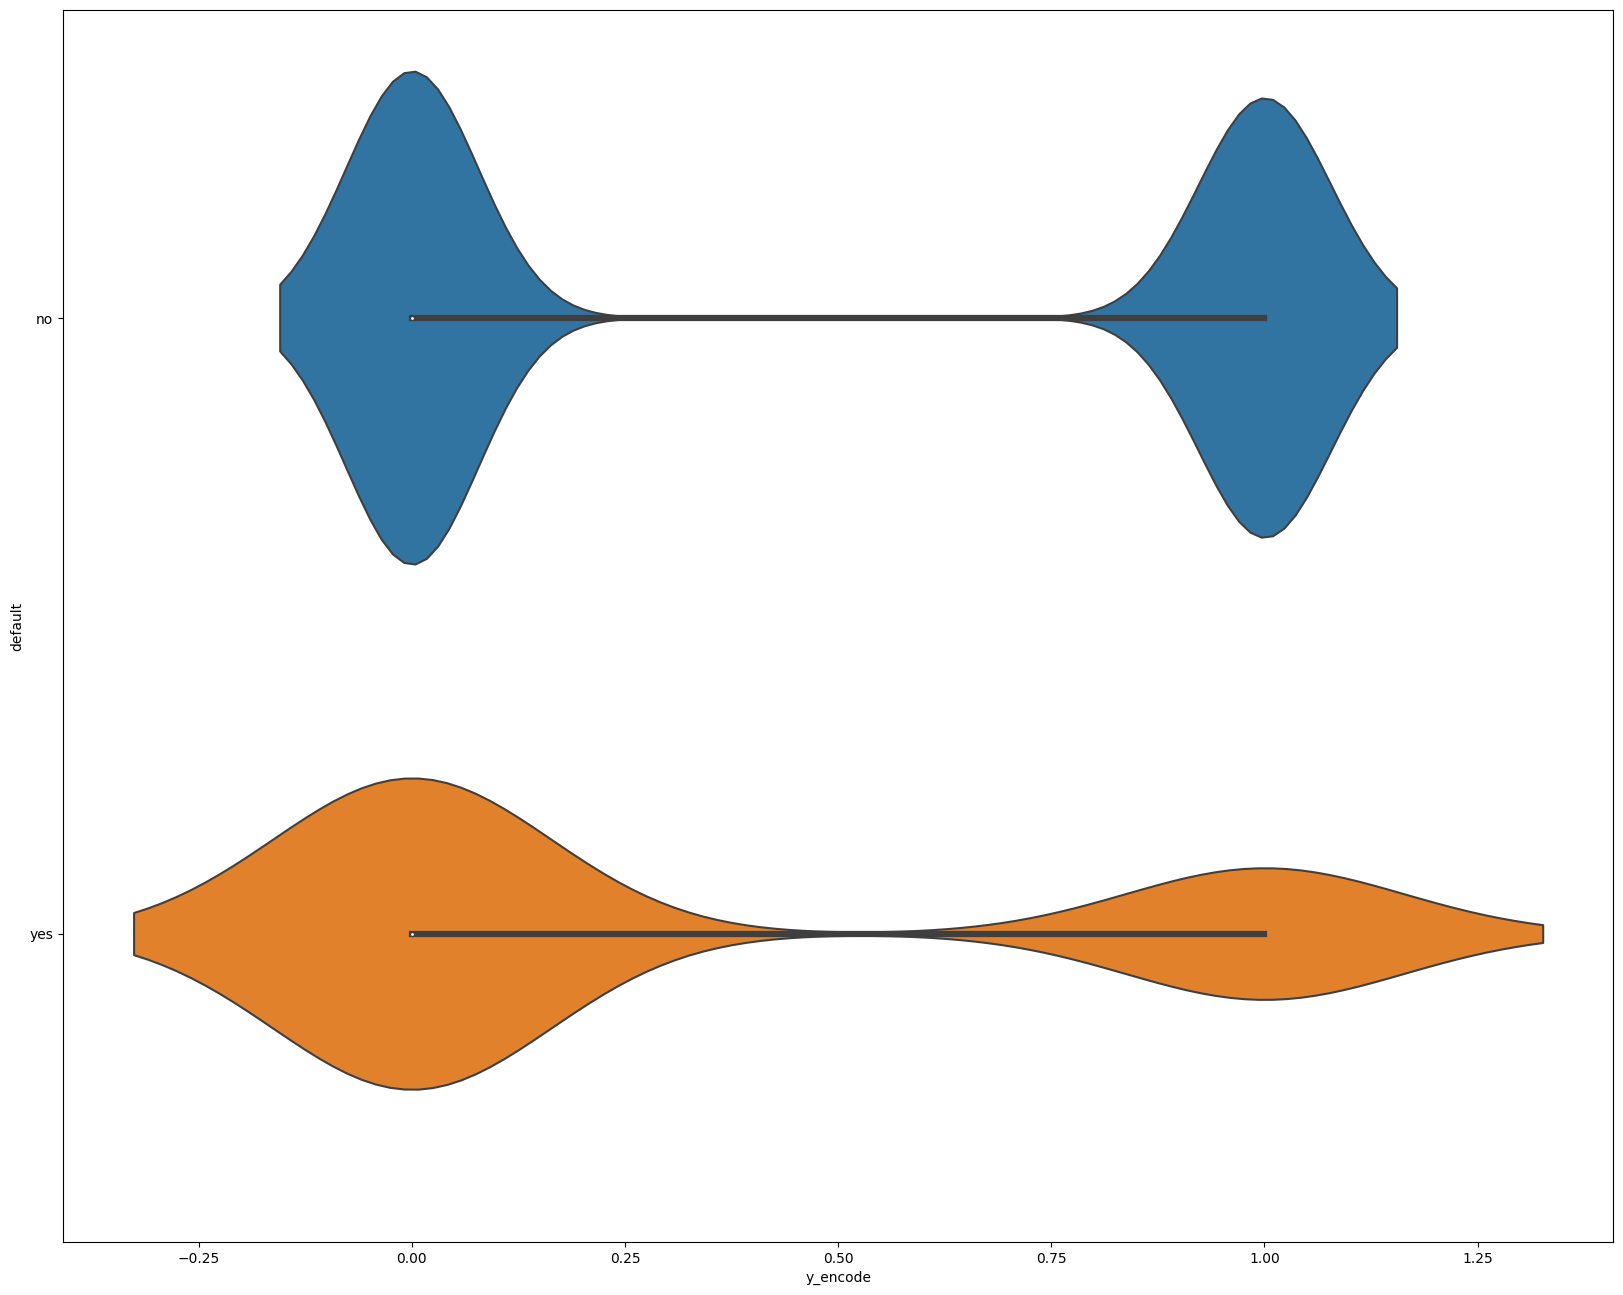

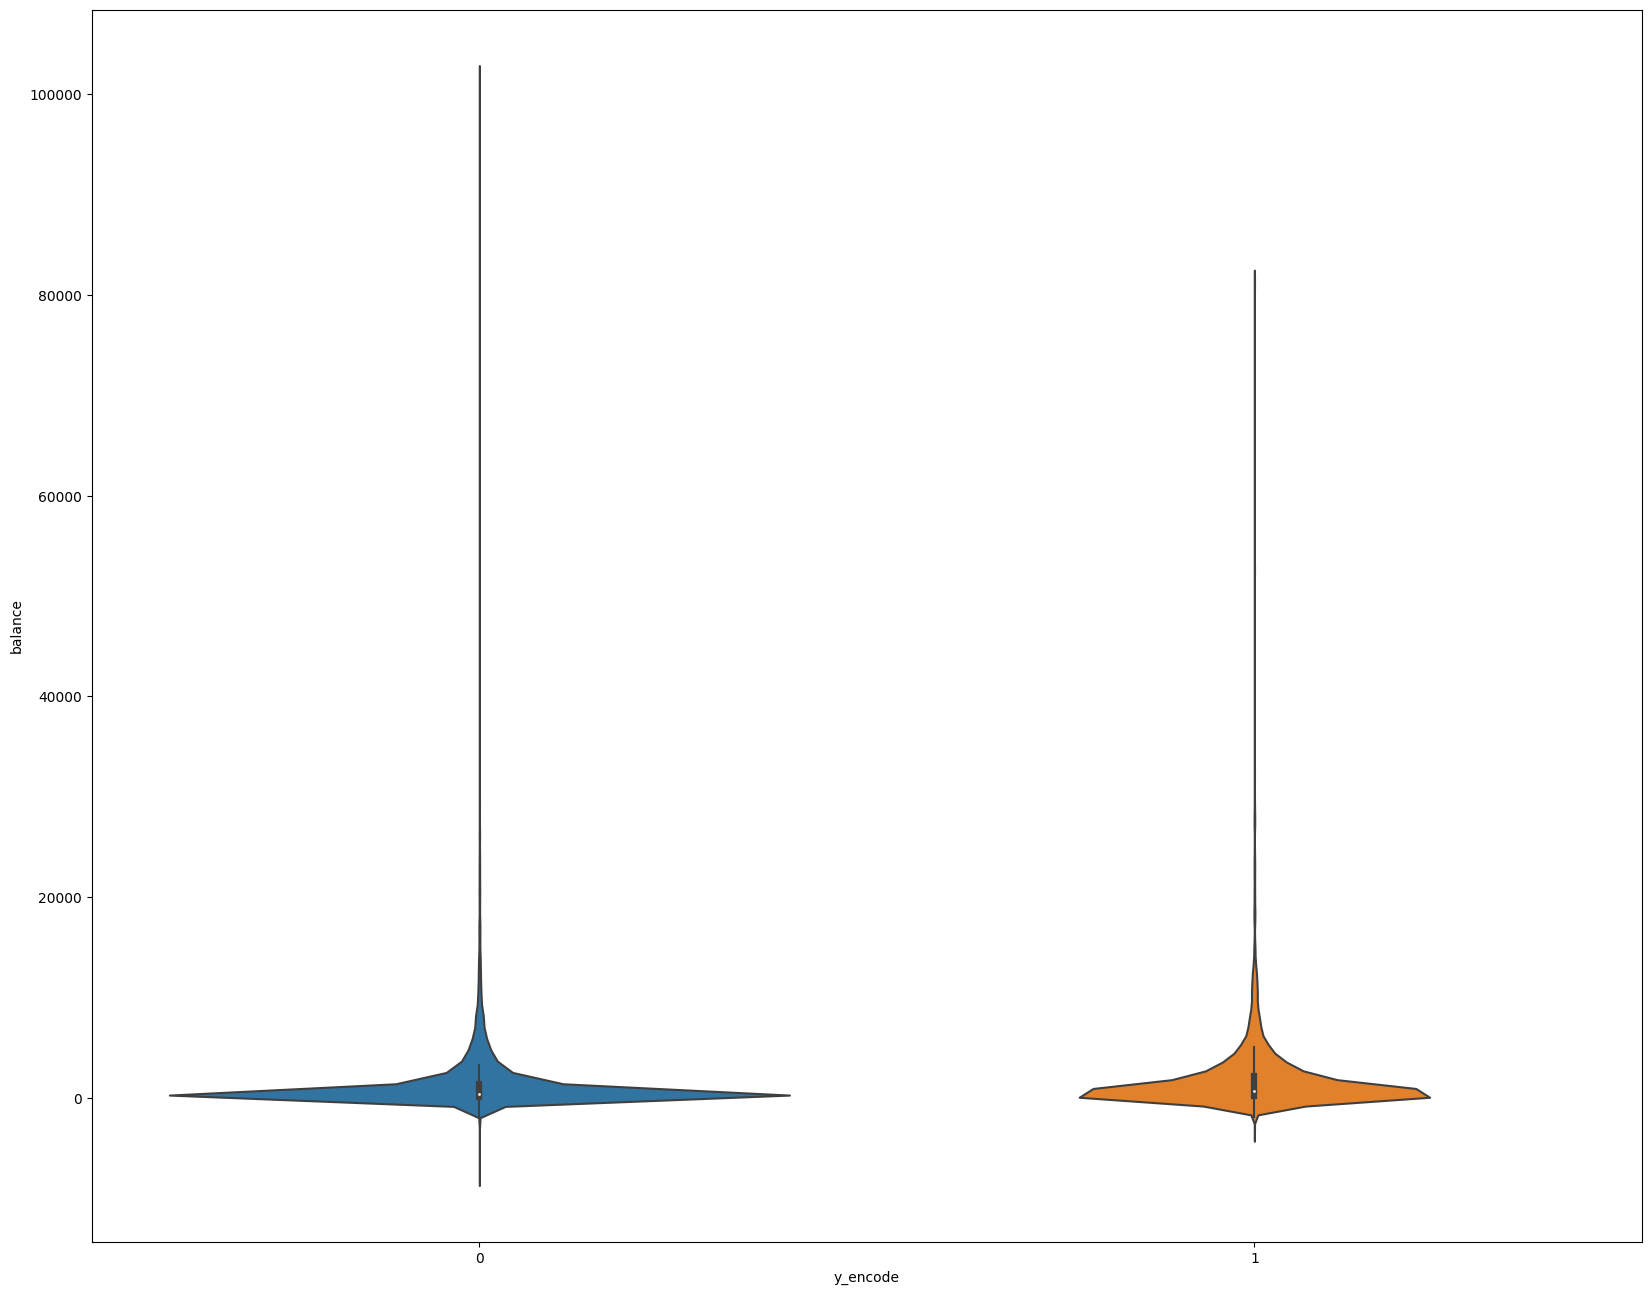

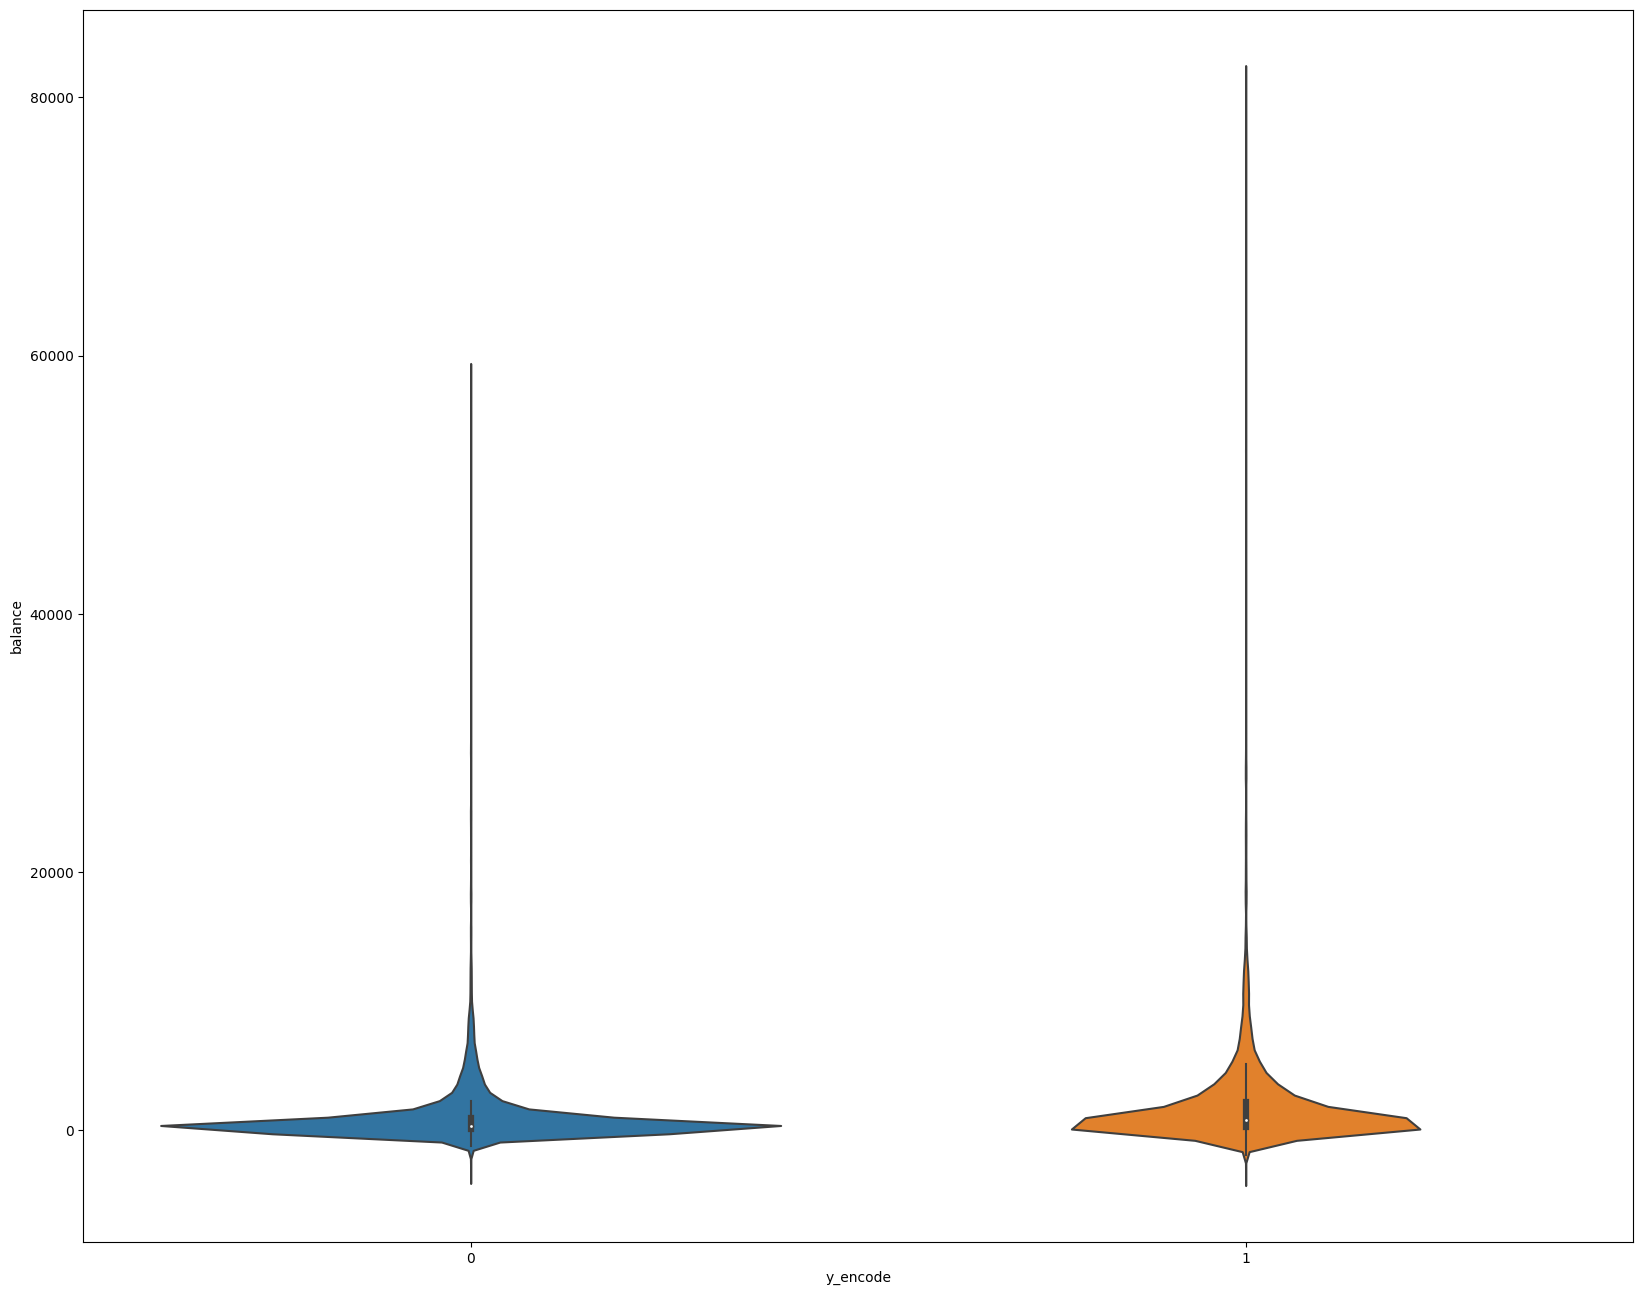

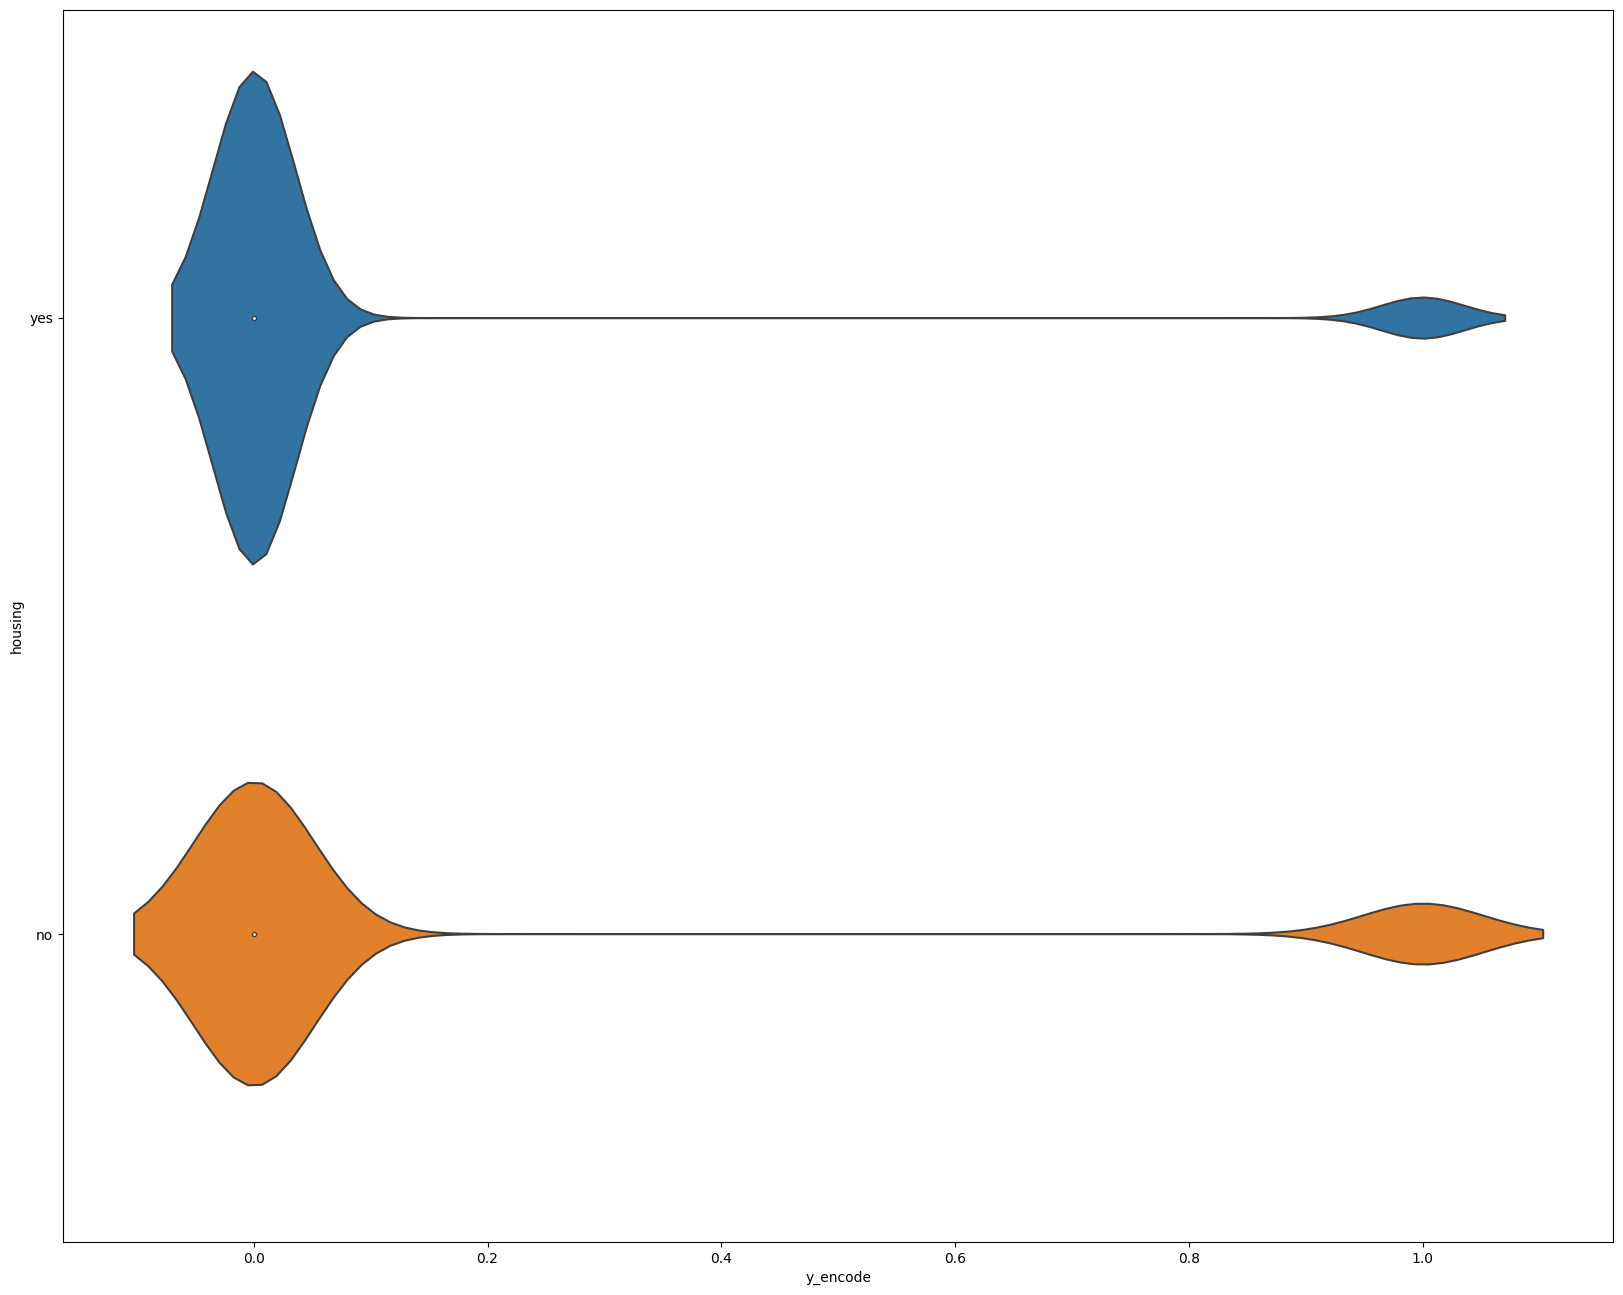

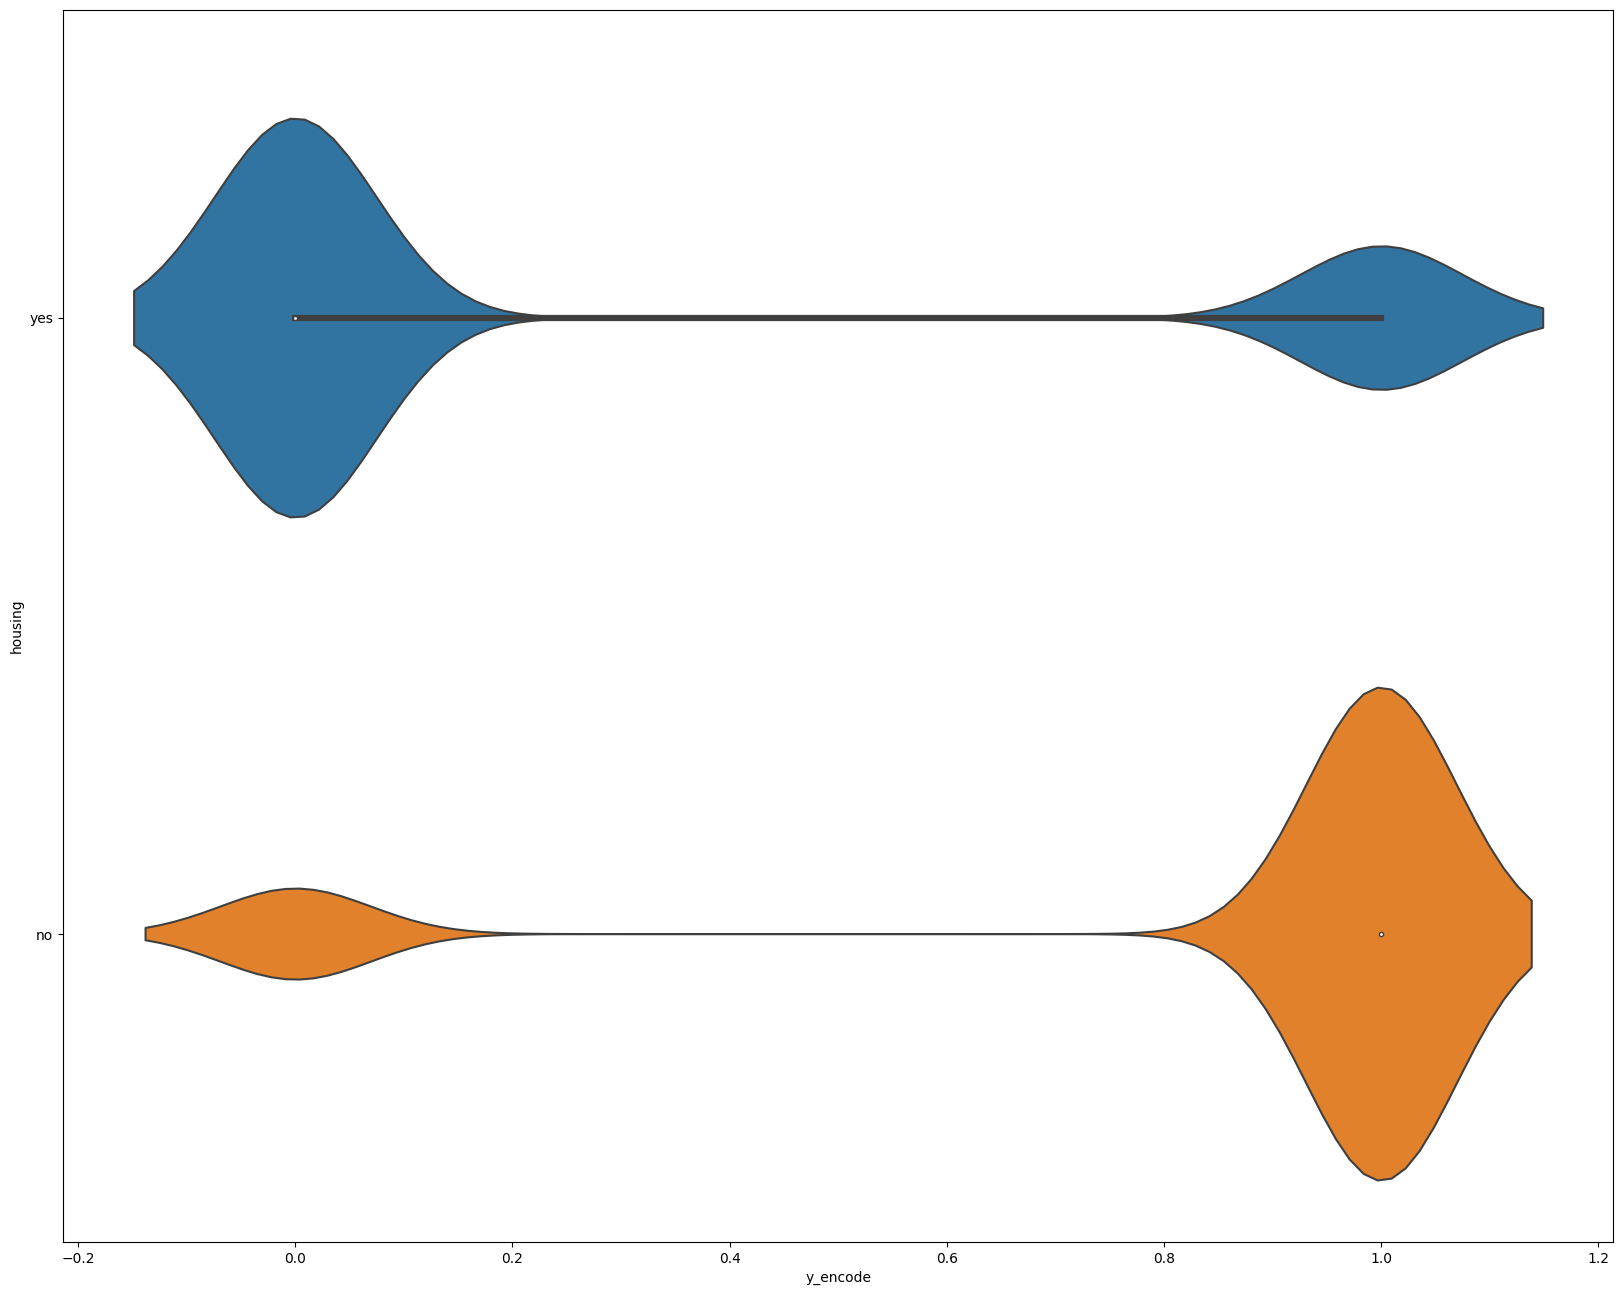

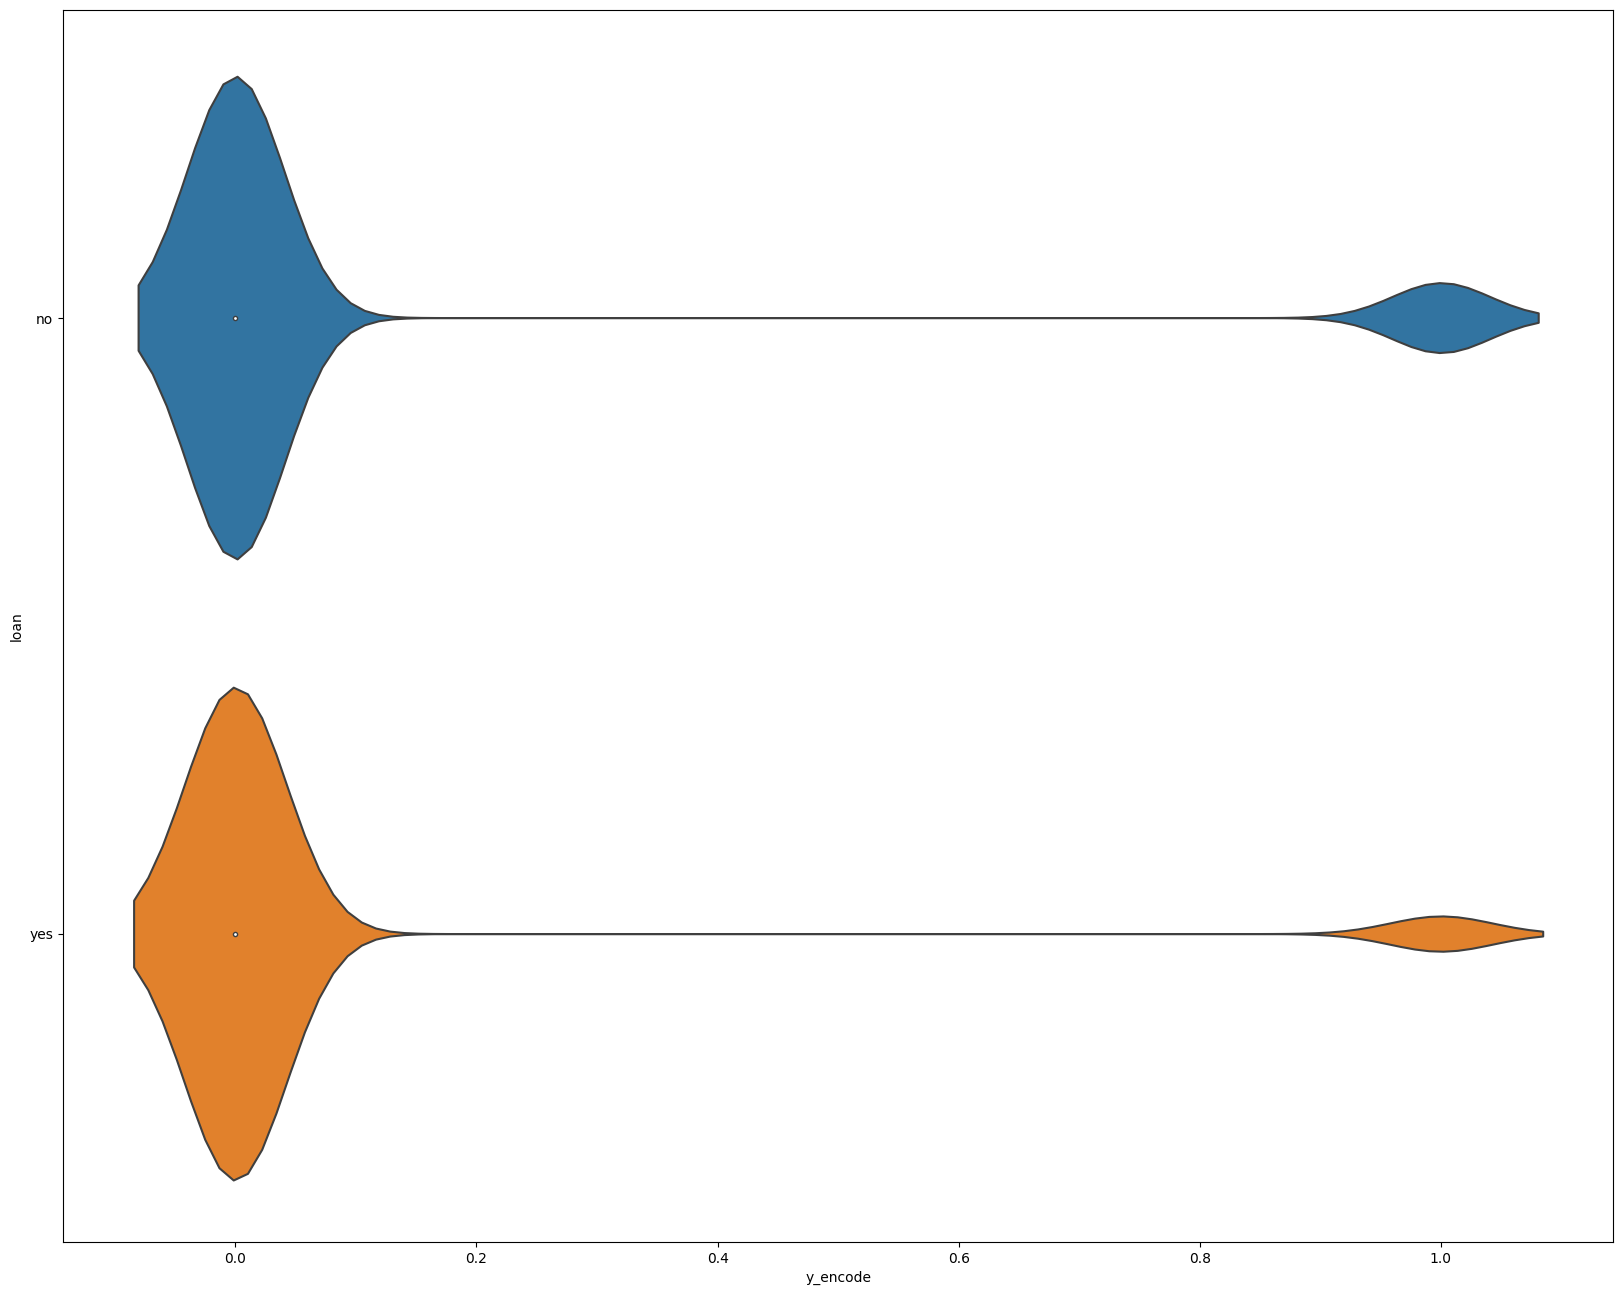

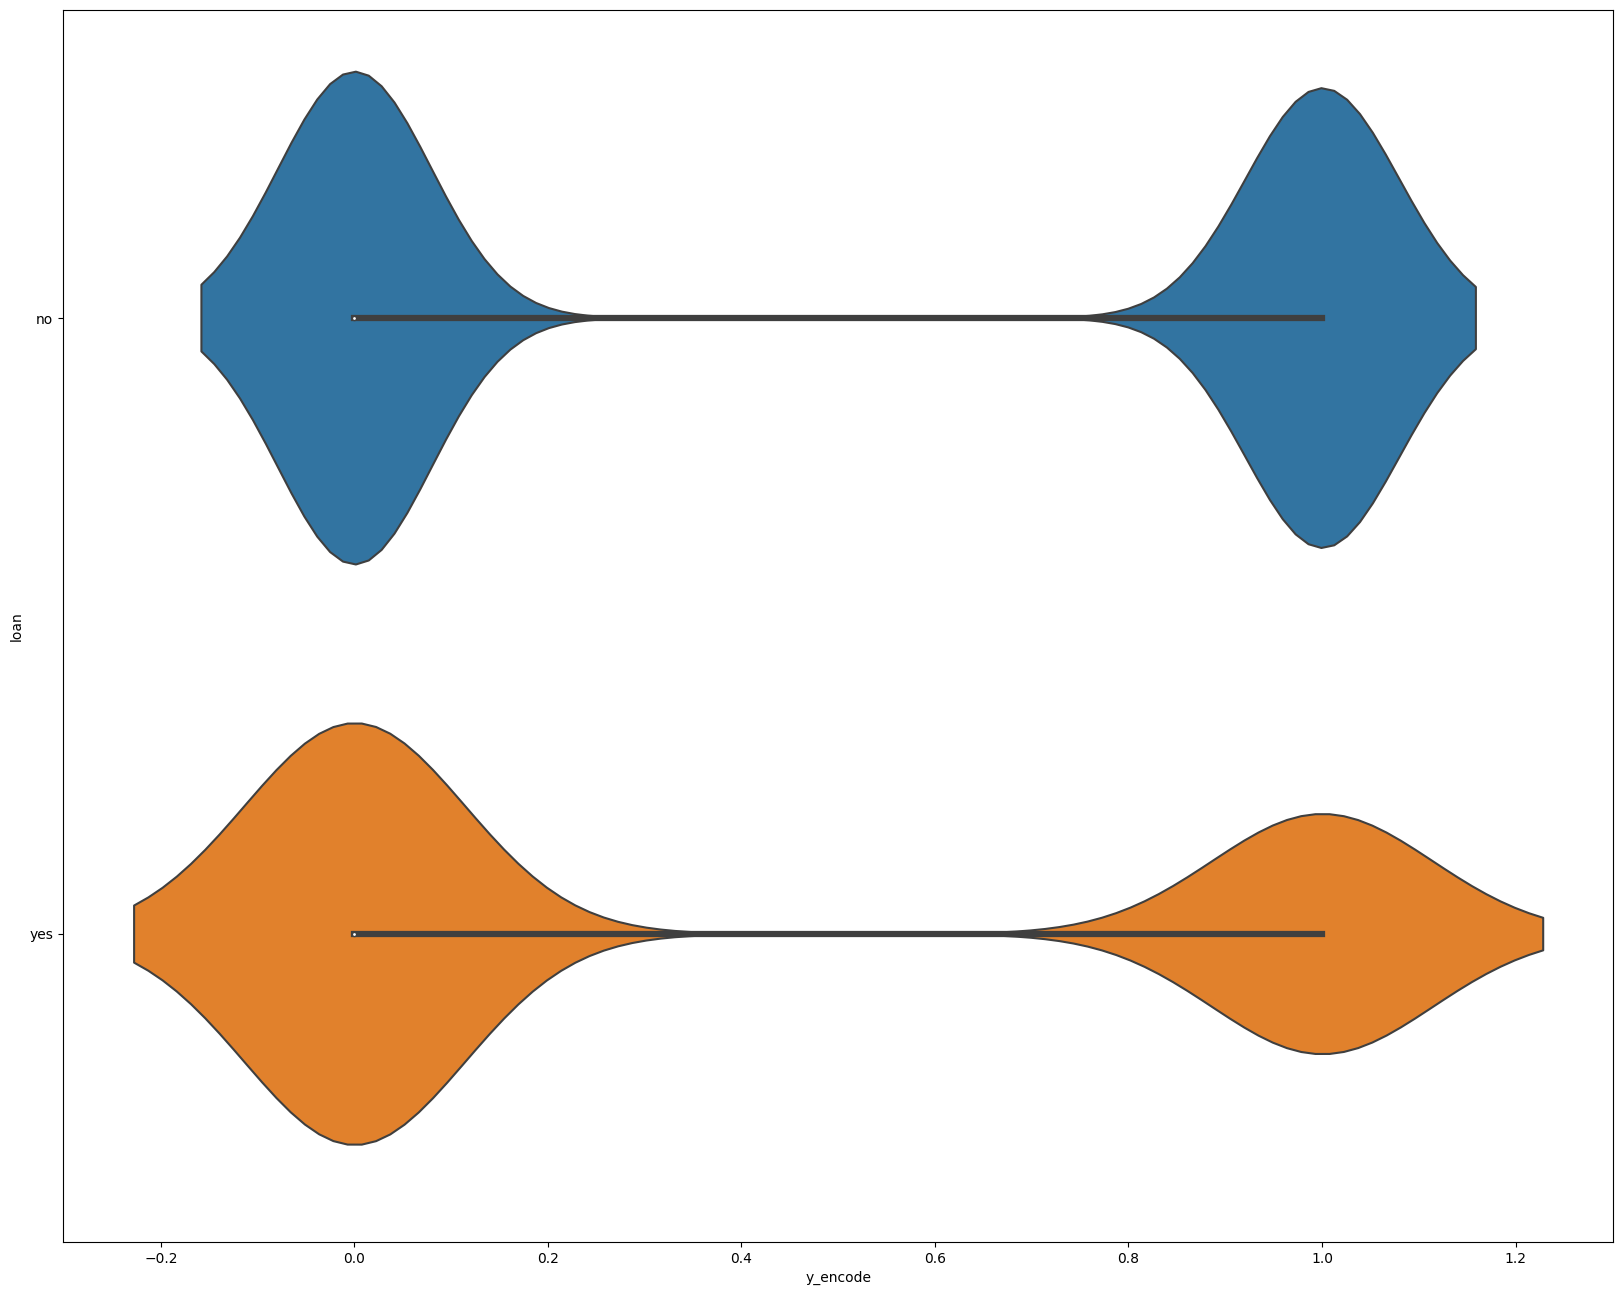

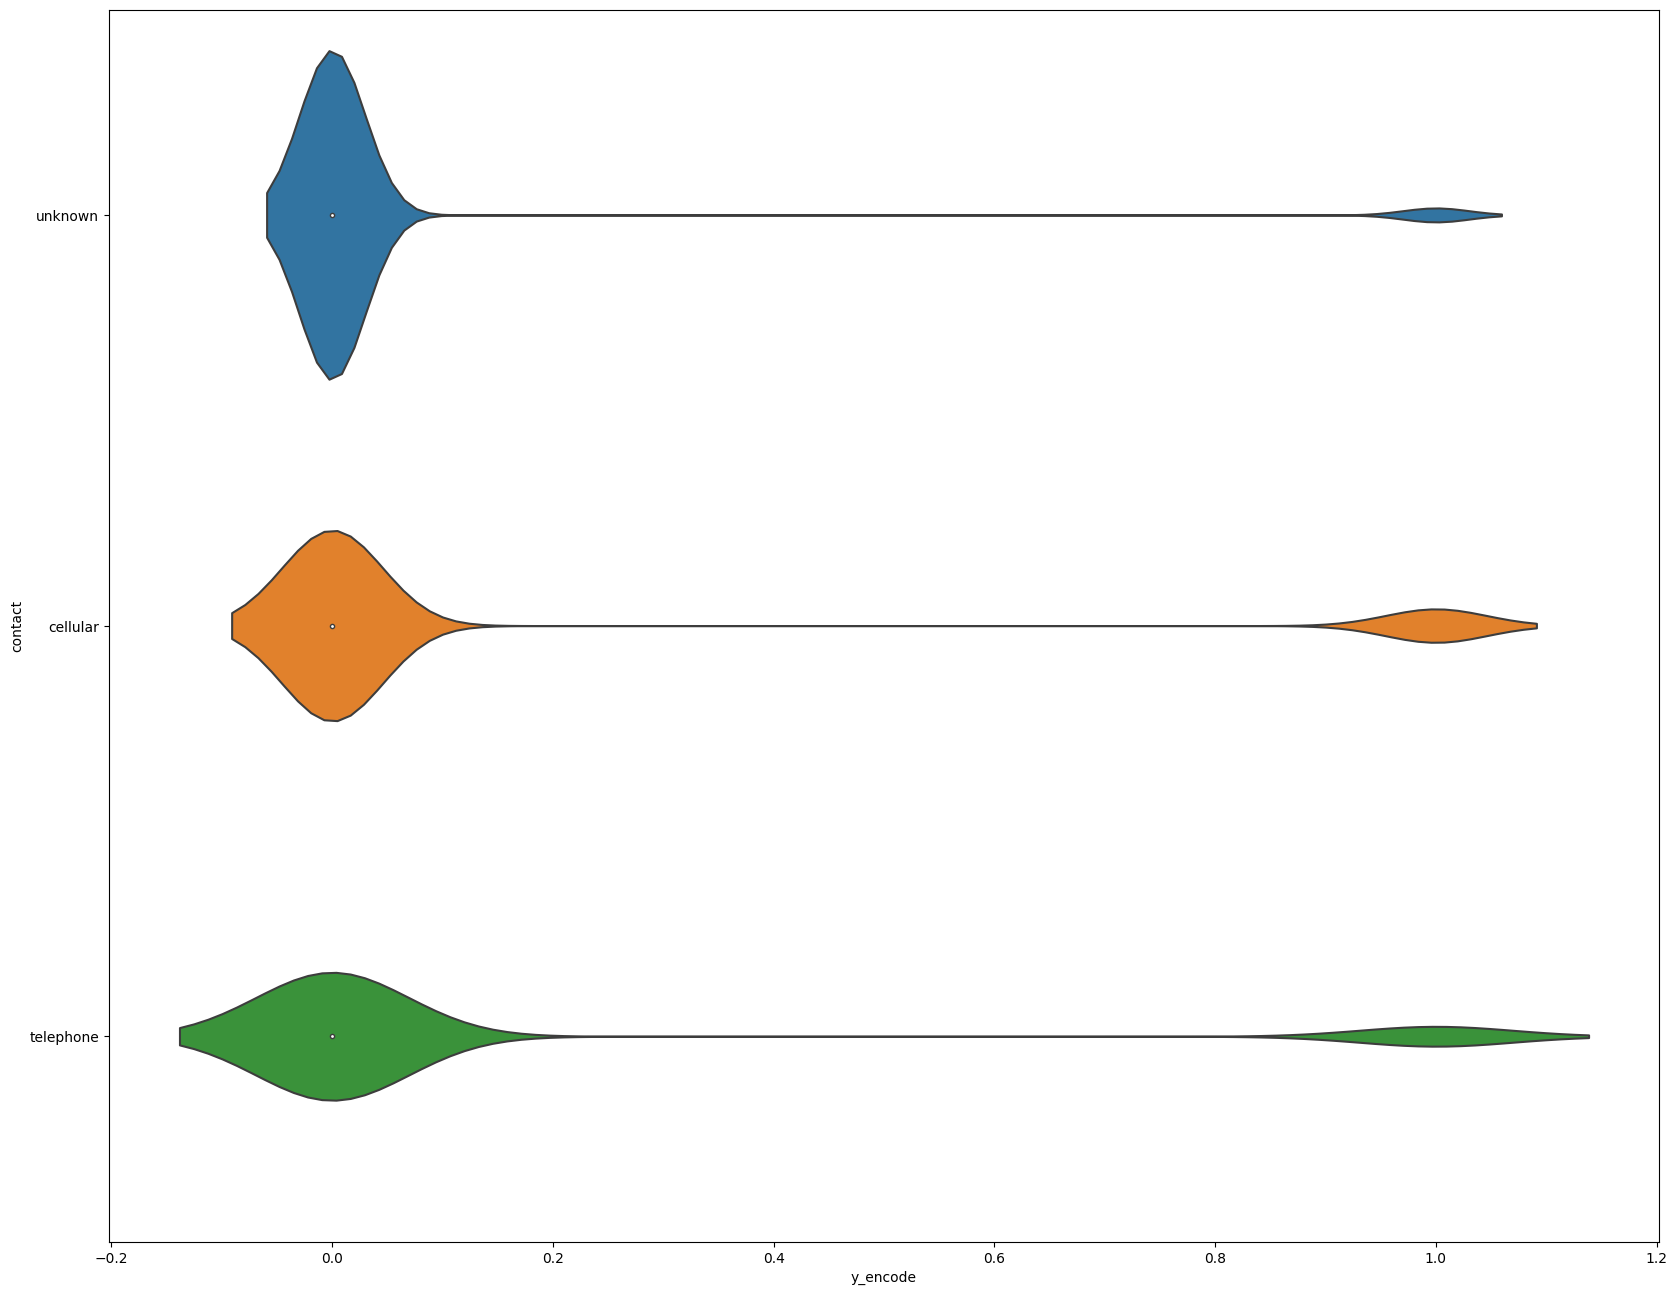

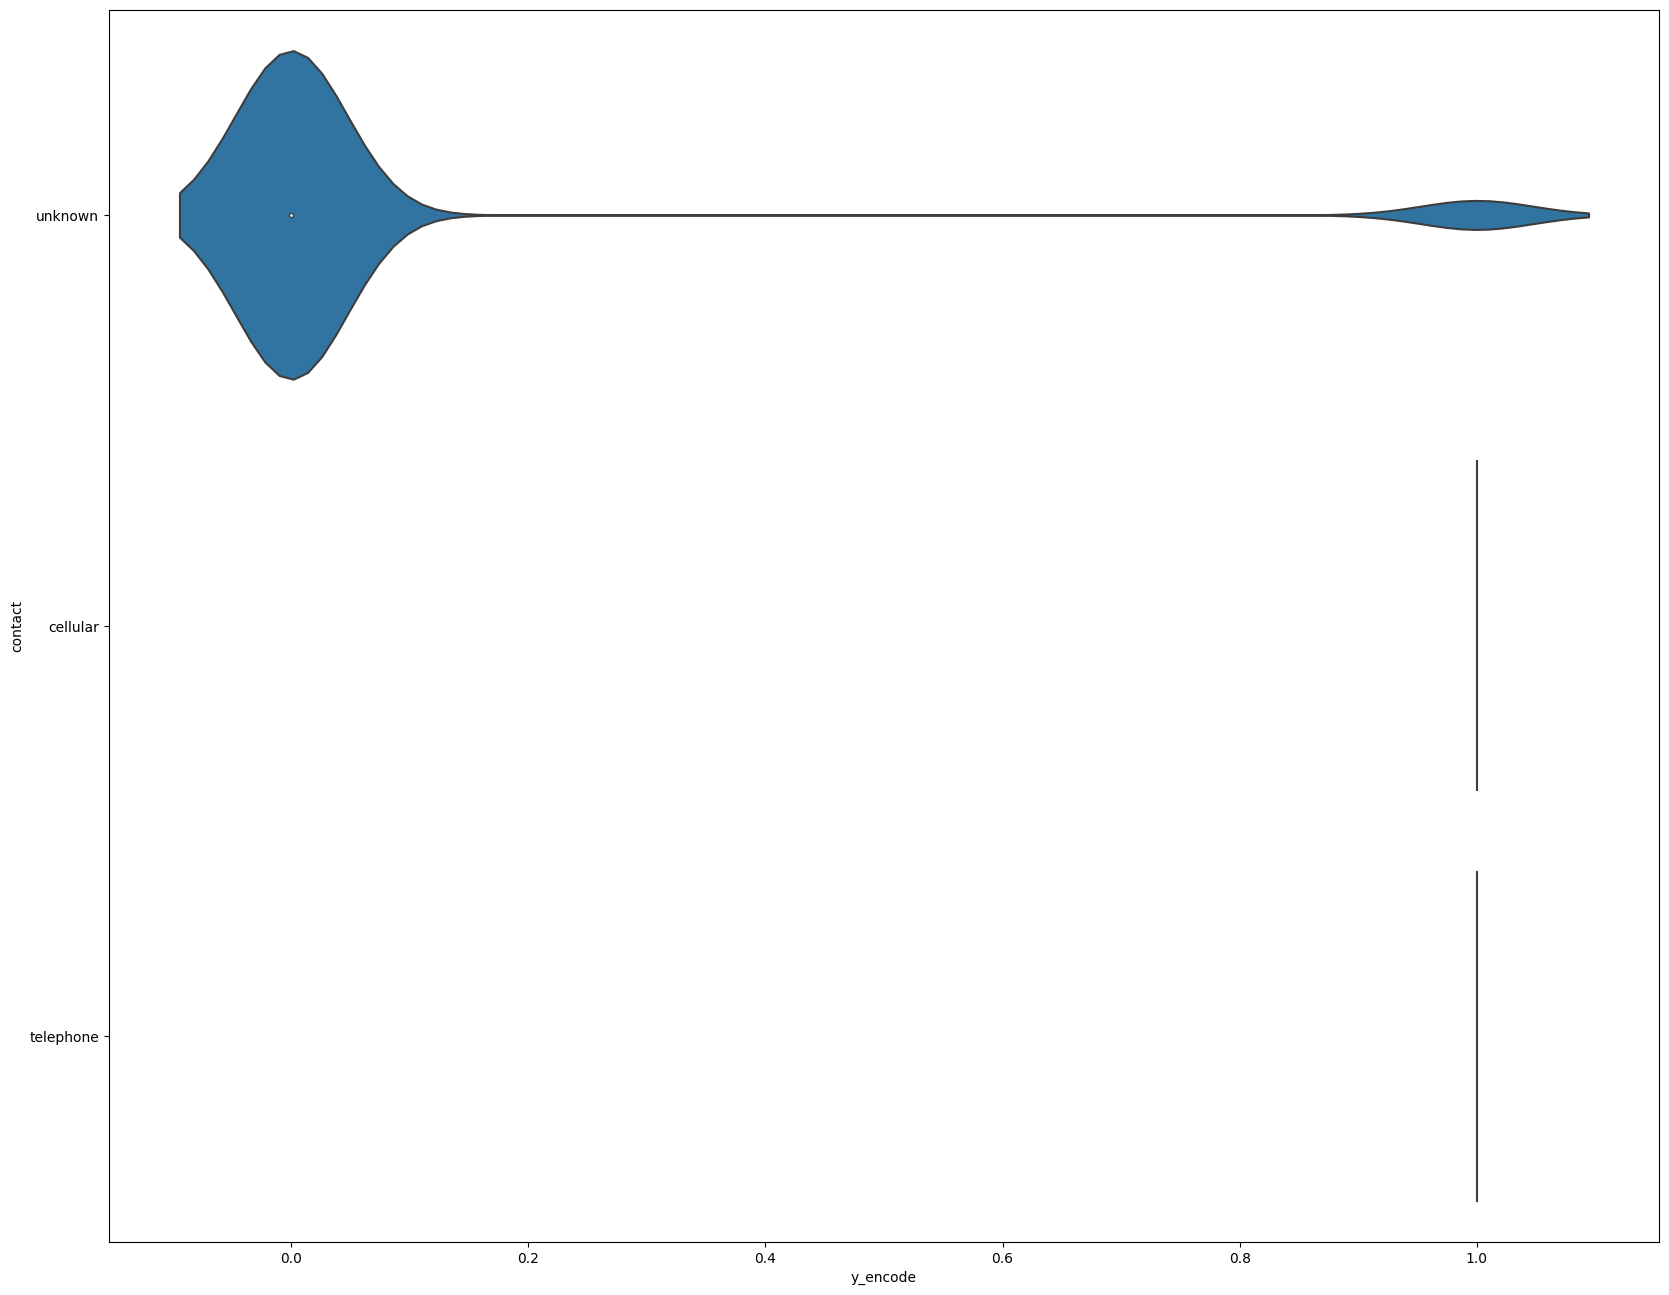

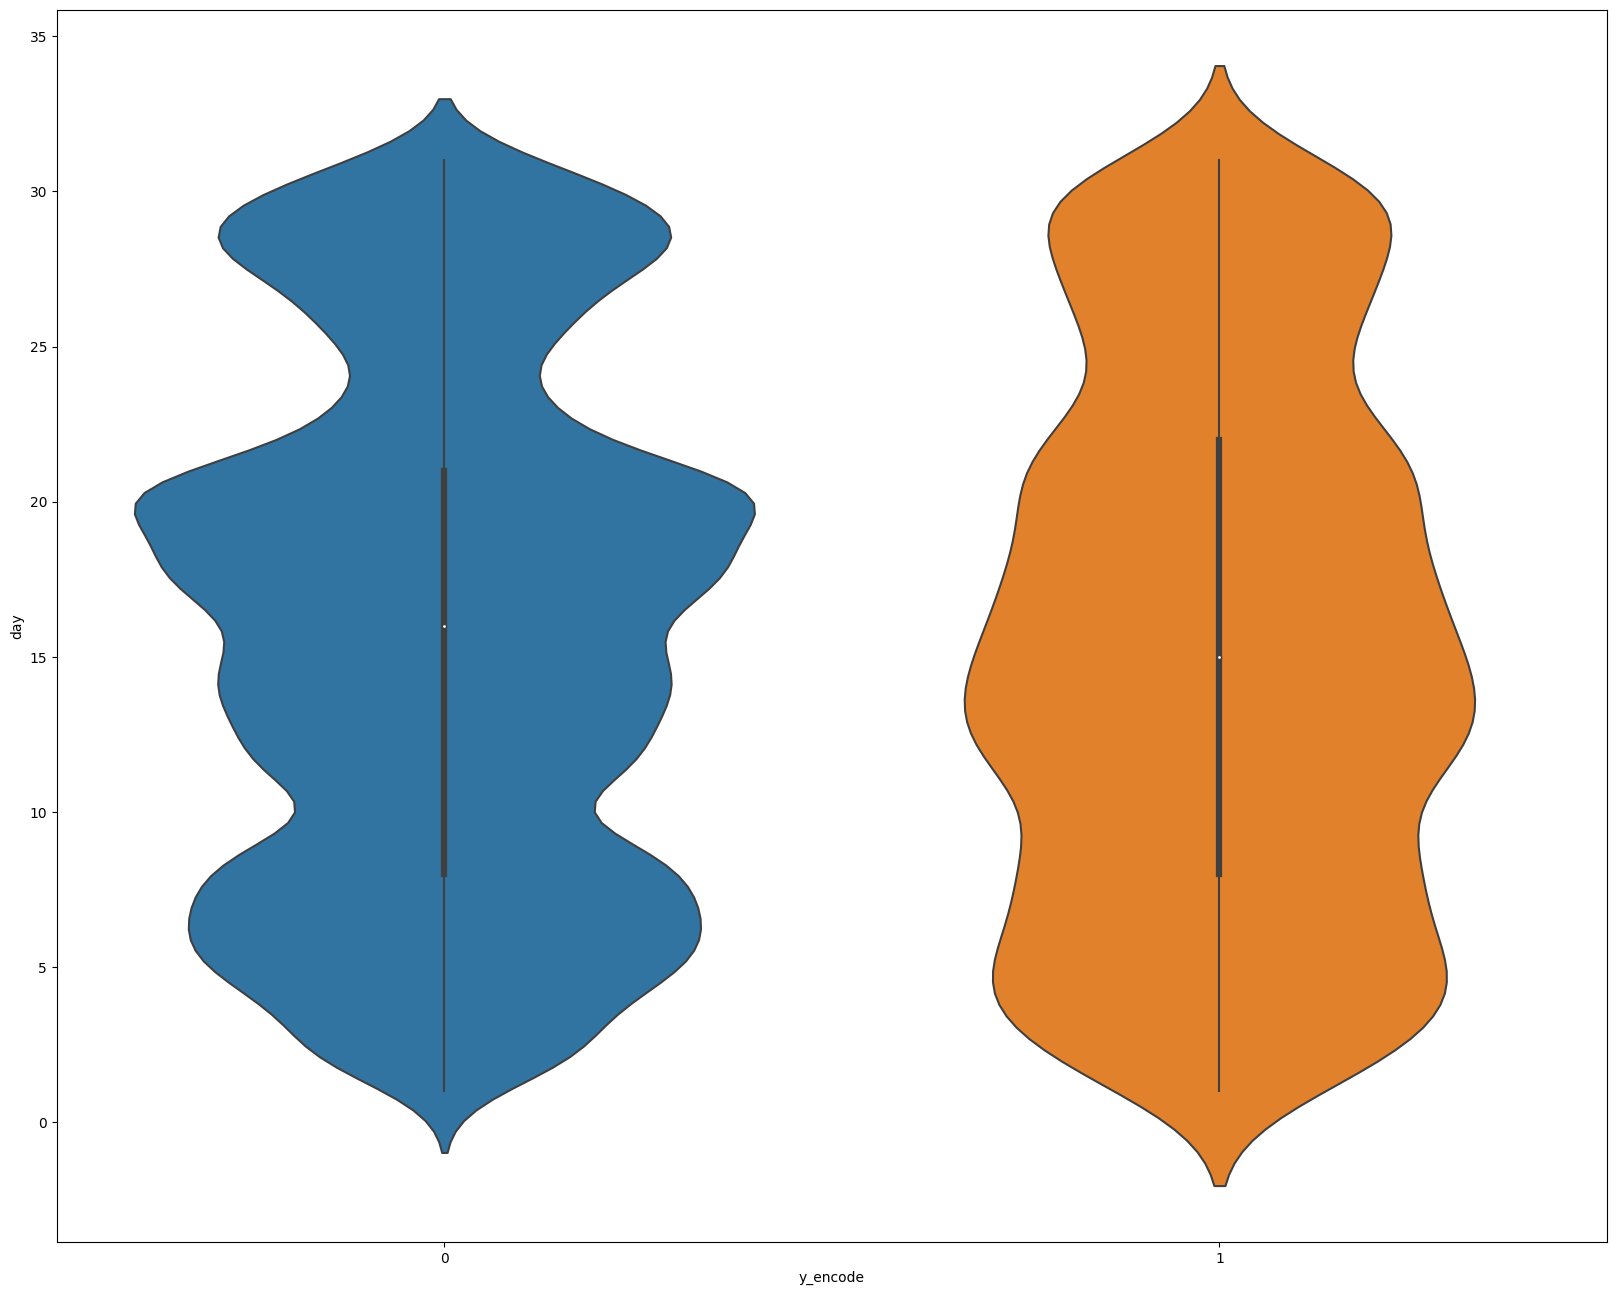

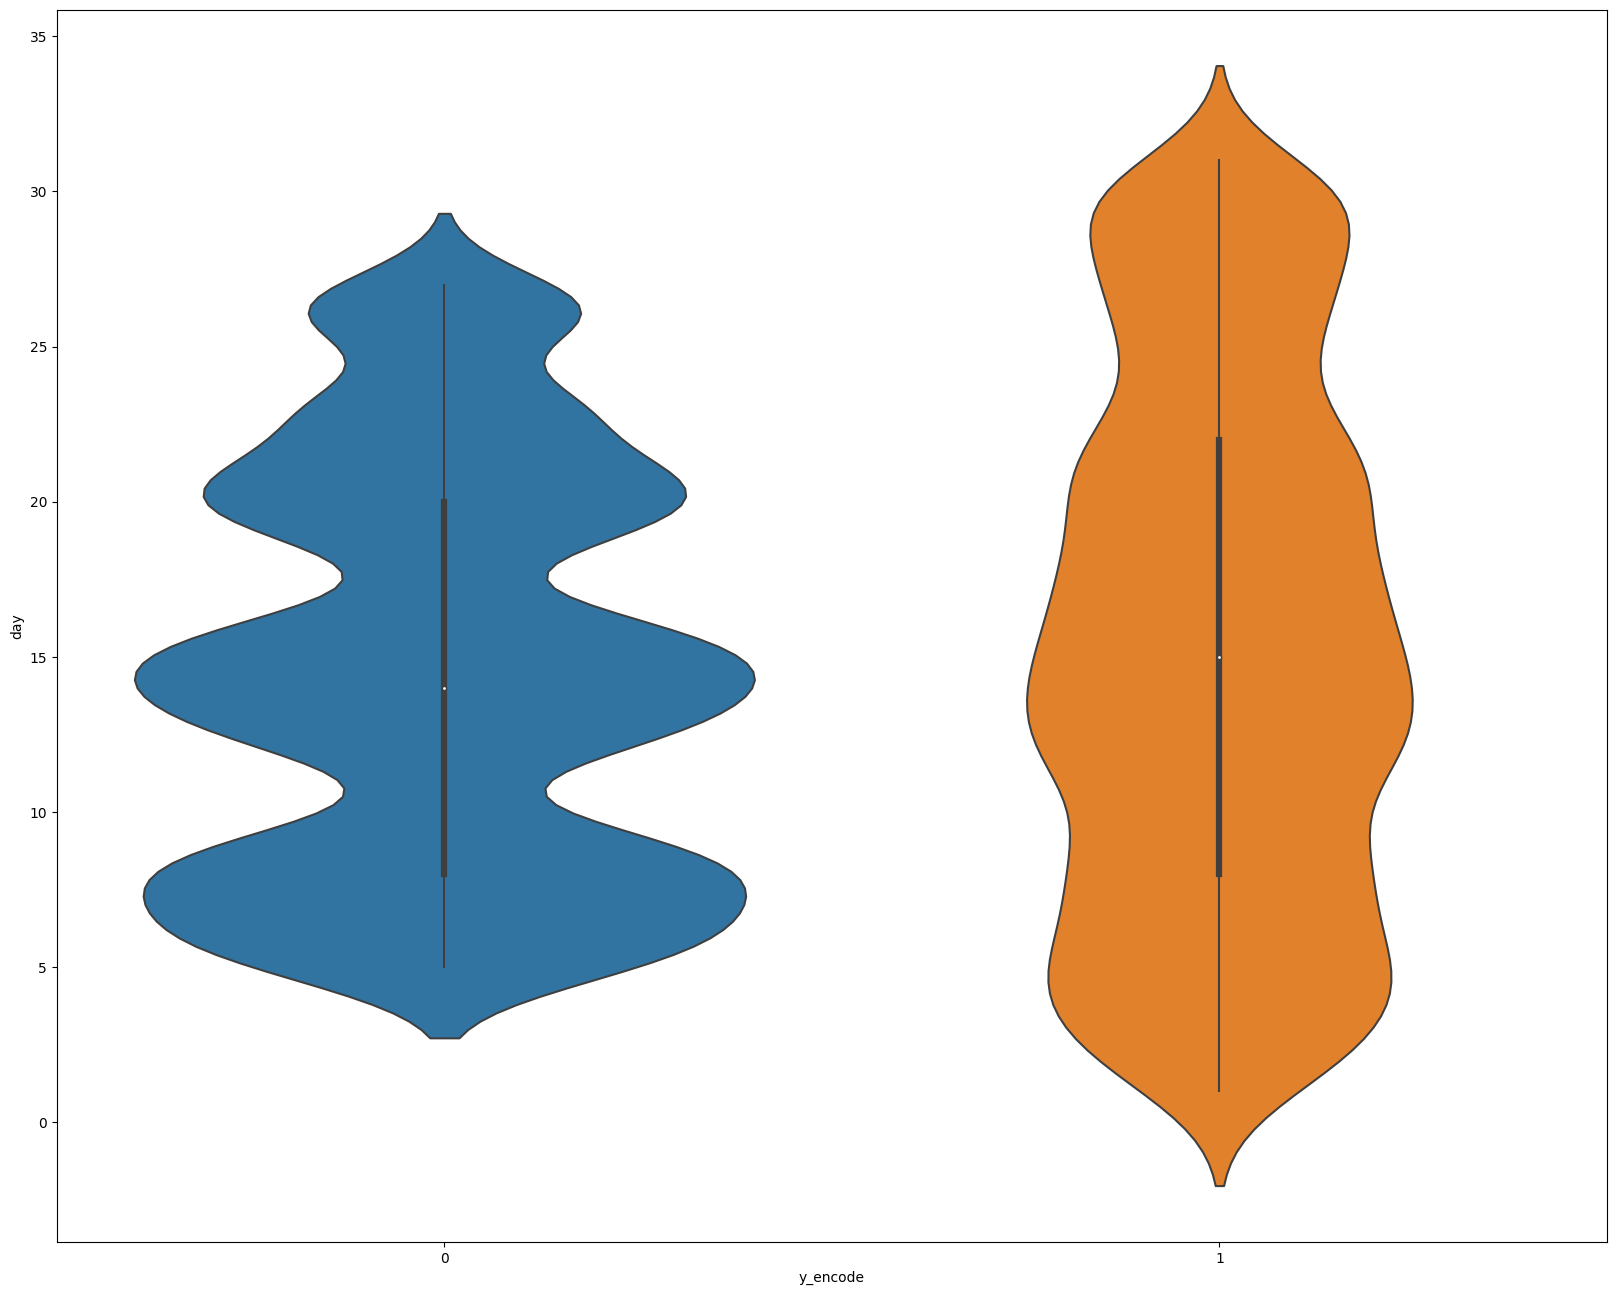

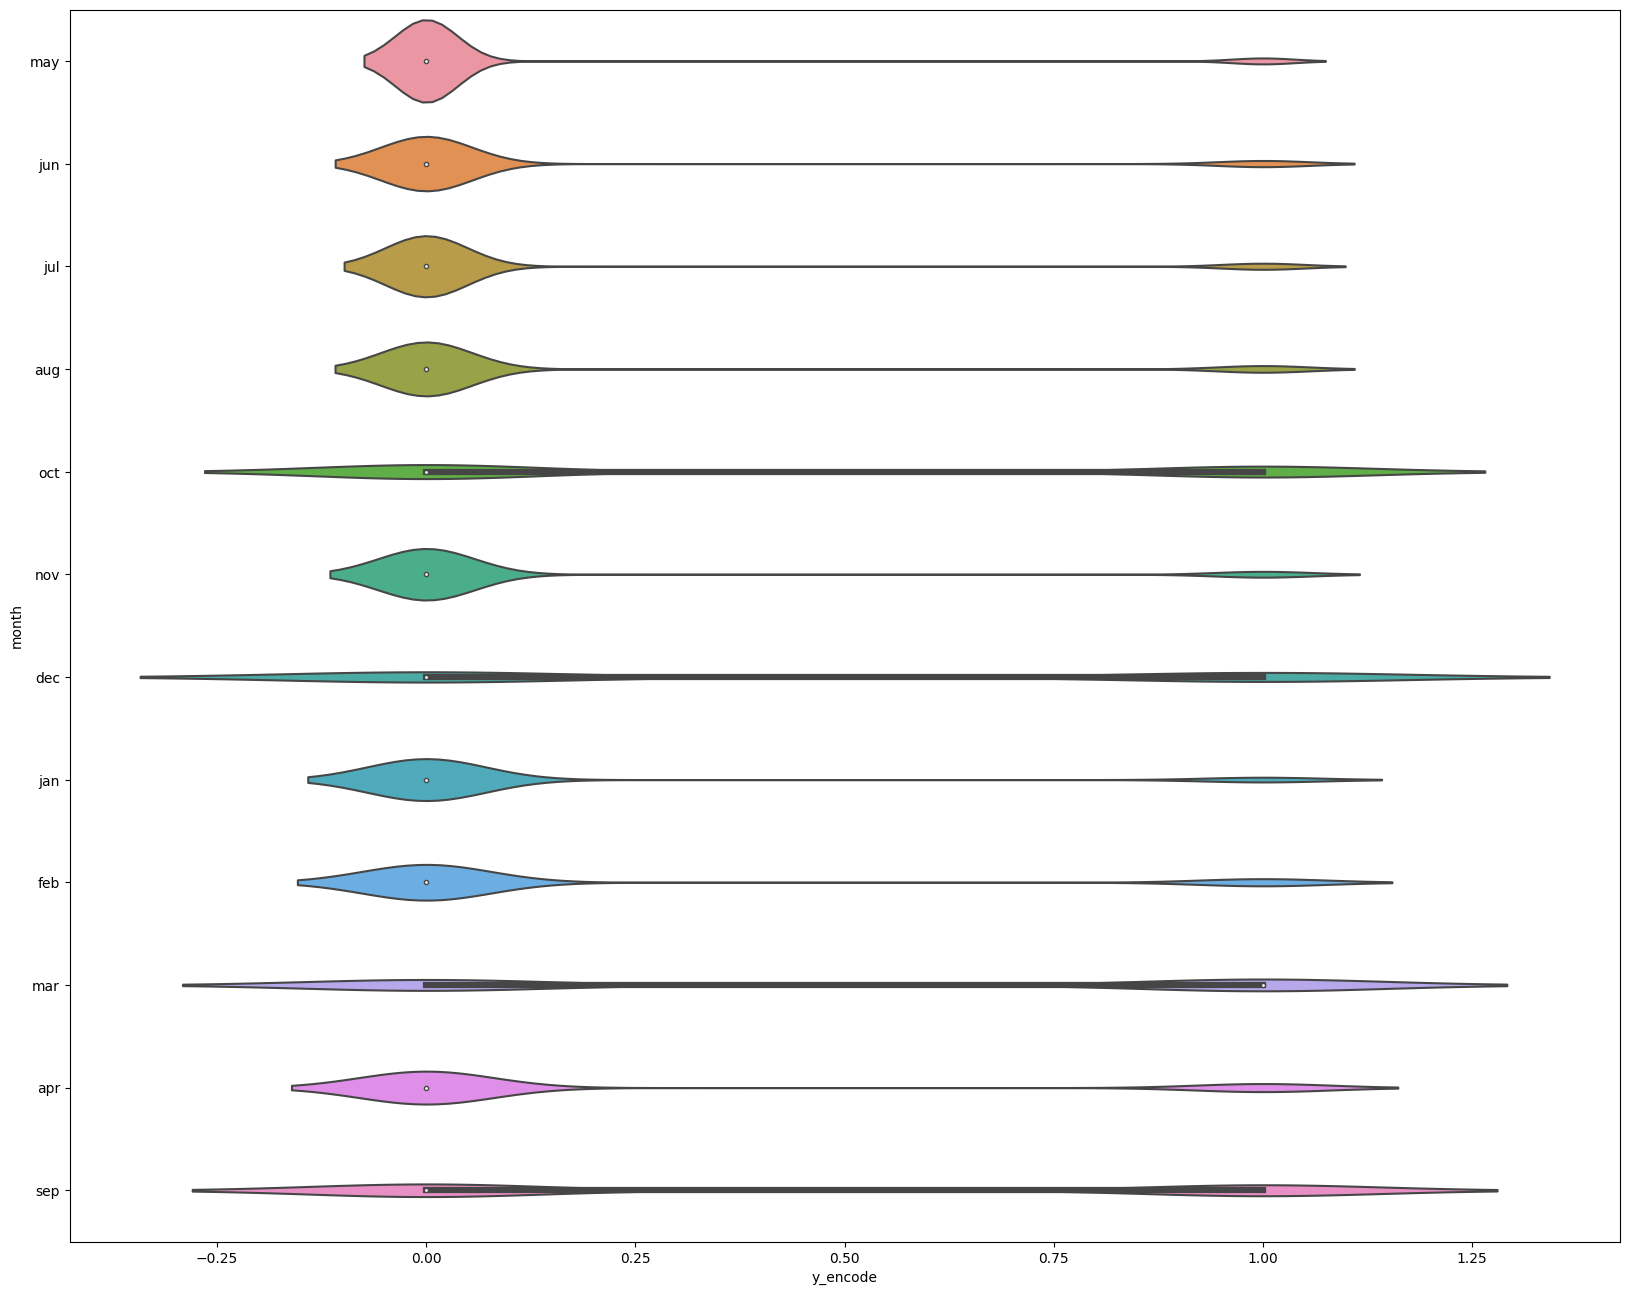

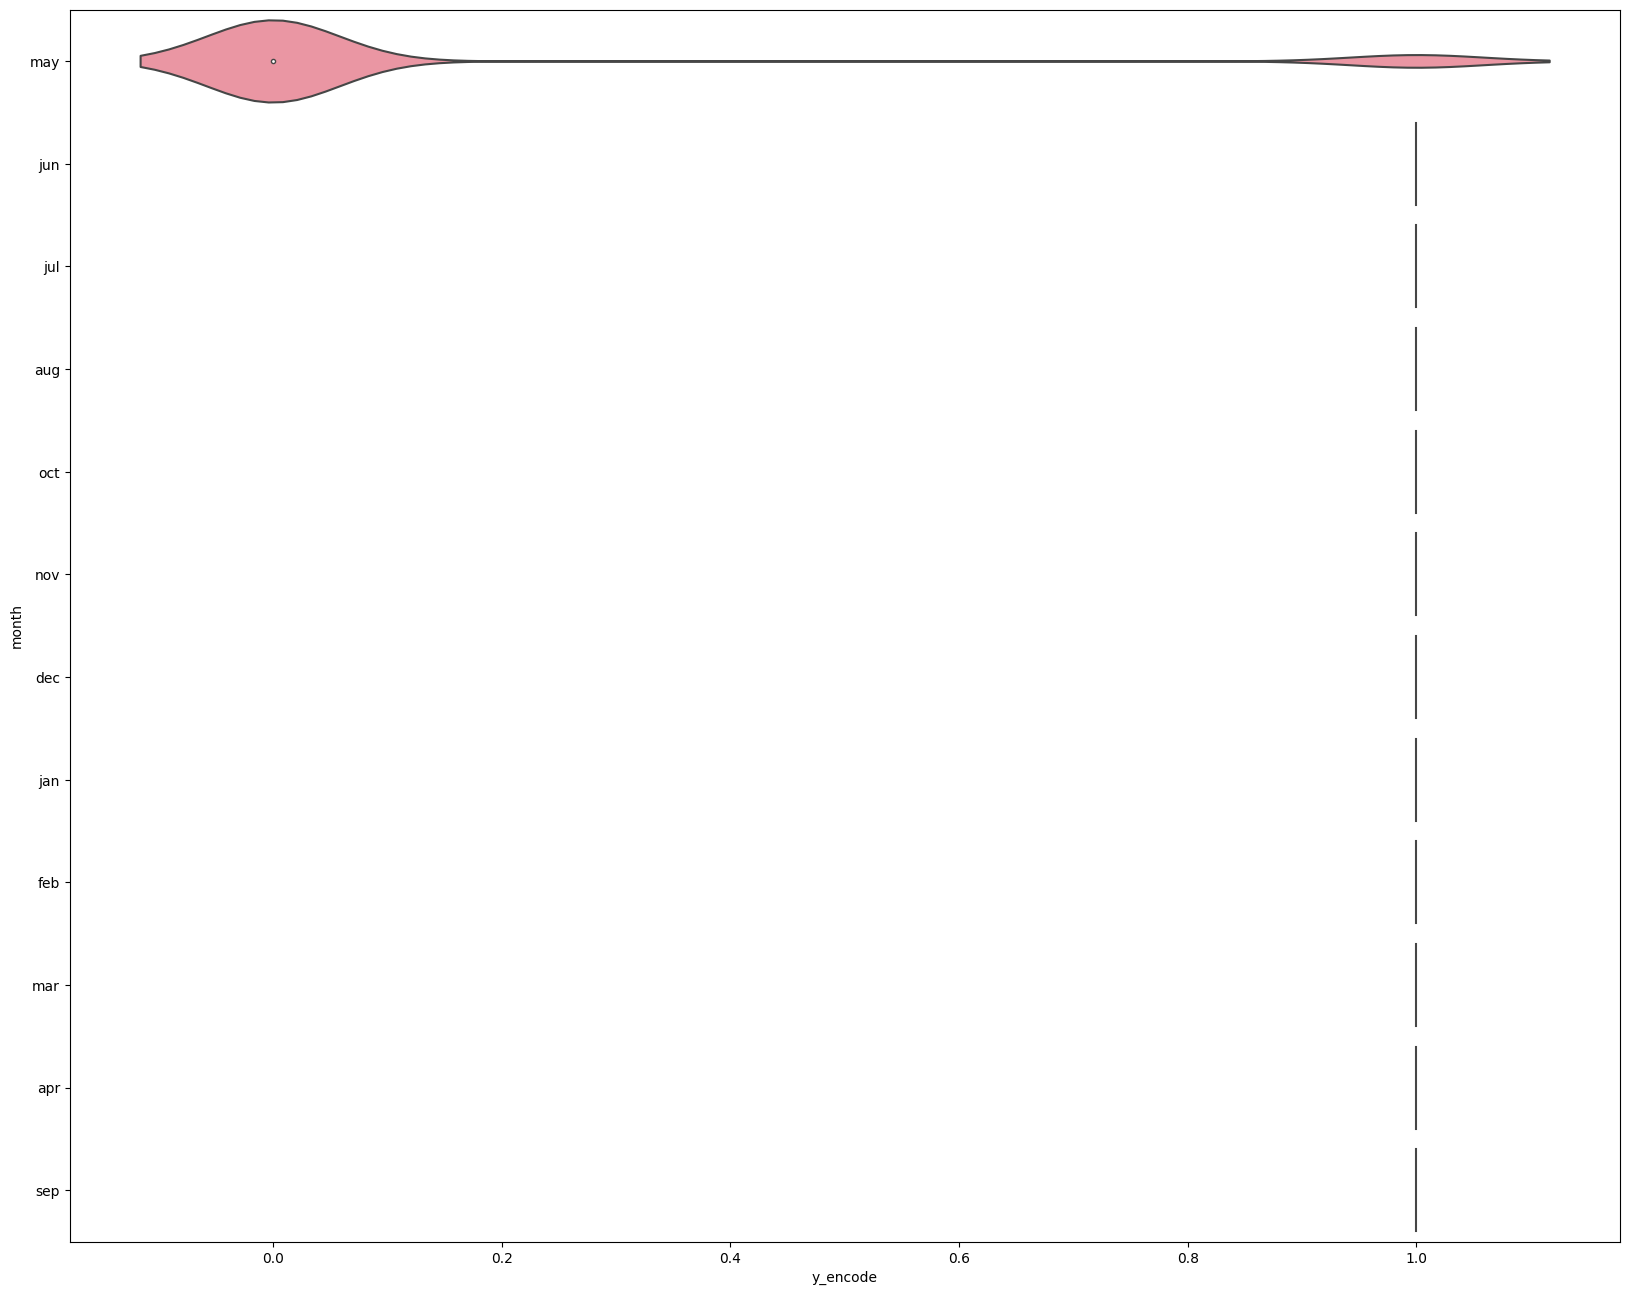

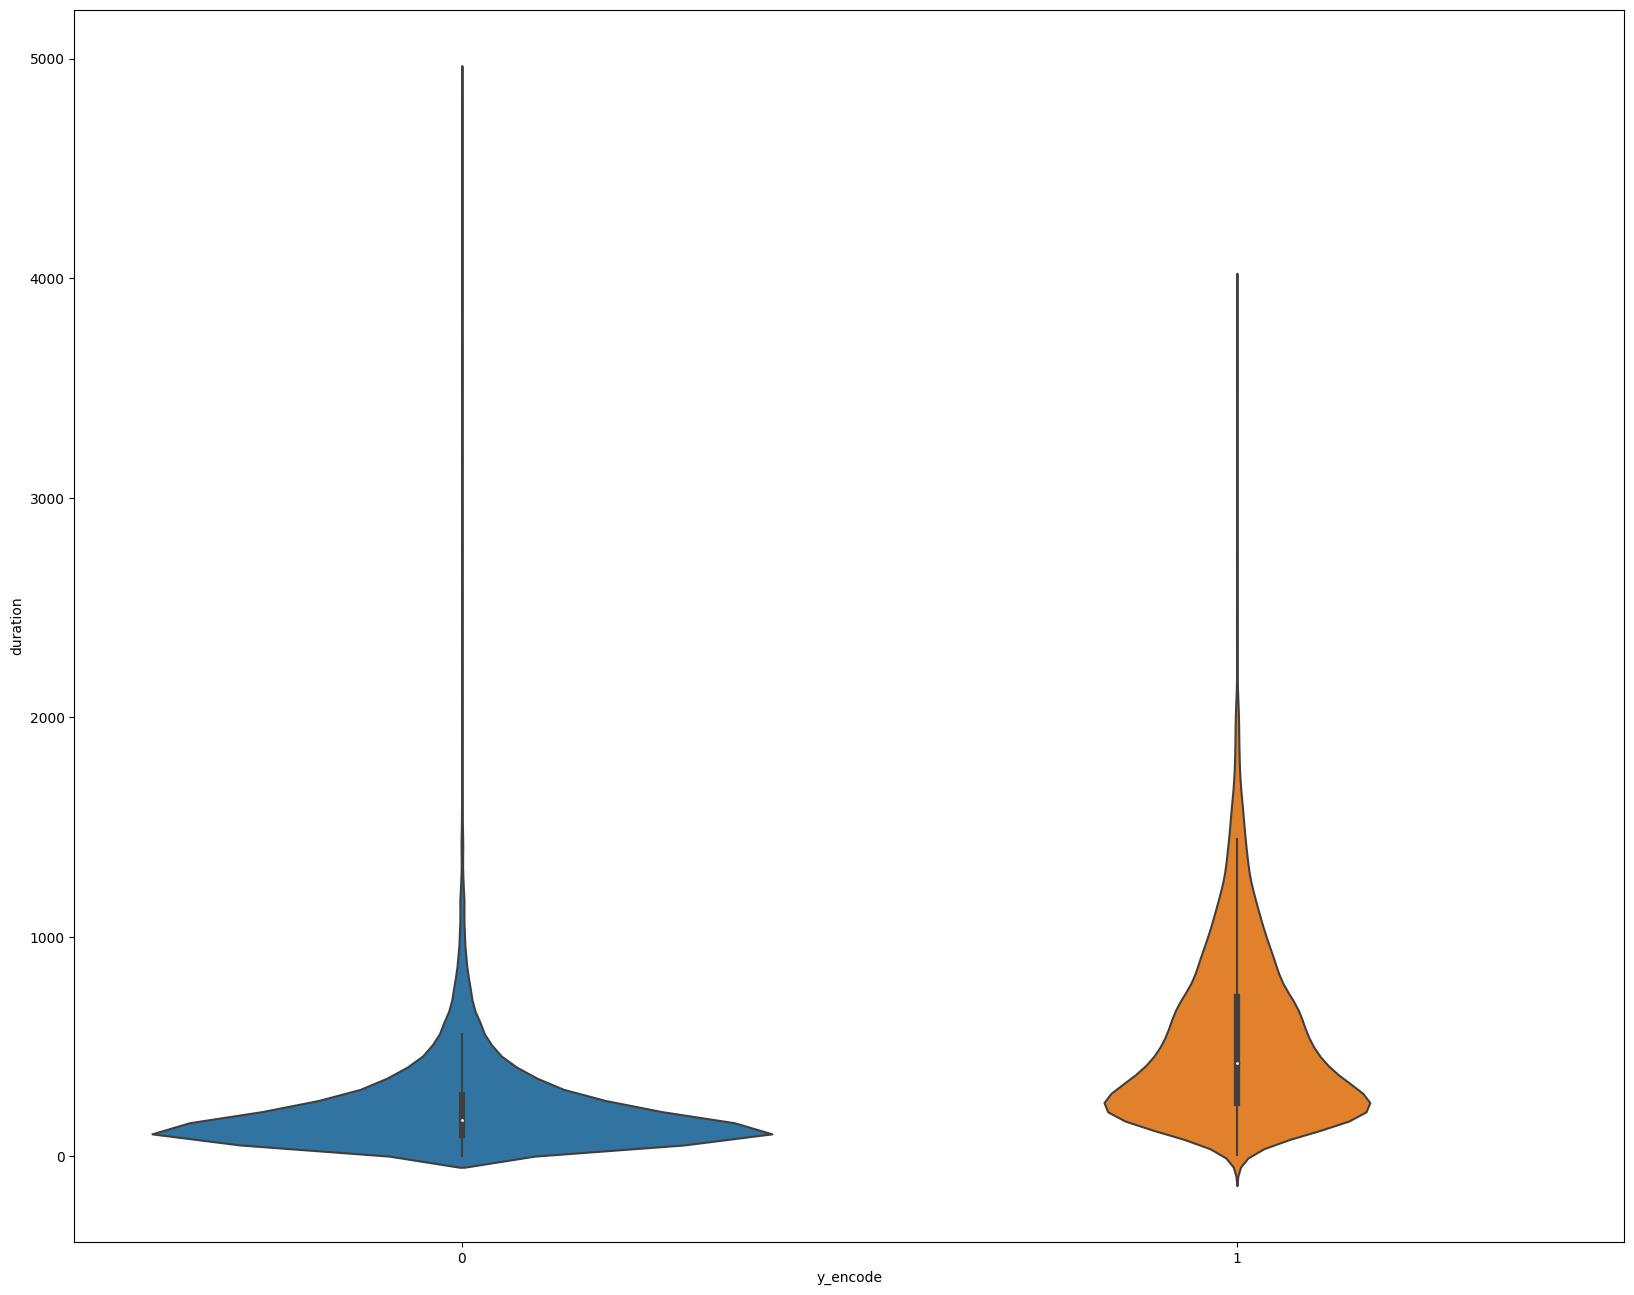

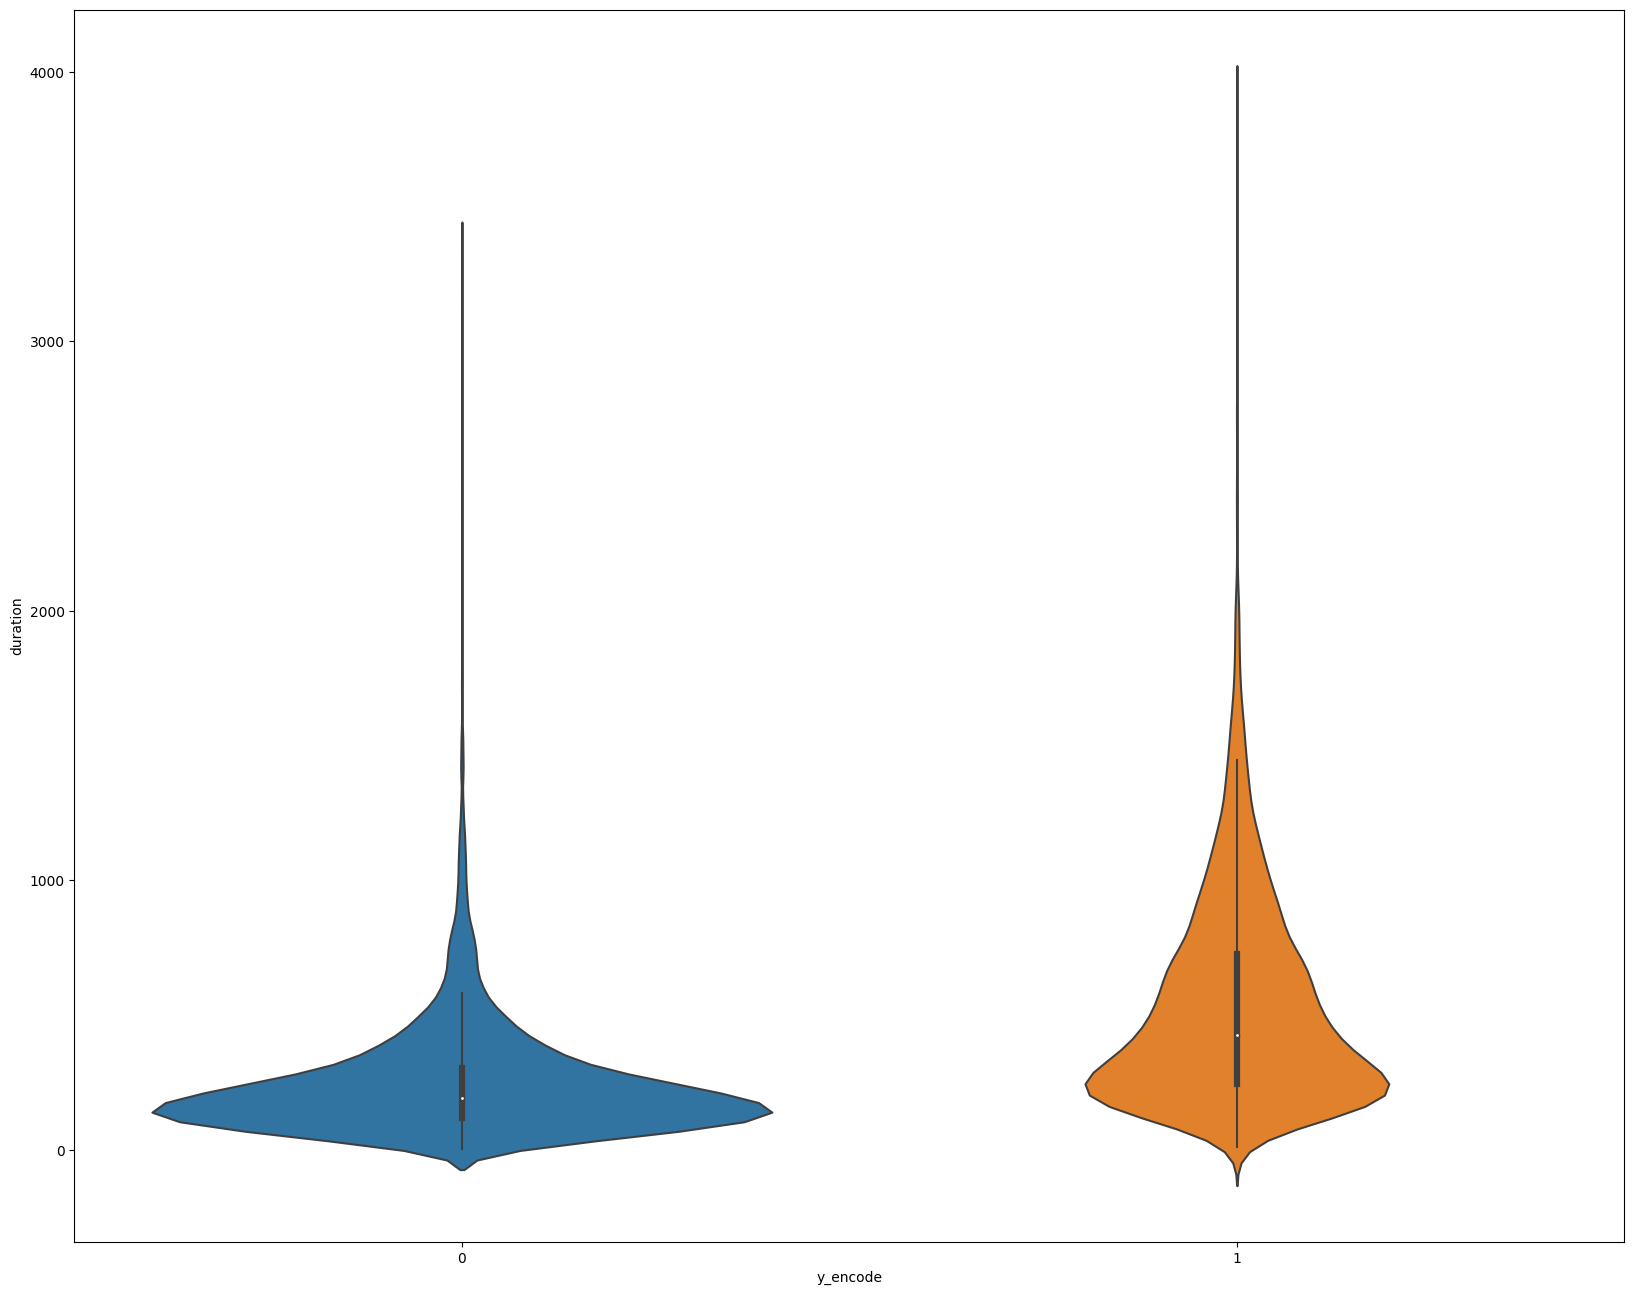

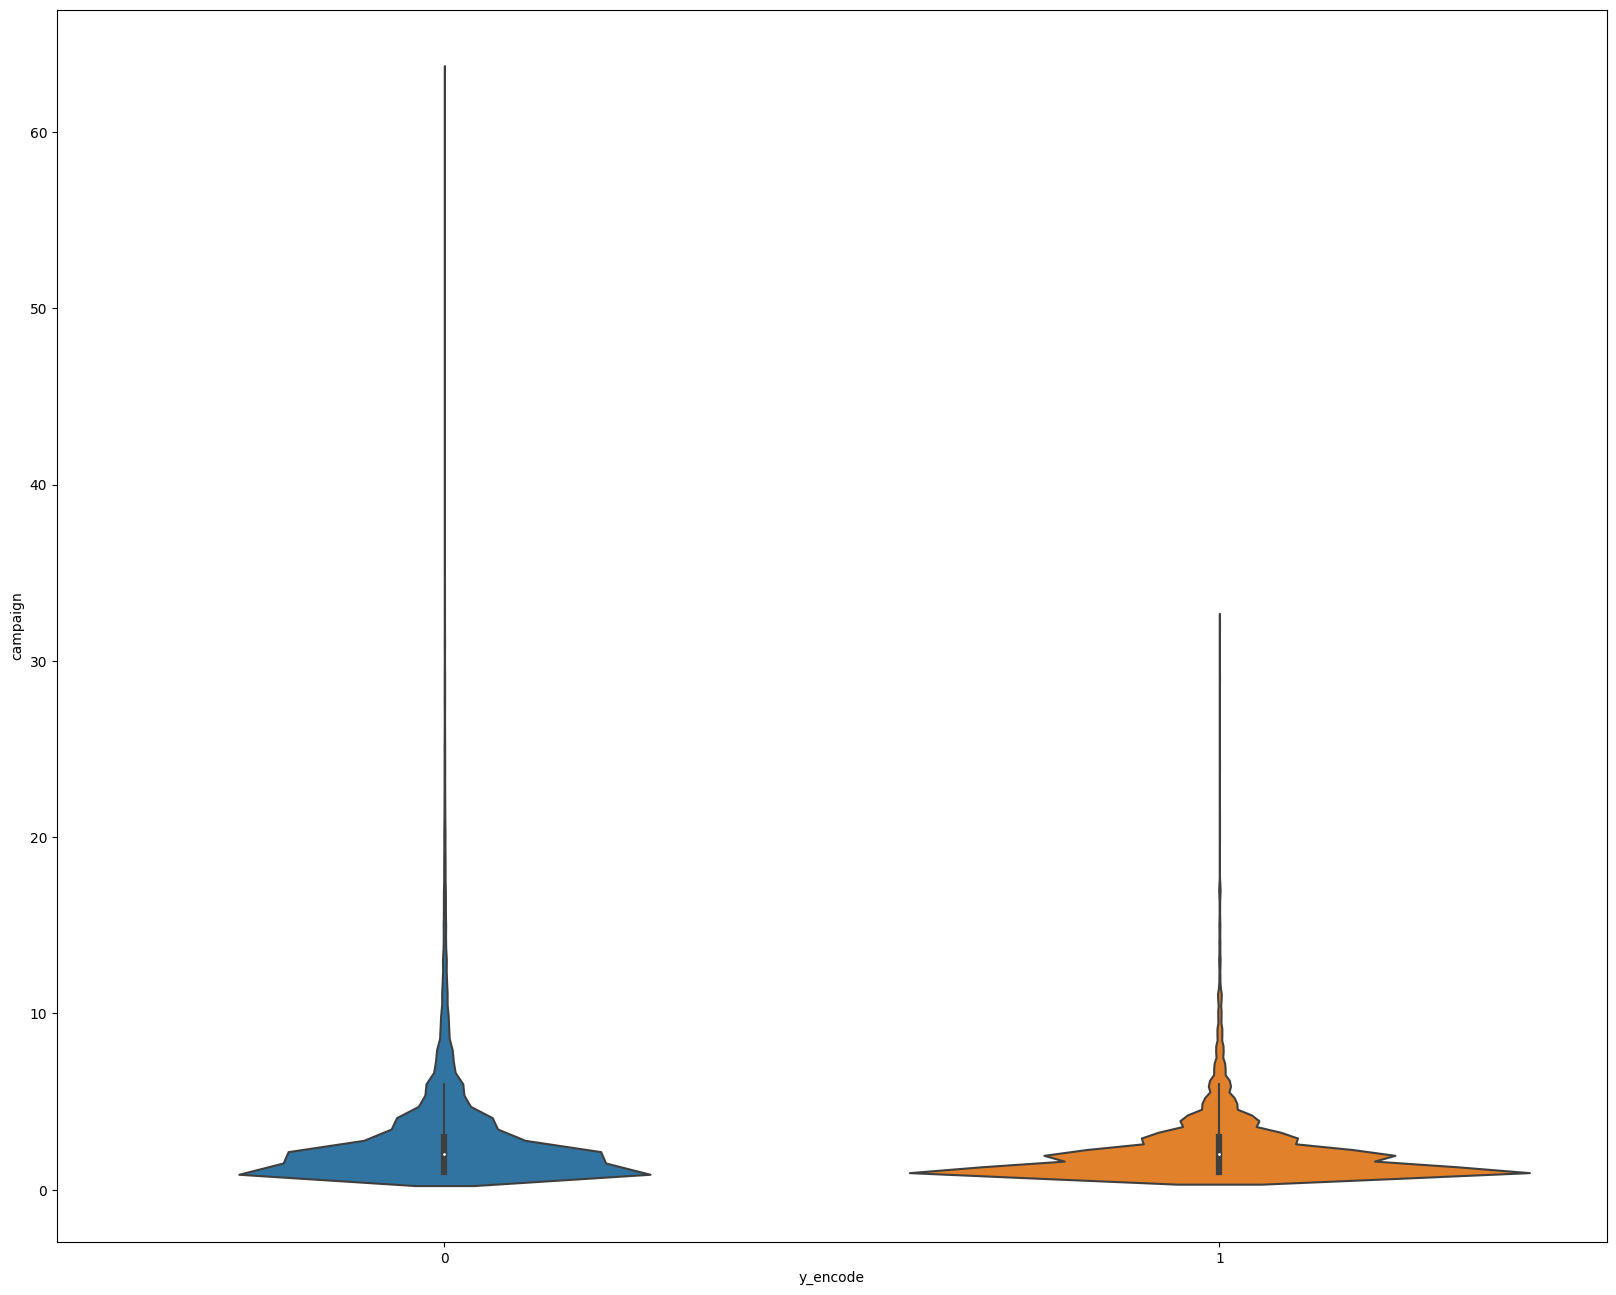

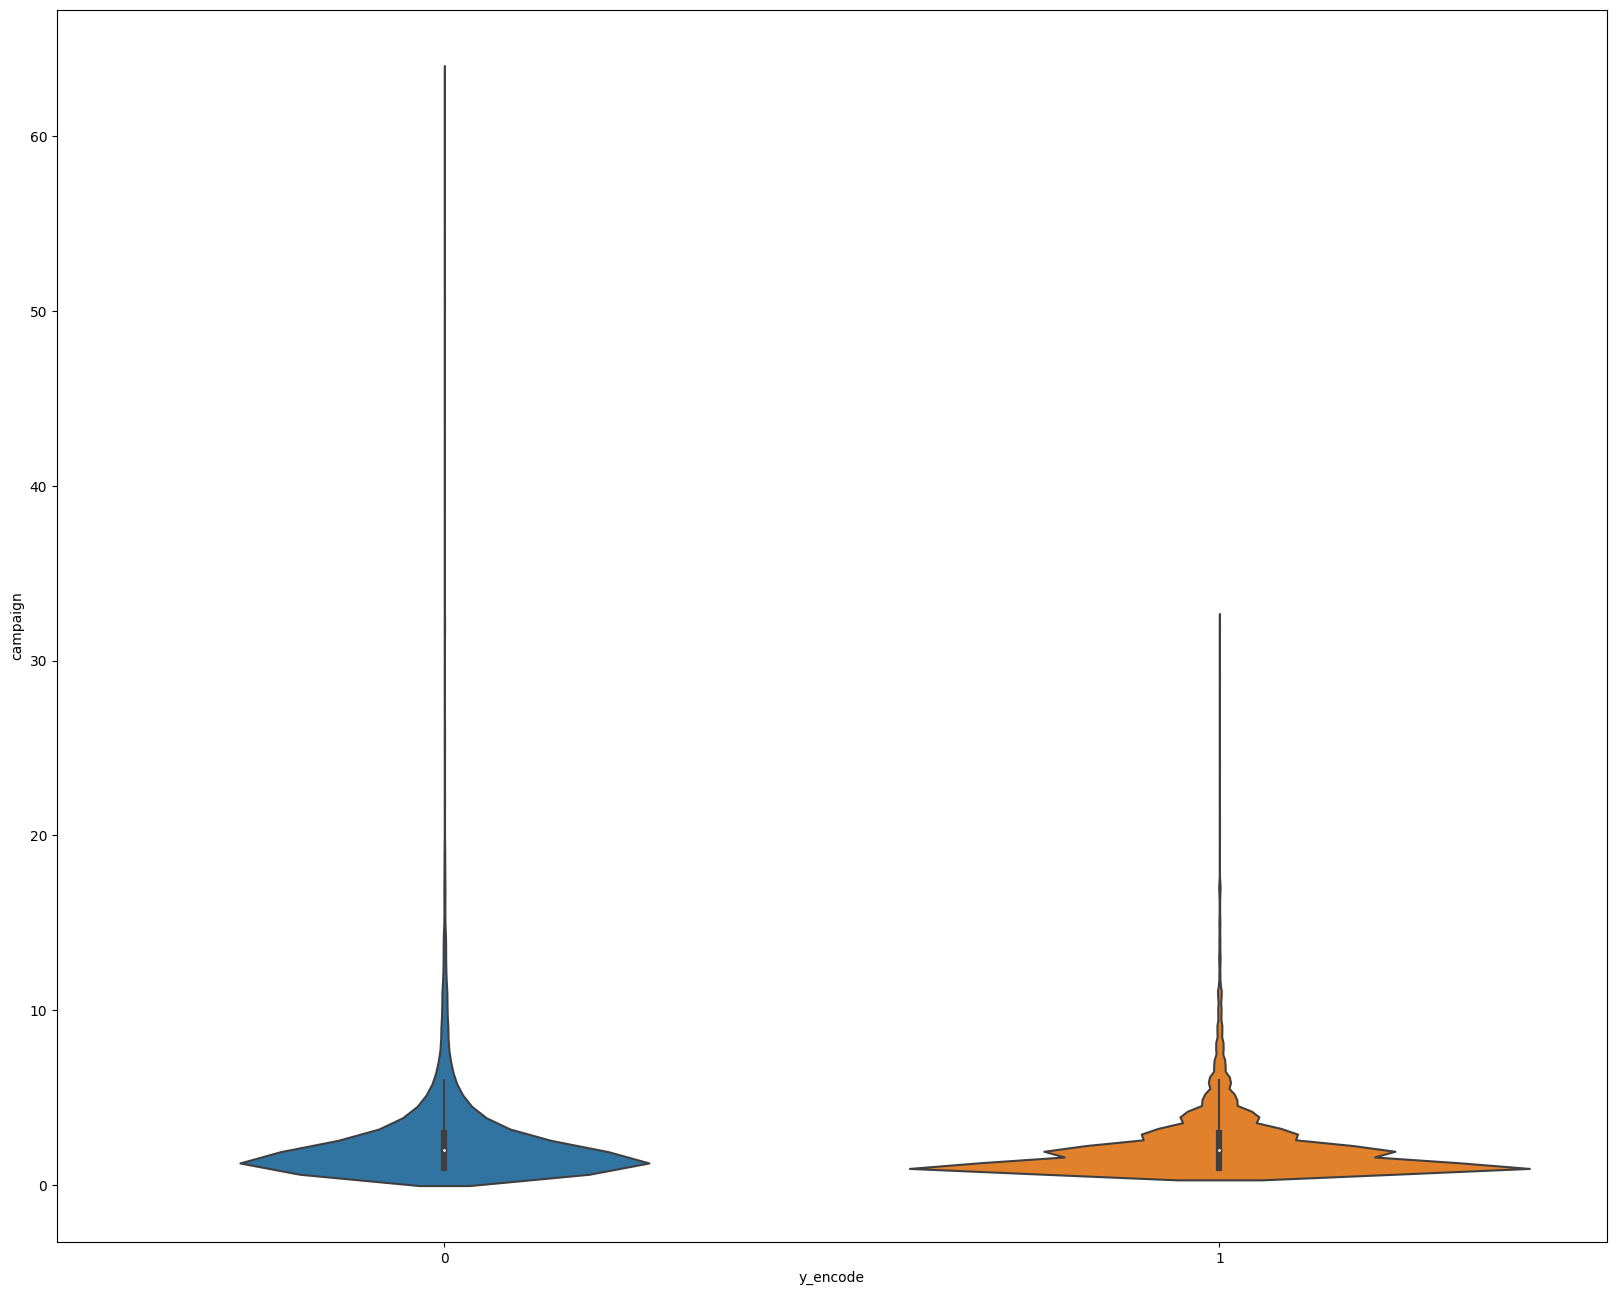

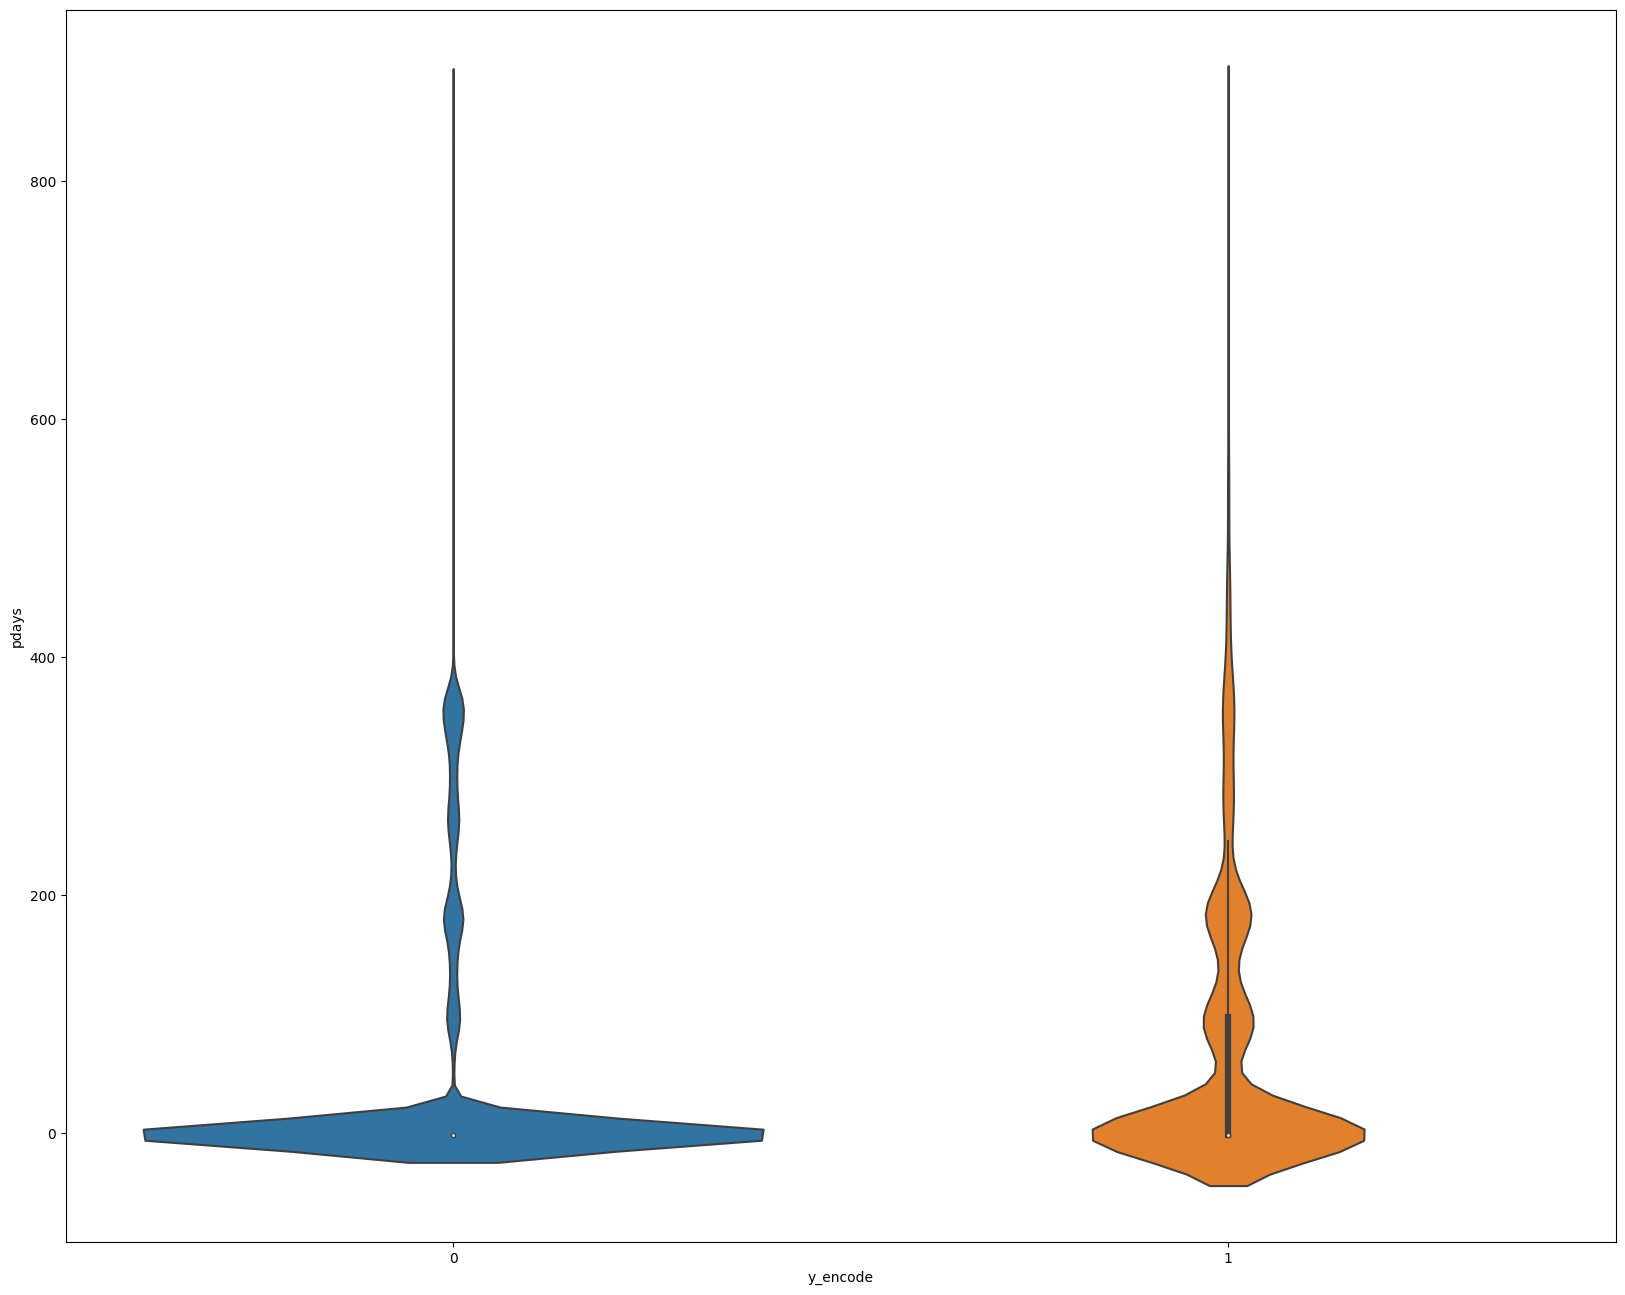

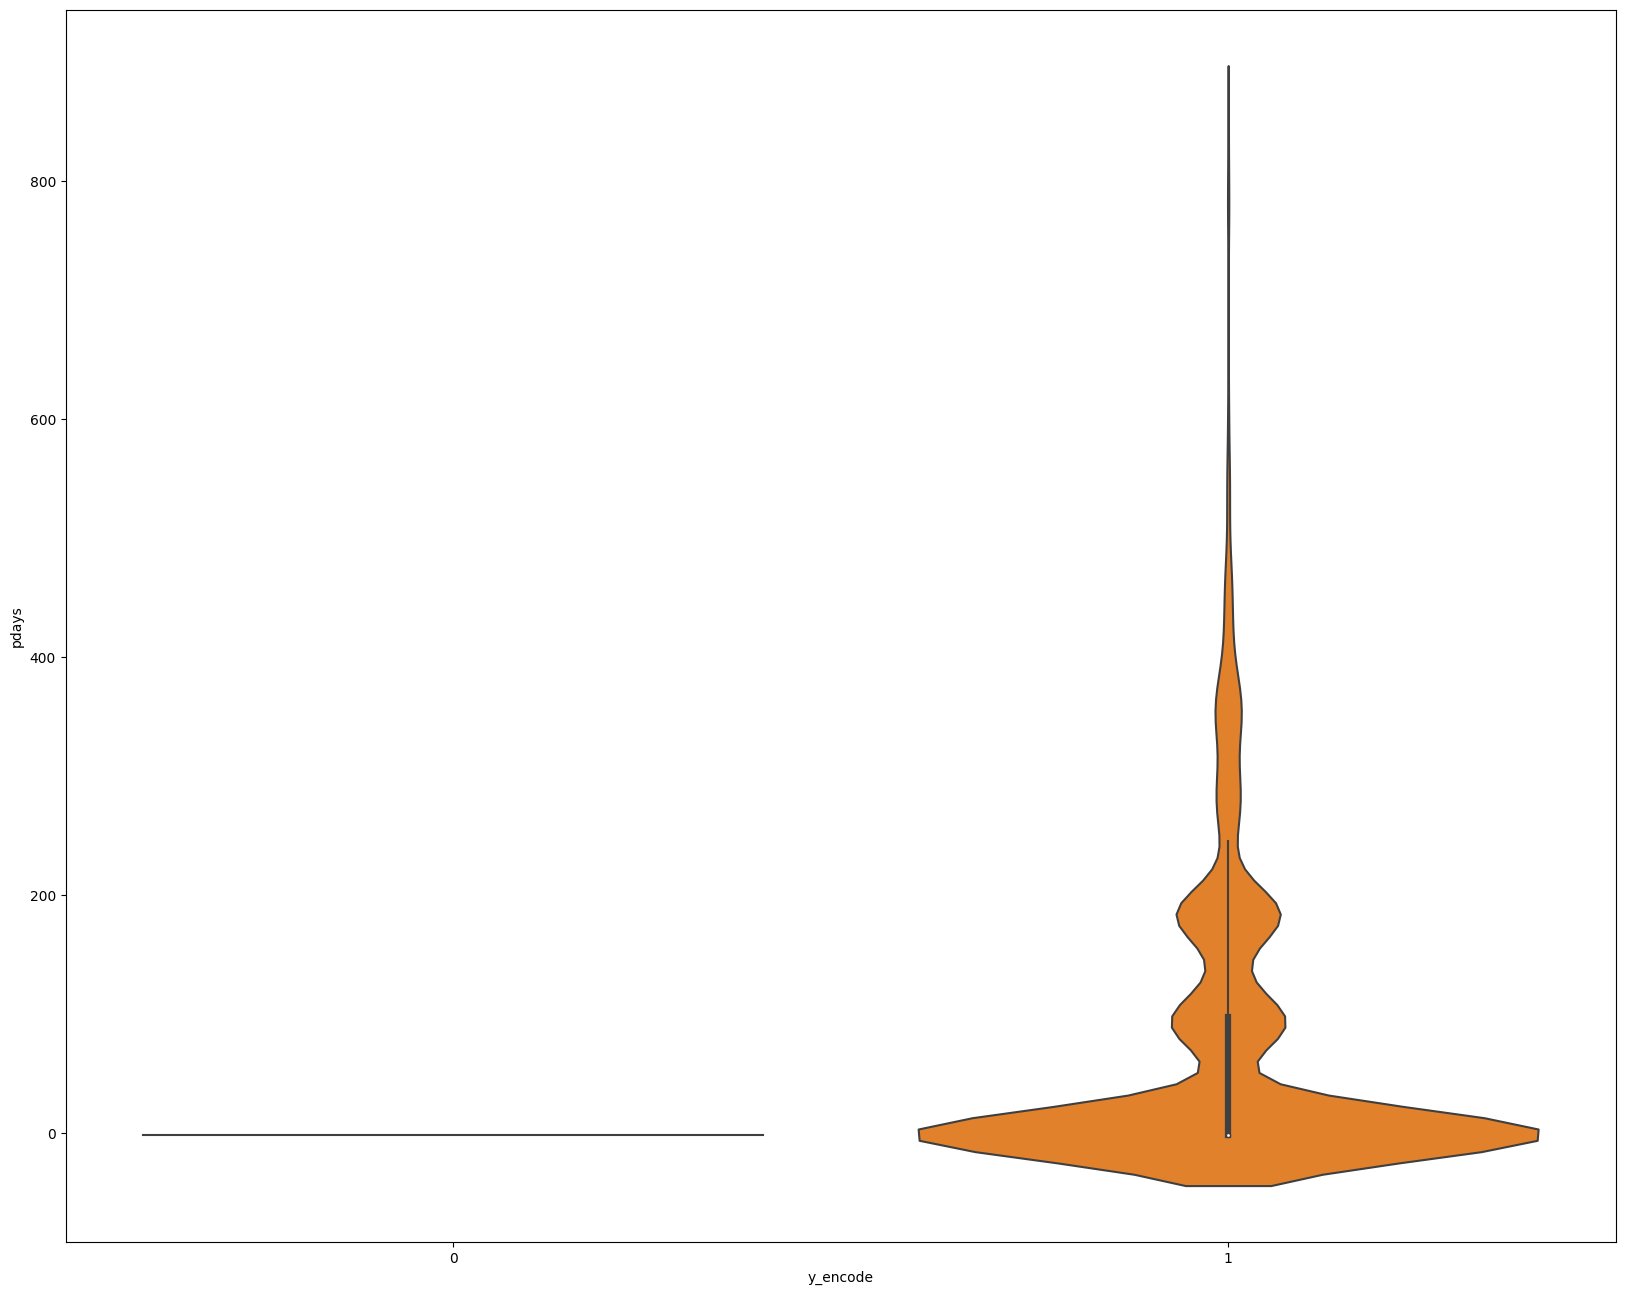

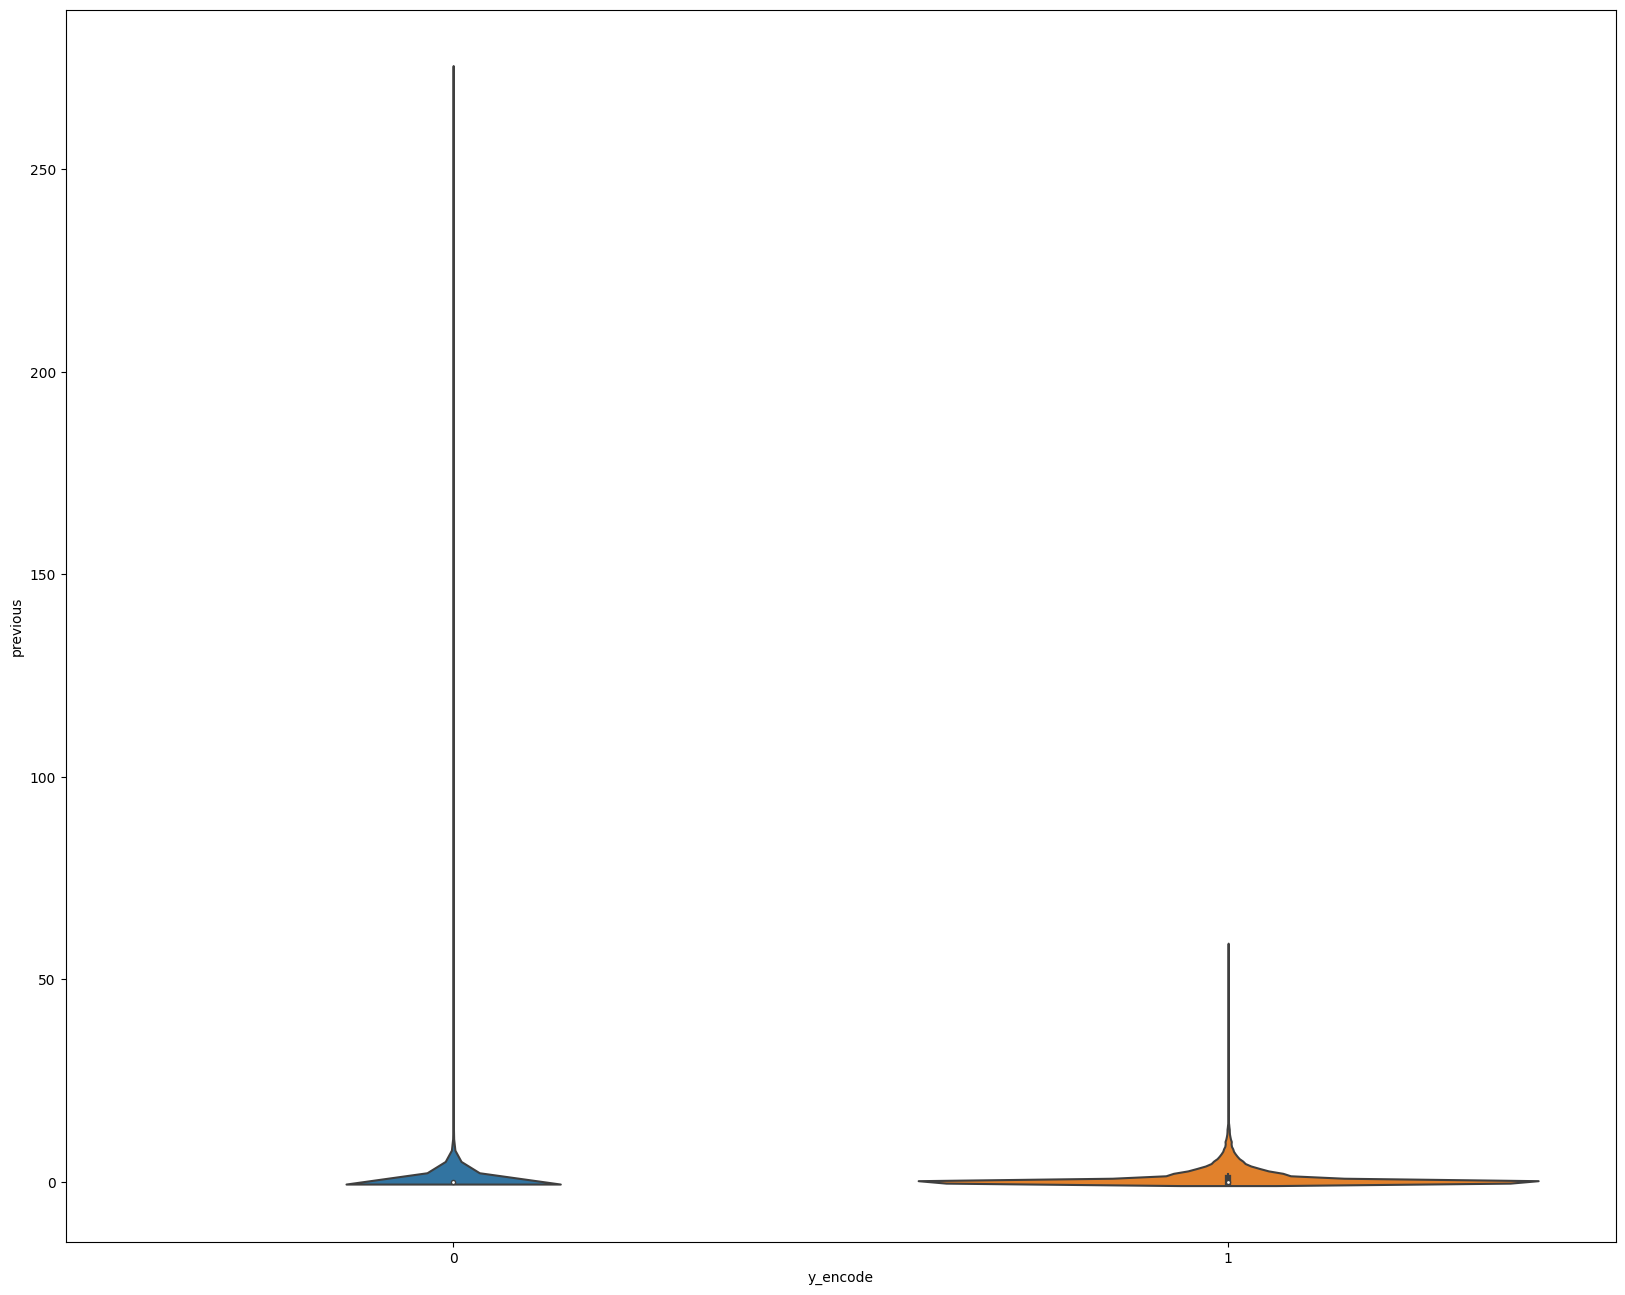

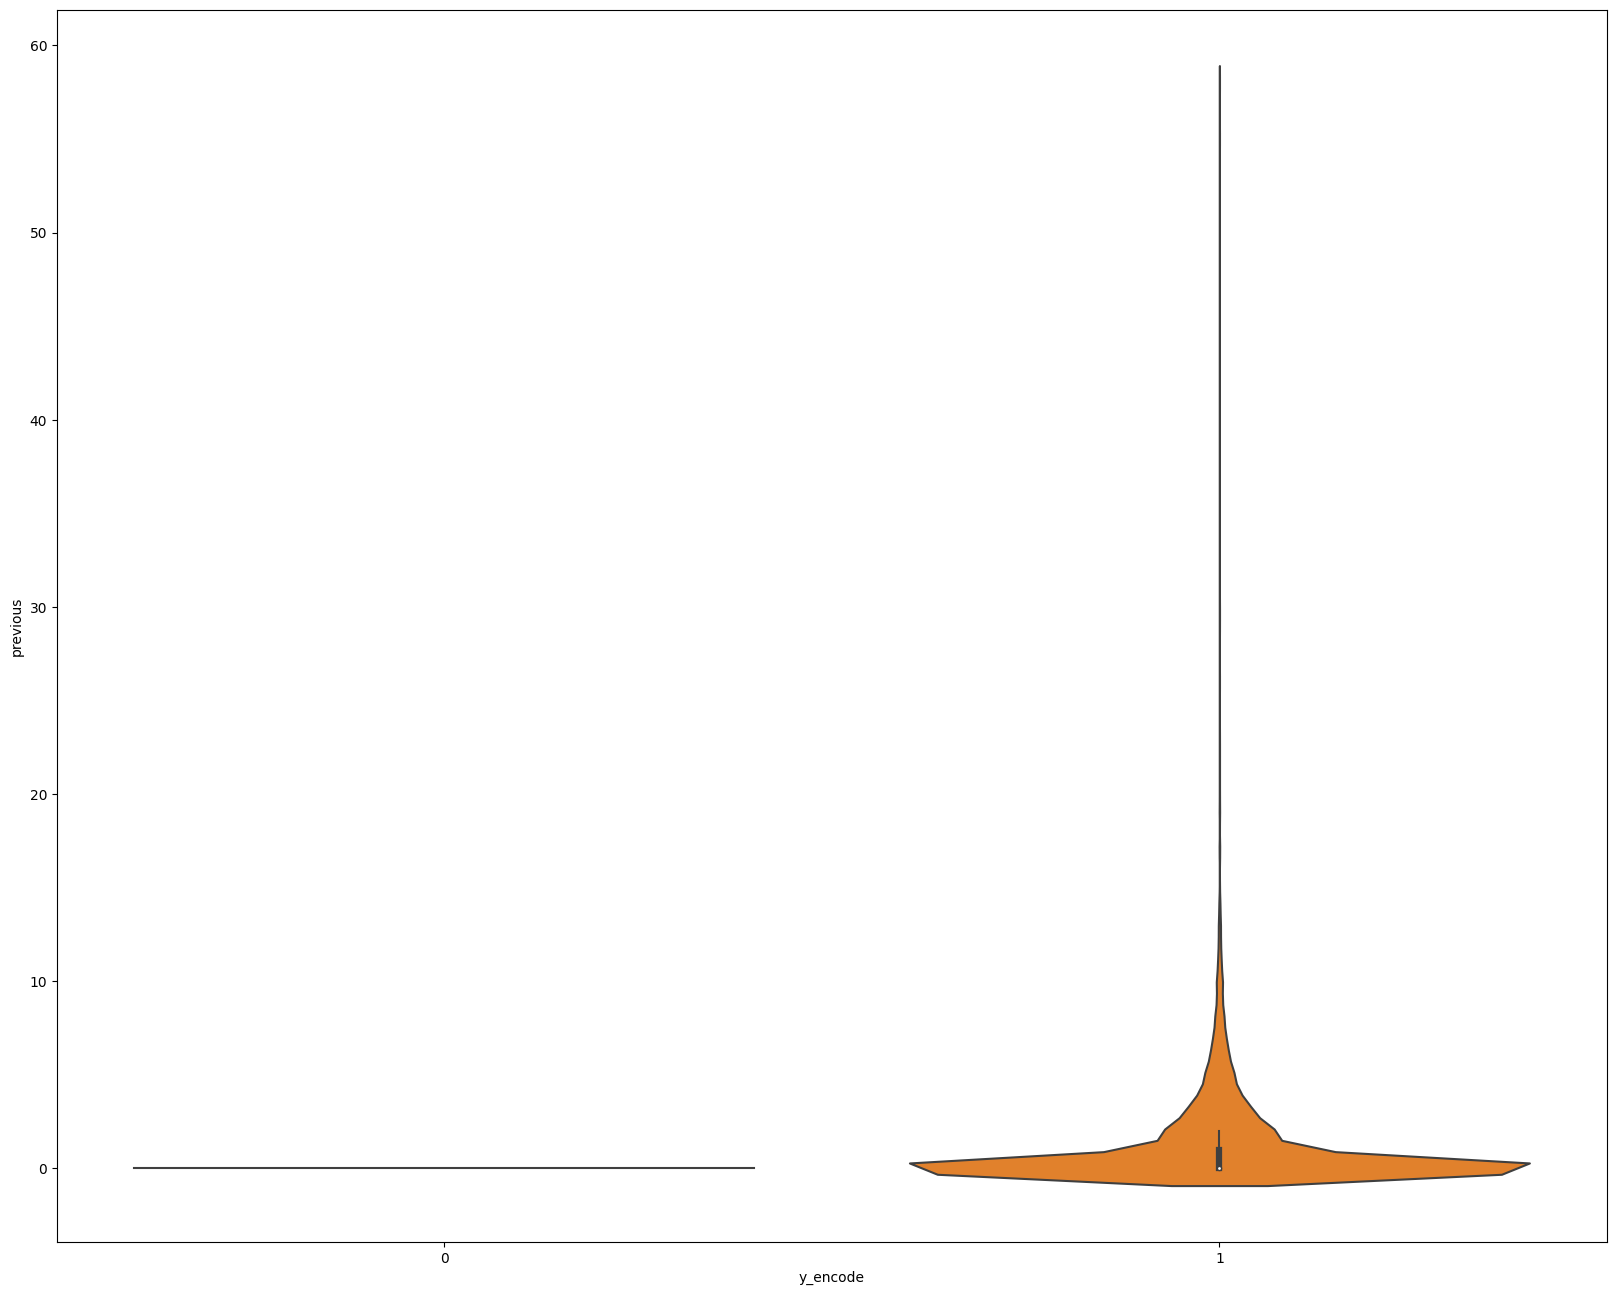

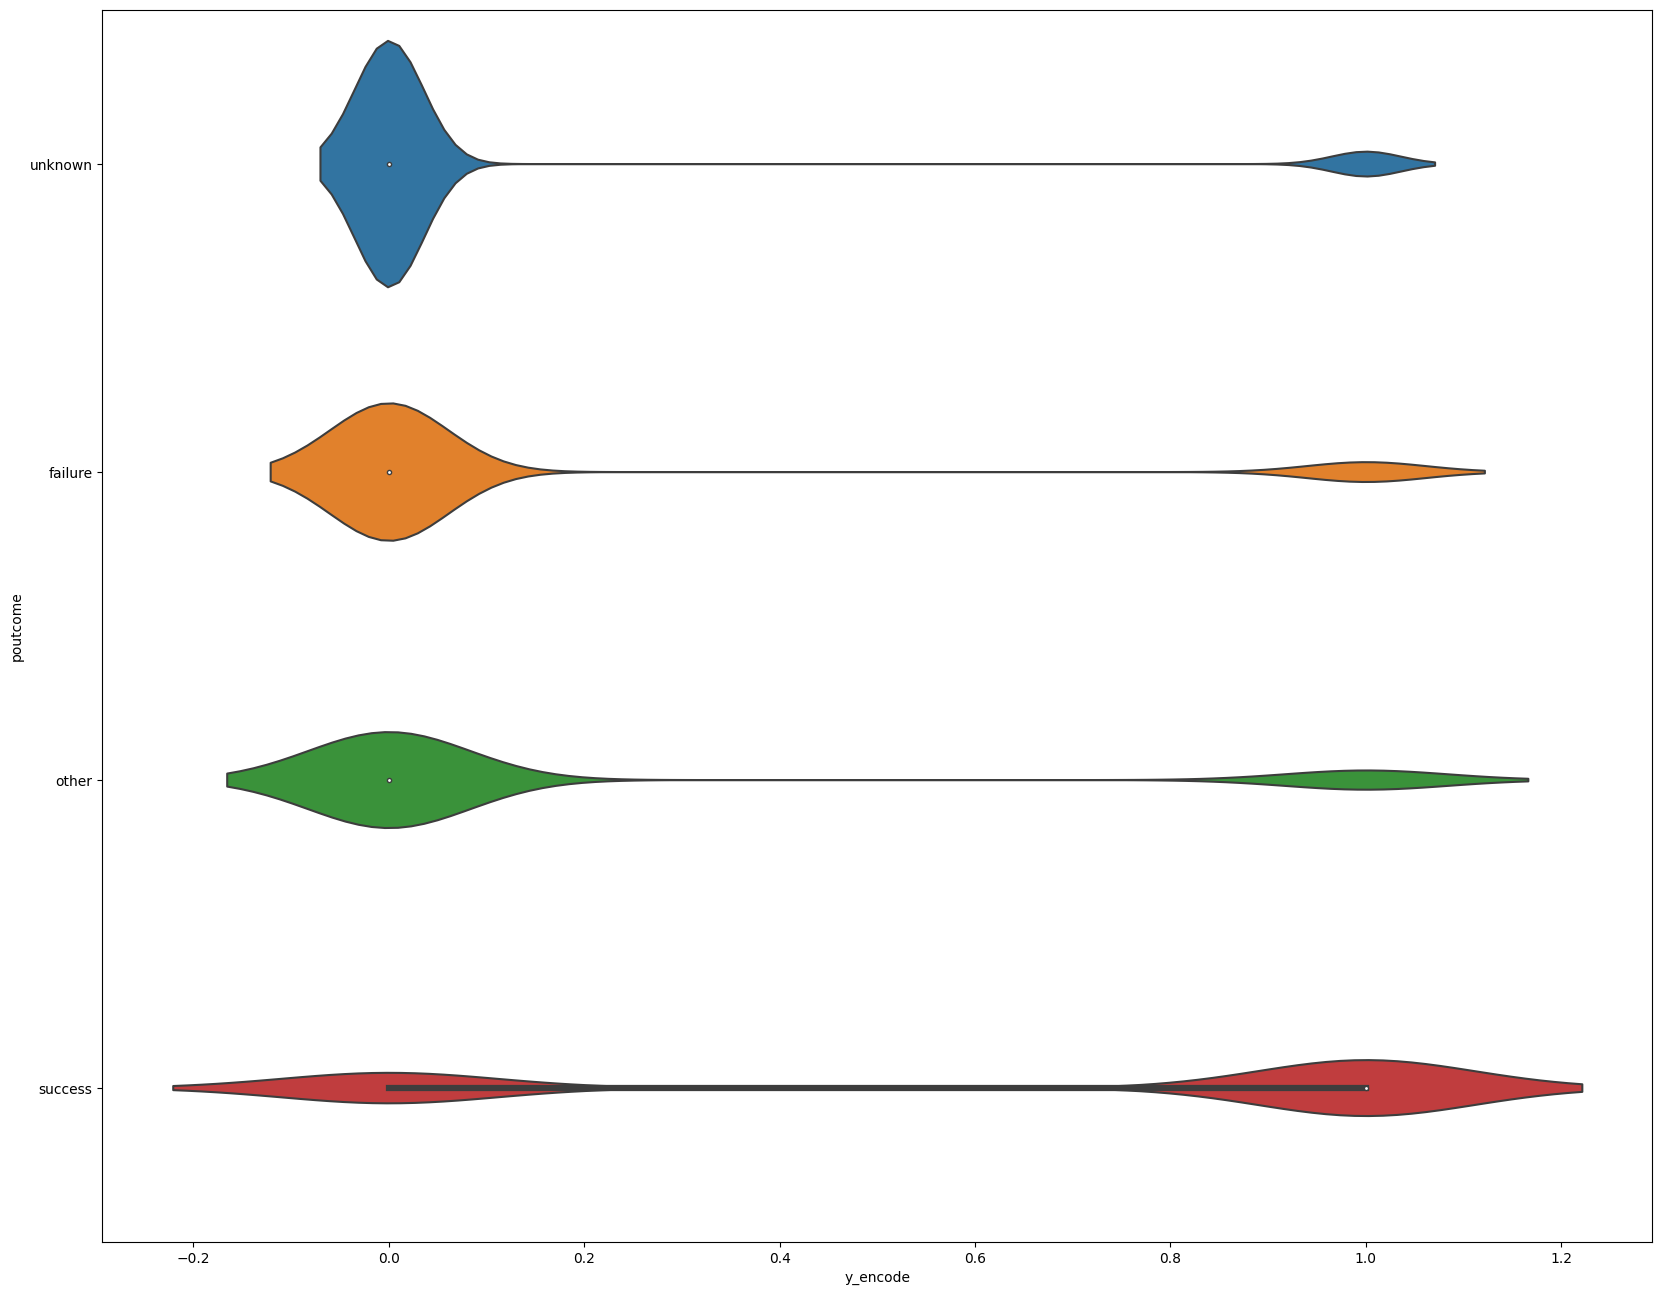

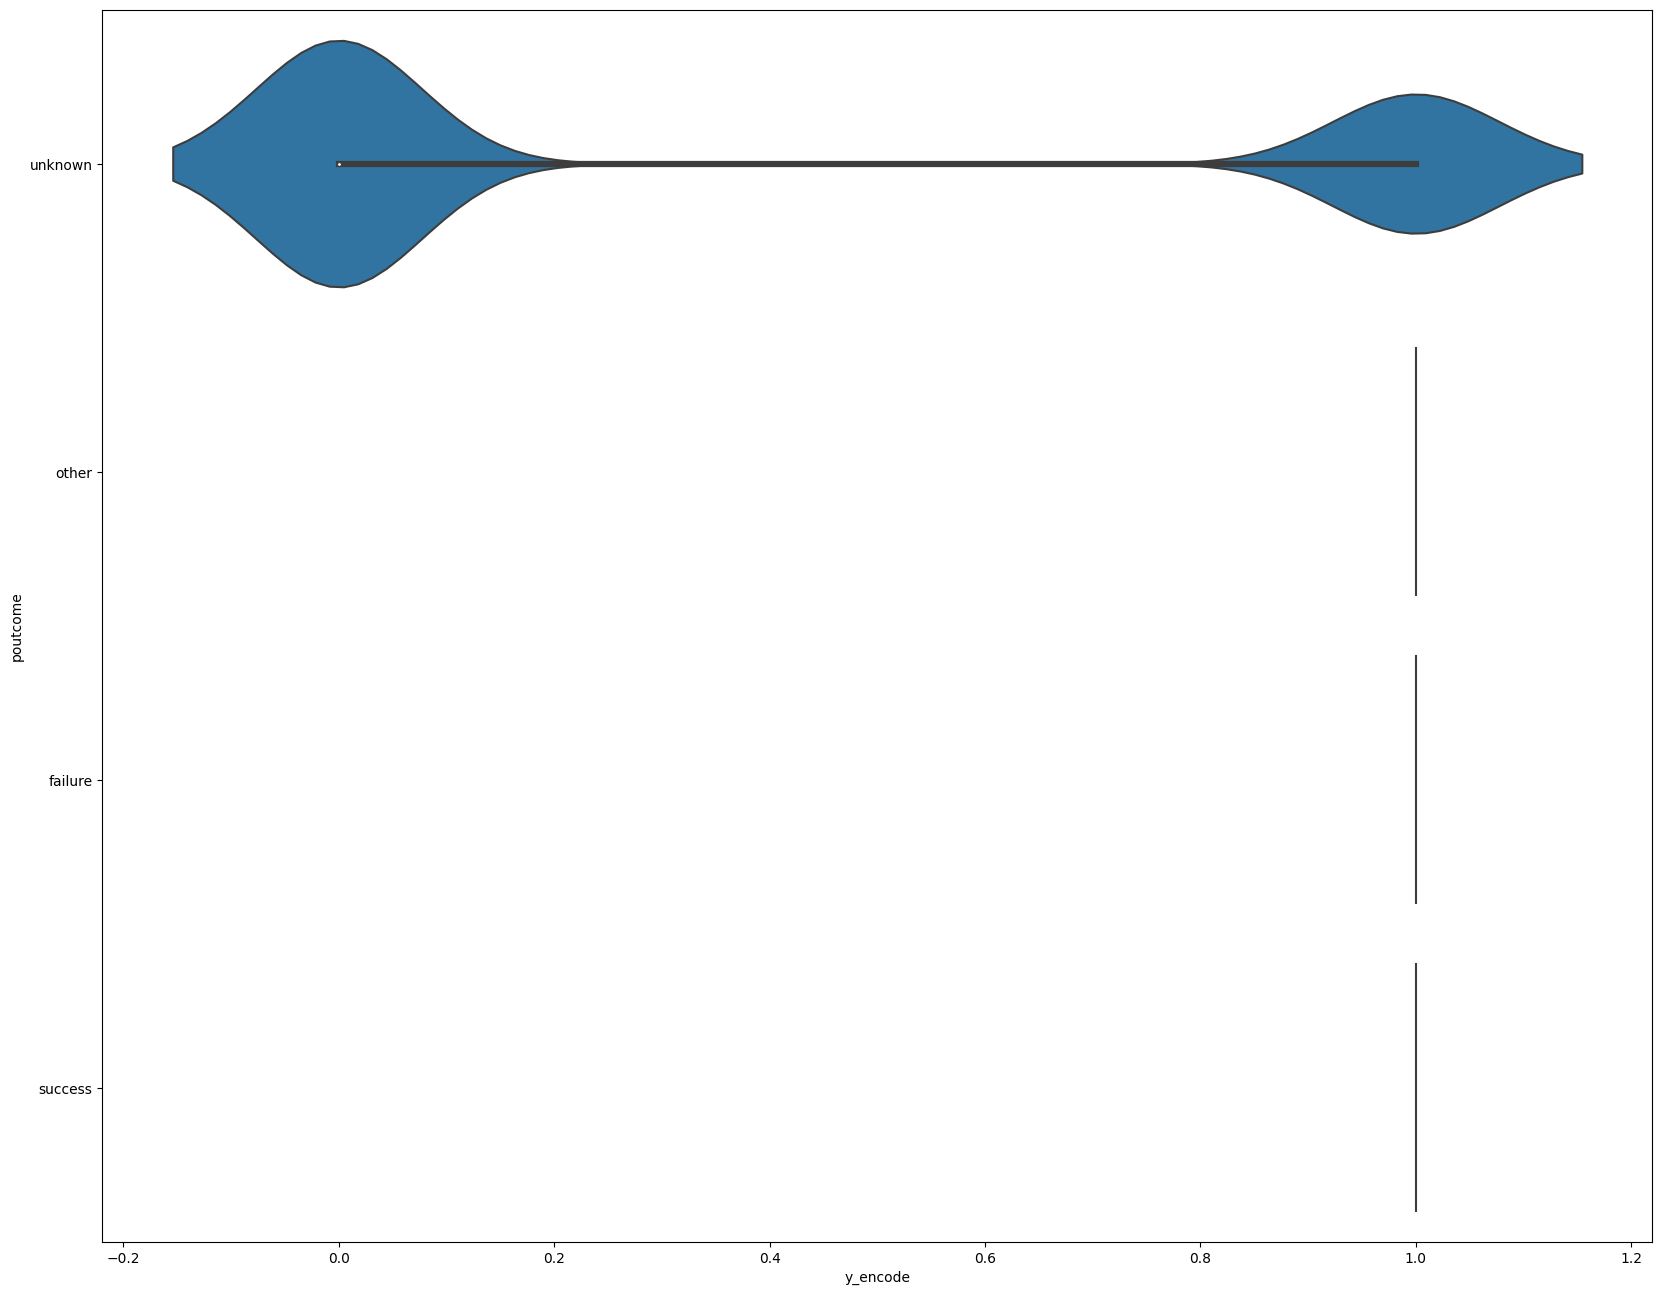

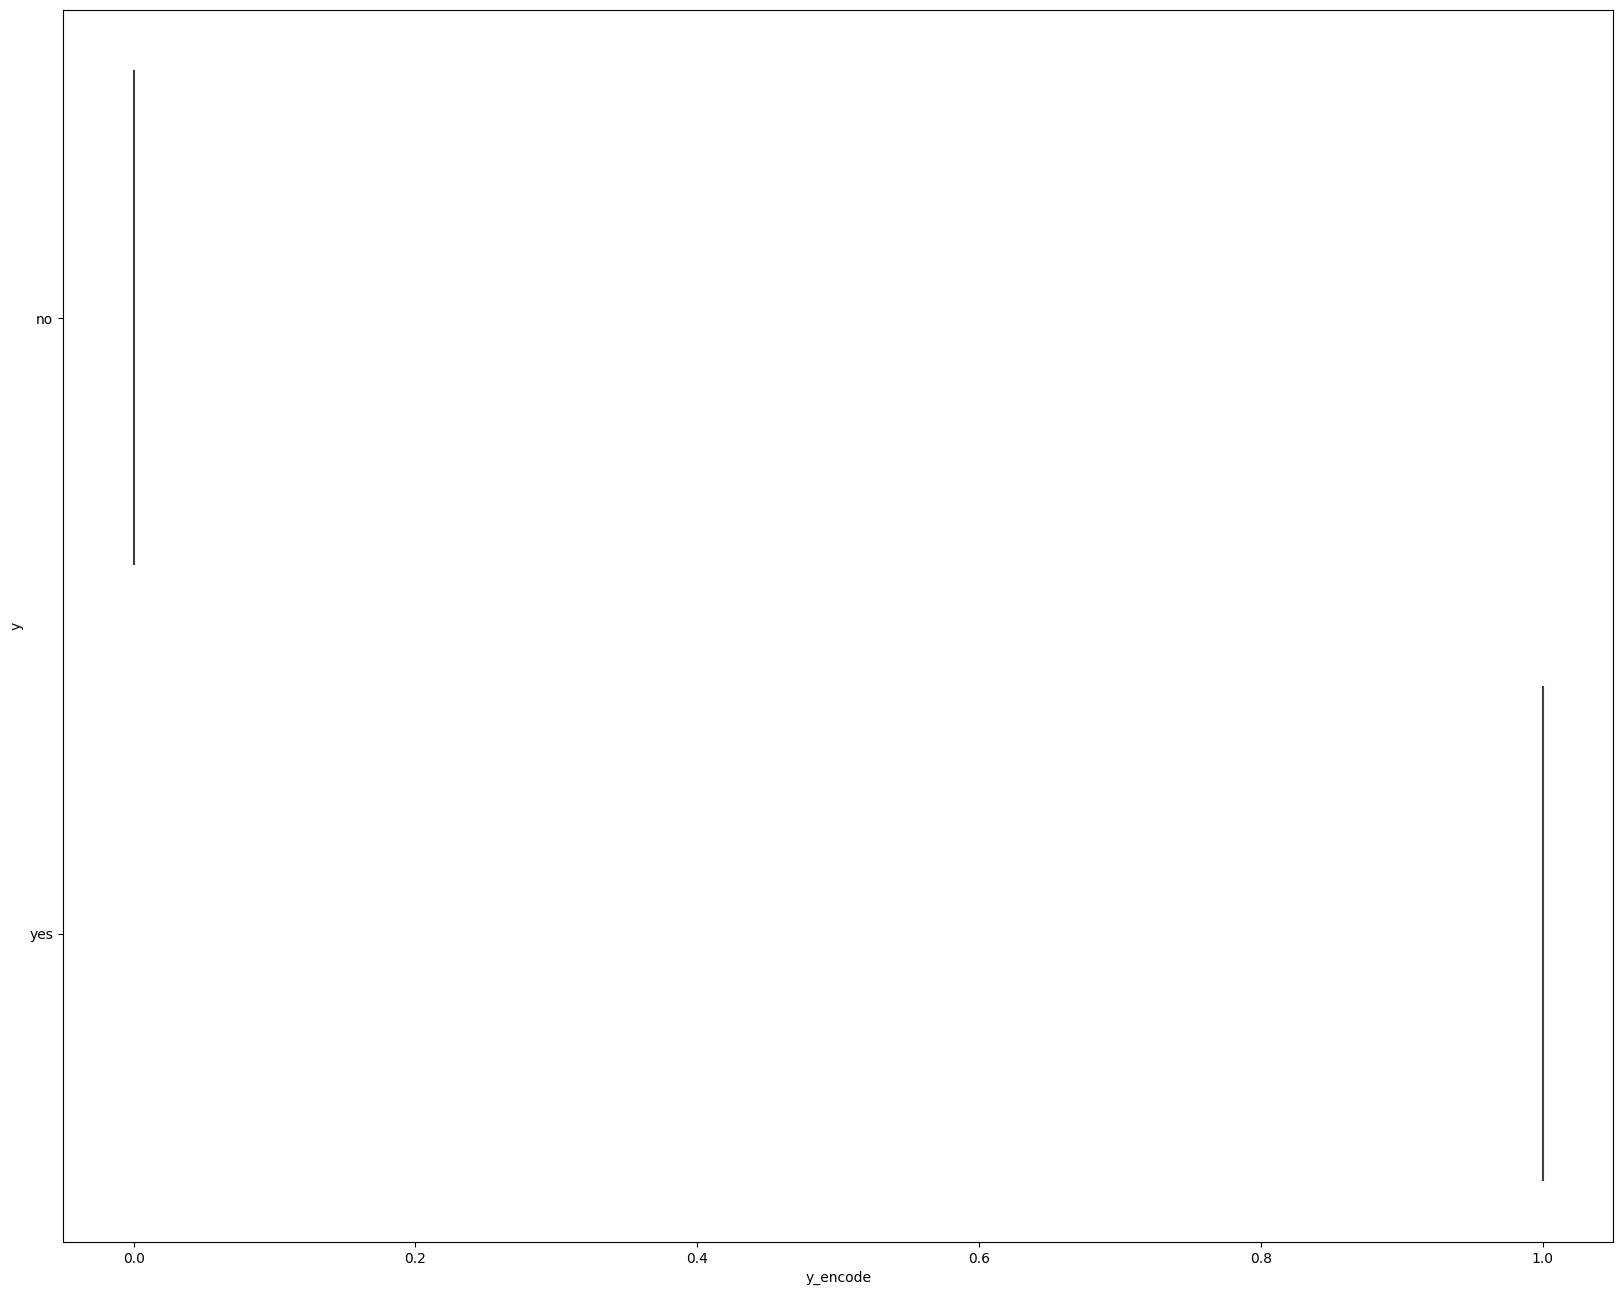

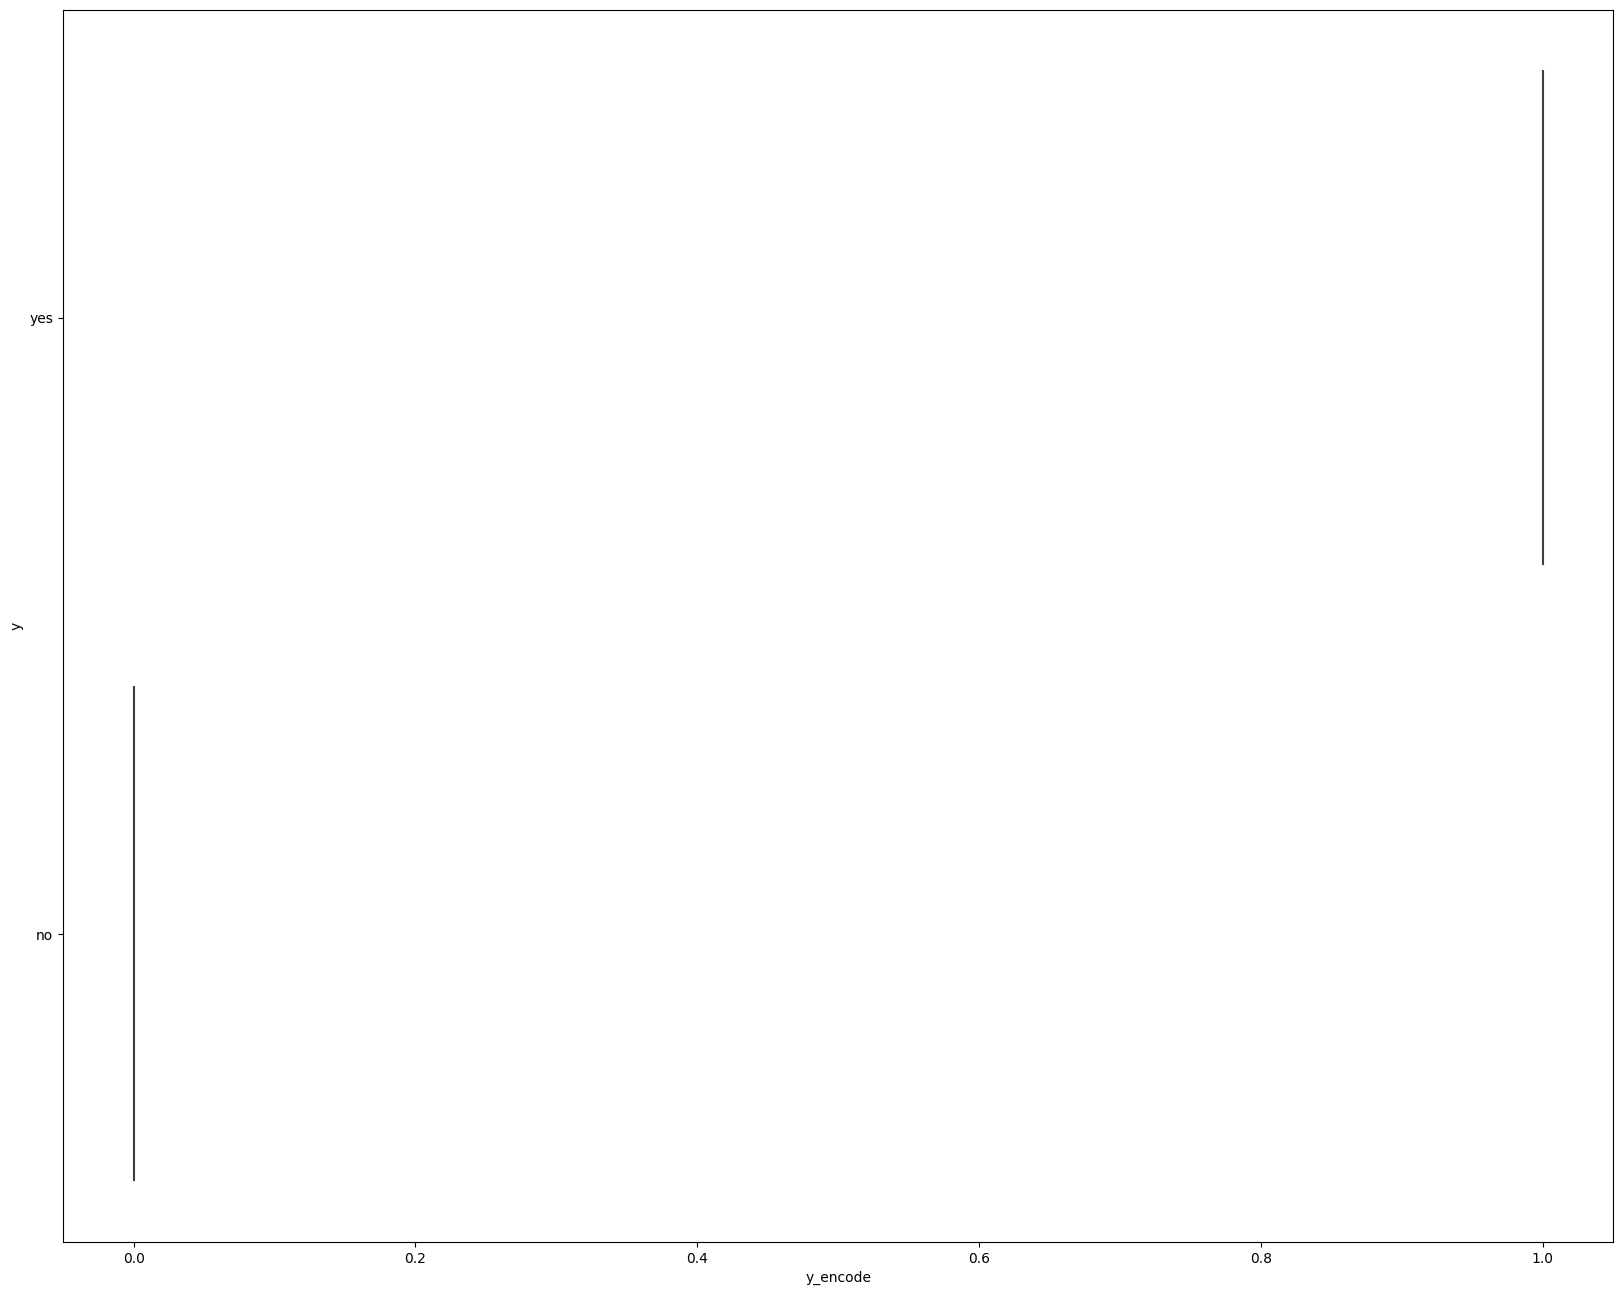

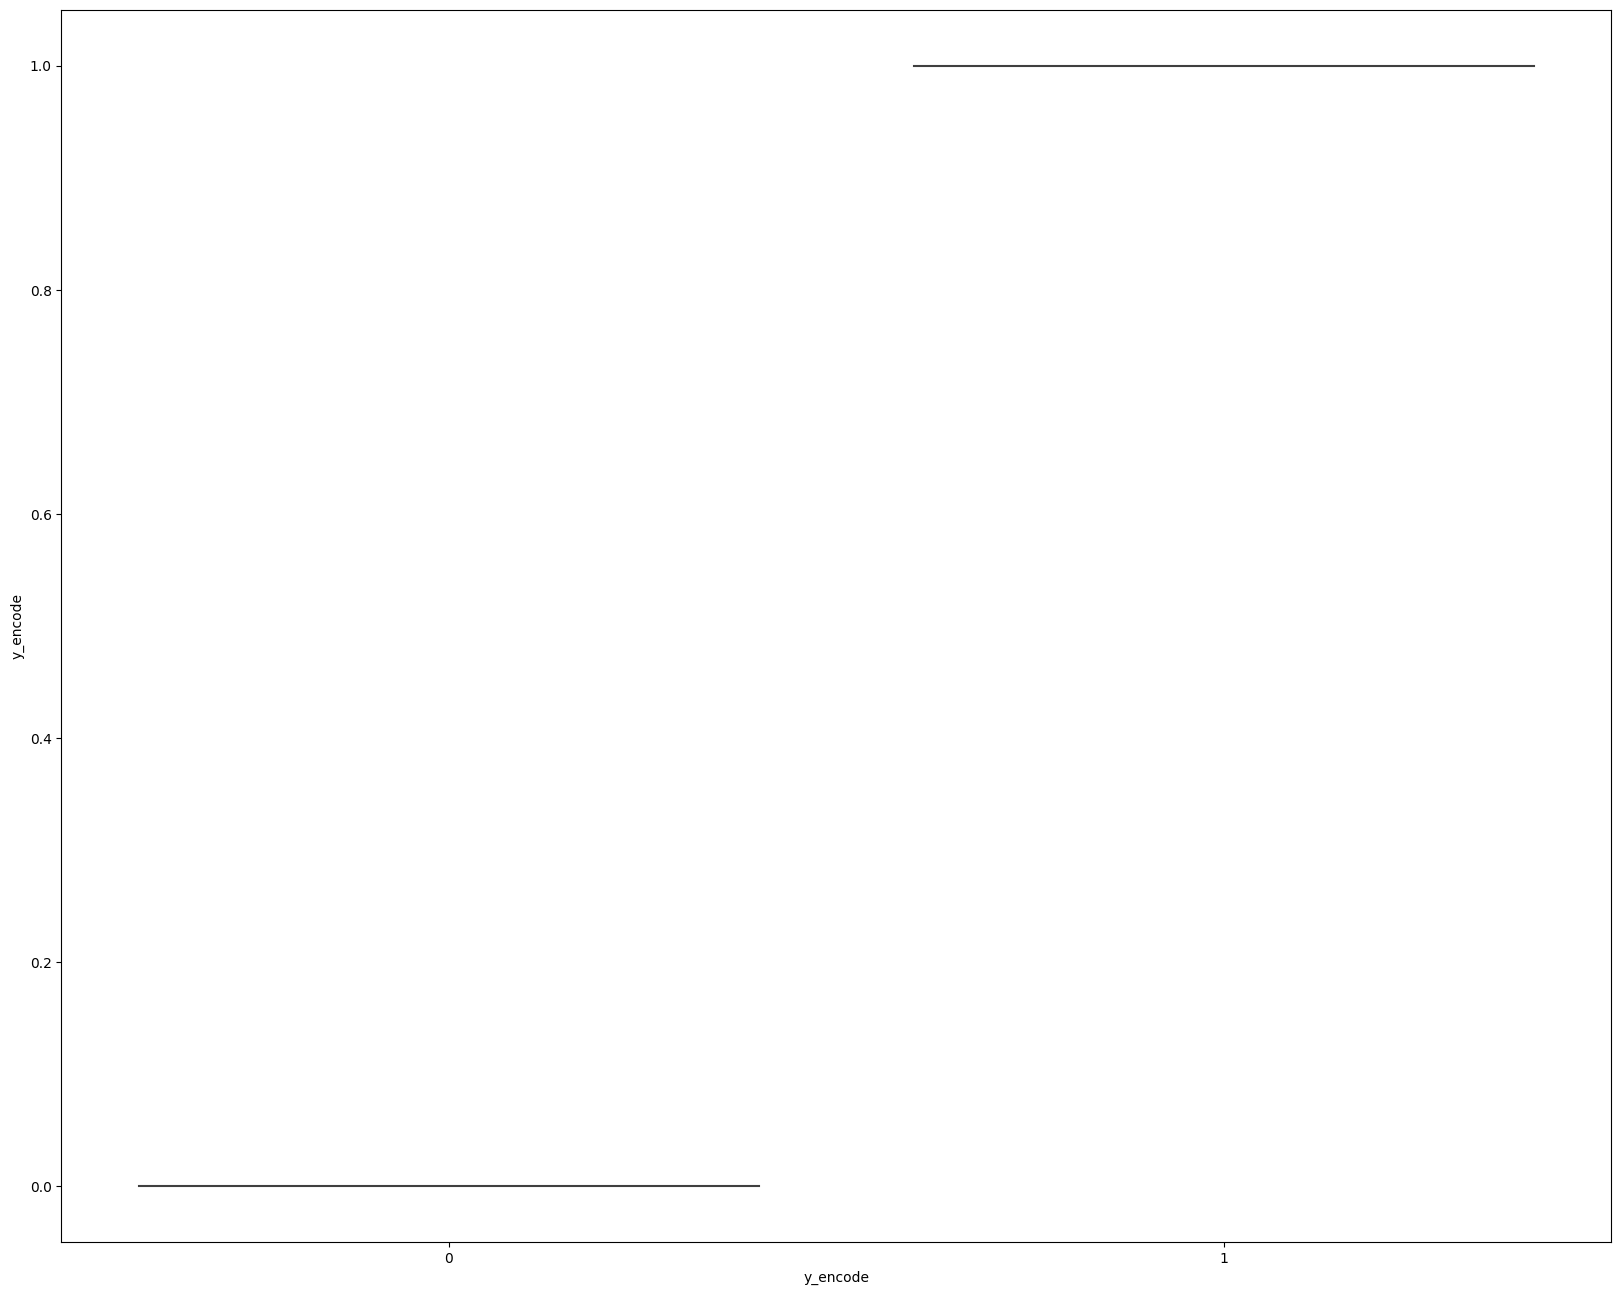

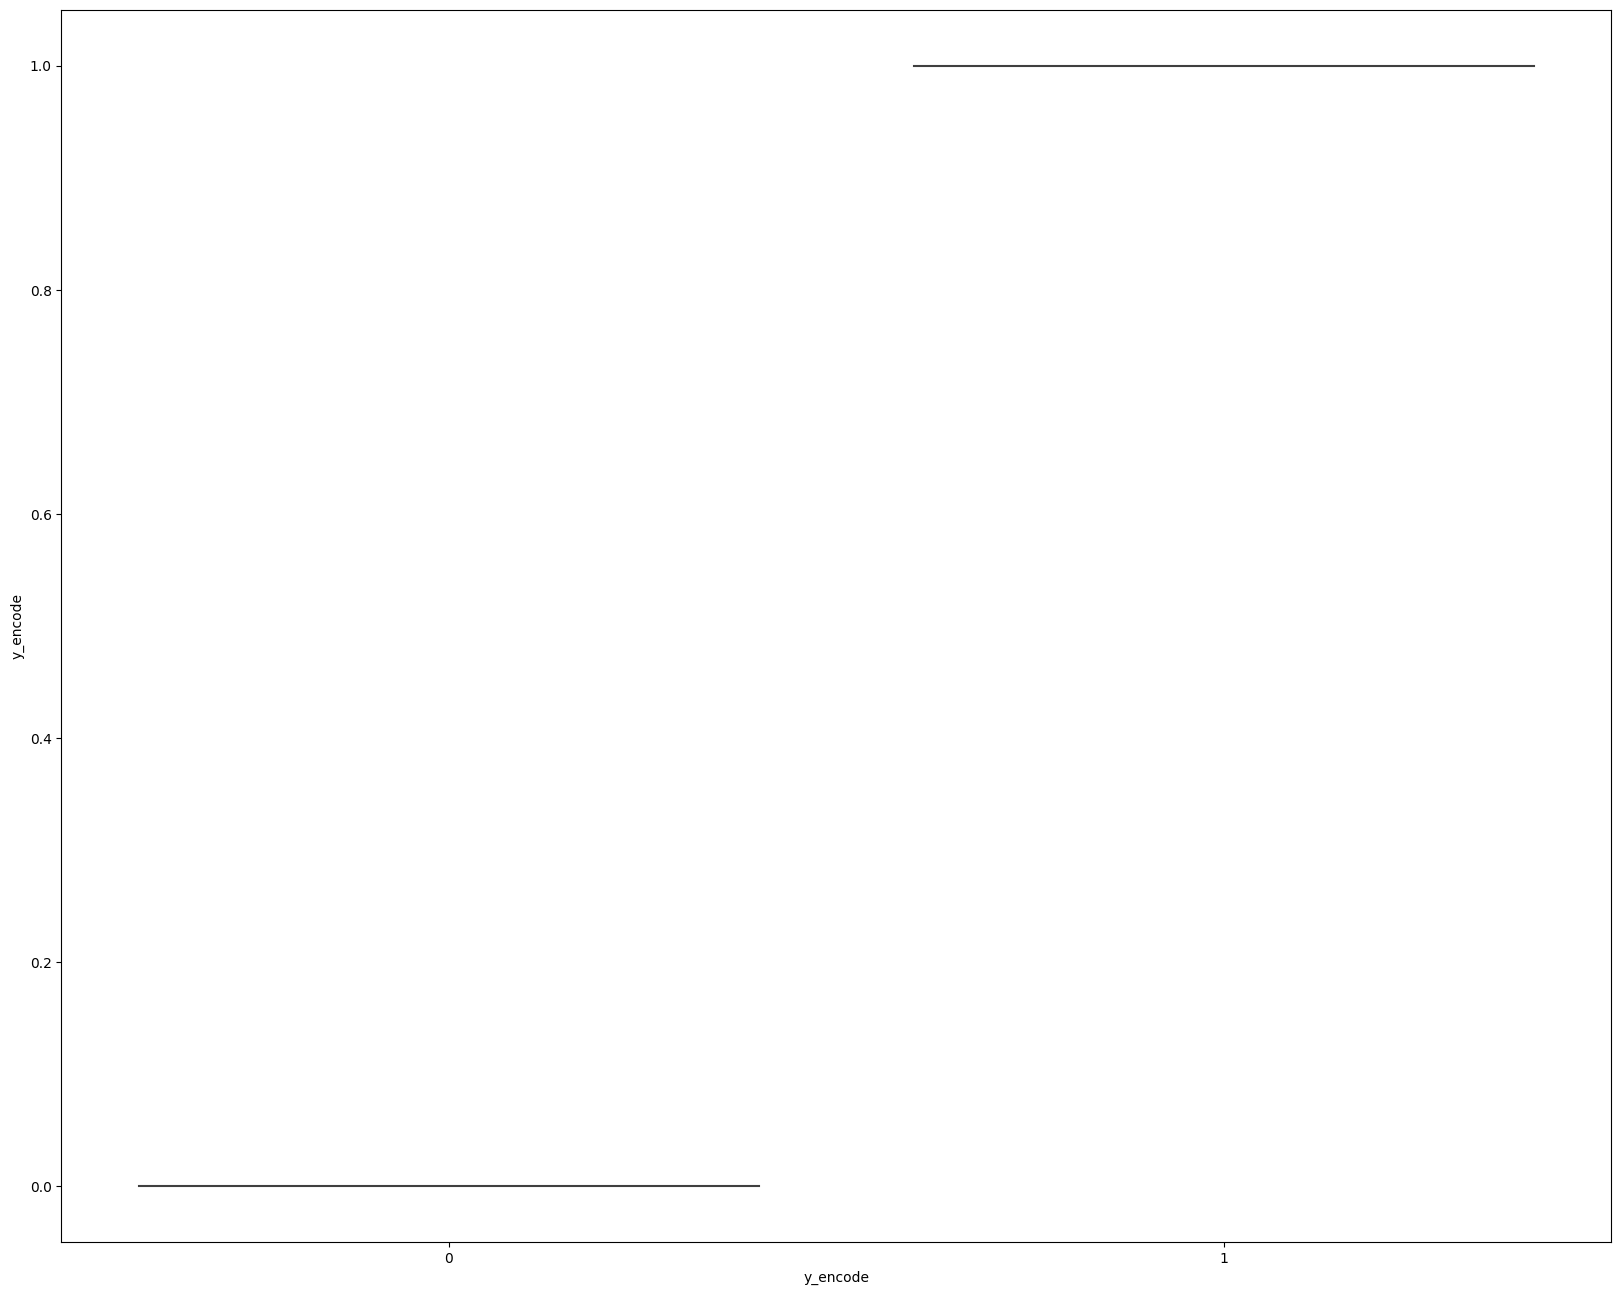

In [21]:
for i in df.columns:
    a = sns.violinplot(data=df, x='y_encode', y=i)
    plt.pyplot.show()
    a = sns.violinplot(data=df1, x='y_encode', y=i)
    plt.pyplot.show()

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier,cv
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [23]:
#identify the type of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  y_encode   45211 non-null  int32 
dtypes: int32(1), int64(7), object(10)
memory usage: 7.6+ MB


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11289 entries, 83 to 6194
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11289 non-null  int64 
 1   job        11289 non-null  object
 2   marital    11289 non-null  object
 3   education  11289 non-null  object
 4   default    11289 non-null  object
 5   balance    11289 non-null  int64 
 6   housing    11289 non-null  object
 7   loan       11289 non-null  object
 8   contact    11289 non-null  object
 9   day        11289 non-null  int64 
 10  month      11289 non-null  object
 11  duration   11289 non-null  int64 
 12  campaign   11289 non-null  int64 
 13  pdays      11289 non-null  int64 
 14  previous   11289 non-null  int64 
 15  poutcome   11289 non-null  object
 16  y          11289 non-null  object
 17  y_encode   11289 non-null  int32 
dtypes: int32(1), int64(7), object(10)
memory usage: 1.9+ MB


In [25]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
y_encode        2
dtype: int64

In [26]:
df1.nunique()

age            74
job            12
marital         3
education       4
default         2
balance      3710
housing         2
loan            2
contact         3
day            31
month          12
duration     1439
campaign       36
pdays         423
previous       27
poutcome        4
y               2
y_encode        2
dtype: int64

In [27]:
df.isnull().sum().sum()

0

In [28]:
df1.isnull().sum().sum()

0

In [29]:
# NULL value check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  y_encode   45211 non-null  int32 
dtypes: int32(1), int64(7), object(10)
memory usage: 7.6+ MB


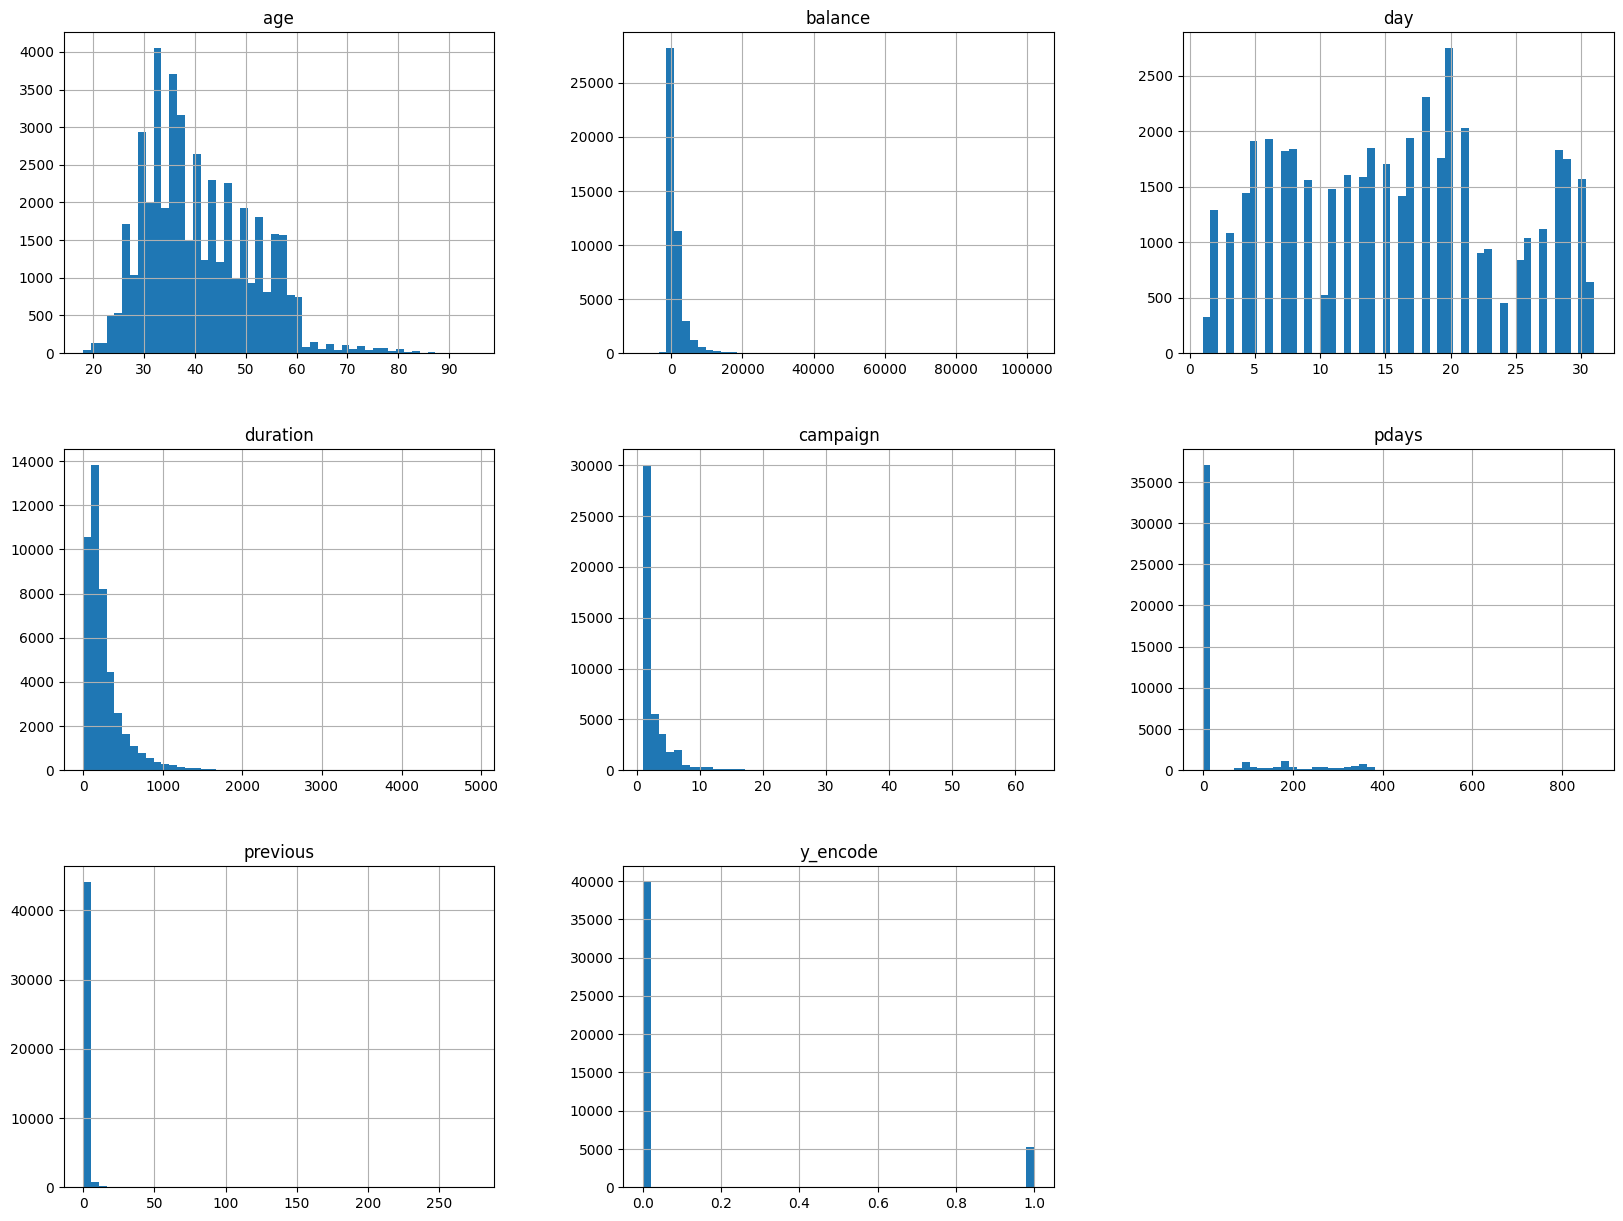

In [30]:
df.hist(bins=50, figsize=(20,15))
plt.pyplot.show()

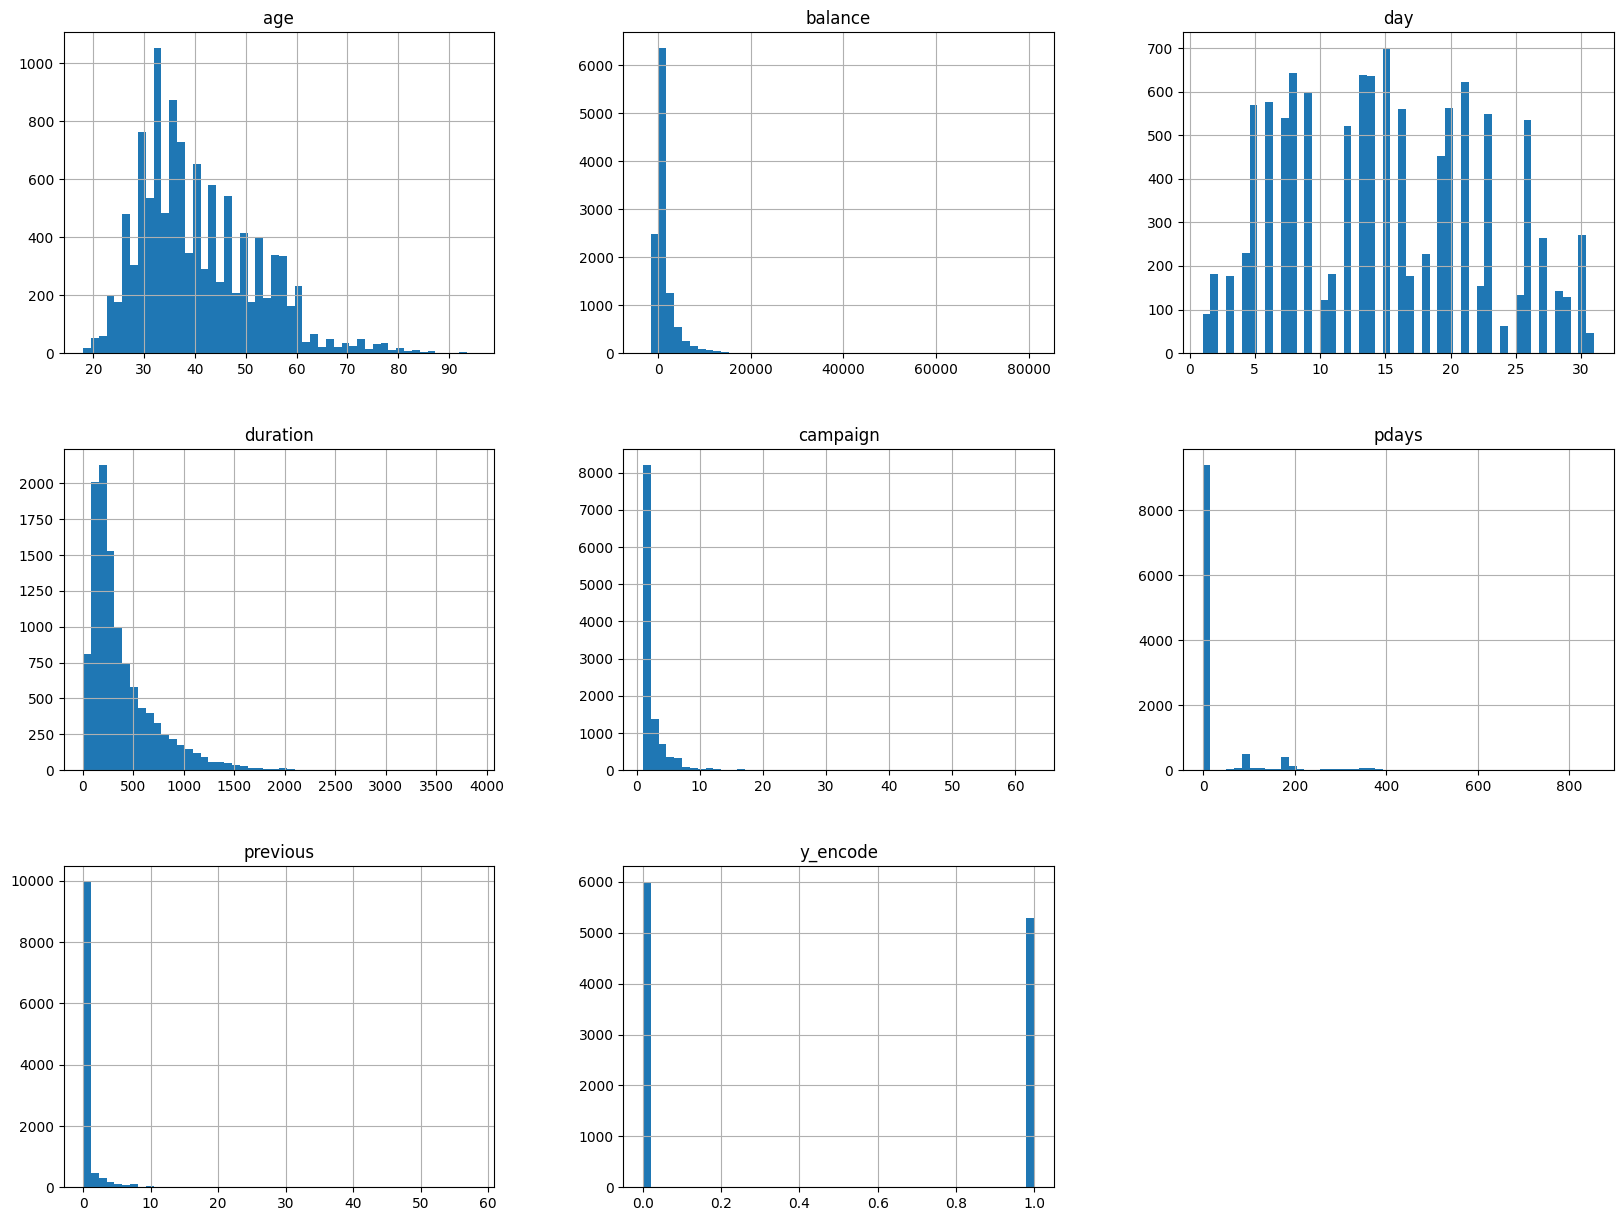

In [31]:
df1.hist(bins=50, figsize=(20,15))
plt.pyplot.show()

<AxesSubplot:>

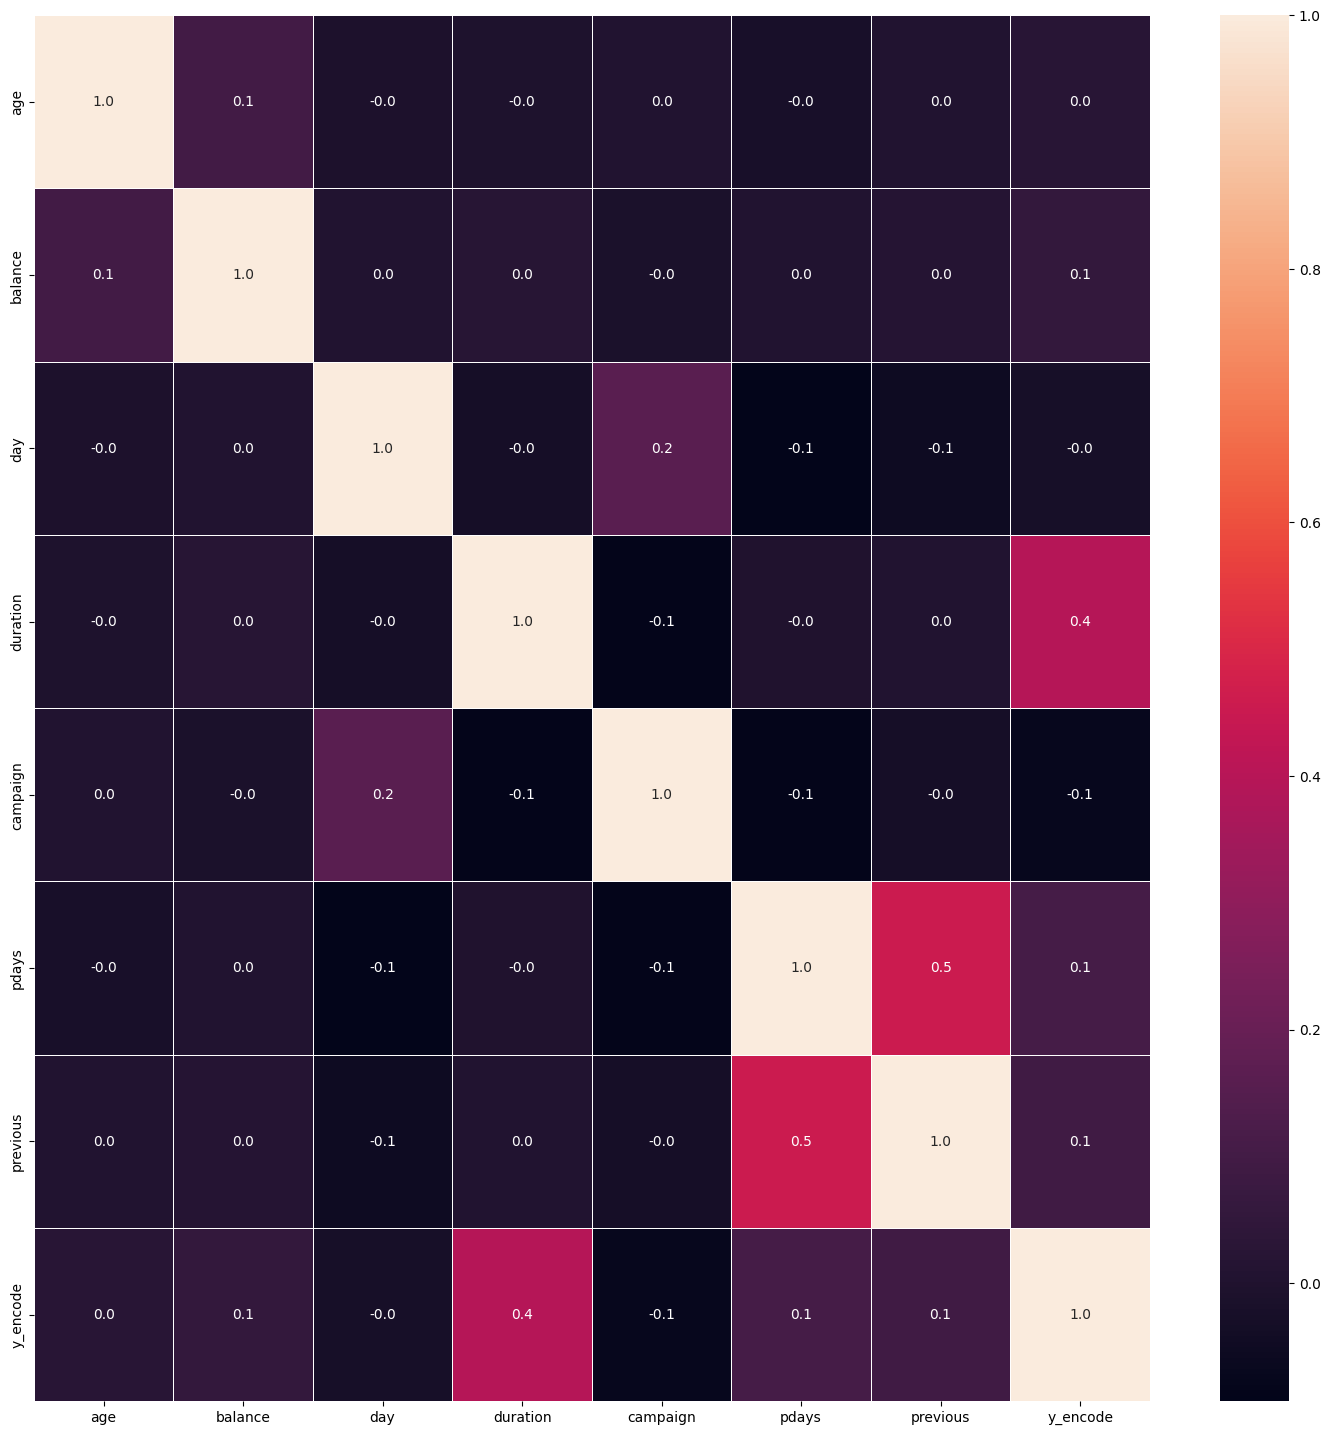

In [32]:
#correlation map
f,ax=plt.pyplot.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)

<AxesSubplot:>

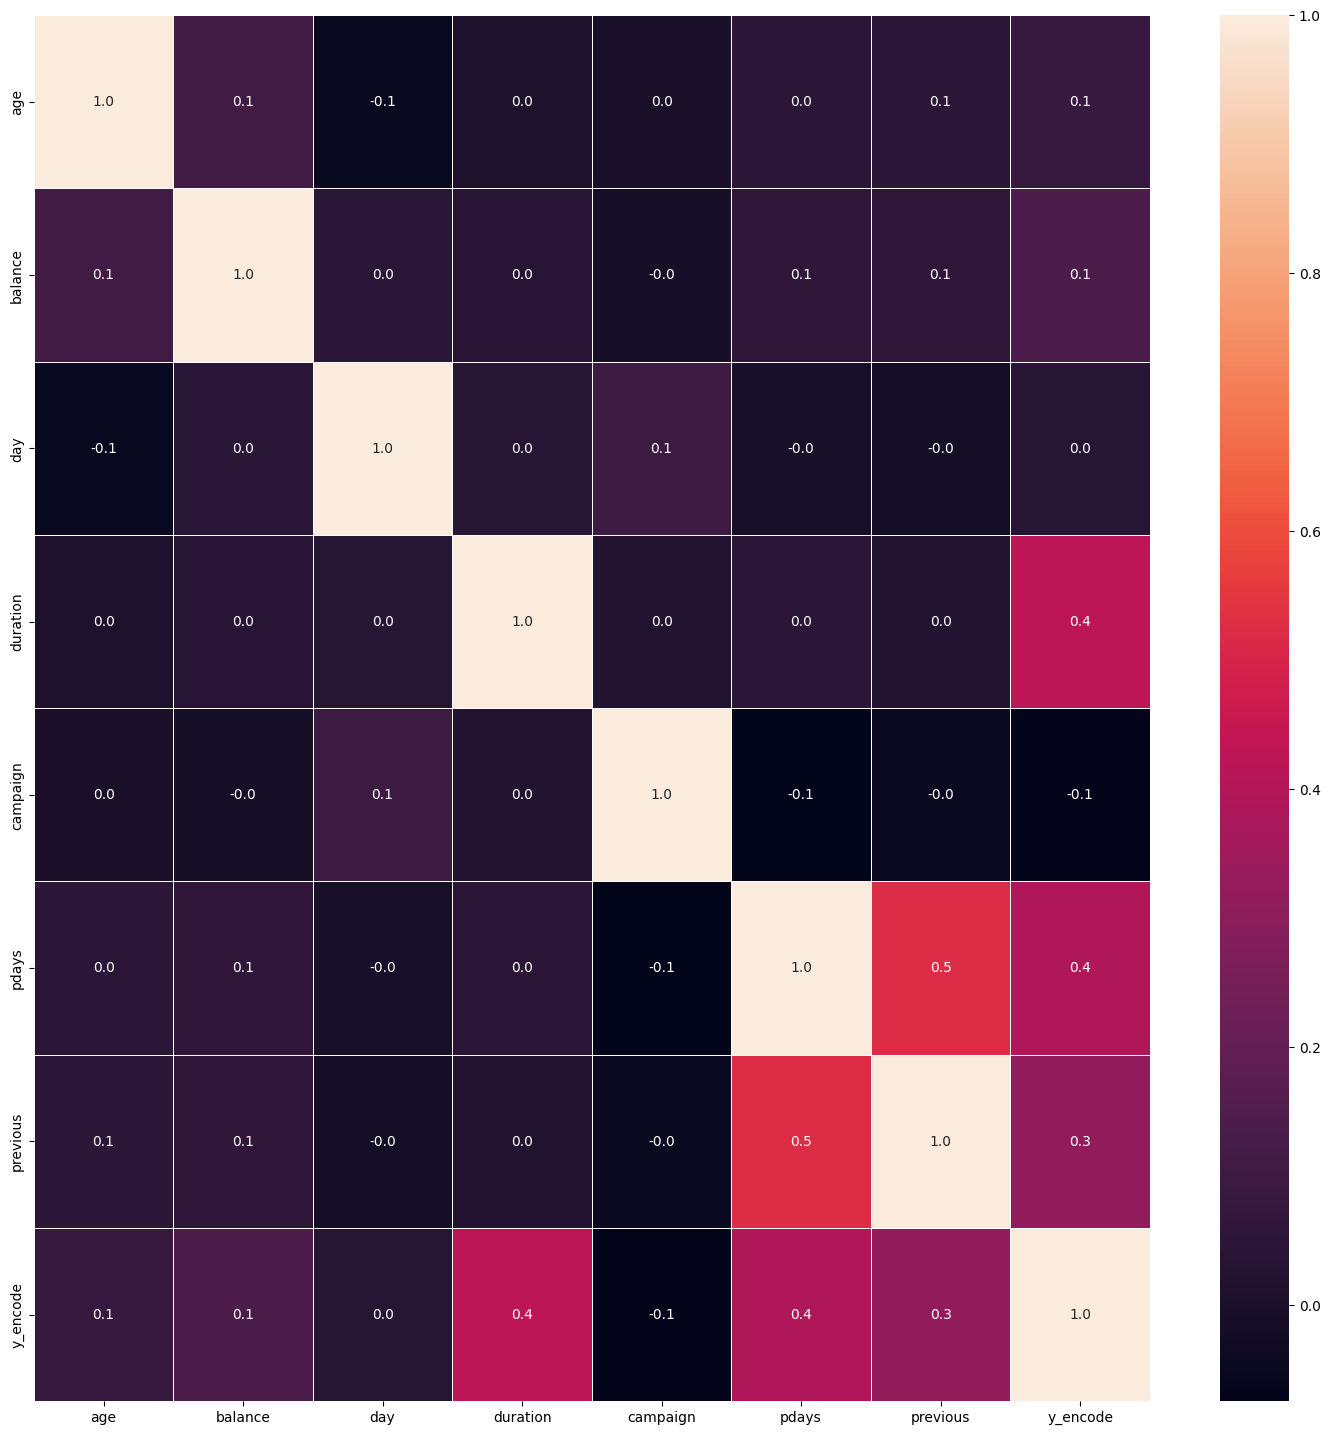

In [33]:
#correlation map
f,ax=plt.pyplot.subplots(figsize=(18,18))
sns.heatmap(df1.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)

In [34]:
from sklearn.feature_extraction import FeatureHasher

In [35]:
for i in df.dtypes[df.dtypes == 'object'].keys():
    #print(df[i].unique())
    if i!='y':
        h = FeatureHasher(n_features = len(df[i].unique()), input_type ='string')
        new_column = i+'_encode'
        #print(new_column)
        print(i)
        hashed_Feature = h.fit_transform(df[i])
        hashed_Feature = hashed_Feature.toarray()
        df3 = pd.DataFrame(hashed_Feature)
        column_list = list(df3.columns)
        print(column_list)
        column_dict={}
        for j in column_list:
            column_dict[j]=i+'_'+str(j)
        print(column_dict)
        df3=df3.rename(columns=column_dict,errors='raise')
        print(list(df3.columns))
        try:
            df = pd.concat([df.reset_index(), df3.reset_index()], axis = 1)
        except:
            df = pd.concat([df,df3],axis=1)

job
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
{0: 'job_0', 1: 'job_1', 2: 'job_2', 3: 'job_3', 4: 'job_4', 5: 'job_5', 6: 'job_6', 7: 'job_7', 8: 'job_8', 9: 'job_9', 10: 'job_10', 11: 'job_11'}
['job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11']
marital
[0, 1, 2]
{0: 'marital_0', 1: 'marital_1', 2: 'marital_2'}
['marital_0', 'marital_1', 'marital_2']
education
[0, 1, 2, 3]
{0: 'education_0', 1: 'education_1', 2: 'education_2', 3: 'education_3'}
['education_0', 'education_1', 'education_2', 'education_3']
default
[0, 1]
{0: 'default_0', 1: 'default_1'}
['default_0', 'default_1']
housing
[0, 1]
{0: 'housing_0', 1: 'housing_1'}
['housing_0', 'housing_1']
loan
[0, 1]
{0: 'loan_0', 1: 'loan_1'}
['loan_0', 'loan_1']
contact
[0, 1, 2]
{0: 'contact_0', 1: 'contact_1', 2: 'contact_2'}
['contact_0', 'contact_1', 'contact_2']
month
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
{0: 'month_0', 1: 'month_1', 2: 'month_2', 3: 'month_3', 4: 'month_4', 

In [36]:
df.head()

level_0  index  age           job  marital  education default  balance  \
0        0      0   58    management  married   tertiary      no     2143   
1        1      1   44    technician   single  secondary      no       29   
2        2      2   33  entrepreneur  married  secondary      no        2   
3        3      3   47   blue-collar  married    unknown      no     1506   
4        4      4   33       unknown   single    unknown      no        1   

  housing loan  ... month_6  month_7 month_8  month_9  month_10  month_11  \
0     yes   no  ...     0.0      0.0     0.0      0.0       1.0       0.0   
1     yes   no  ...     0.0      0.0     0.0      0.0       1.0       0.0   
2     yes  yes  ...     0.0      0.0     0.0      0.0       1.0       0.0   
3     yes   no  ...     0.0      0.0     0.0      0.0       1.0       0.0   
4      no   no  ...     0.0      0.0     0.0      0.0       1.0       0.0   

   poutcome_0 poutcome_1 poutcome_2  poutcome_3  
0        -2.0       -1.0        0.0         0.0  
1        -2.0       -1.0        0.0         0.0  
2        -2.0       -1.0        0.0         0.0  
3        -2.0       -1.0        0.0         0.0  
4        -2.0       -1.0        0.0         0.0  

[5 rows x 66 columns]

In [37]:
len(df.columns)

66

In [38]:
h = FeatureHasher(n_features = len(df1["marital"].unique()), input_type ='string')
#print(new_column)
print(i)
print(h)
hashed_Feature = h.fit_transform(df1[str("marital")])
hashed_Feature = hashed_Feature.toarray()
df4 = pd.DataFrame(hashed_Feature)
column_list = list(df4.columns)
print(column_list)

y
FeatureHasher(input_type='string', n_features=3)
[0, 1, 2]


In [39]:
for i in df1.dtypes[df1.dtypes == 'object'].keys():
    #print(df[i].unique())
    if i!='y':
        h = FeatureHasher(n_features = len(df1[str(i)].unique()), input_type ='string')
        new_column = i+'_encode'
        #print(new_column)
        print(i)
        hashed_Feature = h.fit_transform(df1[str(i)])
        hashed_Feature = hashed_Feature.toarray()
        df4 = pd.DataFrame(hashed_Feature)
        column_list = list(df4.columns)
        print(column_list)
        column_dict={}
        for j in column_list:
            column_dict[j]=i+'_'+str(j)
        print(column_dict)
        df4=df4.rename(columns=column_dict,errors='raise')
        print(list(df4.columns))
        try:
            df1 = pd.concat([df1.reset_index(), df4.reset_index()], axis = 1)
        except:
            df1 = pd.concat([df1, df4], axis = 1)

job
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
{0: 'job_0', 1: 'job_1', 2: 'job_2', 3: 'job_3', 4: 'job_4', 5: 'job_5', 6: 'job_6', 7: 'job_7', 8: 'job_8', 9: 'job_9', 10: 'job_10', 11: 'job_11'}
['job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11']
marital
[0, 1, 2]
{0: 'marital_0', 1: 'marital_1', 2: 'marital_2'}
['marital_0', 'marital_1', 'marital_2']
education
[0, 1, 2, 3]
{0: 'education_0', 1: 'education_1', 2: 'education_2', 3: 'education_3'}
['education_0', 'education_1', 'education_2', 'education_3']
default
[0, 1]
{0: 'default_0', 1: 'default_1'}
['default_0', 'default_1']
housing
[0, 1]
{0: 'housing_0', 1: 'housing_1'}
['housing_0', 'housing_1']
loan
[0, 1]
{0: 'loan_0', 1: 'loan_1'}
['loan_0', 'loan_1']
contact
[0, 1, 2]
{0: 'contact_0', 1: 'contact_1', 2: 'contact_2'}
['contact_0', 'contact_1', 'contact_2']
month
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
{0: 'month_0', 1: 'month_1', 2: 'month_2', 3: 'month_3', 4: 'month_4', 

In [40]:
len(df1.columns)

66

In [41]:
df1.shape

(11289, 66)

In [42]:
Y=df['y_encode']
Y= pd.DataFrame(Y)
Y.head()

y_encode
0         0
1         0
2         0
3         0
4         0

In [43]:
Y_sample=df1['y_encode']
Y_sample= pd.DataFrame(Y_sample)
Y.head()

y_encode
0         0
1         0
2         0
3         0
4         0

In [44]:
drop_list=list(df.dtypes[df.dtypes == 'object'].keys())
#print(drop_list)
X=df.drop(columns=drop_list)
X.head()

level_0  index  age  balance  day  duration  campaign  pdays  previous  \
0        0      0   58     2143    5       261         1     -1         0   
1        1      1   44       29    5       151         1     -1         0   
2        2      2   33        2    5        76         1     -1         0   
3        3      3   47     1506    5        92         1     -1         0   
4        4      4   33        1    5       198         1     -1         0   

   y_encode  ...  month_6  month_7  month_8  month_9  month_10  month_11  \
0         0  ...      0.0      0.0      0.0      0.0       1.0       0.0   
1         0  ...      0.0      0.0      0.0      0.0       1.0       0.0   
2         0  ...      0.0      0.0      0.0      0.0       1.0       0.0   
3         0  ...      0.0      0.0      0.0      0.0       1.0       0.0   
4         0  ...      0.0      0.0      0.0      0.0       1.0       0.0   

   poutcome_0  poutcome_1  poutcome_2  poutcome_3  
0        -2.0        -1.0         0.0         0.0  
1        -2.0        -1.0         0.0         0.0  
2        -2.0        -1.0         0.0         0.0  
3        -2.0        -1.0         0.0         0.0  
4        -2.0        -1.0         0.0         0.0  

[5 rows x 56 columns]

In [45]:
drop_list=list(df1.dtypes[df1.dtypes == 'object'].keys())
#print(drop_list)
X_sample=df1.drop(columns=drop_list)
X_sample.head()

level_0  index  age  balance  day  duration  campaign  pdays  previous  \
0        0     83   59     2343    5      1042         1     -1         0   
1        1     86   56       45    5      1467         1     -1         0   
2        2     87   41     1270    5      1389         1     -1         0   
3        3    129   55     2476    5       579         1     -1         0   
4        4    168   54      184    5       673         2     -1         0   

   y_encode  ...  month_6  month_7  month_8  month_9  month_10  month_11  \
0         1  ...      0.0      0.0      0.0      0.0       1.0       0.0   
1         1  ...      0.0      0.0      0.0      0.0       1.0       0.0   
2         1  ...      0.0      0.0      0.0      0.0       1.0       0.0   
3         1  ...      0.0      0.0      0.0      0.0       1.0       0.0   
4         1  ...      0.0      0.0      0.0      0.0       1.0       0.0   

   poutcome_0  poutcome_1  poutcome_2  poutcome_3  
0        -2.0        -1.0         0.0         0.0  
1        -2.0        -1.0         0.0         0.0  
2        -2.0        -1.0         0.0         0.0  
3        -2.0        -1.0         0.0         0.0  
4        -2.0        -1.0         0.0         0.0  

[5 rows x 56 columns]

**Feature Selection**

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [47]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [48]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
kfold

KFold(n_splits=5, random_state=0, shuffle=True)

In [49]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

class Solution:
    features = list()
    mse = float('Inf')
    
    def __init__(self, y, features=None, mse=None):
        if features and mse:
            self.features = features
            self.mse = mse
        else:
            pred = [y.mean()] * len(y)
            self.features = list()
            self.mse = mean_squared_error(y, pred)
    
    def update(self, features, mse):
        if mse < self.mse:
            self.features = features
            self.mse = mse
            return True
        return False

features = X.columns
current_features = list(features)
print("Current Feature",current_features)
print("All Feature",list(features))
best = Solution(
    y=Y,
    features=current_features,
    mse=-np.average(
        cross_val_score(
            estimator=model,
            X=X, y=Y, cv=kfold,
            scoring='f1_macro')))

while len(current_features) > 0: #I want to remove features. I stop when the model has 1 feature left
    removed_feature = None
    
    for feature in current_features:
        new_features = [f for f in current_features if f != feature]
        print("New_Features",new_features)
        mses = cross_val_score(
            estimator=model,
            X=X[new_features], y=Y, cv=kfold,
            scoring='f1_macro')
        print("MSE",mses)
        mse = -np.average(mses)
        print("Average mse",mse)
        if best.update(new_features, mse):
            removed_feature = feature
            print("Removed Feature",removed_feature)
            
    if removed_feature:
        current_features.remove(removed_feature)
        print("Current Feature",current_features)
    else:
        break

Current Feature ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']
All Feature ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0'

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

New_Features ['index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solv

MSE [0.72321217 0.71152503 0.71319647 0.71420266 0.72961836]
Average mse -0.7183509378614712
New_Features ['level_0', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'poutcome_0', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_1', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_2', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_3']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0
New_Features ['level_0', 'index', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_encode', 'index', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11', 'index', 'marital_0', 'marital_1', 'marital_2', 'education_0', 'education_1', 'education_2', 'education_3', 'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0', 'loan_1', 'contact_0', 'contact_1', 'contact_2', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'poutcome_0', 'poutcome_1', 'poutcome_2']


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

MSE [1. 1. 1. 1. 1.]
Average mse -1.0


In [50]:
print('Selected features: ', end='')
print(', '.join(best.features))

Selected features: level_0, index, age, balance, day, duration, campaign, pdays, previous, y_encode, index, job_0, job_1, job_2, job_3, job_4, job_5, job_6, job_7, job_8, job_9, job_10, job_11, index, marital_0, marital_1, marital_2, education_0, education_1, education_2, education_3, default_0, default_1, housing_0, housing_1, loan_0, loan_1, contact_0, contact_1, contact_2, month_0, month_1, month_2, month_3, month_4, month_5, month_6, month_7, month_8, month_9, month_10, month_11, poutcome_0, poutcome_1, poutcome_2, poutcome_3


In [51]:
len(best.features)

56

In [52]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [53]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [54]:
# split train - test to 70-30
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.3, random_state=9)
x_validate = train_X[:1000]
y_validate = train_Y[:1000]
train_X=train_X[1000:]
train_Y=train_Y[1000:]

In [55]:
# split train - test to 70-30
train_X_sample,test_X_sample,train_Y_sample,test_Y_sample = train_test_split(X_sample,Y_sample,test_size=0.3, random_state=9)
x_validate_sample = train_X_sample[:1000]
y_validate_sample = train_Y_sample[:1000]
train_X_sample=train_X_sample[1000:]
train_Y_sample=train_Y_sample[1000:]

In [56]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
print(x_validate.shape)
print(y_validate.shape)

(30647, 56)
(30647, 1)
(13564, 56)
(13564, 1)
(1000, 56)
(1000, 1)


In [57]:
print(train_X_sample.shape)
print(train_Y_sample.shape)
print(test_X_sample.shape)
print(test_Y_sample.shape)
print(x_validate_sample.shape)
print(y_validate_sample.shape)

(6902, 56)
(6902, 1)
(3387, 56)
(3387, 1)
(1000, 56)
(1000, 1)


In [58]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(train_X)
X_test = sc.transform(test_X)
y_train = train_Y
y_test = test_Y

In [59]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sample = sc.fit_transform(train_X_sample)
X_test_sample = sc.transform(test_X_sample)
y_train_sample = train_Y_sample
y_test_sample = test_Y_sample

In [60]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [93]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 28, kernel_initializer = 'uniform', activation = 'relu', input_dim = 56))

# Adding the second hidden layer
#classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
print("we are here")
classifier.fit(X_train, y_train, batch_size = 10, epochs = 5,verbose = 1)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.75)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

we are here
Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3065/3065 [==============================] - 5s 1ms/step - loss: 0.0384 - accuracy: 0.9904
Epoch 2/5
3065/3065 [==============================] - 4s 1ms/step - loss: 1.5427e-04 - accuracy: 1.0000
Epoch 3/5
3065/3065 [==============================] - 4s 1ms/step - loss: 2.0989e-05 - accuracy: 1.0000
Epoch 4/5
3065/3065 [==============================] - 

Text(0.5, 146.7222222222222, 'Predicted label')

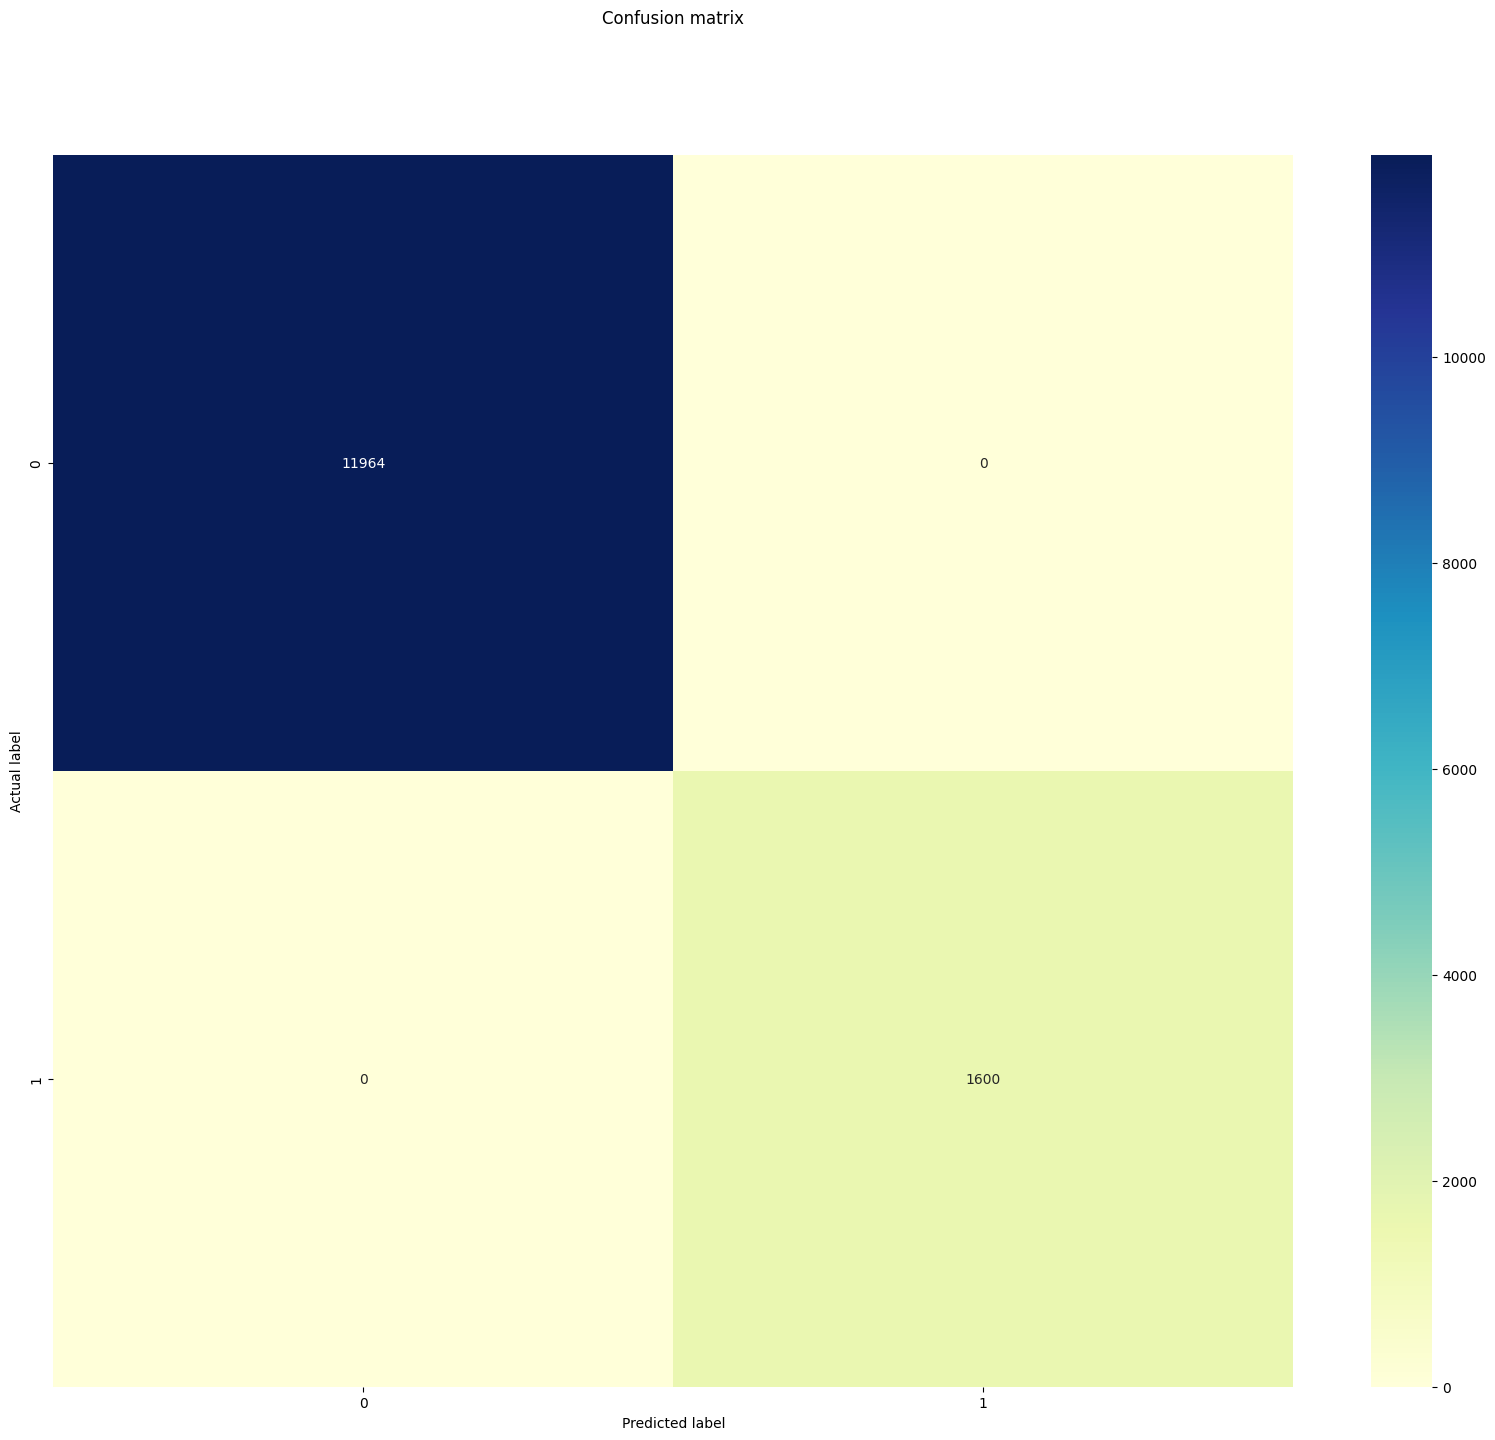

In [94]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.pyplot.title('Confusion matrix', y=1.1)
plt.pyplot.ylabel('Actual label')
plt.pyplot.xlabel('Predicted label')

In [95]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11964
           1       1.00      1.00      1.00      1600

    accuracy                           1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564



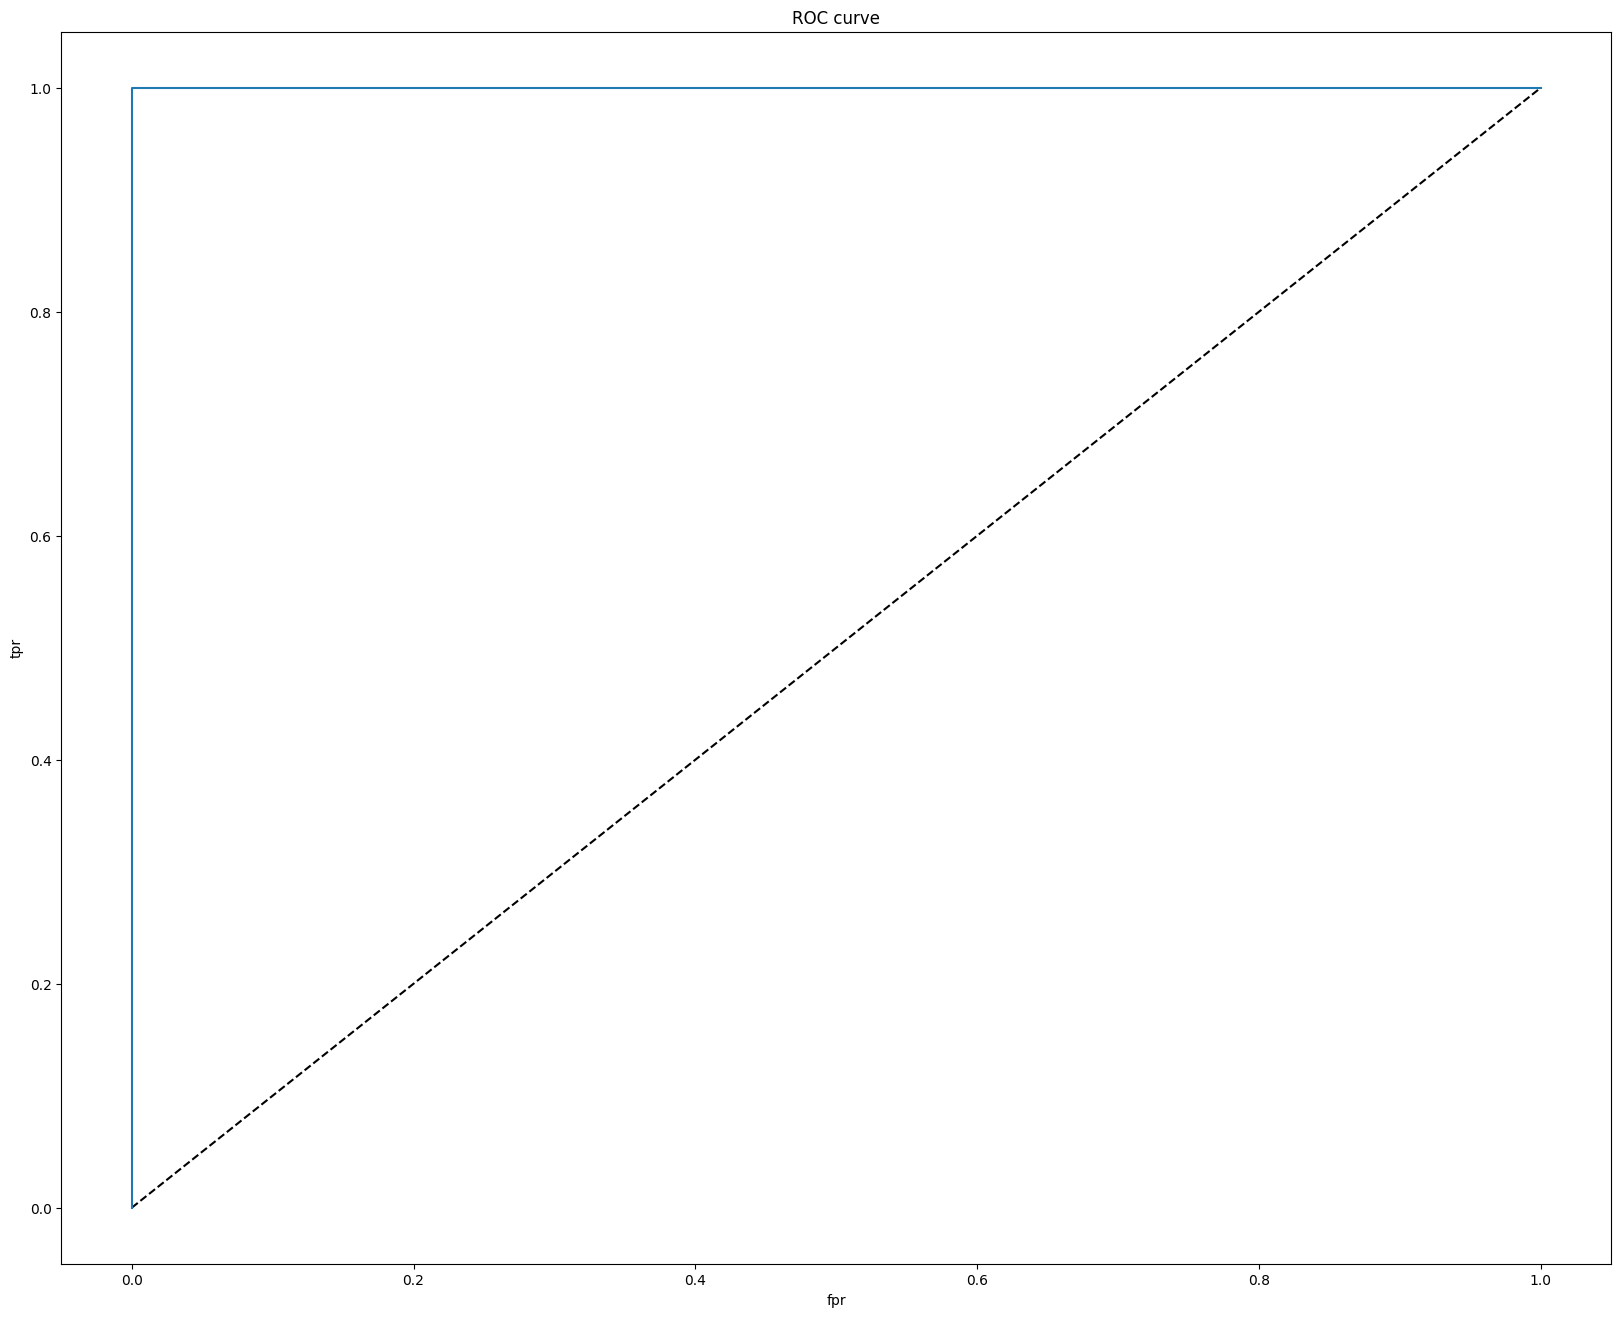

In [96]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.pyplot.plot([0,1],[0,1],'k--')
plt.pyplot.plot(fpr,tpr, label='ANN')
plt.pyplot.xlabel('fpr')
plt.pyplot.ylabel('tpr')
plt.pyplot.title('ROC curve')
plt.pyplot.show()

In [97]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9999999999999999

In [98]:
# Predicting the Test set results
y_pred1 = classifier.predict(x_validate)
y_pred1 = (y_pred1 > 0.75)

print('*'*20)
score, acc = classifier.evaluate(x_validate, y_validate,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_validate, y_pred1)

********************
100/100 [==============================] - 0s 1ms/step - loss: 10703.2490 - accuracy: 0.8950
Test score: 10703.2490234375
Test accuracy: 0.8949999809265137


Text(0.5, 146.7222222222222, 'Predicted label')

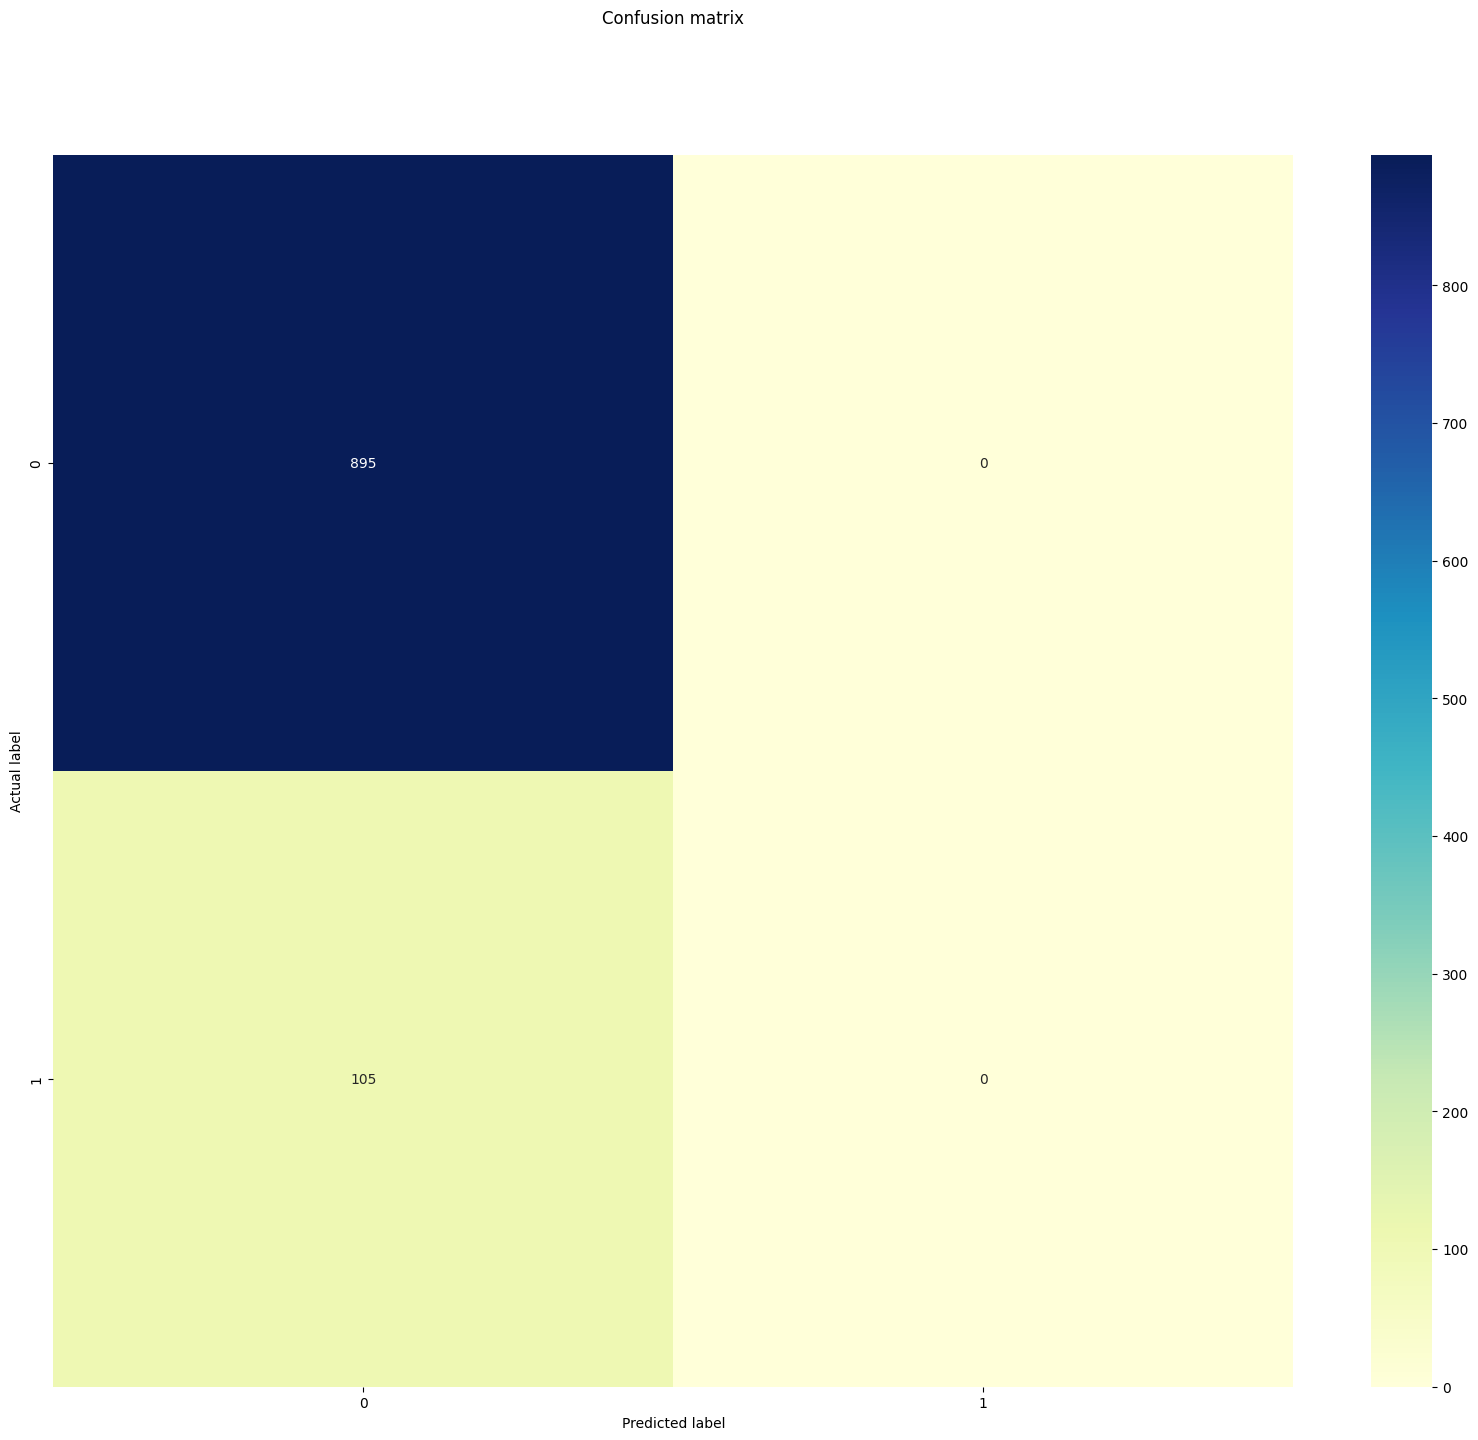

In [99]:
p = sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
plt.pyplot.title('Confusion matrix', y=1.1)
plt.pyplot.ylabel('Actual label')
plt.pyplot.xlabel('Predicted label')

In [100]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_validate,y_pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       895
           1       0.00      0.00      0.00       105

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.90      0.85      1000



c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

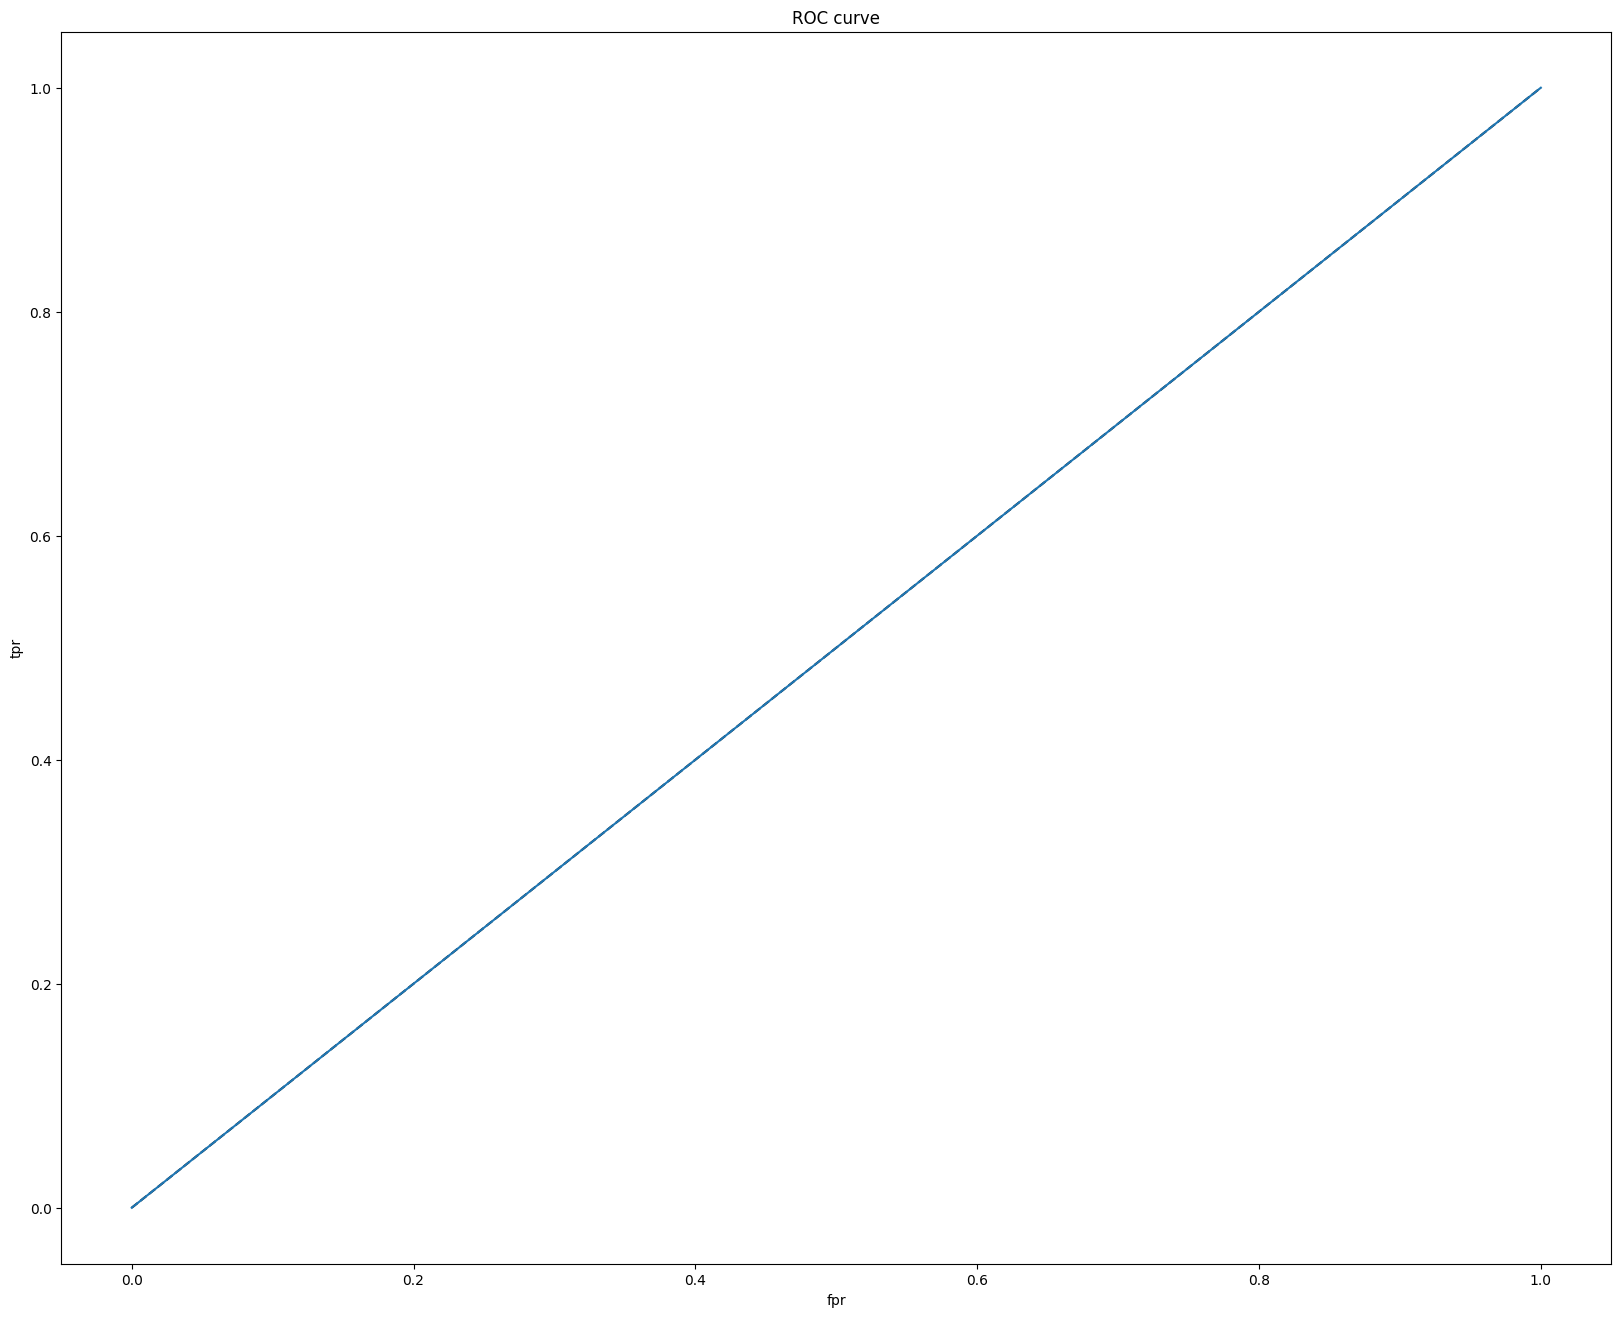

In [101]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(x_validate)
fpr, tpr, thresholds = roc_curve(y_validate, y_pred_proba)
plt.pyplot.plot([0,1],[0,1],'k--')
plt.pyplot.plot(fpr,tpr, label='ANN')
plt.pyplot.xlabel('fpr')
plt.pyplot.ylabel('tpr')
plt.pyplot.title('ROC curve')
plt.pyplot.show()

In [102]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_validate,y_pred_proba)

0.5

In [103]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 56))

# Adding the second hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
print("we are here")
classifier.fit(X_train_sample, y_train_sample, batch_size = 10, epochs = 100,verbose = 1)

score, acc = classifier.evaluate(X_train_sample, y_train_sample,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test_sample)
y_pred = (y_pred > 0.75)

print('*'*20)
score, acc = classifier.evaluate(X_test_sample, y_test_sample,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_sample, y_pred)

we are here
Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
691/691 [==============================] - 1s 1ms/step - loss: 0.4499 - accuracy: 0.9612
Epoch 2/100
691/691 [==============================] - 1s 1ms/step - loss: 0.2010 - accuracy: 0.9997
Epoch 3/100
691/691 [==============================] - 1s 1ms/step - loss: 0.1238 - accuracy: 0.9999
Epoch 4/100
691/691 [==============================] - 1s 1ms/s

Text(0.5, 146.7222222222222, 'Predicted label')

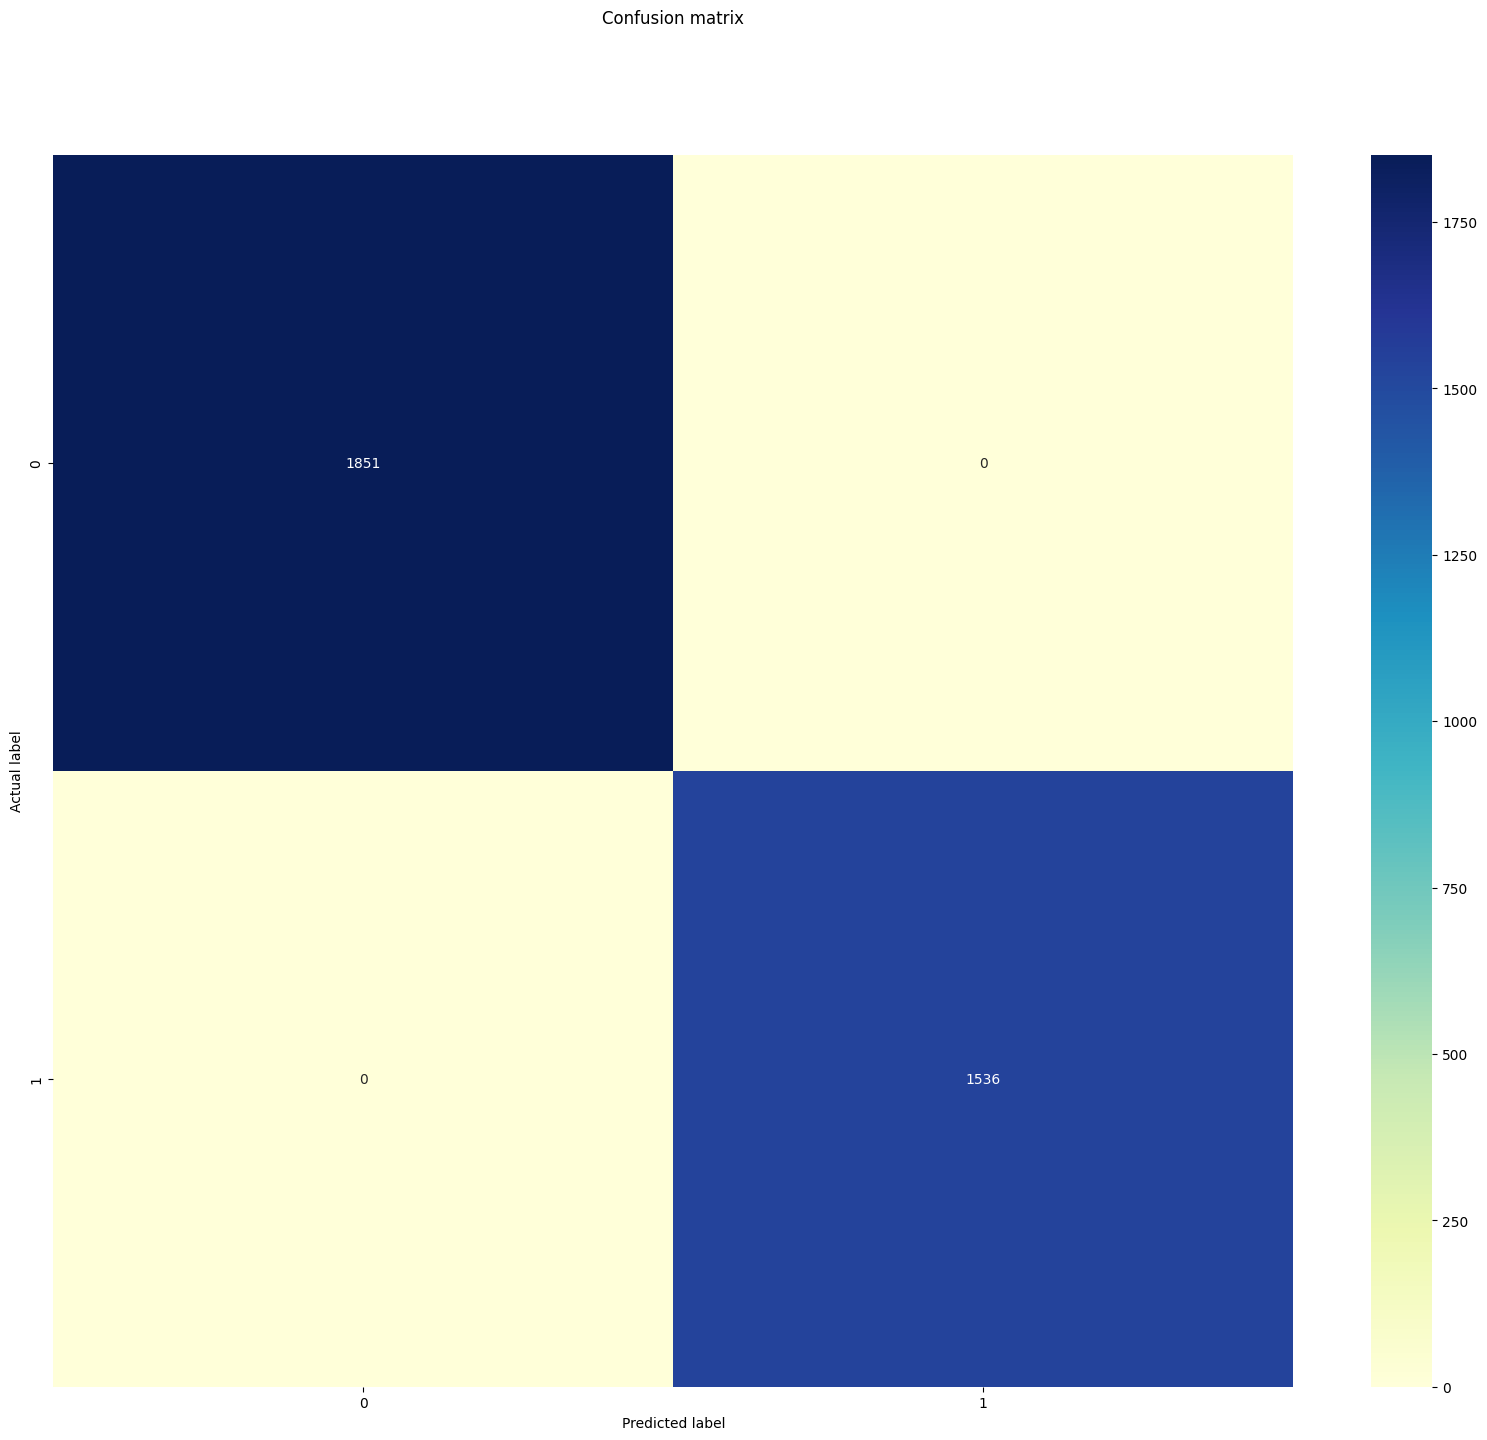

In [104]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.pyplot.title('Confusion matrix', y=1.1)
plt.pyplot.ylabel('Actual label')
plt.pyplot.xlabel('Predicted label')

In [105]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test_sample,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1851
           1       1.00      1.00      1.00      1536

    accuracy                           1.00      3387
   macro avg       1.00      1.00      1.00      3387
weighted avg       1.00      1.00      1.00      3387



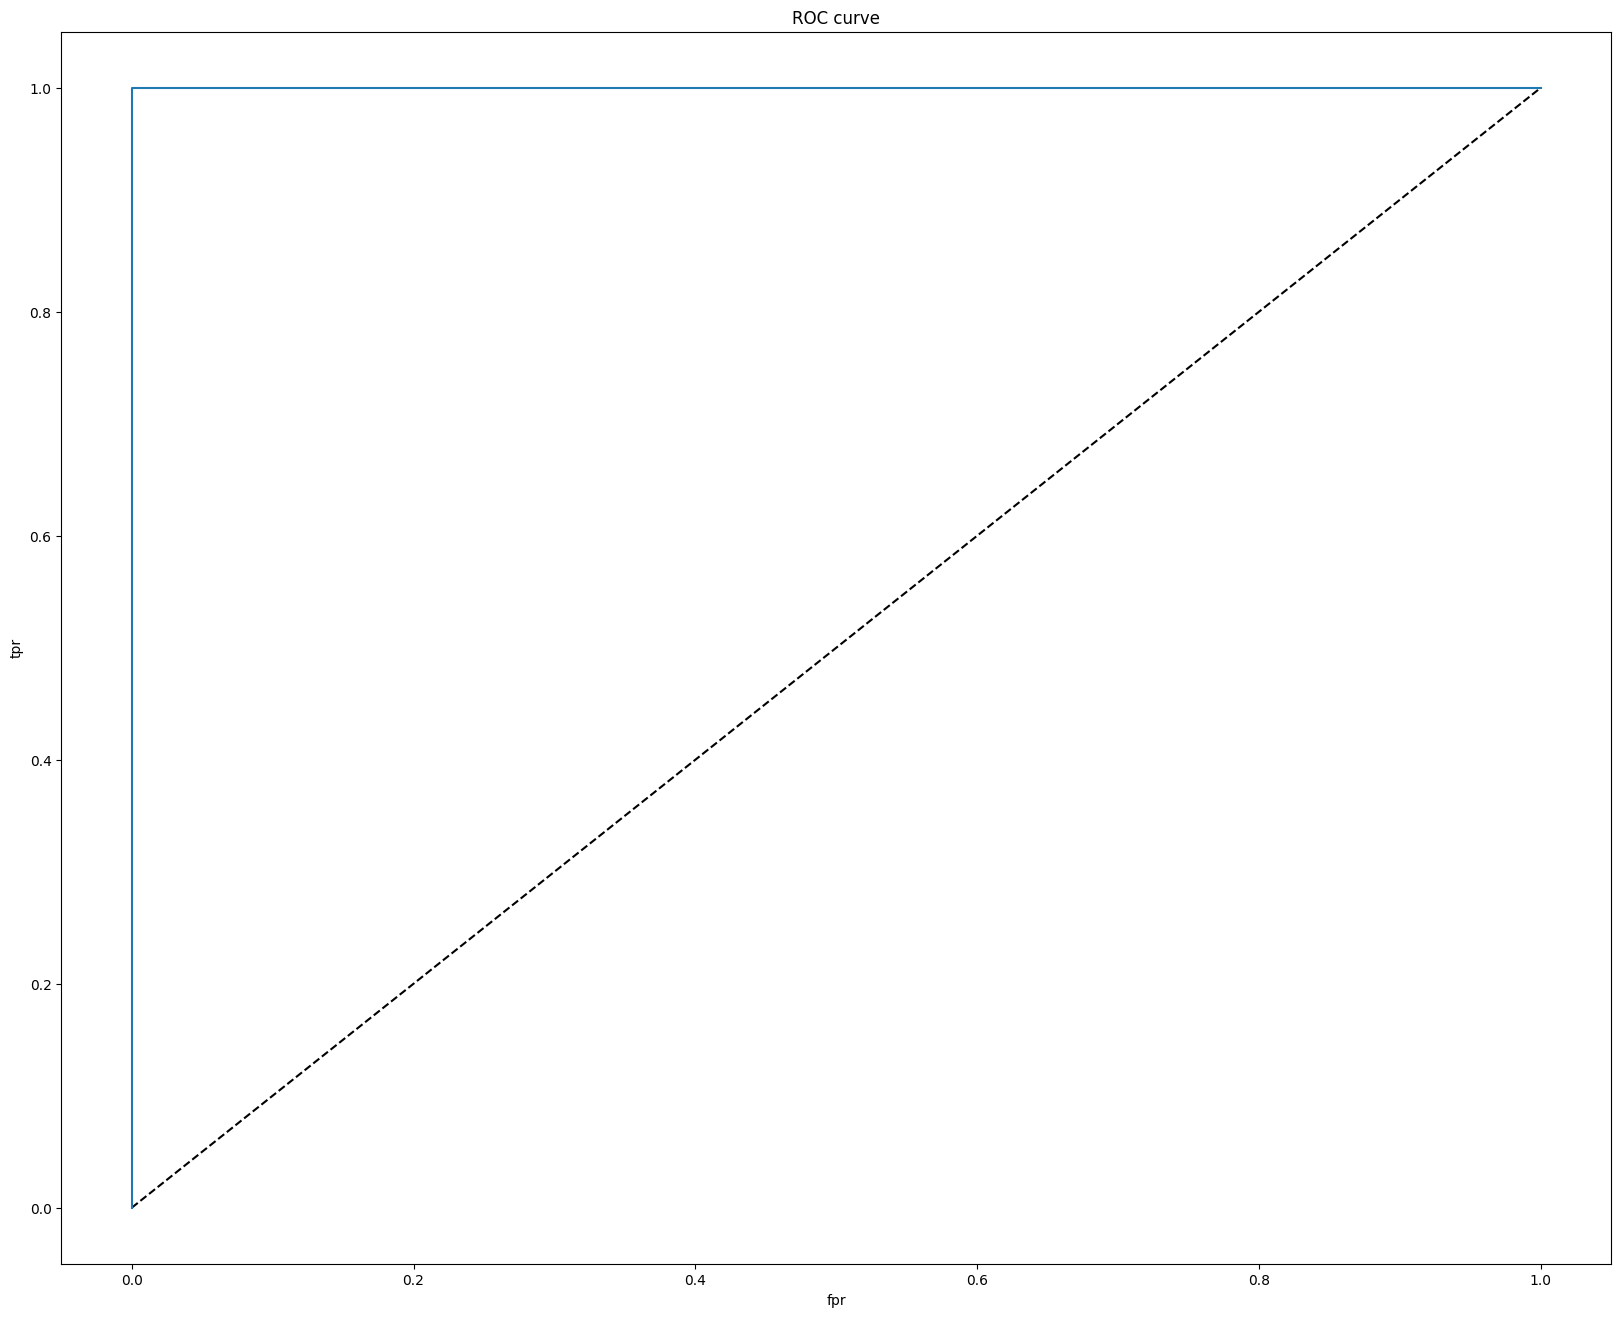

In [106]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test_sample)
fpr, tpr, thresholds = roc_curve(y_test_sample, y_pred_proba)
plt.pyplot.plot([0,1],[0,1],'k--')
plt.pyplot.plot(fpr,tpr, label='ANN')
plt.pyplot.xlabel('fpr')
plt.pyplot.ylabel('tpr')
plt.pyplot.title('ROC curve')
plt.pyplot.show()

In [107]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_sample,y_pred_proba)

1.0

In [108]:
# Predicting the Test set results
y_pred1 = classifier.predict(x_validate_sample)
y_pred1 = (y_pred1 > 0.75)

print('*'*20)
score, acc = classifier.evaluate(x_validate_sample, y_validate_sample,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_validate_sample, y_pred1)

********************
100/100 [==============================] - 0s 1ms/step - loss: 3.3210e-09 - accuracy: 1.0000
Test score: 3.321047437054858e-09
Test accuracy: 1.0


Text(0.5, 146.7222222222222, 'Predicted label')

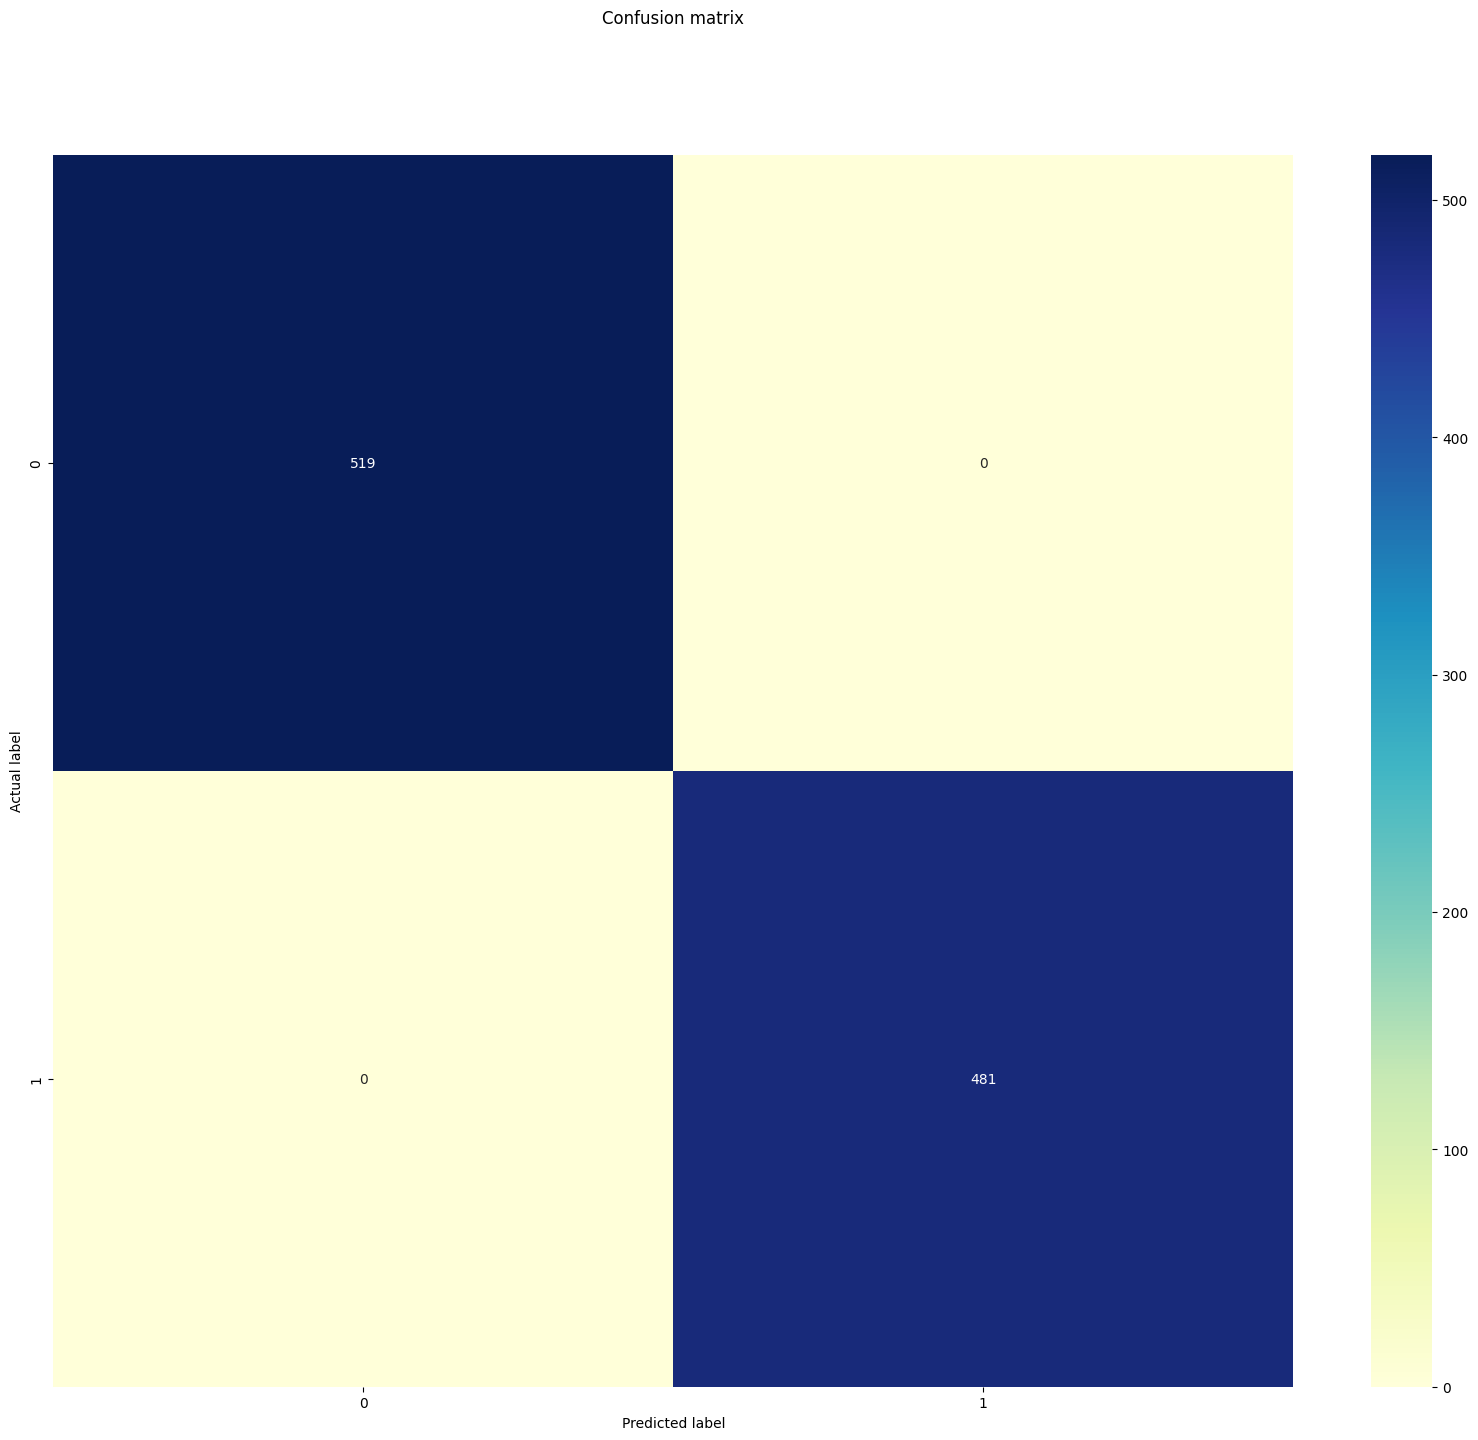

In [109]:
p = sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
plt.pyplot.title('Confusion matrix', y=1.1)
plt.pyplot.ylabel('Actual label')
plt.pyplot.xlabel('Predicted label')

In [110]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_validate_sample,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       519
           1       1.00      1.00      1.00       481

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



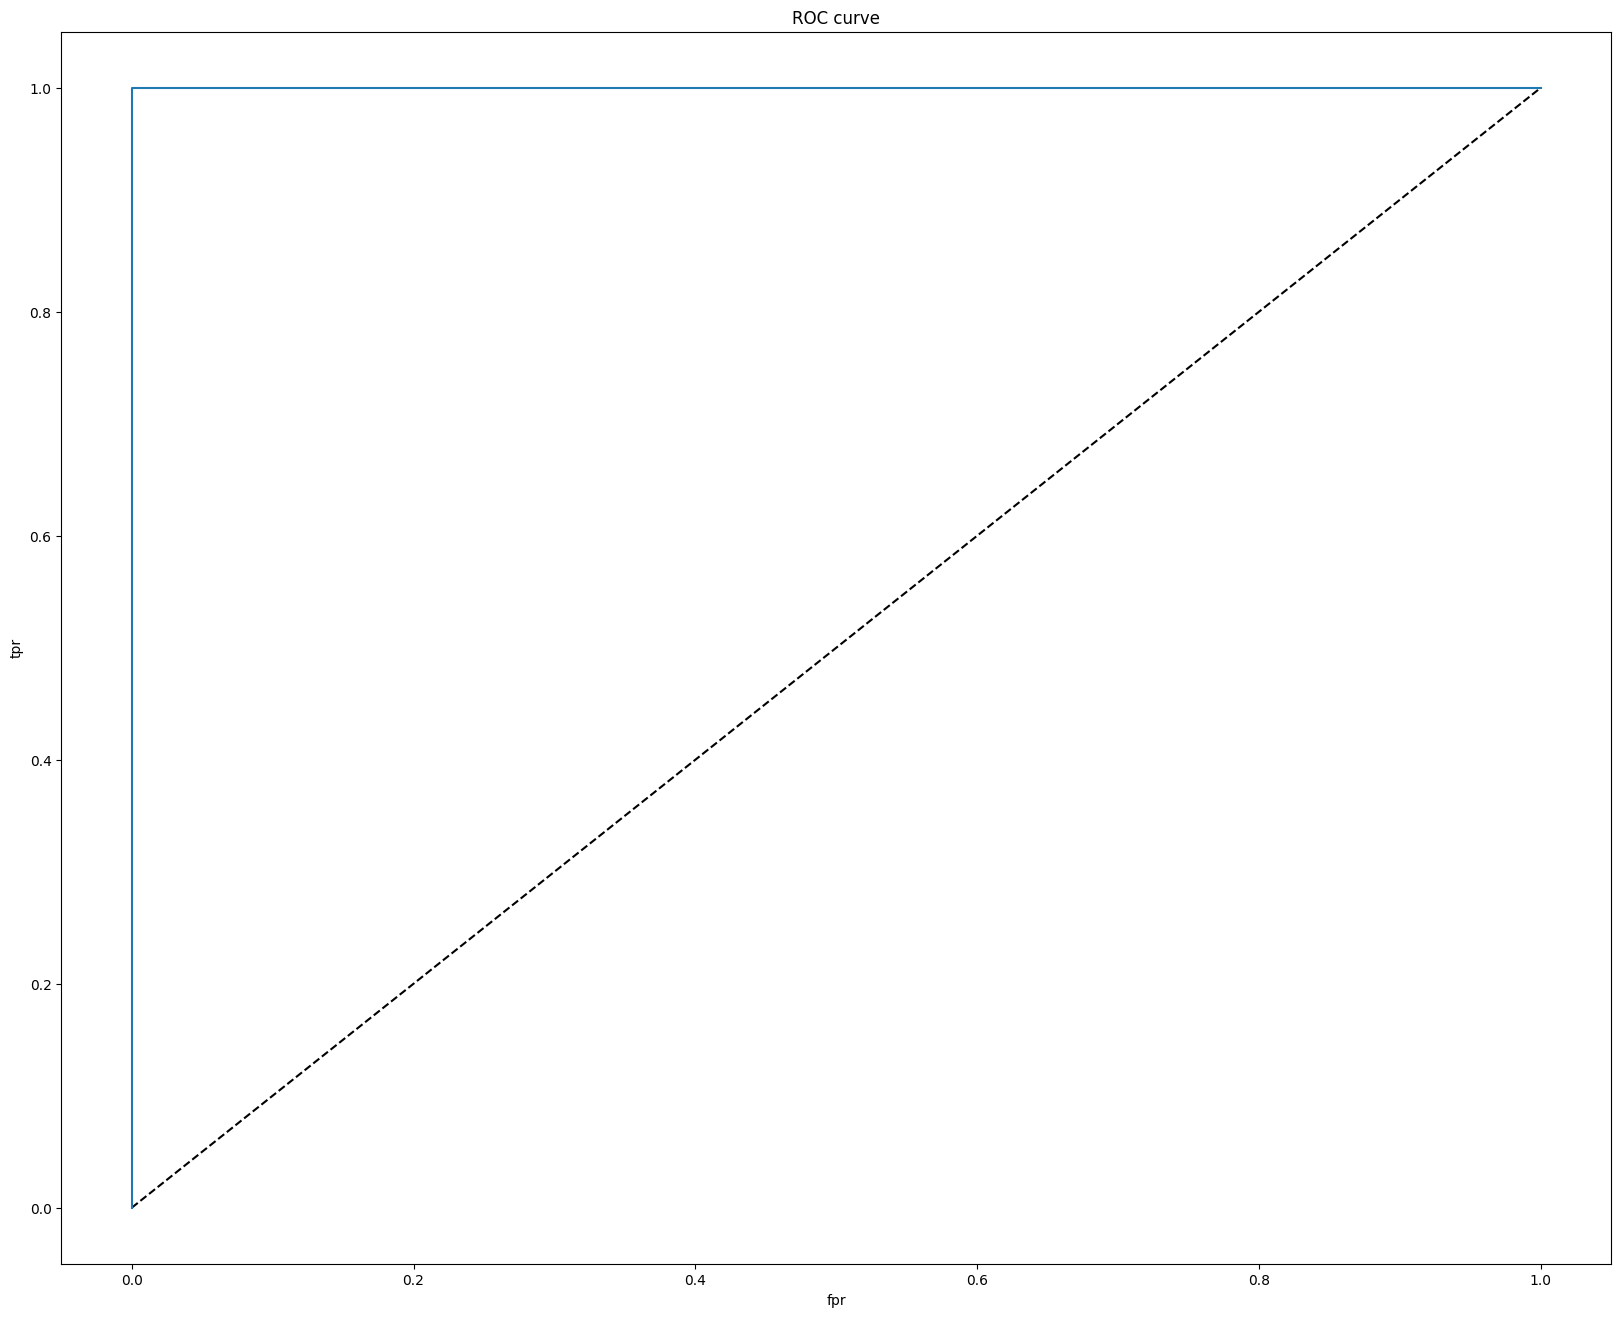

In [111]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(x_validate_sample)
fpr, tpr, thresholds = roc_curve(y_validate_sample, y_pred_proba)
plt.pyplot.plot([0,1],[0,1],'k--')
plt.pyplot.plot(fpr,tpr, label='ANN')
plt.pyplot.xlabel('fpr')
plt.pyplot.ylabel('tpr')
plt.pyplot.title('ROC curve')
plt.pyplot.show()

In [112]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_validate_sample,y_pred_proba)

1.0